# Trader Workstation API access 2018-08

The TWS API has a Python wrapper, seems there was in the past no official version but now it is available at http://interactivebrokers.github.io/ .

The download includes the code and samples:
```bash
ls IBJts/ IBJts/samples/Python/Testbed/
IBJts/:
API_VersionNum.txt  samples  source

IBJts/samples/Python/Testbed/:
AvailableAlgoParams.py  FaAllocationSamples.py  Program.py
ContractSamples.py      OrderSamples.py         ScannerSubscriptionSamples.py
```

The code in this notebook is the file Program.py stripped to bare essentials.

The API connects with the "IB API" variant to
- either the Trader Workstation
- or the IB Gateway (acting as a local socket server, without the GUI of the TWS)
The IB gateway is available from https://www.interactivebrokers.com/en/index.php?f=16457 (if the link is broken, search for *IB Gateway*)
On Linux this is a shell installer script, placing an icon on the Desktop.

By default the port is configured to 4001 but can easily be changed in the settings.

As long as the API clients are using different IDs when opening the socket connection up to 32 clients are supported. The IB gateway GUI will show the number of connected clients.


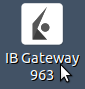


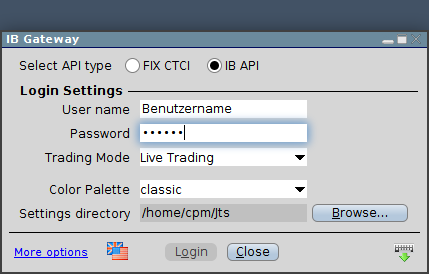


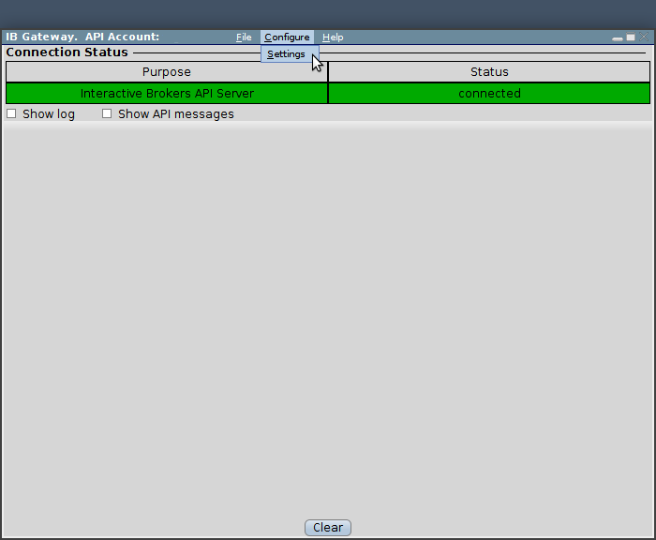


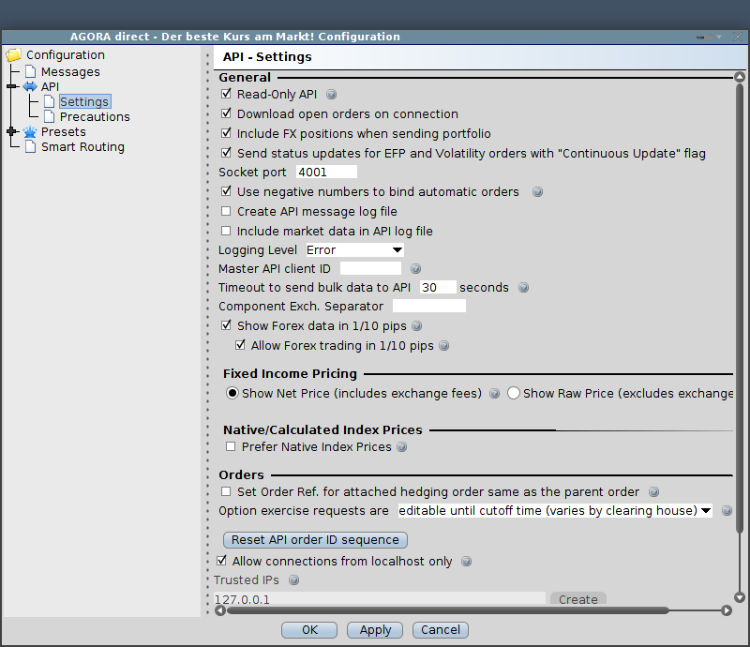


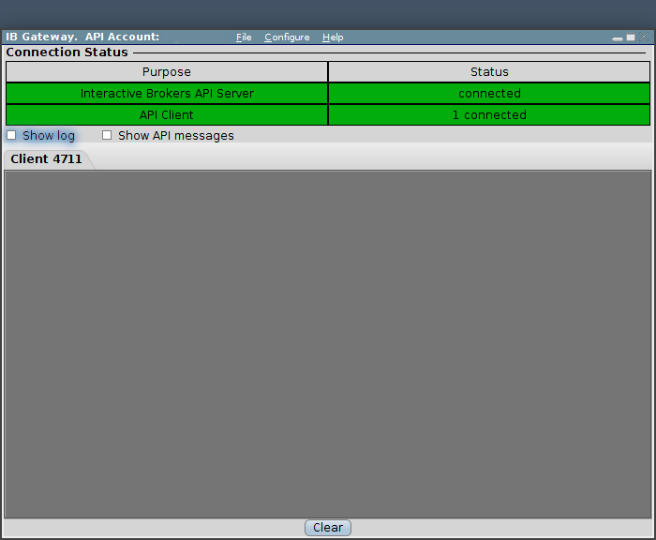

In [1]:
from IPython.display import display, HTML
display(HTML('''<img src="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAFUAAABZCAIAAADAVf92AAAAA3NCSVQICAjb4U/gAAAAEHRFWHRTb2Z0d2FyZQBTaHV0dGVyY4LQCQAAEFdJREFUeNrtnHlAVNX3wO9bZmeGYZgBZgYGHDbZR3ZCEBGVgp9mLplkYhmV+FUqzVzI7Ku5lH5dMpVSs+ynSAYuCIWISLiMgiCJDMgyNGwywyLMxsx77/sHNl8TKK2ABO9f9713Z877vHPeveece++DIl94HYziAoPRXUY7P/o3/AWChIX4TpkQYs4yG4I71mh1l66VZOUWanX64eeHYfithXOmTZ0Aw0NnShJPVz9v94+27dP3GIfZ/iUeLrGTw4YSHgAAQVCQn9f0ZyMJAh9m/iA/bxRFh/69hSAoxN8HDDs/nUb9u5Dy8vIeqz2VQibw4eaHoL8HPj093dra+nFNYISMf1KpNC8vz93dfTSO/42Njbt27Zo2bdpo9H8Igli3bh1BEFFRUaORf8mSJV1dXbGxsaPR/01OTlapVCiKvvTSS6OOf+fOnVVVVQAAHx+fURf/pKamXr58ube+cOHC0cX/008/ZWRk9NbFYjGXyx1F/NXV1Xv37iUIovdw7ty5oyj+12g0GzZswDCs95DJZHp7e48i/hUrVmi1WtPhrFmzht37Gjr+lStXqlSq/wVOdPrUqVNHC//WrVvlcvmDZ8LDw/8JocdQ8B8+fLi4uPjBMwiCLFiw4J/AP+ipi8LCwqysrIdOSiQSU/SampoqlUq1Wq1IJJo3b55IJBpR/DU1NX1PxsXF9VYWL17c1tbWW29rayspKUlISIiMjBzJ/o9QKBQIBL0usAneVA4ePDjC/b/58+f3Vq5du9b3qtFoPHv27Ijl53A4EonEhNpvm4aGhhHLP2HCBFOdRCL122You8Ah5cdx/NSpU6bD4ODgvm1IJNJQ+kVDyt/T06NQKEzvf2Jior29/YMNIAhKTEwcmf0fjuPd3d0AgPr6+qVLl/ae3LJlS3x8vIODg42NTWho6P79+/s1iid4/H+wYzcYDL310tLStWvXbtiwAQAQHR0dHR09wv1/HMfVavWDZwoKCrZu3Tpa4h8cx/X6h6erMzMzDx8+PCr4NRqNKefzkLd3+vTpEc6PYdiDaY+Hyvbt2wsLC0cyv06nwweeqMVx/IMPPpDJZCOW/6Ger9+hYdmyZUqlcgTG/3Z2dgEBAY/SMiUlZfXq1SONPyIiIiIiAvxTy1+1f2Vbx3DdemdXd79jypDyF0pL1Brt0MMbjca09DMQjAwzf1WN/HDqabVG+9dV8RhxlMGQnnnukvTGX+eH/vr6XwLHBFacmCkRAoHNEDwFpVKVlZMnu1NHojLgfwI/AIAgCBwzEgQOhsAKIAiGEQhG/pb1T+jfdEsQgpLAE1ierv9+yv+U/yn/U/4hLRCT4+ofYodBw83fZ/yDrAOT/71Jv2b6ltZuiOP+5uYPQ3E2FYIxnbajWV5+6XTauR8aHx7qcKqT//TYOaFidysKFetQ1leU5RzbfV7bPVDMj/g9u3ze5NTM87fINJbFP4m/9/5ULWVXcseEvGzGA5alWycvz9SSGDbOYfPfW75ipebekuzLiKWpMcYImbVu4RJ+Ve7RbUtzy++R2E7eob5tN2rrIJ6D64AuEwDN9VWqFpbtsPL/sf3jrRXlldV6QK2puPJeiqzbOoDemIMZDb9epwvnLEwUXt8aGxn91ke5RbdklVWnjn2x/LtOndEAAMKYsuGLA59nHd+bdWDljpd4Avh/DmLApnLZzSu5J3btCW0GABCInfuLK7fv+ezM0W3fbZjxsmMPBKiiN1Nyt/v4IDgAACdFLTiQ8k10JwwAAJAhcnvWN7Ez6Vh/IujiJSm5n3p43BeHmM1Oyd0fEo7gf+b9J5GpTEtbvsezr8zyZrRcz61QazVd95VPCY8JB92ZOz8uaB43/jlHz0CewMFG5OzkGWTn5AkArpOd/M+qxIjwKS9u/pk57e14QZHJRy7bMd3Hy8vLy2/K+jMtihZ+XPKOSQ2Fm1+Pin7jk2qv+UkTgntqq35u77J2IW58TxB4j9DdlwnoDIOqphwAipOrGfnW1a1p36pvfddHhOZ2SXuXwIdank4QBIC4Y8cC49VLn2WmPrRl4o/5odgD1fKqnLTdmXsXr/GuOLJq11XCjEZn3Y9DOSJHhkF6/gJDKGZa8PqaOSa/Jr2j0sJURZH0mztcBxG1o7Gu95qupeqeHmbYuAsCZ7KdEuZO1l7anPRuyol7mtasb0oucaeNRQvw0pJrUECgN2boMdDcnB213XDQePG9FgLxkLiBygsFanMuobjRR0QtXFZcgAVHPkM26DQYeZyPGLt8vhC1tIZ+u1Xpj/1/In9d0L9O9sAkOtcp9OVVH6SkcS2XbP8FJUyuPwEwQ485Z4zpP9kz/3Mw4ODHa4quYzRW4PyVzzv7COhmhg41DRAsdmdbA+vXWT8ylcZgWQAAtCIXdyrVfuPlzo0wBEEAwDBq0HKp2oq0i9UTF00K2H5E7+9FqfzqS3lcxDjL9Wd5vsG8ipMZP5vzPMyDXn+/jwj2vfM5Nyf9e3o0/GF1j49nEFW673Qdm+f/+PbfpWhu7aBbORIwfv7rjJQG1/EBZuq796fo0bZGuZ7kJvGkPDCUwTQKk0aU5Z/S2sUnv+0hvrnjjRlTxsckpdUYjQY9jmMAAOi3gSIBAYA3H30tQDJOIpH4SCRe3p6SRWlKnabi+g1gFR1rr3MIcS3NOn7kQoXvxHA+eayT/92874u7zII/6l8EoSwqVPVMfDHI+AvXy8WxtiBLbuBYCf/M+4+iJAbLwozFMec7W5oDHMMb6yt7LyH6ghwp4M9dOZOjeshuevQ6o8jRE7q4KfHjojoVyrBqwlAEJQMAIEKr6wEsNsskntwkv22w8XFGKAxrltCDJfRgCb1sA1+wEoo6rt4oE8ZOnuM3paMg/cbPJTe7JS8kTA+yUObk3CYxyO7j+hUBAAEX/ZDePfn5qW5BvqA2+1wDw4JCM3v8+NfSNTBQI/DyYlg6ek56dg67av//XzHCvw5aRMftoyfTnKat+vZAwJnCywqiC7awFYFea0Aa6ivBM4tWx1kq7DpgsT0L9O4UhPA7lXKQ8OKKV+RZraKJgns/Zsuyj+VEHVh+7FP2oTyVpYbKdzUrz85X3iMA0pRzpvq9VW8L7h6aXYmQ3UvLS+OXJkK39q66wuY7oI2KfkUAABB94ZkL8+a/vX+MRfGhY6UcgUPflMHv8xu6lUAVvPzYCRTCejQdzbW3jiWv2rQtR+URGmhqRFZl7n6/+nKoR3zMqyuFLJKxq725LC+7pJkAVjUHk3fPf2f69o8czElGbVfbHWl1OwEAIFQ3jpz6Oj4sccd0mqb+xhcn0tra8CPrF1SHJU1/b629OaJulp8vOVFfCexcILzm4kXNcueqg/tz2HxPckvOWZm/r/qrzwvuWoWF0GoPJu+O60cEAAAYVOfOn4+JjJRuO1DUxouY8Kj5n5LCLARBvYInAwAqii+2KGowowGCYTKZyrTgiZy92Fz+wzk5vbauokTZJNfr1DAMU2lmFla2zt7BEAQ11lXIZaU6TRcEIxQqzdbR087JEwCg6e68XZTf1d6KoGSxu59Q7E7guLyytEku02nUKIlsJRzjIgntVVpjbYWstDBg4gw6k11Tfr1T1UTgwC9i2v2rA4jAScFzts0TrHZaeBaXhMX01T/0xO3/xzBj/slDdo4eDmN9UTJlgCwYnTvGhgnMBM8lrBXtmxT0QZujr42d02Dlv4a0EAQAQN/VWldR7ODmi5L6eQQE4uz/ZuI79h2tN48tid9TSpD9hOIRFf9eunSpu71JLis1Gnr6Jp0hrDTrvUUcaxdh4KsnqtReQVED7dBGn1B+sVhc+NNPISEhChS1c/JCUNJDVgBBsP/E50ds/gPDMDc3t/z8fKWiSlFTjhkNf27q4UnlNxqNBEH4+PicO3eupa68qU725x7B4Nq/0Tzo+VdnzvVj8bAmufT7fYeLirvJJtFUx6gZMX5h7jbOqj2JybdlhPWY5+YsnOQsEZDJ6vo7l47vOSKr0KMD6R/DMBRFAwMDs7Ozo6OjYQSxFjkjCPpY8yKDqH8Cdp747mtJgh8/eWXaM7O3XrVN+HA+08aoAwAAQLN8duOXqz1cFBnb31kQ/tKejLzTgNCRyNqyw8lxM+cu2CQFE99eEaKAMONA+jftoxo/fnxGRsYvlSWtDTU4ZnwsKxhEfr3t1BkuLUfff+eLnCuYpmbLoWpNWJyn8gJBED1uiZufLzo4P37ya6t+vCZTM1wdfMMhcK8q/cC24xcrG1pkl7P2FZP59tbKytKB9G80Gk0rqKOioo4fT5VXFLU2yR/rEQwiP06js6BORX2rk2cgm8tndnRXwR52PKVWQwmY7mJvEEZtS29VNknTN707gc9gsnt/Ze8q4YsDxJMT53p1FubeaupQ/Y7+TSYAAIiJifnq0KG6cmlbiwLHsUd8BIP4/lMayq+rp81KnF2S2tUM0zjWTAZEopAgdYez31igOP/tjr0XazW8gLc2f7pidtsbO04aRQAAffgnP/zLnAH1tP+4KvDL25ZuQb+jfwRBEAQxfYBk9uzZWq128eJECEYsrATwI8yRDiI/0n32y512Nq8f/DYOISBIr+4hwa0XWzGMxrGiGkpPfJ53iyMUmxcelWb+35xx/MVpMg6Zbka6vi1uYTdBs0tat7Hwa1XSt2jLwP1fb4Fh2Nvbu7r6/kYbvV5XUZzvGTyFZcH7Q/5BHf9wY+neJXPm2rn5OAos/dbfwLqkl8sMJBg1EDDLnGnFt2dz+WyqoUVNsuRx2prkAABY09ze3tZUWbD0sxpa7EK35gsD2b/RaGxsbDxy5AhBEIsWLaIxmCLXcWLPIDf/CBfJeARBHuXrOIM+/nOtuC4eITbRX25ZFaLOTs/uQlkk5Z27iHdoIM2gBwAYzR1d2bq6umatXnffJklkpgWPzRUAmHJPKddpuvvVf0NDw6SoqGVJSe3t7QkJCbhRD0GwBU/AtRFxrIR0JvtRVkcMKj9E4Tm6eAZMmpO0d+fMqU2fzVqWQbdzIiHlOecM5Bkfr42xc3b0j3kjLLLj+8/T71I5kybNDZvq7+zj4Rk0OX7jK2x6WfaZOrxfNSoUipjYWCMgUemsXbt2USiUpKSk9rv1AAAEJaEk8iM6AoMa/1Kcl+3e7Xu38U7ZhVNfr//0eDuZ7f3MVJREJmC+9YTnVsxw9+KBTln2xmWr911t8Z2xMy7puRgnji2T0LfVlV1IXfnOllIda9xv43bMaMg/9RWXx0MoTL69K4Zhdbeu1NXVwjBsa2vr6B1qYSVEkEft1wY9/i+/nqds+sXMnGNtK+Y7jDXFYQRByGUlDbW3DXodi8NzkYSasTgGve52UX5n212joYdMpXH59mJ3PxL5N59Y6uXn2zvbiFzMWBwIhmXFFxYnvLpmzZrw8AmK1i57V59+g+Lh4R+M/Ed95U1LazuaGRMlUQAg2lubZMUXAgMCi4qK+GJPG5EzSiI/Ij8yxs3vyeKHIMBkc8lUGoKSIQiCIIhMpdOZFo1NzZYCBwsrIZlCe/TvsT2J8f/9tVYmDcMwwrGyNbe0BgBCUBSCHqNTf/L4+8lhQhCEIDDyZ9YCPl3/8ZT/Kf/oLf8Fyso43N4Mt2IAAAAASUVORK5CYII="/>'''))
display(HTML('''<img src="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAa0AAAESCAIAAADBqB3AAAAAA3NCSVQICAjb4U/gAAAAEHRFWHRTb2Z0d2FyZQBTaHV0dGVyY4LQCQAAIABJREFUeNrtnXt8G9WZ958zkmM7vsS5OORCEhsphEhJ2yRAaEhASQpSXAzvFmQu3X1JoZS+kUujXj4LhTbKtnS7LVsFYqUsXdh0t+0WK+y2KKSaQIkDAUq4tQVN4kSKTSA3OxfHji1fNHPeP+aikTSSJV9l6flWJTNHZ85lPPPT85wzcx6y7ksPAIIgSB7D4ClAEAR1EEEQBHUQQRAEdRBBEAR1EEEQBHUQQRAEdRBBEAR1EEEQBHUQQRAEdRBBEAR1EEEQJI/Qp/yW4glCECRXIOnooIbqUVRCBEFyQAKJpsQRRQcp6h2CILlNEomjhAAA6DNRQBRLBEFywRGO00f94GKH6ocgyMS0ApPrYUySPl7qBt1EEASZWFYhTVA+otY0Io0PKkJHk6keKiGCIBPSM6YJGkaiMkgAgOqBJmgf1dY/VEIEQSamBsaag0Q1LUIJAdDTWFMw9T8IgiAThZjRQUKjWqhsEhBnSvRqpUvcVCWgFCIIMuFsQkJUHq80TkgAgBKVIOolhYuXQZpUW1ESEQTJaumL0S2a4C2TGE2kRH5+kCbIX5wY0iSSiCAIkp3usLJHYvRRUUbRVKRAxflileZRqh4QpFp6iiOGCIJksTmokj5JrAjEv1VHiCxthBCgehqjgIryUcUBRn8YQZAJZg7SOA9Z2lf+L4qZoob6qAKq5I/GCh+NV0AURARBstgkVCkYIUTTUyYqtdRTSkH9P8UMlO3ERLsQn6lBECT7ZA/Uj8ioUmRjkNIETZS+lvxiSmmc/Knc5HjzELUPQZAs84SlzZiBQMXvFTdA/q8kiFR6hoaCHhQhpDTeR6aJ88hRqxFBECQbNZFIjwhKCkYIUYYDqfjUjCSIijrq9T0n8NwhCJLPYHwSBEHyHWn9QXPN3+O5QBAk3wjs+TXagwiCIIPEq0MQBBkdKI19E1grRdGpC8er5swE6eVg9VpaJPTpaWH6AiWl6+QxnugrZs2TipJnSC62ndALAyWzqtLXwer7v7tuGbQ8+7NXP5C21XTsee6FPecg+YEKYgnJUNeCIEieQUi8/JGk4USWGqve+vgipQIhTNwDK5+bP7u5W6WlBZNvvGru/o9aKmbPV0q+2HZiw9WL//juoWHag7JaTV/+2H3Lau5bdypRvKYvf+y+ZbOiulZRc99y/FsjCDK4IMZZggmGYbi3z7JwhiA+8EIpkWw9IAQudqlVkJZXznr98IkbllS/JkqhSgSnzJw7on7xuY5T8UkVNbctmwUde55T9LFjz3OvatmJojmppFTf/937ZZ2tqLnv9prpcbZkRc19t9fABz967n24/vbHVlWcfvOFH70BSuJp7fKloj548dlnmwEWrWu4tRrOKfkRBMkO11jUQcWHTWIYlkwuXrv+C0ApASJQSoiknoSQP73yMt/RrdMXKAeWV8460Hxijbnq9UAr0eluuda8+yAniWAS1ztNHRTVShRBTTWZOns6AFw4dS6ZOfmsIog1ty1//7n3n/3Zq3F+8bJbb6+Z3rHnuRf2wPLH7lt2/33Lf/Tc+6eh49RZgEXVy6cfg0UVADBr0RWzDsPy6QDNF04nL3/PGy01t1YvW1QNzS3LFlUDwAdvoAgiSFa6xpq7KhgdI4ogpZSRjUFxaRleEBLzl8+Y9UbzSds1iwsnTXrxz4EpM+ekEMEh+sWP3QcpDSvFOpOPEs2xqAddMRsg4fDq5YtE6+/+mthsp851AFTMvuqK2dPhg+aWZYuql191YRbA6XMXpEM1y29+f8+56ppF1csAli8COPfBS8143SFI9pmEiX5xQh4qSO+2EUIEWQrFt990jPZDL1SIFBQU9Pb2UYEftKIM/eJzF04BzNIQsgunzsGy6VNnT4cPzrXItp4si7dWJ7jDgwmuitNnLwBULFu1DM598O8vHjt13+01qyoA4NTZjpTld7zf3FGzqnr59R2z0RhEkCxjaqRj+VLT0sVXAqWRSESn00UikUgkotfrdTodLwi//d+XLugrRDuRiG/HCZQC6BhGEATCEHGUUNCyBy+e+XTDNabdBw8RIDeYq5SxwmRqm+Hzg9OnzgbN8cGOPW+0AFTU3LZ8VorDF1UnF8GW95sBoPqL11fEf3O2Q5Sw083HTkPH+82i/HWcOjtI+affeP8DgGWrls1CYxBBsowbVy5fc901FVOmVFRUzJgxY+rUqZWVlbNnz66srJw2bVrljBk3rlyu4TITop4noYKGfXfxzKe2axb/8b3mKZWzyytnHTh84oYl1R2njqdoTObjg9Cx5w9atlXzq/XPLX/svmWPfXdZvIn3YkvDrdVRh1dOf+nNjmWrVPMkLz777K3337/q9oZVsbahaIRCy0tvdEjqtmrdsuhYZLLylSoq0BhEkGyjt7f3cHOzvFQ+JNppFy5cUHvPgih/lEpSKK4hyJC49aFFS9D//pEplbPFzIoURq3CBIjFYoGcfa+uInZaGUGQbGEWuVRWUlw1d3ayDH9rDp2BMnG7rOfMgtmVomSJK8gIggCEEIBPzpy9WDRTOSp8pjWiKy6bcVlcaZ3tp3WRnpLZV8Sli+/V5fD7JOJYYcceFEEEyT5O09LTl+Boc1vyLGXKVtfkyz66GLXeAABAJ+2pRBAAii+r0iyrvHLW8P3iiYjyMA2CIEgqcJ0FBEHyHcke9GxtwnOBIEi+YblGpYPcO9/DM4IgSL6xadMm9IsRBEFQBxEEQR3EU4AgCOoggiAI6iCCIAjqIIIgCOoggiAI6iCCIAjqIIIgSB6C8YvHGUrpyZMnW1tbz5w5Iy7GO2PGjKqqqrlz5+p0Ouw1gqAO5jjhcPjNN98sLCxcuXJldXV1WVlZd3d3S0vL22+/fejQoRtuuKG4uBh7jSC5pIOs0+S3cW4rnnVZDvbt27dixYo1a9YoRlBJScmSJUuWLFly4MCB1157bfXq1SUlJdhrBBlVhjk+GPLUmmRqPaFRUk8nO2gbYipnnSY1yuGaRQ1a/mg5hm+++eaKFSssFoumJ7h69eqrr776wIEDkUgEBuma2IWQpzbmNMTva/3RnGximbEnLT7zsM6YutfhcNjlci1dupQQsnDhwkceeeTSpUvJe630VE2KS26YVwWCOpiBCNb6bT5OYhtsHo/rKeT3g9UKfn/MLWF1y83yOYLOUZLoYXDy5MnCwsI1a9akyLN69eqysrKTJ0/GJke7xsUY1waHz230bJa6GvJs9hjdPodB448WrJePt/mdbLRAtzVmWzPzyPT60qVLGzZs2Lp160cffQQAwWDwJz/5iZiepNda3Vd1NzeuCmQi6mAwGLLWR280g8MXvS2jP75JrrZkGZT0Wk9I/q0W07RvQrbBA7b6eht4GrRvUoOj3hoKBlMZm3L5IU9tTC2s01TrCbFOk9OjWEVJWpupNdzS0rJy5cpB5wRWrlzZ2tqadqnWegd4NntCkgpqDEGwDTHpVneqYYqMMmfU6yeeeOLAgQNx3/7lL395/PHHM+i11ZbsLzu8qwJBHcwAo9HANiRxvJwg/fT6bP7aBAVLlkGdvg38LFjdUSNF8yZk/azBZjMYbDYD62e1rdYG1mA0JjUuVOUbHNscwWiPWD8r6Tzrka0itQkyaDdT0NbWVl1dPWi26urqs2fPpl+swbHNAZ4GZ4O2CgLrZ622dMUso8yZ9fqFF17QzLBr164Mes36k/xlh3lVIHnHcOZJDA6fD2prTR5lTzQOQ34/OLZZoz+8Jj8LVmus06KVIS49wafTvlXr3QYAiKuGdZpMKrFLoyixUpsNahtYh9sqyYAbgBXbqFhcDZv9IYfDMHg3UxGJRMrKygbNVlJSEjtSlti1OLkzOLY5amuDbi4bp6OUXovusJaLEUzSa63uRy+50b0qENTBQaWQcyjjTrXg8zkMEAyGQqwsj5IDE+9Qa2YIBkNGWybXpixVkpPkjF7yiQKRbofkOycUDCrWkNEY9f6NxpA/CJBGN1Oed72+q6trUCns7u7W6/VaNmwqZzYE4HSyWTgzr/R6yZIlmlJoNBqT9Fqr+6zTVOtJlMKRvyoQ1MEMBMQjCoTRaLDafCkuuGQZjEZDMBgCa7pSyPpZYNnoTzwApG+RpRhja9jsCRnBb7T5osIttyoUDEr+1KDdTMXMmTNbWlo+85nPDDqgNmPGjEx+GZzOoMPH2fy1tVpKGCsLgw+/Of3DP6Favb799ts1dfCOO+7IoNdWm9UpXnKjflUguc1wxgdZ9YybasDFYLMFnarBMtYZN3KWLIPBphrYDnk8qcfbQp4GVj13ynFuq/Z4ZYaKbrOBv6HBb4yOjYWUVrENHrCJNuug3UxFdXX122+/PWi2gwcPVlVVZaaC2xwGMDi2OYJa7bHWx0yUpm5zRpkz6vV3vvOdq6++Ou7bq6666tFHH82g11rjg6N1VSCog0k9lG2wOTpfGn1Kw+Dw+YwNypNaflu8XZIsg8Hhc4M0BbsZRB2y1juCWvPFIb8flGE75b6Nf1IiLfsvrnyDo97IBm2qsq0OubVOiD6LMmg3UzBnzpze3t6mpqYUeQ4cONDZ2Tlnzpz0igx5aiUVFBu3TfPREIPD57P5a9Nrc0aZM+l1aWnpvn37tmzZctVVV4nu8He+85133nmntLR0sF6rHgNUdXekrwokvyAWiwUAduzYgecixtIN1st6N1qvwWi+WaEWwXfffTdP3ifJ+V4jWYsYrw7fL9Z0uIO2baM+l1hcXLx27do33njj6NGjK1euNBgMJSUl3d3dH3/88VtvvdXV1ZWTcpCfvUayHNTBOJ/LyYruoGGMRGH9+vUnTpx4++23fT6fsvLKggUL5s6dm3zOdMJLYR72GkG/GEEQJHv9YlyHFUGQfAd1EEEQ1EEEQRDUQQRBENRBBEEQ1EEEQRDUQQRBENRBBEEQ1EEEQRDUQQRBENRBBEEQ1MFxI1VcuvxuDIIg2auD2SAW6ljyaTYmsdmoegiSv2TVGkdWN8dlrsS1npASuCzkqW0Yx8YgCII6GG+nKcvCx0VYlNb5ixEdt1VKVm+r0YzSKIanVeLJGRw+92BtUEoWozha3ZzNH5+SWWOSdCe2+qRRJhEEmdh+8SAiaHD4OI7zOQxqQQh5ap0sKF+lLkfMxvkcBghFI6in554naYMSvFEJD5+YkkFjkndHjGMlHcRx22Az+t0Ikkc6GPL7QwAGMbKb+E9IipWj8VUK57ReVBYxLFkoGEz0XqOqJUXwkQU3tiJHvTXahiF6ylqNGbQ7MbYqRo9EkPzxi4PBkEoCDEYjQCgUlMOfJ3w1nKqUcTzZOw15GliH2ypVFPKoQ61LbRjlnqp0k/WIvrbaW47BFBNoF0GQkYcbbKx/lHTQaDQAG5LDn4umUzT8ObChGGEaGaxujlOP1IkVaYrPiPdUuzsGh49zRDWadWqEVudwNgZBctQvjnGFY1xH6V8ptHZouIFlY6coRBmyioGPYyrSyDySPdXsjirOvWgvJgQdRxAkZ/ziqOunOH8Gh88dNDllp1Q9Vxr31YjWHjMKZ3D4OKPT5FQqis6HqDxWMTExJW0hTNodq3tbsNZkis4Xb8PpYgTJRsY9Xp368ZQcIMe6gyA5zjjGq2Odsnsa8jSwUU92wmpfTnUHQdAvHgusbpvTZHJCnLc6Ucmx7iAI6uBYSUdOTZPiO3gIMpHBdbcQBEF7EMl6Fi9ejCch3zh06BCeBLQHEQRBUAcRBEFQBxEEQVAHETXeOqLG7OJGvPw6L55mBHVwQpH4vvBovEGcVdgbqUyjeavdhY/rIAjag3mM3W7nuECirRg1E711pM7lMid8EWf3ibvKfwmJbihI+QerRSpHq1IA4KLJ0QbE5K/zRjPFNXG0jGAEyWUdlFZl1Q7IpF6vVbQiPVK0Jw0D0xMNBFWrWhFbHR9KOSomv5ONZhqsDUPwYr1ek8ksC0wdSJZiwO41RyXEu5VzpWc/2htpo12yN5UNKu/Z7WnV0mhPWqm3jtjBKyUHtgTqVId7xS8a7dFMjXavS2pt8noRBHUwtQo6g/KC+JzNL6lQyFPrBLeY6LP5a6PixHqC9Zz2ovzKVxznNsrL8bNO02bYJiX7HEGnqii/+IXbGs3ktirrfyVvQ1riFzXTXKZAwGUCAOAavbDFZRdzmFwuu9frVdSt0a5pP6YL5zK7TIFGe7q1JK3U3kil5iYe7hK/sNvt6m3pwBT1Igjq4CBE10SVF+8P+f3gqFdW5aq3ilGe1Fk0UH1ltVmlUq1uVTCSuKKk5futNqt6O7qOf7I2pOUMR800F2eWnMQAx3FbNVzO4eOtM3MuSb6GXYvaLc7g8NHrHYJI5Or7JFY353bKa97LSx8Eg6EQG7NOoNU2dJlVx6JLv6iRa4Pdbq/zBgBMYDaZ7I2BGJNsJBBNwYBc7DBr8daZvfYAlU1Cbx1JU9BGqXcIkiP2oNFoEMODqEzA6JrPVne812o0GuRE2dEd6sowrLPWb/MNoZzhtYEQCiB9vLu8ZpMJgILJbufq7vQqXzXeeWcjAI3LH901Lzbv8nqjmb1yNnX+xjuXcK7AFpNyeKa1xO/GFq5dqdZ20npz8oOgDmaKwWYDccU/SZwaPCCt/s86NcbdDDabeiBPO9PQBiPZDNqcQRtibhJKAHbdxeh04ueuwJbGLYsppZQu3vLhh6atOpldd/zuDkopBSAAih8d3V28pXFL4C4p81bTFruUfscPpOQ7vdS7axfZdZdS5J3ejGuJ273jd8+bf7g0sVJ1fu3tJPXmDuo/c+weMkaM+3rUw9cg1VSseu0/1RfqZLU7K6ezTpPfpm2XxX2l2lWVb3A4jJ6gTYr4ruRPtq3Zhnj5U/6hQBcvXqzcEzQxGzKh70DNbQKHDh0iYgKJz4aMIOJ61BNeB3MPqlJAAoQCLLrqKqBA5VQUwZyVQknyCBBoPnyYyNeAnIqMlg7iultZpoBREQQKRKAUKPACBQqUUlC7SyiEuSWERBZEQgAICAIFAoQQ6XsKFA3DUQN1MMukkFICRABR9YhAgVLgeUoplRIlszBWBlETJ7I/TJT/EiCEMEAJITwFAsCIAkgII14bBGUQdTDXjUFJBKk0KyIACAJQgH5eoAIVKIhqqHjNqIC5YglK/zAAhBCGAGEIT4FQoAwwQABAAGAIoZQCaiHqYC57xBQUERQEKgAIFAQKggCHDh8VAKhARU9Zco9JvAiiJE40Q1Dep5IWMoQQoIQhDABDgGGACpQSYCgwDBEoMISohgwR1MEclEJKgVBKRfnjKfAUBAF4SnlBFEQqyHmo7B2r7wiKSjgxdDD+T0YACAFCCAGBAWAYYAjoGNBRwjCgEwcOBcoQEEShRBlEHcxVYxBEgQMiAOUp8AJEBMpTiAjA81SSRQqSCIpWISFAKergBLYHifRcKCGEEEoIMAR0AtUR0OmInqE6KlqG8iyyOESIJiHqYA4bgwBEdId5ChGBRgSICBDhpQ1eoKIUCpQCEEqBgqD2h1EFJ4gOUrUiynPCAkMIQ0BHQMcQPQN6SqmOUEYcMSGEAiGgAyKOCqMMog7moAoSIAKlAgUqucCiFMIAD/08jfCglkJKQQAqTqrEvHWAQjihDEIijQ0K4nQwIVQWQcozwOuAinPIBBgBBAKMQAUGGJBGCVEJUQdzyymWXWNKQZwj5gUaEWCAp/08HeBJP0/7eSrpoABUdJAh+mw1+sUTSgZJ3A4ByhAg4pggA3oGJukIBQIgiB4zA5QhRIi1BlEJUQdz0CmmhAAFQZkn4SkvQISHAZ7evX4pnqV843d/+pAA6AjwPBUIEa8KHSFU8qvRNR5JcF3+rDELqfSYtADSZLHoC/fxWWHl4VNrY0yfMi4sTpFB9ApBux91MDcdJXGdEQFAfE5QEMQpYzog0IiAZygfiQgwIFBpckygVJAvD6A4XYw6mIuWoGpDfnRGmjUWBOB5/PXPR3ieitNlAhXlj4jPSsVdMAjqYA7AfmvJt/aCPMeheoqQim8WU0AZzFMdpCA+G0CpIoJEdZ0gI0lOzpPERTHWXOIvi2xB6aomBIBS0fehlFLgpUem8SrNSz9B+iGklBJKqSDNFUevE5wyRntwUKJr3/scQedwwmOOsSwqixLL680IqIN5ifynl16jlJ+TQlAHh4TBUW+Nhq7TDDqcJNhxfKJqGemQp9ak2pY3o0fElBIXHDnahlt3hBKkkIovHCS78qXAnbFR28YsERnb30WqitaCMog6OAxCngZWCt6ULOiwZrDjxESDzQaSoAaDISUuaDAoBkVRByZ2g9oGjQmOHPJs9hilbI6gZ2+ydhMivmcSe+3LsXtjYviOWSIyps4BEX8S8Ykl1MGhErXMaj1GtxRqOEXQ4cRgxxqJBqNRPIL1s1arVdk2Gg1xgYmt9Q7w+0OJRcZlcyjNSRO73R7z79gmIkhuksvxi61axqFW0GHNYMdaiVabtSEYAvCzVhtnA5OfBWMwaLVJwZGNNkXVDEZjyB8ESJC5uGwGAwST2AOig0zjjAF7o8bEyZglImMGkQZJiDwpgqA9OFJGYtKgw4nBjjUTrTaj3+/xs1abFaw2K+v3+P1GmxUgPphyTCRlNXHZQqH4q190h5UP3gD5LIVEuRLEQRI8J6iDIy6Kit5pxhDWDixsNILHI403Go0G1uMBSe5igimrIinHEZvNEzORLYXkIdKqnACUIcDgxZ+fd6b0p6eEEIK/iugXj6Sz7Pabak0eUZAcDisblNJtTpPJqRiB1qSJYLDZDB6/KHHqbQAwOHwxjnSSoT91NoPDcTOEiOIIgxSaR1yVUyevzYnkozEorkBDCJGCNwFRDZhEQzshI3K2MX7x+CIOwvGUCgJEKAzwdIAnvRGhNwK9A7R3gIYH6Ne++NksuC3l97qQMeGZl/5aXECKxI8eivRMgY4W6IieAMOAjkhLEyLDRIxfjO/VjbvAxGwQQghQMUyPTrzidXix5yM6nRScRF6WXw7aSRKuHGT4oxB4CsbfJAQqDgkyolPMEIYh4tLEBQzRZ8efCI3BMUbPQAFDdAzREWAYIgWxk0eP8ZnqET7beAqyxyokhAChDICOgI6AngGegUK0B/OSQh3RM6BnpIuBATmUCUFLEHUwNzWQgBh4SZ4lZAjodERHqV4HFMh//+nDJOvyA67LP0H/3OodAqBal5+I6/JP0hG9juoY0OmIclUAUELFwRPUQtTB3DIEqfzEDAExYjfoKNEDpXLkWgKgIyQiAC+AHKcJtOI04b0xYWx/iMZponKcJlWwOgb0OjpJxxToQM+AjiEMIz5IADhZjDqYszcGpdLNQBlgBMowoKNAGcli0BHQCaAXKE+JKm6nPEiEcTsnpAwqcTsZQgCAxsftZECvk/xiMbI7YYhoNlJlzgRBHcw9X4kCZYBQAjrRUwIqPTvGUx0DoghSCuKCdBQACIN+8UT3i+U47oz4wKAkhVIcd3GYmCizxiBPqeFpRB3MRddYvB8IAUrFEXHRC2IEYAjlxXBlAlXWZ6dUWodGfUugCk44HaTyejLiD570yBRDGHGskEiPzuhiHp2hGDQLdTCXbw8CIBDCEABBWnJLIMAIREfE+E1AgQhUWoBBGlkEtT2Id8eE8osVVaTy6DBhCFDpERnZHRYtQYYhRHrMDf/KqIM5bRJSShlCBAoMQwgFQoAIlNGBwbiQClSgQCkVZMMvbnAQmbiiSJSRQgBCiDgUGAoeJaJtCJInzMgjgyiEqIM5fUcQIkkhAADVASEMUAqTdAxlqDhHrIwC0lhTEJm4ZmF0/ld5lZgQnTxcCPKEMoog6mDe3B2EAAUGgBJC5dd9dDoCVIpYFn1QBrUv16xCWRAJAXGuTJoTIdF0BHUwT0wESpShPsoQQgnoGFVwCnxKJodNQ8VNJtKAYDRkO04Sow5mCOs0+W3ZFaszgyYR+YFoIj0XTeUlCAnEPiudHVL4wj2FL9ze99vb8WYarn8cJ4hUGhgk8dmQEYfJGplIRGsd1IyLHZFCEkrRShvZe4MoLw8QQsiuu/R3vUAIIYSRPi/cXXDX/5Doe3iZfHbdU6CfFP8ZcmkUBIFIxQ65kPz9EALy31RG3pL9YhTBfLEHrW6OGwVTTlk+ddha2OAJWZWFVUOeBhZgLMzN6Ag6jXsq5o7n+TuGWqr9eV4MvuS9k9l1h/D8cCMxUXHsSikWGQHzELUvD+3BVAZdsuC/sRZZNL3WE0ywB9XlmEwmdawm9YGeJPaj1WHzN7AqUTRarZrWbMzRmk2KzZ9hgHlV3BLvnaRuF+daYnYdiiZyW83mrRwQgF11suUYkyH+I73MoCpzq8vMEMKQul1SgYoFKqYoFUnpS1wBuRDvnVIedTmEIVKTEg503RlTZh59mKhdH//ByRDUQW0pVAX/TRaAOCYocH3Qw6Yqh+PcRs9mJQj7oAcCABhttmCDeEjI0xB01NvUaqcZtjhZyer8Ppu/djjutanODltdSoBhr2sr2OtMwLnMddBIKaWUBuxecwax2L1bORellNJGO3jriB28VCpnS6BOLodz2beapfJd3FZvqnIobTRvtbu4dA/MC1Is5ojrPKIOJvFto15ysgDE8bGDDanLsdqsUmjidA6UKzN6GljRGFTnSxa2OFnJMemxMZSHIoQul12JtO71eu0ulwm4Ri9scdk1cqThMjc22qPbNOAyJdYUU77dtcWUuhy73c5xgXQPzGspRBFEHUwPtVsc9UKDwZDRqI4dnG5xGRxotVnZBqezgRXDFSctQVLYZCUHg6Fkrv3Qxvrssjx5vV4x6HqA47itZmXUvW7oZhfnihYTLSfAcWazomEmsznd4oZ8YF5IIYog6mDaw4XaAYgTYgenW2AmB1rrHcCyUWMuSQmS5CUr2Wg0yGGRNcIoD1EIXS6Oc7kkGQSzyWSXnE/ZNR3S/IW3zuy1BxILMZtMgQCnaGUgkG6BQz4w96UQRRB1cMiiqBhT8bGD0558yOi6QNP1AAAccElEQVRAg8PHqfxy7RLksMXJSjbYbEF1ZGTtMMkZCiHn3bLFy0kyCKY6e3QsDwC8dXXDH4lTFRIzKul1beXS9uKHemCOSyGK4LgzsZ6jThaAOD4osJI+uBAO9UDNEtRhi5OVbHD4fJ5adWRkd5pCFJ1JtDdSlYVnd21xmbfCloCcZnIFAi4zIXVK7sYhCWxjo5eYyVaxzC1b7MAp5TfWSROb6vTBhXCoByLIqILxi1WEPLWbYZsv+WzJOLF48eIcPNucy2wHb3QmBonh0KFDeBLGAIxfLDmmHtlnVXm1yCjhdUmP0CgP+SAI+sVZ4GvboNZkCsmuLMrgqGKvAzMhnOgYBxpRBhHUwezA4PBxDjwNY4TJFaAuPA0I6iCSIThUhCCjCo4PIgiCOoggCII6iCAIgjqIIAiCOoggCII6iCAIgjqIIAiCOoggCII6iCAIgjqIIAiCOoggCII6iCAIgjqIIAiSL+B6MxOA3FyPGkkJLjKE9iCCIAjqIIIgCOoggiAI6mD6sE7TcKMAZ2VdqfHWkREITIwgSBbrYMhTa5IYTeFhnSY1w68qTiizRzdRUhFkYulgyFNbG6znJGz+UZUSq1uuyOcIOmvlOJ55hL2RNtrxbkBQB7PL0W3wGN1ua1SoottR+y2JNmplYJ0mp0eyL1NJqsFRbw0Fg4kWaZKjonVJ6ilaf2KyuKHeTXZUujabiFkOAayCc5mJjMqyU45Rp2okxtiDKStCRgCSEjw/qIOSUPhZq82qbSY6QbLe3KBhuiXPwHok+9JtTWWGNrAGo1ESq82wTWUnJiihui6fzV/rZAGsbs5tlQxMcUO9m+yoweFc5jpopJRSSr3Q6I1XSDt4xS9pYEugTtI0b11dYEtASrd7xVTNxDQrQkYGSukQvkLyzy9OIlN+PzjqJR2z1jvA7w+lm0FtU6aw6oxun8MgOcvSlmQnsn42eV1aGQbvQtpHcY1e2OKSPFeTy2WP92oDLjkkusnlsnu9sn5xXEDJpHi+monpVISMrhSiCI4XE+t9kmAwZLQZFCfWaAz5gwCGDDJoIlptWsZnjMFptcU3JsTWmjxJMyTrwhCOCnCc2W5KaS6at6qcWLtd0sfGOtnRkocANRPTrggZUSlUe8EogmgPxguTTdtMMhoNwaCiTKFgUPJh08+QgW/urPXbfPIEioZQGo2G6ATLoB738I4ym0yBQNLBOm+d2WuXXV0ao2z2xgRvOUliOhUho2UVogiiDmoJYX3MxC0rDc4ZbDbwNEgCyTZ4wGaLtfUGzTBkUUwcxjPYbDGDhlp5EhnaUaY6O2x1eWXjz5Vi2M4blTZvncbDMJqJQ6kIGSkpRBFEvziZXDh8PqiV/Uerm3PLyW6nyWSSUx2GxONSZ0hfit1uv0lugMHhsLJBjTZ6ak0mJ8Q00lrvaKg1mZQ5k9jdZEcNJoSugOLNmrYEAjFf2hsbvcRMtoo5t2yxAyel2+sIqVOMQHvSxDQrQpDchFgsFgDYsWMHnousBdebyUNwvZmxYdOmTYDvFyMIgqAOIgiCOoggCJLf4HrUEwAcKkIQtAcRBEFQBxEEQVAHEQRBUAcRBEFQBxEEQUYBnC+eALS1teFJyDdmzpyZmBgOhw8fPXby0+Pdl7ry/PwUF0+eM2/+lUZDWWkJ6iCC5Aun286++85B4yLzWtttFVOn5/nZ6OrsOH4suH///uXLV8yZfRnqIILkPuFw+J2DB1ettVZeNgcAIryQ7/ZgSfmipctnzp332su7y268cZhWIergBKXJZWmyNLkseCbyg0NHQlULF1fMmDWQ9wqopnTKdMOipR8GuFUrrxlOOXk4TzIhAmkmp3Xnxo07W3OmUqnkJpfF1STpu7iBxHDy009mzbsiwgtD+vz+W9WVS6Of6xuahaEWlXWfWfOq28+cGebpHaYOqiO6DRp7LXVg37GXpxGpcayb3drUBBZL1RjL4KhVOi7dmYj0dHdNLqsYqlhQCrX/3HzqHfHz5KJ/q//p0VzRwcLJZX29PeOogyFPrXrp+m2weTiKkCRIyCgy9jWOiG60VlVVKbaURSLGWmtyyclR06rJZXHtlPO7mqLHqq2v6IEx5cVUquSRs8SUrDownRpjSpaNQbEGOVe0TfluKA5DLKgAVFB2b7plXbD5KC9E+Bf/cdEDTz914zWLZl+z6IG9vBDhhb0Pzb5m0exrFs2+5qEXI7wQ4Q8/XXPj00eECC9EjvysbpFqu+ZnR3khsucBKf+i2f+4J1pptBwx22h+hn9uh6ODwWDIWh9d8Nng8GlFGU43sK9iWKljDceZmVHzs9bjiRpi0cqS2WbqA4MJppxGdONkIYaV9FpPCAYNT6wdQLl2XbwhXJu+Dra2iivnAkDTztaNTSKuqp0uSYBad250gUtKBpdK0JqaxHSXpcllcSnbOzUO3Glp2hhVnWilsYU3yTmiLVE1ZPAaY7sDABZXk8sCFimfqIKu1o07pV5amvJaCYejFBSAV3b/6HvVsHC+lL772aPO1z/85PUPf3EDLwS3Wx6lv3j9w09e//CTf6IP3r29OcIbLTfTY5L2HWmBI8o2vfmWefyL33M2f+X3n4iHWP744Mu8EIkt579u9t2z+cUc1kGj0cA2aDnDQwvsq1YbOdYwx7mNns1SHSHPZo9RKrY+6GEVHXEGHbJVavNrKGGSAzVrdFuThxhWp28DPztYeOIkAZR9v3QEo+eN9bPW+nRPeVNTU1Q3LC5lmsRisbS2tsqO5saNUrpl40ZoapJFx7JxY5WUWb2tdWDVxo2WJlnmopUm5IH4zUxqjOtOCulP7DDqYKZ+8e4fLJ23Rvx4jDtf2Hy5lP7FLT+tkbM1v8LCvV+Xdtd8fTNlXwzxwuVXXLnP74vwwiv+3ZabvqhsV11hiPCUwtGWo1JFa37qWZNQzuUPOi17d7+SuzpocPh8Nn9tgt00tBC9sR6roo1WmzUUDCYUqzZEAaQcoB2lOMWBWjUmbX9cukMz0Hw6AZTV0aSShqwfVAaTqobK0ayqqorKyKByo/Kz1R51tNLYwqMMrcZ0umNxNbnAhX7x8P3imu+/1/Ky+HnwyMYv/TyU6C/zzS3HFs5fIO8uWLjg2JEQL0TW1dwQag7xu/e9XLPmJzU3vLz7Vb75WKhmzTohwm949D2P8N0Faz+3YO3nFmxhlXKO/upLUuLaz21qiqklG3VwmM/NGBw+zqEMFtaCz+cwDDFEbzpueGxsYggqw3zq0EwJQpjswBQVabY/tpw0G6kZQNngqLea/CxYraFgMEMZdKXOI+tQVUrh0j7Q4tqZaHCpK40tPM5ky7jGdLojSmGT5JNvdDXl8aNCw7jhZb9Y3Fu7Yc0//vEYL8yNSwfjvOojx4LCqmoAAGhpbq02fpkXImBbXe3e9/TR19ZveIS38esdTU8bP67ecI90oO2Rg6FHAKDlyQfvdOw7uH0NGOdV13zv+e1r1E2I1pKNjNhzMwZHvWy4DS1EbzpueGxs4pgZD9HjdAQ1wmCmODBZRZrtjy0nzUYmCaBsrXcEGzyhkN9vzEQGB5eYKosFdu6UPdqdO9Oeja2yWFpdKourSdyJqTSm8FZlS7WZQY1pdafJhU/RRJWEDvUDFKig7L685/Vq4+WJ6YLh+vXwm2f2iLv7n3kK1tfMFSgv0Mur4Te/3DO/eiEv0Murja//8imoXsgLlBf2PP7IHqUWkEozXL/+yI+j6XT/I/X7xczXihsptofyGV8dZNWjXyFPAyvd80ML0Tu40sbFJg6lW3yyA1Pk12x/TDkhj+Y4Y9oBlA02G/gbGjKQwdbW1qo0JKZq407Fk3SBa+fGqjTLr9q4c2fVTsUxbrK4LAmVxhYeHancKB+Yfo1JumPZuLFVNV9scVmalJnoKhc+Nz5k/viT64y3iJ9Hj97z44fma2Wa/1X/w/ANMdtPYPuOr0o/4vPX18wH4+r1xrhtgA0Pr9sjFXv3U/Mf375aLmdH9ZO3yDUeWCelZy3Di9sZ8tRGpTDGJVV/o3whJ0oJsbus0+S3xWzIKqTaVaZ4DQ6H0ROU0lXP8CV7FkbrwGQ1Jm1/bDk+n8OQ2KmY5sSkxVcBrNPUYJRKSYm4zsLOjRszkbURQZwfTl3p0N5siS25yWXZWbVzjDuX3cSts/AH30vGFWuLSyvwzMTR19N1+O29f3db7dAOF+N2Ttj4xSFP7WbY5ht6nPbxh3XWBuvT6UF2rzczzDf8xGcGqzaiCqbUwYPv/bWfFM4xfmYIRd1ynebYDOz+czAHTtTpYwG+5/yaVSuHo4MT6/1i1uMxOhwG2eX0TWARhJCnIWjbZsj7+12eBkFSssR05d6X/zSlcm7JlIxXmskNvdOkt7uz7XjzurXDHS+ZWDpotUGtyRSS/FL3BBURyW82OHy+XJBBi6vJAsgoM7m4+Nprrz14cP+My43TZlcVlZSjO3zhzCdtHx++esWK8rLSYZY2Yf3ifALXYUW/WKQnHP7grx+dbW/rC3fn+fkpKCyeUTnzs0vNwxTBiegX4y2B5LtVeP111+B5GHEwPgmCIKiDCIIgqIMIgiCogwiCIKiDCIIgqIMIgiCogwiCIKiDCIIgqIMIgiD5Rqr3SeQ1nhEEQSY8HMcNRQdTHIYgCIJ+MYIgCOoggiAI6iCCIAjqIIIgCOoggiAI6iCCIAjqIIIgCOoggiDIhAXjkwyXm3967Dr9x7uKVkAPDwDzZ072lO5bsf+HuvCF/fZf1QVM0NUJUHB5Yed13Yf29cx5/WfL8KQhCOpgTnH9oorf3dz2+6aDm6Z841QHDFwG06eemn3mcrhUMn9pFcDn4Fy4uqTXR/7VfN2C5Y3Ts6HNlNLe3t7e3t5IJEIpHbeLT68vKioqLi4mhKR5SDgcPnz02MlPj3df6hrHE1hcPHnOvPlXGg1lpSV4C4weJ06cGPKxc+fORR0cO54/StZv+PsHbtpddcD9QPnX340UK1919wkwoLdUXvqV8NT8a5fff8LyQfP+cW8wz/MdHR08z497SyKRyKVLl8LhcEVFhU6nGzT/6baz775z0LjIvNZ2W8XU8fxF6ersOH4suH///uXLV8yZfRneBaPEDTfcIP5OMwwj/n6L6YQQ9XbiV4SQYDCD6PU4PjhsOnu/5tf/oPPvltx4zf8M/POXp50DAGD0oNf3g/6+GS3eyFPF162vO7r+uVc7s8ESzBIRjNPlQc3ScDj8zsGDn7dYTZ+7trR8aoQXxvFTXFK+aOnyNTfd8t7773Vd6sabYPQuV4/Hc/bs2Y6OjieffLKzs7OlpeWZZ55pb2/fu3cvy7Lt7e3PPPPMsWPHLl68uH379o6Ojra2toaGhky9HLQHh8vnPzNlqpnuPUEXVq3+hw3FTx/fLxSVgkCAJ5+dHvl8eO+k627/6fnPBLvOb7h68hmhYHxb29vbm1UiqEhhOByePHlyijyHjoSqFi6umDFrgBfSLvjFb1f/wdry7M2j0+zSKdMNi5Z+GOBWrcSYwqNCf39/d3f31KnTJk0q6OzsnDp1at9Afzgcnjp1KgBQSqZNmx4Oh0tLS6dNm9bZ2Tl9+oze3nBPT09vXx/q4JjyHycfW1gyrw8Y4Xk9LSu55ey9H/cWl87Y1VnWN+2F/vMDq6e9zXd0vXXwz+uYXoHnge4FOgCdYRjoh84IVLw7pov6hMPhlN8HvC7O5LKbh17DEEvo7e1NrYMnP/1k5dqaSAoRDP7sdtsTxwAA4KbtZ366AQAECsDzQmTUzuesedVHub/iXTBaP9t9fZ2dnY888j1KhYqKKd/61rcYQkpKSx9++OGioiKg9E9/erm0tPSJnz3BC/yUKVOczs2EkIKCgr6+/tHTwXKnaS64D7mtcgI71+QEN3fCOtbnp9xpKrNJ9aq3x4GZB/3MpRnFAFBQBKSgc+rdhhtNhUTo6Bso5fkZlBSSnvCZyyLXN0wn3fwAAZ4PU7KgnwcA7vj5MW5tJBIZ5RrMdpd5NBrW0901uawiqQ4Gn6j74pGvNZ/6AgAAvPLNr/pvfuYLQCnQUdXBwsllfb09KFij9rPdd+7cuR/+8PGiosKHHvrmU089dfLkyaeffvp7jz3m+8MfAODW22770Y+2PvjgprlzL9/8zfptTz3Z1zvw/ce+19sbHl17kG2oDFnbDQAAhZ6GcoBxH/PqdHPj2YbWG+7ULbnqklAAAFPLi+lfCy519kagPxIR+vQM3x3Wleq7e/p1JRcKmD7aN0CFSNFAJBLp1xEh0j0xhpYCXpc3IKtc1NRrb/J4mtoBACotlplN7SaX3Ry1BwNeF1dpaWsSc0ClxeGwVA5PxJMbg68+9a/V7hMWWfIsP38aeCECVAAqyImvOuc+ygIAgPXf3nLfIl/QD37euVvcXOc+8bj8cxrNbPjWb33frkZNGp9hnL5z585dvHhhYGDy+fNnu7ouXrx44fz5s50d5y9evCAIQmdXR8eFjs6LHWWlJRcuXOjsuNjX13f+/Lne3v5R1cE+A8xoYNvdVgB2hgf6DLHWIisJU9RSMzoKPZ5COVHJ0+fwHXMYtE3OxELAWs6yEFcIayoH6HRzXf4Y2zBFG8CqGLPsXJOzXKzSqrZwM+dO8v/0zJpD3cIP1uq/rzsw8Oe+SREhDHo939kbmaTnha7eAR0v0GkV3bpCPhKJ9PUCgDAwUMgIur7O7L8W25s8XrC7XGZRED1NM0U9a29qbJppdzmkdC+YE5YvDzS1SwdCwOtqbDIPTwmT6+DuV9hb1j4hROJHPqN+ceuOdY/SX7z+4S0AsO/b8+7e/up/bVoIsPsHzuav/P6T+wwAAPu+/eDLX/jF2tjMrTvW3bN54ev/eguq0tjT19d78eJFp9NJKe3vH2j9+Hhvb99XvnL/8eOffPZzywmB1pbj9977le6ecPORow990/n2nw/+6j939obDfX19ukzmgDOdL+6rr+9kGypDUOhpKLfWnzUqdqJzbtBxjOMO+RyFTlliAMr9cILjDnHcCSsA65wL7kMcd4jzdfk3V4YSjc0khQSN6kRR4zrdcrGQZht8Z4MNYqXlTie4uUMcd4jjDtn8onQOkaPBnkOhrn9a2veDvt0B/8utQhGZBJNJNwAUMf0FOr5CD7TrAuVC+g/f0/0tUPjh0cL3jxb95bj+L5/S5k+yXwYDAbBYJBvQbLFAINCulV6p6SMrxqPZZG5vbxumU590Alf2f5OmN7/Cwr1frxHT13x9M2VfDEkZjrYclfKv+alnTULmyx90WvbufiX53DGq1egx0N9/6tTptra2s23tp06dnDp1evmU8pLysvIpU6aUV5RPqSivmFo+ZcqUKVMqKirKy8qLS4vb2tpOnT7T3z+69iCA9YTbv7jBOYk1nuCs4FS0hu2sd/cBgMFx1moqY6HTCgDQWe/oi+oRCyy7WLYaOoMAsRbhIIXEJmrYkoO0wdBnDJUFAQzQabPOdZpkSXWfGM6fipQy/2af/EDXf+9748L9kfruyMWe7p4iHV9MACjfQ5jySD8pLev/7Od7ST8ZGOjjCeV5AAb4Pnom++3Btvb2mSZF5CorZ7ZzbQCVienQPuqDm0lFJ8b/1Upvbjm28MYFssG4YOGCYy+FeGEubHj0Pc8PVyxYCwAAN/xLy/e/AADNLceOvvalBb+KllOzZjQHGZGkOhiJvPA//0spBUIAoKc7zOgnAYX+7j7CCCAQYAQdMLoi0Z5j5s6Z/6v//DUhzKXunuKiUdVBAGv92YbaMofvBEB55mN54zahEdMF9yEOAEKVtabFTusJzj10Pfo/C5gHOp763TuF90a+0n+Jzq+IlDERotN19gnlel3vAAzo9VXMpYqDvy9nwn0DtLCvj/CRSGSgmO9rbY3AzV/M7ktxZmVlU3s7gCh57e1tlZUWzXQA07jpoG31ekfTXmHV+mR+sXFe9ZFjQWGVOM7X0txabfyyJG22Rw6GHgGAlicfvNOx7+D2NWCcV13zvee3r1GXhDo4HpSXia/rEHlXeknhzernQ+H3+iLdEZ72He+7u9c9s3Km+vdvSllxRhUN6TlqQ7uPixvd67RZyxs8hQAQ8sxgrV1aYtdps5Yr7irrTPRGkxUyaMnpt0EehRSbYWj3cSesbNlw/OLXj1xcs6PonvcX9r/7Zzj89rMrTvzmmrO//MypXy8/9QvT8V8t+/Rfrjr5yzUdA6tuO33tXReuv/vimr/vuOEfOq7/v+2Wr1HrnVl/KVaazdDUFJAH/JrAbK7USm8f/abwAk32WfXVhz5+xPpfIWl3/yP1+wXKC0CBCgLlBcP16+E3z+yRvn3mKVhfM1egvLDn8Uf2yIUARDMf+XE0XSlN+4NqNZaID0gXkMJiXekkUjZZVzJJV3Kp59Iwix2x5wet7hN+0xUmD6SYwLW6jzlqrzCZ5ooWmTvdQjqNwStMJnWi2rHtyqgNkllqmys2Q2zJcEzU135kBog+KXLFL35ceHoqFQjR66C/n/b30oH+gQgzwOsmRQjtFwAA5FnigfaLcNOGLLvSAl5XwKsM8LnsZovD7nW5XF4pQR4JrFSlV1osZmgfz1ZXP7Tjv2HT3cbfAgDA6seDD8d+P/+r/ocfNd5yHQAArN+++6viyPaGh9d945brvgHyUavlzDv+3aZOfxgVKDsQ36LT6fW6iL5AXwCg0wuRycWTh1usxWIBgB07dmStaTy+jwdmymV/21s4uxoAqMADAI0MMANhGonwkQjlIwDARyL9A/0AUED5wMcdM++4dyybd/78+VF5hLC9ydMIdcOYDtbr9dOmTUuR4Q++l4wr1haXVmTVn7uvp+vw23v/7rZaVKgx4KE/1q+6qfJSp/6mZdd/FH6rZ6ATeP7Mka6Tl7qK+woON3f/5kuNmZa5adOmzOxBk2nxePWfNZWPdhUcd2hEypkcaiZ6nSDwIPCEj/D9A0QYIACRnrAgCPpIPwNAwj0AUCIMFH081o/gFhcXd3VlsFKLy+VKnh5oapopThQHmprA7BjOMzFFRYMMa8+ec/mF08eLjRo6eMt1Rs1Ddv85ONrn88Lp4zNiRqaQUWSb9an6tzZ++b6lx7rfF3T9Op7pB37mkinlHxc0vXVmZ+1vxsIvHimlyG0uVlSVVEyNED0A0IGIMNBHIwOE50nJgMDzkV5+gAcoAxigXYy+99Kp8rFtXlFRUU9PT/qvGCfTQdFrNoPH5WqXneShy6BOpysuHmRge4npyr0v/2lK5dySKdPHXu806e3ubDvevG6tBS/7MXOKt1/3H1/+9e2b7rlB30MiepgkTOo+3v2H9w//ZvWLBQUF4kozOekXTzCuvMOkmwEgAADQARAGAAB65AHB7h4AgM4wAMBAP5y4BPM+4sa4hdmz7pYigmmuu3XydNvBgwdnXG6cNruqqKR8HNvc19N14cwnbR8fvnrFisvnzsbLfmwQZY5Sem/Avun21R09Xec/7vj1u+/tWrIn9cvpg/rFqIN5ej319vaGw+HRf914cDMwo3VYe8LhD/760dn2tr7weL6SWFBYPKNy5meXmsvLSvFyGvurVxCEb3z4lS8tXfyffzv4iyt/XVIy9NVwMx4fRHLJvxAFaMK1fHJx8fXX4SJX+X716nS6n1/1jOu1721fsXM4IqiAOoggyMSjqKjoJ2t/PlKl4XrUCILkO6iDCIKgDiIIgqAOIgiCoA4iCIKgDiIIgqAOIgiCoA4iCIKgDiIIguQf0vvFCIIgaA8iCILkKf8fRfAGMWbL4xAAAAAASUVORK5CYII="/>'''))
display(HTML('''<img src="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAApAAAAIcCAYAAABBx57zAAAABHNCSVQICAgIfAhkiAAAAAlwSFlzAAAN1wAADdcBQiibeAAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAACAASURBVHic7N15fJTVvfjxz+wzmcnMZN8XQgIhbGFHdkERtSJKXWu9bbWr7e2ve62tVttql9tVbWt7Xeq1trUWFwRxQVkEBNmXEAhk3/dJJrMvvz+eSTIJSSAIovJ9v16QzLOeeTJz5jvf85xzVEuv/3wYIYQQQgghzpD6QhdACCGEEEJ8tEgAKYQQQgghRkUCSCGEEEIIMSoSQAohhBBCiFGRAFIIIYQQQoyKBJBCCCGEEGJUJIAUQgghhBCjIgGkEEIIIYQYFQkghRBCCCHEqEgAKYQQQgghRkV7+k1kpkMhhBBCiIuLasS1UQHk8IFiWGJIIYQQQoiLgkoFw8eFSmCphbAEiEIIIYQQAjhd4jCMSgXaswseJeIUQgghhPh4GLm5erBwOJKBHLh0pIcSOAohhBBCfLz0xnf9geQpIeWgBdoB+/X9OkKgKDGkEEIIIcTHy6D7HsODVqrCA7eNNGGPnIWUPKQQQgghxMfTqX1mBqUbVeGBq8OqqCbsvjVDRJ9DrBNCCCGEEB99/dFdJHCMpBtVAzZQRW0SRktUBnJgnHhqsKgsliBSCCGEEOJjRaVCNSip2BdGRoLG/kylCm2Y8CkBY3jgf4NEbSexpBBCCCHER5IquqU6PFTUpwJVuO/+x3DUMm1vFDh0dnGoMSJPd7+kEEIIIYT4UFONnAjsCy6jA8veLGUYtIMDx/CAo4UHpTEleBRCCCGE+MgLM6ivjLIgKm4cQKVSIk6lBVsVlYHsCxzDUXFjf/P2wN43EjkKIYQQQnyk9Q3/ODhsHDQeZFS2sjeQ1EYHjtFD+vQtHzY7OfjsQgghhBDioyEq/RiJ71QqVVSLs4rBaUpVVCCpHRA4hiO5xqGykn3HH64Ze7jBJ4UQQgghxIWiGuqRanC01hswRn4PhyMBZX/TdnTCUslARgWO/fdEDsxI9q3rW99PAkYhhBBCiA+nwVHbKQOHqyLhYTjq91MykAMDyb4mbCWQDA2fjVQ2GlSEIft8CyGEEEKID6neccH7usz0xnoqFar+mx0hrAzZo/wEUPfFlVqtuyHqaKMtgESPQgghhBAfRapBjdtnuBMAWlU49D5OLIQQQgghPprOKnsIgBZAqzcy/rJPnssSCSE+gvJz85hQMP5CF+OcCoVCrNv42oUuhhBCfCwc2/gfAl63EkAKIYQQQogLJPq+wzNZHi0URKNWD7+6b/BvddQuQQDUavXAsXlQEozhUAiVSoVqhOMOE0Cq0BtNWM0a/D1uuj1hTLEmzHot0YcKh4N0d3bjGrYVXEOMxYTZoEXTt8xPZ1sPnmGLBKDGZDZhMapwd7np8Qc/mndb6kwkx+pRq1S4uzpx+AFUaHUGrFYj+gEbB+jpdtPjA7PNTIw2SFd7D+6hnrhag8kUg82owe910+3y4jv7OxHOG7XagD3OiMrnoavbi/9CF+hjS4VWq8Nk1BDyh1BpQrhdfoIXulhDCIeCeNqrae4KosZAjNlCbErcoPfCR4UaU4weddCP2xvkQ/gWFEJ8FJ1J0BjF7G4mzm5XdmFQ52rA2eOiCyNBvblvuau1Hr1Wi8aagEarizp1mJDPTcDVhUpnQh9rH/a8wwSQZvKLpnHdsiSq3trFuj0eZlw2j8vybXibuugKBAlrzaQnBtm+9jVeLevGPfgQah12awZLLptIoVVPwOMnhAZbopOXHnmLvaGRQkIrxXPncOV0Pe89v52NFW24Rtj6w8qUP5tvX5FHjE7NoVef4bHDXkBHcnoRt9w4hdSeHto63fh0RhKtAY6/u4/1+wPMu3Y+C1M6ee4Pb7HTGzjluBprEpfMn8/1RXZaju/l+a0HONL+Yfv4UhNrz+e2zxVjKj/EP/9zkKoLXaSPBT2JqTZi1Uo1EQx6aG5yY05IZ1JBLOEuFbFxPby3+STN5/CsvpbjlDd0EQqDSq0hLmcaqdbRHiVM0FPL9t/exb9qY0kkn8lz5rDwKyvJPIdlPTtabPFGQk43Tl/vF1YDyWkGnA1dw9Q/VqbMGYulqY73Shrp+iCLK4T4eBkqWAyHBy4fJrAcm5FGaaub8IBxG/slxJgxo6Mr0H8ctdFCQUosFU1tBEx2tDo94XCYsN9DvFGFxhxPo/PU+CPaKJuwW9m0bjNb21wE4ov54eemMWdxEfvLdlI+YDs1MQlZXLZ4KhOt7by1YS+76rvxYmLqojy6I89NozGTmROPBYAQnh4nTa09qK02kmxGdOhISkthgkpNZU077X4ViZmpJOuVD0+/z0ltbScuVBjNsaTEG/E6HHQEDKTEx2L0dVLd5iUmKYlUnYuTNQ68gEZrISs7DvOA83YTtthIibNAdxv1nS48ehsFybHoQ92ciOx75gxMyU9F6+mg2ptA/vgxWA6X4uxb76bqxEHWvH6MemsWq5bNZPGccZTXV6Eb4aigJt5qIzfJiMPZgyEugRS7lWPtnfT+qS2JaWRbtaiAUKiHmsp2nCj3uiYmJZFgACUT3Emzw4MfDfakRFIserQqwN/V93y1OguZWTY0rm7qG3vQWG2kJupxt3XS7AhhS4kj0ayPyjCDp6OBCoeJjCw7ZtToY+yMzUuDLheuoBZ7nBZnSyct3V76X55aYOQXqwBI5orVc8locNBFGHdPLW++VkpdUyWbm2IYPyWf2HN8Rk/DQbb98xHerPSgC4Naa2Lspd9g5TWF2EZ5LJ93NwcOz+DLL/2Eaee4nO+PnVmLx+J9r5T3ah2RFpJUrr45l/d+u5nDF7h0QoiLwFCz/Z1BNjIYCnF5cX5f4Ngfdyp9rDs6Oylp6u4LMAFirHaONnVSkBRHfXsXvpAZjSpMvAE0Gi31Tj8GY8ypQWyUUQaQJrLG5jIzxUvQHI/B086Rw3VDZDoM5OSkk5+ho2LLCUqauiPBl5sDW470baXRWSkozCMdDWZrLFZ1B+9sOkKTJY7UOBN6NKRmZYJdi6vJQThxLNdcPYPk5lpatXay4rrZ9Mou3ql3YU/JZvnicXiO7GW3O5nL504gvfMAf93UyqSlC1iiKuWBZ/fjDavQapXzpqHBYo3FomrnnU0HqLaNYcWCSSQ1vMdTW4/TnjGF25aNRV2zjV+PNoA0ZzIlXUt32Vb+FVjI16fmMsVSynbnENt6fbh8AXxaDXq1muHvOAA0McTHp5IabmRviQNzVja5iVYOVXfSEgBrciaLFi1mgbmFkhYvfn8Djsp23DoDuYWTWTZ1LHG+Zuq7uyk/6sfh8KBPyGTxktlM1juoD1qZau/k5bU72FjnJsaSzTWrp2GuOMw/nj9BzNgirrsshZq3d7Fut5viS+ZwWUESwaZqTjpjGD8mAc/xt3nkNQ85eQnEokFjjqewMBt1VQcBawaLFtgoXf8uG45EZ230SAB5plp4Y81m9vU9VmOKsZAYb6G/gUJPUmoC6fEx6AnQXNNAbbfvLJq1ezj50u95rWcZ//2LG8g06gh6vZS98TIdFGILOGmtPkzp0Tq8GIjPm0R+vo2OQzX4NK00tnTh9QYxj72UOeN7OPLmbup76ji2bS+J46x4asOkTkygq+wwJytb8NvisHnNpBYn0l3iwD5zIikmA6pQLSVvNRA3N4m2HTX4LF1gHM+4aam4y0o4ebwGFyZSJs5kbFYyJs3pn9noqDCa7OSOiSeWEM7OTmqbeit7A2lZiSSpLdiMGjQaP/Unq6kb3TdOIYTopxo4PuOAZYOYTAamTJ3aP+/LoE3Ljh+ntLm7PxjsDSJtcZxo6yTHbsbp9mEw6NFotNR1+TCYYk5bxFEGkHriExPItvgJGc1oAy4a29xDfOzrMOr16PU+XN4A/qCJ3HEZZFr0aOjm6L4amsMqsGjxN7ZQhY74oIG0CUmMy7VQsr2SQ1kpZMbrObRrT6QJ28ySq6dTHBviSEkLNfoY8rNTmT0ri5KXSnB53HR5TWQmZTBdbUan8qFPSCI3O4YimxZfZQeO3uJZtPiizjttQhLjxsRRcqCO47Xp5GSkkGpuJ2tMIsZQJ5v2VtE5quukJa0wmxyDl73HWqjynaBz+kSmToxn787eCFJHXGI6M6drcFgSmZSqo72simqHm+FbBlUYrVZy8uIJdlRx5Gg9mTFpzM5OIq2iibYWDRNnz2FRtp/Dr+zg6ePdkf3UWK1pzJ1TRFp3GevefI/32nrvSDQydXIh09I1HH9tJy+0Z5N86wyuXTqW/f93+AzvW+zhyM5drKlL4Y475zGuIIeUtVvYvvkkBfmxmFrKWbf+IFUYyMgNY9zTSlO7C9+AY3wUb1K4UGIpml6ElTB+bwclR9oxJWYwq9hKV6Ub0BCXnEVuUQrx+hB+TBTaYMPeGlq8o73VoYaSAzrmfG0pKXolN64xGCj8xA1AgJ7mQ+x86Sl2NyWTrGnBcbiSnuuLqHv2eSpMJiw2MxrHYQ686iLr4WIaj1bR5XPQdPIkVXRTstbNtM9mcWLt61Q444hL6KJqs4eZP7yE2keOMPF3d5NsMkBoL+sefIOpT85m969eQHfVHArGWrDGlXPk1Y1UNOsxajvYX+XiE6tXkJ9iYfQxZAy54/IxJLsjr/t4EiNrdHor44smMjUjgMutRZdiw0xLpLXAyuRZY7F5AnS7fYTsccw0e3nqvaZTb+0RQojhRHdmOdP7IKOyin2HQck99k0UM0IvEqPFRnVrM0un5tPpdPPeyUbM9oQzKu4oA0gHB3buUZqwTYVk3nUJS+d3UFrWRvWA7QL4/H78fh1GvQatWo3eEM+MS8aTF9PI0/traVHHM3vRbFamw7Ej1XTrNKh1GvR6HYYhz20nPVENqh58QT0adwNbdtTS7WjHC7g8Xhw9PoozMrAFnRw5VkZ7WiqTJthIMmipbeskHAa1NoHZi2axMg1KS6px6jVodFoMOh2GnjpK61qZnJPF+EwnplQdnVV7eK9xlN0/9AnMyk/EpAuTkDeFqwI2who1WePHk7N/D0pYp0Kj0WIyGggEuik92kT5sRoqu6xMGO64Kh0JCWlMzrRg7EhgSr4Ba5wee1ImYxOrKW/TkJKgQaPppLQyOiBTo9dZSbT7cDQ4aGiLfj4WEm16DPoumtqCBFo6qQ+HSU+OJw0G/V2H46CxPUDQ6aZ7qBR8Hy91lWXUVZ7RQcWw1BiMBsyE8aq0QwRKRrLGxlOQoqO9sRUXZsYXZZN5pJE2r3eUnT1ChEJqtOqhKjEPbfVl1DZmsOLb9zJHu5P//OU1ao9X4CKAcfw13HT9ApL8L/Kjq96iXHUby762mrI9+1l0+2VYt71ACd3Ulp6kRzeNVd++gyLfa/zp2OsjVHdh9PZUZtz0PZamtXDwhYfZu7OMmCnzSdK1Ubp5C2XzZ5CdYsE0qucJoEan1xNjDEW+FOvQEkLp1JdE8bQMYmuP0+pRk56SQF5GEAe9eXMVrZVH2HisDad1Et+7KY/095o4OeoyCCEuSuEwMfhIT00mMc6u3I8YyRiGQkqtrVapCAPl1bW0u4OEe3tVD/G5q+yr/D5SCOrr6SYr0c6JhnaCgQAJZj1dHjd64+lr0LMfxkelUppaw+EhPpC81LW009Sezti8NNKq2yk9VEPNzDxyI1lRtcrOpLFWfB01HDx4lI7cWCZPGCll6qC+NQQxanrqjrK+alA/bo+XbqcL/bhUdI11VJSV0ea2cuvsJPQ6Hw2tyvYatZ2JY61426o5cLCUrjGxTC7sPW+A5upGqgozKJqcg1nXxcaDDXQGwkA8l1yaT4KnmV07KkfsoGBKTSfPakDXXk+Vx4sv2ER1ay5TLCkUpRvYGQLw0dpUzdbtx6gfsPfw+Ue1wUBiehrpYS91nQ6avT14O+2kxyeRn2ZjZ1UTTe1Bggl2CnNi2FXWm4EM4Qt00dqpI99iIy1BR21fEOmkzeHD64sjJV6DFjvpKhU0t9PQf2a0GgMmqwFLrHmEEp6OgYzcLCaNMdF0tJLSxu7T9MYXQ3Owb/u+qCZsPWmDNwn76HGFcPb4cAUb2bbfSbMncBajGWQxYbKXf72yjblfvYY0o46gz0vl1o0Yli2KVExBQkFAHSIUaTtRkc7YcamYYrRAHNYRvkWrVGHC4RChEBAKEgqFIuXswNERJJwKHC+hEpiKHoMxm+Q0ABUqVQxmazy2BCtm0zSWrEwhP81+lhWbk7LD0fdA5pAyJxeAMCF8fg9dXT5cXh8nKlpoqfeSXJgUueVEjab33hO1Gs2Q9aIQQgxDpWJKdjLFkycSZ7P2B5AoY9mqVKq+TKNdG+Sd4424A6FIfTv4UEpHGhXKz3CYIccLd3d3kpcQQ48vSEt3AJ0a7Do1VgJKEHmaZuxR1rN2Zi6aS7Y3QEgfT0qoh4O7T9JyynZBOhuqeHOHnqtmZXDZ0jhmurRkWQx92ZJQqIV3D7czviCBeYvnErAlY+1rDHdR2+KgoyuHybOmkzihiR2bSzn0znYSlixh9uIFGFp9QIDOtjre3VlFi8dHj9NFNz00VzZS29ZNa081lUXJxJucNLYpH0qBYAs7D7czriCR+YvnEBpwXvA5GthX0cL42Xk4y/dzuMVDIAxgZfLMIsY4NJTtGCmA1JOTnUScSUfDviNs2dOEJwjp+nxmzDEzZkwKh88qLaHCZIxlTHY8ga4GDh08wKYqL6bMMPHxcUzOTCLJXEfprl1sMSxiwbxL+HSBB7+vkS1vHqepq4F3dx7FPHUsy5YZKXR2UX60nP0V7Zw4VMr+pNlMmjmbm4M20jy1vPz2SdoIo/O2sO+Yk1WZ2VxxeRy6uEQsZxT2hfH62iirCbIkaQxXXWXieGUHQVsGc2baKG1uoVwCyPPEQ1VZJwF9JpnJCdhCABoaSupRMdohsWIpuOZO5v7raf73Z29jRI1KrSd96q2swIQxs5CcjG2s+9nXeUfTiT99LksLx1L11pnlrsFKdlEu3pKX+fdPDvNqip/WpiCp5LP4ikP84/H7OWnSoI7zYD5lsB8b2bMWMbXJyZGyw5zQA/SQMn82Y0b1HE8nhNvZwv59DUzLTSArAOAm1NWJFiKBop+43KlcnxkgbI2ledfOqC9gQggxMhWQFGcjFAzQ3t4ORO5lHGJbo16HRqOGQCiynWrAtuG+5m8G/ozi7u5kXHIs7T0eOn1qDKYYQuEwnT43Nq1KCSLdrhGDSNWSJUvCp85Eo8Fis5GWaMDd2kGTI4QtNZ4ks35AxBkO+2isaaR1uBZejZHUJDvxA3rpuqk+2YID0FqTmJAUnSYN0NXpoLGth2CMlYwEK1a9GvBQX91Guz9IbEoWOZbeqxHC4+6mrt6BCw2xNjupiTpcLZ00d3nwYyAlI54EY4CGilY6lPQIOmsihaect5PGNhde9IybO58bigzs3LiNLdXd+MIAJnLGJhITcFJT1cFQfWF6r509KZHUWAOetnqqHQGlESw2kYlJRjw9XTR2qUhONxPq6qK+xTmoc46B1MwEEgx+6ipa6Ywa7kirjyE1LRFLwEVTaysdXkAfQ0ainXidj9rGDjq9QSyJ6WRbtahVEAw6qY7qhZ2UlEyiEcBPR1snTZ1upRd2ciKpFgM6FeB3cLw60mlIpcZkTyQ/3hhVRj8dfa+LOJLMYVpq2mjz6cgYk4Rd5aKqvA2nWoM1IYVsq9LDutvRo/TCjtfhbO6geUAvbHFmjGTkmnFWtvXf04sKg8lMvFWL3x1CowvQ0ebHnGQnxWqK3Kfnoa6qlY5AaMQAcriZaDy1ezhY3kYwBGqNjuSiSxmTAARddNSXUX6yCR867FnjyM624DjeiDo9ncS4WLS0cOKdBuIWTMbub6Ryn4PE2WPRtjfQ2hgmscCOs6qMmtp2/J27Wb++iwVf/RKLM32UHK3G6w+hSkoh0aHGWhyPs9RF4vSCSCbcRVvVCWoqGiP3G9rJKi4i1W7pq6vObCYaPYmpZkKd3XR6ApGg0ERWXgyd5W10o8JgjCUjwx7pqOTH0e7Cq4GgN5bZl2cSKmun0ekhqPbTXNNAk2+k8wkhRLQw460q7FYLiXZbZMnQAWR1fSPHOgL4wsraNLooGjeWU3aK/N7U0srJdg8u9H1ZTFdLLXE2G0506HSRGwdVKkKhIPg8hD3dBDQGDLFxp5y/dyaaYQLIi1Usk2ZOYtnMDNwHd/PSnmqaRt3pQIjz57OfuBR77MBvhM0dDv6+4Z1zcvzBAeSff3UfZSUHhtw2Mzefb9z3P+fgrA0cXPss69dspcUVIH7ZF7nlhuXkxhlGHpHgDJ1JALl8zlQm5g09GmWPx8tfXnhzhL0Tufz6fNw7j7K7ziFZdSHEWQijI4RWo8GgH3kwP4/XhycEvZGiJugbcZ9AMIg/rO6/ZxII+b2EUKHVnTqNQygUJBwIoNKoUWtOPa5MZTikHk4ePURzZQm+biddEjx+SKkxxhgwajWRACOE2+nCfRH8uV7ZtgetZmC3GX/g/OVxV916Jx53z5Dr9AbjkMtHL4Gx82/h0xOuxo8Wc2IacdZzEzyeqZ1Hyjh0cuhm994b2IfXwfY3DxB2eUc5VqwQQvRS4UeDPwhu9+k67g7MSwY1elwjjtGmPSWVqdYNX8eq1RrQn34cCwkgBwjh7nEyzOel+NAI4XG5L8pMT0vHBzvfSWpG1gdwFj3m+HTM8ekfwLmG5nC6cDjPdiipID1dMmCPEOLiolqyZEnY51ez6/CFn0xMCHFhqdQq1KoPMvf3wQgGP4wzgwshxEfPrEl1GHRBJQOZnGSlueJ3+Hy+vt4/QoiLz67SHt454jxlYNqPm3A4TPFYE0uLz35QKiGEuJjEx8ej1+u544476OjouPiasMMhD11tToJaE7Fx5tPMOy3ExWdSYSKF+fEXuhjnVVVtF/5ux+k3FEIIMaTTBJBBXB2ttHV009+fJIak3BSsWs2Io5tfeB466lvodKmJy07BpteiAryu1/je4vs5UXgLD635DrPOy7n9dDU20NbjIxgZM0WtsZIyJhkzQbwuBy31XaitcSQk24aZeWewEH6Pg+ZaB2GLnaRU+xnuJ4QQQghxbo0QQHrpaDjGa395nFcOVOA1WtAB3XUJfOb5n7IqyXYWc81+kI7x3I/v56l3bHxl/S+4KTcZPaBSx5NXPAVDTgaW83RmZ+Nenv7hT1jfasJq0qFWeeioHc/dWx5iEU6qDvyd++5Yg+mGL/H9+29i3Bkd1UPDiee558anCV5xJ/f89r+YeJ7KL4QQQggxkmEDSFdbCa/8+df8c0ssK3/8a25aXIAdKPn3v/HEKNm8cDiEo/w99tcoPRA1MXYyxkwgL8kA9NBQdpKquvZBvWVN5MycxRiLCr+3gZIdx+kYsF6HPSOXvNwMrJH2ZXdDCQfKW/H4lTRo7JjZzMiJGgvP20VDVRnH6pWp+yxpaZhc5dS1O/ET5sSuHWypzGPK4kkk6Au48gufo8eS0Tf9m7+7heryMmo6lJF/DUljKcpLx2bSAG2Ubiuh0R99E74aozWZvImFJJ+SBuzi3aceZc1+NSv/8ghfLk7BoG5g/S9fJ54g7u4Gyg5U0oUXb/1x3tu0i2BeHrnZiZgAT2MpB8ubcfkiKV9zLrNnZaN1N3B8TwUOfARbTrBn007C2bnk5ZnpPHaSqoYgqVPHkxVnRksbR7ceoSmYwKQlE0kM+XG2lnOopCEyzIgWW1oueXmZ2KQNX1wQfnraG2ltCpM4ITsyOLcQQoiPimECSBeVu7azefNxklZ8j/lTlOARoOiGG/q26jy6kacf/QUvtBYyPdlPc2s78Qu+yFdvWEBBcgM7nnuUR/++lY6MycyekIU1VM32d1qY9t1HePDWQoIdW3n4K/ez02Qja8IsJiX7qC2rwpN1OV/+xmdZUhBHoPYgG/72S/6038DE7Hi85Vs5kfcl7r/rk1ySZyHg6qBm54s8+Z/X2dtuoyjTiiU1FaO7nmMtXfhxU7L5LXrMHSQtnIjVs5NHv9LfhF3c3ULJm0/z+EvbadZmkRKookJbyMqbP8eN8/Owmo7wzHe+xZrOHuyFl7JgrAFnYxllbenccM993D4/nYGj4ZVz4kQ3Lhc0HdzI+rp85lwzm6u++1+AlzZHNUd2naADD9qaw7yz3oT6SjPJ2YmYcFP29iu8dKgBX0CDqnE/r9RM4O7ffpdVmXUc3l5KO17CDUfZtt4CS68gJc/Elmd+x2P/8bD6iQe4fW4BVg7zt2/+P9a6LuXhI//DvO5jvPGX3/DohnrSpk8hzajFllrEgqsuY1ZhKiPPdilEv3D9u7y1rw4AXUwcWVOWKjPSDKmFE1trMM+YSEqMAVW4lpI3m0i9fAYJ+HC2lnPyQAijBJBCCPGRM0wA2UFrWz1NzSlMTk8k7tSZbAAHOx9/gCf2WLnhFz/hu5Pbef2vP+BnLz7DS1nZfHVl71AgCUxbdSd3f3oJOcEN3HXNA7z1pzWcuPUHkflqddgz53DrDx7gtrwWXn38d/zqyV3sObSI6QVF1L72JH9dV07GnX/kgU9Nwfvej7nty7/jVwkF/O0Hcwk0HOHFJx9no+cSvvjtb3P77BQa9++nI6EOTVU51S02Vn7nnr4m7IHZ0AAdlbtZ+68XOGZfyTe/9VXme9bywIN/4qm/ZzJ13KeZnt27bTZXfvsBfjTHQOXOP/P1L69j24YdXDF/NTkDjpnEpMnZWA5u5qVf/pSXKOA6xw1MUGtJm34VywrnsOrzx9j37hpMc67nGwOasP2QdSlfvnI8aXYLmuN/5OCqR3j4N9NZ+vQNXP+1K9mz9WmCU67hv3/Z24R97DR/4gBdHftY++xBjLNv5As//S4LrW6q9x2l1duNDwkgxZmq4r3HfsO64HgKYkGljaXTG49tRTFDd7k5waZH1pDz2++RFGNAE97HKw++zbLLZ5CAmZRxi0k5s/s3hBBCfMi8j17YZex4tx29bjrTiuPQxQRImzCBuH/soraigjYi8zKSzsSJ6VitOiCOBLUaWltphUgAacBmHcvEIivQMUnwtwAAIABJREFUjclsIcZVhdPtxksjJUcb6O4OElu6gSf/dztaVQ/aYIjm3bupYhoWRzmlpSGyF49n0qQUAFKLi0lFxZbTPgcX7e2VnDihJmNlFpmZMVhCeeQmJrJl5xHKnd1M7tu2kHnzEgA3WnscNr8fb3cX3accM4MFn7yNz8dNpNnhhYq3+NODD/KixsC4FWbG/2rR8MVxNtPafJQdz+6MzBFdjg4IlR3nJJB72uczFA1G4xgmTDBzorGUN5/5I4eAuLzpXDK3P7Mc7a9//St+/+lGwhcfR4GY8RTOWjLM2iZ2bT1G0W+e485i8Do6aTxxFOXmjk5q9m1n/3vH6MJM9iVT0J58mxNth6h/9jEarXkkhTdT6ang7b88Qn1SIeNnJuA83oUx1UTPySo6wq20NnmIyVvCojmTSAgfZePLW2ly+QiPKWBMg4GM1TPpfvspDtQDxJI2cS7T508a8nUcDvfP+j3UsESHDh6idPvQ0zQKIcTFKCcnh6uvvvqMth0mgLQRF5dCYkIrTU3tdDkgwzZ4GzVqNUAIZaavMITDhFUqVCrVOeqhrRwLVTzJabFYYi1omcqN3y/GYC4gHvCr1KhUYcLhMFGfF6M8R5gwkf3DYUJhCKvVZz8WXsYsbro90r+7Zjq24nX85+ev0HJgPzUsYugWvwZ2vvgsj/1lC7qFV7EwPxGjxngOxlnSYI4r5oZvf52UMid01bJ32xu8+9IhOr+dwC2XnxpEms1mAudxejzx4eXSnjovar9xLPvGTbz90n38+Q3QWJIZt+hTLMZDc+lmdmzahUObS6K+hj0bu0m3uVCpdehjLMSYTRjDRrQqHQazBaMpjKN6H/vfqME2XcXxDfWkLJxGUriWvS+vx55hwL7nz7xzopCJYy2oK9fyzD9MrF6mpXzNTgLLlpGKGaNeN+x0XOFQiN07NlE8ewFarQ61euCWOp0Oi+V8daUTQoiPHpPJdMbbDhOfWBgzcy4LF25jzZtreW3ieBKXFZFkgOOvvIJ36VImxhQwf34ia94+wZ69bSwv7qLuyBE6k1PIyhtLAmcVzQ2SyqRJ6Vi3N+NPnseNN0zFolfj9+7nhd9W0sMskmx5FBVp+UflUQ4eaGDGvDS6S0tptDcNkR0cLIbExDEUjAvzdm0VNTU95LhPUNnSgn7SZYy1xDLSx+nQqnnr8X2Yr1jAtMwE9Fnzuf2Kk6z75avoxxeSD4M6DfVqp2R3CbWtYS5bfC03XToW37Yf8bfTni8Wq9WEwdBER6ePgB9ad27jSN/MGwF6XGUcqshk5e2zsXeUYHUfZ9u/2mhrb2eo+TluvfXWUT9r8fGwq7SHzmEnbbFT+Im70Fpep8rpo6u9jIMvvk3BxPm0lu5h76Z3CeU56dTWc/yYnez7FpG2wcuEVZ/i0vRENCENOx9XM+9Tn2EmHZzcVhM5rh5b7gzmXXs7k2L20fO9tTh6jnB8o5vx37iZVZOSUdX52fGPMoymeMaOtbOx9DBOWx6xhWaGGwo8GAzwzJ9/TUdrC4uWfwKDMWZAEFk4oZClxbPP4dUTQoiLx7AJLkvKJD7x+W9A6AneePJ+DryUSIwW2st03DB3IUUxNmbd8TM+WXUXrz/8HRoSAnQ4NVzyyc+y+pIsDFSfg+KZyL/iC9wX+gs/fvF3fHOrGZ1GhVqbw6KbriUBDbFpk7j+zq/Q/dzL/PPX32f33y0YU2dz7U0LWDgrh42H9/H8/T9ge8xM7vzDFwYNfaPFnjuL5auupeKfr/KXByr4T7CORtsSvnjbFYxPjhk2uzG8do7veIGtm14i1mpShjrqqaA25yq+97WlJBGDOqGI6dPW8OI7/+Bndx3j0muv5RPLx7Bs9TJ2lT3Hu3/9Cd95wYy/Zg8NELlHUY/dNpk5s7U8s/c//OKuchZc8QmuXTmV2ZctYPJ7FWz7y8+pfslKoG4/Fd7eDKIag86KNfACP7vrb7gCTpqqG8mevZzZMwqH/fAV4lR7ef5vQW74zA0UBBxU73ic0nercLAYrS6etPHTSFuynKwYWHC1jcy8Lpo5eAbHtRCXkIw93gCYMGq1aDBhimmnsz1IOAyq5kba0WCwFjLltjsxVZRTfaSUyh0HaJ6RSfIQRw2FQlSXl7Fhzf8RDoVYvOJaDEbTKZlIIYQQo6dasmRJ2G6388QTTwwxlaEfR2Md9Y1tuPqyElayJ48hUa+FUIjW8n1URyZ00BhjScrIJcOuB9y01tTR0BwgPj+bFFsMWrqoOlhOm99K3owxWHytVByqw2dJJmd8Oha8OJoaqKt1Yc7KIC3ZpmQAu+o4UtWCx6cUQq1JIK84l75WdV8PrY01VLX0AKCzpZGTkYLJVcvJ+vbIkDh2xkzPwx5qp3x/NZ6YJHImZBILeLtaaaitok0ZjQh9XCZjMhKxGDSAg6oDFbQGrIydkYedIF5XC1VHmwnFpZCVlzKoB6mThrIamrtcRDcCa8wZFBamYgSCXietdRXUdvgAI/EZGaSn2jH4Oqgqr6O9x0soel9tAmOm5hLrc9Nef4KqNh9gwJ6aTkZGPEZ/JzWV9bR2uQfsp1LFkTc9D3sogLuzjhMVrSgDFWmxJKaRkZGM5aKbi0iMRMlAGoeZiaaD6ud+we9fLYVwALXeTOGq33DLVSmoOg6z/fln2bzlOD1agPEs/+6n4d8/Yl2lH214Pv/1+Oc5+cVlbAgUkTtmHrOWmalYW4NtegK+liwuvetaMjnA899ag+GWT1Ic3MCfH92JWx1AlZ9CzFtGLn32co7d/b+cwE/InMvMK7/O6qvHDRoJQeFxu7l52RSefvpv3Pvjn3L1jZ9h4eWfQG8wUlPvxN/tkKkMhRDiDA2eyvA0AaQQ4mIycgAJ4e46qpqUm0PUOiPW5FzsJgAfPR2tdLZ1oXS/MmFPT0XnaqDd4SEYtpA0NoNQ4zHaetRoDVas8QYC3X40Jg3hgA5zghUdbhwNXajsdixaF821LXiCIUIHfsuPXyjkx098hpjqJjyAWm/BmpCK3Tz0t6DeALK9rZUXX3yRB372S1bd9gXmLl5OY6uPgLNLAkghhDhDF/1c2EKIs/P56xbT03PqncWXLF7O1+75Oea4dMxx6QNXxuRiTox6nFZIbPT6UwaANGFL672Jex/rf/gD3m7pJORPYsXDvyFHb0aTP+S4YsPS6XRce+21BAJBHvrVb9DqdCTnzER1dr3uhBBC8L6G8RFCXEwe+ceGIUc60GjO16Sms/j04+u4NQyoVGj1xrOaPjUQCGA0GrnuulW43S5+/+ifmH/VHUycMJlwOHz2oy0IIcRFbMgAMhgMyjAuQlyEAsHh3/cG45kP73BuaNAZTbzf2TaDwSChUAiLxcLNN9+Mx+Pht48+ge3mz+AsnI1Op5MgUgghhqHVaodMFAwZQL7yyivcf//9MkaaEBeZghmrWP2Zr+HxfPS/QHp9AcJh8Pv9fRWg1Wrltttuw+ns4Ze//BEP/8KNyWRCo9GcEkS2trYCkJiYONThhRDiY8/pdPKjH/2I66677pR1wzZhr169mnvuuee8FkwI8eFysMLFnuMOmhodF7oo75vf5yEUCvW1qGg0GrRaLfHx8dxxx+fwej3s37+f1atXM2nSJIxGpS93byA5ffp0QqEQW7acfk4rIYT4OHrooYeGXSf3QAoh+kwZE8OUMR+P2dHdbjeP/VhFIBAgEAj0ZSFVKhUpKSnceeedPProo6xbtw6NRkNRUREGg0HuixRCiDMgI+oKIT7WejOQgUCAYDBIW1sbGzdu5PDhw+Tk5FBbW8vf//53ysrK8Pl8F7q4QgjxkSAZSCHEx1pv87XD4cDn89HS0sK9995LfX09SUlJhMNhOjs7KS8vJysrC71+9BOYCiHExUYCSCHEx1ogEMDhcLBmzRoA7rzzTlasWMHWrVu58sorSUpKQqvVYrVa0eneb59vIYS4OEgAKc5SK4c2vsOe0jp6+pblcNnnVzBeLy8r8eHR3t7OU089xebNm0lMTGTFihXMmTOHvXv3EgqFyM/Px2g0olarz+OYluLi00PZljfYfrQOZwDAxowbb2ZukgZvz3G2vdjMuE8tJPOMjlXJG48dI++LVzD2vJZZiDMn90CKs9TK4bd2crTBiSY2ltjYWPxHX+T3T2yh9UIXTYgojzzyCHv27GH58uVkZ2fz73//m/Hjx1NUVERJSQlutxutVotOp0OtVksHGnEO9HB88xqef/sozpCR2NhYYmN97Pnby5QSxus6xlvPvkPdGR+vkjcee53y81hiIUZLUkXifUhg4qVX8Illk4kHnPP9fOWzmyn70hIszgO88lgt0751TeQbcwfHtu+nuieBaZcnUvbv/bQHKjhU1UhnZy7X/WAa5b86RsLCBt56qxm0ZtInreD2m2dhj5yt6eCbvPr6m5S2ArlL+NL1C8lNjsyFd/iffP+Z/QAY7SnMu+EbLI98VW8tfYfX1r/CoWbAOpFVN69gel4ScqfbxeHEiRNcffXVzJgxg8rKSjZs2EBdXR3jxo2jpKSE+vp64uPjJXgU51AzhzefRFuwlFWr5pERowWcHN90jJjAQZ578Dl2t3TS+P0H2Dl+Idd99lKycFH+7ptseH071S6AHC7/0mrm53ay/sHnOOAvo+n7d7M9dia33HM19sr97NzkofgzS8gCoIndL+/HlVlA8fQ8rCdf5zfPbaPZ4QVg2m0/56ZJF+yCiI8hyUCKc8ZVWUmTyYQF8Htr2P/W4ahspJvmijKOldbhpIuKfa/ytzcaSR83l+XLZ5BpaGPvusd55B0zy5cvZ9HMQlz7/48X32sHoKdyF+s276bTPo3ly5eT3/kmf39jPy3dAeAQTz64ltDU5Sxfvpx5kyfQvX0tJwF37UHeeHsr9TFTWL58OXNslfxn3VaqmpwX5BqJD45KpWLFihWsXr2aSy65hLS0NAoLC0lPT+fBBx9k7dq1eDwegsEgYZkXW5xTBowGFy0tDtzuUGSZhXFLZpCuTmXy4klkmLOZufxSLpmeh412jmxay+vbmkierdRjsxIq+ffad2luN1O0eBJp6lSmLl/OpYsnkkAAZ1slh3aW0dl3zm6qD5VwoqYNDydZ+9RrtMZPYfFlyvH8rz7FoQtzMcTHlGQgxftQwbrf3sv6J81oAU+TmWt+eTf5wOnnMUlk1uVLuezKuaSbdMAmVOiYfsWNLJ0fR9DVTGLgOC9uPUjHrNk0Hz9GVzCZ2Vdey7wMI7NT6rjvqaNULZlEfGwbJSVlGL+8lKULIejz0dXaig43DZVltHbHMuPm61iabcI3TUv5ve9S0jyLzBQLH/TkfOKDo9VqufPOO7HZbMTGxqLVaklISODyyy9n48aNdHd3M2PGDDIyMuTeR3GOJTHvthtpfeLv/OLr/8CNGlKv5CcP3sQYfTIT5heR9tcw05YuZBYAPjKL5nNVnp6E9GTMWvAVhyn5znscuXouy+YXkaw5yeSll7IIACcjD/XvoKKinNDEu1iwKI9YPXSMqZCMkTinJIAU70M68266mvlzC7ABYCZlbComoPu0+5pJTYnDaIru9ZrPrFlxAGhMJhJzczFtrqCBQjpa3eh0GaSmKrOFWMaNI735Teo8HiYzi289/zUe+sJKVlogJimHa77+MJ9Kb+VYx0l2vbiWlze/zu80AB466rO4/XMBguf2YogPGbVaTVZWFiqVqq95WqvVkpeXR3x8PG63G4vFgtVqHXIqQyHOng57RjHXfTGVhV1uAmGoX/8//Pc3w/zxkVsj9WU0PTZTD9tf/BPPvHIoUn96aKvNJScYJHTK9qczgU899Dn+9P17uf3vXQRVsOTul/nmmPf9xIToIwGkeB8MxKVnkVdQQPyA5aOv7hQN1DcAOYA/gK/LgSs+kzhM+Mxa6OjG2QNYgfZ2WmOtzNJp0WAmNf9GHvjnFXiDLup2/ZO/Pvo4Ux67iRjTOBbfcCdTPnUluX3n0WGOi5Xs48ecSqXqyyxGB4d6vZ7k5OS+ZmsJHMX5oSU2OZPYZOXRmM9fy5rFmyjjVmaesm0T727YwL7GsXzhN19nghXgEI9/bfNZ1lMmErKu4Ot/uAR3MARV/8dd3/kp2zf9kHln/4SEGEAy2uI8UKHRpBMfv51d7ylLGvbu482XXuLkiPud4LE/bwTA2dHOro1vY5wxg1Ss5OQk0tF+goMHqgHYv24dbTnZ5JgtaNjCD36wBVtyMslJScTH6gn09ODHTEZGLN3uk+w76CQ5OZnk5GTq173I9rpa3Of1GogLTaVS9f0baplare7LTEoQKc6t4zz3yLNs3FXRV8/Ur1nDO2kZZA+5fRCf10sAA/bESD21/mV21NZEDZMWTY/RGINWs5/Dh5UlJ994gze3baMBgP388Y+bcQWMSr2XYCbQ1YXMsyTOJclAirOkQqPTElKrOPWjV0VM7ERu/Px8vvD5Yh4HLAUFFKQsYrZGjQoVGq2G8Cn7LuP2zEcoLv4WmFOYestP+NvKDADiildyS3M9v/vVSv7na8C0z/HkvYvISTAAi3hw2d0UF38HAEtqPrf85HmmA0xYxuf8bh79/R0Uf7sDgGmf+wP32XMxn7+LI4S4qI3jxhvr+PkPv8k9X6jAA8BCfrbjy+SjJmBeyPKFf+WLxUsoXPBp7nnkDhYtmsfRQ7/lv5b8CoDUFSsoiLViU6lQsYQvf+UxriueTmziKn7x5r3MGzuLpYt28IPbivkFEDdzJgUJxWSq1ago5iuzHuX6239MeZMSgl716/0suUBXQ3w8qZYsWRK22+088cQT+Hw+2tvbeemllzh8+DD33HPPhS6fuGhs4rvT13L53l9z+YUuihDA9OnTCYVC7N+//0IXRQghLoiHHnqIwsJCrrvuOuLj49Hr9dxxxx10dHRIE7YQQgghhBgdCSDFh4SVnCm5Q/ROFEIIIcSHjdwDKT4kpnPXU9MvdCGEEEIIcQYkAymEEEIIIUZl2AzksWPHeOaZZz7IsgghxIdGIBAgHA5LPSiEuGiVlpZSWFg45LphA8jdu3eze/fu81YoIYT4KHjwwQcvdBGEEOKCWbVq1ZDLh78HcgIw+zyVRgghPuyeAcLApy90QYQQ4gLZNfyq4QPIXODqc14UIYT4aPgHSgAp9aAQ4mLVMvwq6UQjhBBCCCFGRQJIIYQQQggxKhJACiGEEEKIUZEAUnw41QO/uNCFEEKIi9R9gONCF0J8mMlMNOfCKyg3219zmu2agYeBn5z3Ep3qJPAf4LtRy54FMoDF5+gc/w20Rz1OAn4Q+TlaIaD7XBTqLJQDjwEzgBujlv8R2D5o26dQ3kWtwK+Bh4Y55j+AjYAn8vheoABQnZMSCyFEv18DnwDGv49jOFA+14QYhgSQ50KQ/jdaIPIzHLVMF/npi/qnpv/qh6KOoYosV0Xto4msV0WOFb09kfWaqPIEItv0rlMPc+6borZXMzAf7Y8qX3DQ8aLPFc0H/C9gjOy/CSVI/XpUmVWR37WR8wUj/xh0TaKFI/uEop5Pb5kGX7Nw5Pn0nkdN//UbfE2GCt58QGPkGF0oAXF81DX5JtA74+IrKAH5b6LWD+V5lMr4p0BqZNn9wA8jZQkPUb7eazz49TT49dG7b/RxerfrfZ69Zeu9JgD6YcoqhBje4Lq19306uA4f6b0HSj2u4tR6EU6tn6LryN7PgF7R5+2tw0OAN3JeX9S5Btczg+vb6DpV2ibFGZAA8lx7GOXNV40SgPiBu4EslCYBF3AXMBP4IkqF9A6wHugAYoGvAHmR49yGktncgjK00neBvcBzkeMHgFuApSh/TS/wf8BulMrgamAu8CuU7NddwBLgUyjBnQUlYLoUGEd/sHk38J3Ic3oCqAAMkX1XcvoARBs53tbI497naEPJ8H02cg3WRNZ5gcJI+YxRxwlFrsv6yHO6GSUz+AqwOXI97SjBmC2y7Xcjx94DXAJchpJ9PYJSkV4auS62IcrtiOy3MPL7fpRrO5TLgH+e5jr0HnM8AzOx90V+hlGyl/+Lcl30kXNfH/n9ycj+rUAbYI7sa4/s3xzZ5o7I7/8CGoAYYDUwD+Vv8SOUjOcelNfkX8+g3EKIfl7gaZR6CJQ6ZCVKHVWG0spQByQCq1DqIA3KF8d04DBKHRxCqV/zI/s9AoxFqZ9CKPXTNSj1kxeljtmJ8r5NBu5BeX+HgOOR89ZHjrEapc49DJyInP9/IsdyAn+KnFOHUo/ehlKv+4GXgbdQ6v+ZKJ8vQoxAAsjzoTdoTAQOoVQQDwMPAr8Ffh617VGU4OxzKAHUe8Ba4DNAXGQbHf0f+MdQgpr7AGvk8SaUSmEC8DpKkPSHyH5vAykoTcn/Qql8ovVWUiUozdmxKM201si6fwGTIvs3AG9G1i8Z5rnXoVRIAeAAShDZKwhcCRRHHr+FEgA+gJLlewolW3dbZH0IqAU2RPa9GyWD9w7QGfV4E0rz8t1R++UAX4o8XocSKP868pw2Rp7zYCGUYK0NuAEl2KpF+Xv2futviywD5dpOHuY6RMtCqejjgQSUd10ySrDuRwmOCyPlbwLeQPkQWBbZ349ye0A68HuUD5MrUK7xHpRgMoDy2lkOLIicbxPKa7AochwfyuvPcAZlFkIM9BrKe/YRlMBsc2R5G7AD5VagS1Hq530o7/X8yDY+lHrfjJIAeBL4WWRdCCWY+38oX+ZfBEqBOSh1ZAAlAWAGXkX5LPg6yvh876J8wV2MEjDqUD5LmlGC2OgZ6Nag1EXfRfmi/Xrk3zUowasD+EakzGuR5mtxWpKoPh8uR/ngBiXAaBph2waUAMGDEgxagUqUCgeUYPDmqO0LUIKbhsj2oARTvTc7H0bJYPU2cw6XPYs2D6Xi6ok83oHyTTaAUpElR87VhVKpNI5wrMeBP0d+VtMfBIFSmRVHPT6Ocn2skcdX0//tHpRK7lWUCvY2+pt/y1Eq09ZIudJQAvVecSiBavRjH0oleQyYglK5D+aLrJ8ROVcBSrBVHbXN+sjz+3Nk228NcZzBlqMEtC9F9vsjynPvbVI6HDnfMZS/pRolo9BrEUrwSOR57Y/8HkQJ/C9D+ds0omRvj0WO7Ygcr9f1SPAoxNk6jPJe7G1ivjSy3InyPuu9taUAJZBrjdp3JUqdBUr90xy1LhOlzgalHjAC7sjjoygJgGqU93V2pBy953UA0yKP81HqmeHsjaw/Fjm/kf66rRalhSQz8ngBypduIUYgGcgLzYcSTER3Pklj+A/6dpRvjSfpz4pV0d8RpgeleWM0nTOyUSqsepRgrQ4l69iFUgluGrT9vBGOdS9KxRRAmQLpGfqbwgdzozzP3q8xsQzsOOOJlKGAgfcPuVEqwYqoZVNGKNM8lGBrC0qwngJcx6mde7womYOJKJk9B0pFW4PSPATKtHbTGb0VkX9Ejv1nlIwoKH/TzYO2H24a0XGRMtVHytuO8sFRgvIh8Oag7eMQQpwLw9WtQZR63BR5rEepr4a7J3o0XCj1xeGoZb11Xe95jYN3GkYnSh0YrbcFxRs5Tu9nSgySXhKnJQHkhZaA8u1zEf0f9hUob+Ch1EXWfzWyfTPKPYq9xqAEV6ko35RrUZotTmcySsAXoj940aBUVitR7r8EJWAJDt55CGr6m8eHkxkp31iUb+f7GNhrMAP4JErm7m2UZnM7SjZuHEoTT+91Kh3hPO0ozfsLI7//IfIzOoAMoQSKvU3UtVH71vP+eoRXo3yb7+2Mk0p/hlmNEqyvQvnbgVLRj3Td5qJcExXKvUqgXIdZKNnOtMiyBvqzHkKI9ye6blWj1MWZKIFjb8vROPpbaIa6x3q0slHqxOn0d6A8GVk3+Ly9rRfWU46iKEJphSiIPO6mv15LipS7jf4WJ8/gAwgxkASQHyQdypt7PcqH/DSUzjKtKJmj3g97J8obeqiOKrEowchbKBWIg4FNyvNRgi03/ffYZaFk+vSRc+egZNmiTUZpPm6l/95BPUpQshklwwVK4JPH8EPzvI7yquq9f3HmMNuB0lS8CeWePz1KJvaKQduMQRmOYgNKx5n/396dx9ldF/b+f5/Zl0wmmclOFgiBABEx7BAtMSgWRVpcqtbaa4u93vZXru1tb3+29vZWrbX3Zxf7614VvXVr64LWpYKtVGXfQSGQhZA9JCGTZSaTWc45948zKVsS/CAQc/t8/sODc+bM93POTL7zOp/v5/s9L08jam+d2NbB12hPnrze54l2TIy/PY+fdPPUsDo4Q/kTefL6zrVJbkzjsPmztTWNCD04q7wyjedx8IzqC9N4jVdO3D+axs9o5mG+3/lJPpzGc79s4rb+NH7O1+fxE2yG0/j5He4PCvCDe2ka+93hNP7tjqcRkFPSOArw3TTWIT42cdtxz8E2z0/jjf2OPD4jOJJGBE5N4833we2OprFfn5zGm+x70thvXZzGvucVaezjVk98n/E0YnHOxPfbNvH8Jk9s70hvYiEC8rmxOI8vOD4vT//D//qJ/05KY4ZobR7/Iz8zjRm/e9NY85c0AqnjKY89aE4as5Wr0nj3ODvJq/P4zuqUNA61PDwxpoOHOw7OdK7P4+8sn7j+cHYah8H3phGISSN4z0zjt+RgQM3K4dfZvCaNQDvoiWt75ufpa2oWTnz9wedyTpIzJu7ryeNrjBal8bo9kEYQHz9x+315/B30wcPqnWmsQX2iOWmE8cFZxRV5egA3pfHaPTV456bxGvSk8bOdnUM71HYPenEaO/eD6xrnpjGre/APwtI0ZnsPzizMzOOzkUvT2Mk/0fw0Xo+WPD673JNGkN/3hO0szONrcS+O2Uj4YRxu39qdxr+9pBGP09LYjx1cZ31RnjwbWcmT3/gte8p2zsjjfx8OXhnjvjT2fU15fF83KY19Uz2NIyUz8vhRjovy+P7x4PKfg/uZg2vn+/L4bOTsNPa/90885rSJMVszzRFUli9fXp8yZUquvvrqjI72WzOAAAAgAElEQVSOZteuXfnyl7+c3/zObzYutQLwH9HPpPHH+dNHeyAAR8knkg8s+0CuuOKK9PX1pa2tLVdeeWUGBgYskwUAoIyABACgiIAEAKCIgAQAoMjhz8L+VhofkwTwH9HBa3W+86iOAuDo2Z+nXylgwiED8jWveU0uueSS53FEAAD8qGttbT3k7YcMyJaWlrS0uEQkAABPZw0kAABFBCQAAEUOe5x6eHg4Q0NDR3xwpVJJf3//Eb/mcGq1gWx8YDBTXzTvBfio3r3Z8L1d6XnRgkytVJ73rT0XBgYGUq1Wj/g1nZ2d6e5+Np9PN5Ld2wZyoKkzU2f0+rQqAKDIYQNy06ZNWb9+/REDce3atXnDG95whG8/mh1rH8rDWx7LcDVJOjPvJWdmYW9rxkduzl9ddVtee/3vHu4En+fQvfnbd34ly77zwVza0vy8b+25cNNNN2XWrFlpajr0JPGePXvS19eXF7/4xYe8P0nq9aE8fPvt2bg/SZrS2TszC09bnOntj+b2f/pq1raemst+7uWZ+/w8hacYz95HN+bh9Xsyef7CzJ81eeKXb3fW3L4yW4ZGJj6ytZKWtlk57cLF6ctY9j32aLZvr2TGqcel5wUZJwDwTI54pszpp5+e5cuXH/b+97///Ud49Ei2r74lX/ncN7N653BqLc1JOjN303he95YLMuPZjfc/lDe84Q3p6Og45H133HFH1q5de4RHD+ah6/8+f/ePd2d8cncaATk/Zx5ozfILjsIJUmO7cv8NX8xff+LevOht78zPXrEsM1uTZFW+8P4P54ET5mRGe2sq9WT/5pEsafmV/Kdzp2TD967P17/RlMv+4K059YUfNQBwCM9jSTyWe77+b9nQc07e/s5Lc0p/W5KB3PLJG7MvyYwk9bED2Xjbl/KpVYNJWjJ17uIsPW9p5nQ2vsPOB2/Mrd9fl4EDSWaflTe87OR0tA3mvq/dmNaXvTqndg9n5yPfyz3rKll84TmZ17wjDz64NfXeOTnx+GlpO8zIxg8M5aEbrsnd25J09ufE08/NBScfnGkdzvo7b87dq7dkcDyZtHhxpq45kOPf/NIsOEYOfzesyRfe+4V0/8Gn8p4L+pOMZdfGdVmzameGMytJMrzlgXzna9tTGxhL0p2TfmxFls7tTVtTUq/XsvbfPpNbNidp68nsUy/IxadPyc51a7Jlb1Nmn3JKplc35vabHkp94dKcvqA/nUMr8/XvjmXZa16c3qeMZmjruqzevCcz5s/K4NbVWbvljMxcMGni3pPzuvf8ei6b0Zum2ljWfuO9ed+fXZeXf/KnjvD8tueea9elPnVnHnp4d8bH6zn+ZW/JSTu/mm+u3Jf2ydNz2vmvypKJdyq7H7k3d937vWzZl6Tr+CxbvjTz+7rTnCQbvptPfWd9kqS1qzenXPjanDEryeC2rLzvjtz58O4kSf/iZTnvRSekrzNJ9uX+a/859+wYTT2VtHctyrLXnZc5SeO13vBg7r7t3mw9kHTMmZOp+ztz3JmLc8KcvrQn2Xjz5/KdtSOppymds5bmklec2phh3b8za753W25ZvStJ0rfo3Jx9+smZ8WxWKgDA8+R5DMh6arWmtLS1pPnfjxpPzflvuyxJMppaDgyvzrf/pSen9UxOhgayZtW6bG/tz5uXzU99/Z35yrXXZ/uB1nR1dWXDfZ9Ive2q/PSyrmy8/uNZM/fVOfWkvdlw42fzl9d15OdOPCfzOtfm9tsfSMcpr8jC4w8zqupYNt3y+Xzym/fnuLnzMrRpUzZs3ZmOztdn6byuDK2/LV/65+szmEmZ3NuVR677aO76XEf+85uWHWMBWU212pbujoMvfmv65p2cc+clyYZ8L7vz4P2bsrtjYaa1tSdbbs4ndrRn+jsuzgk97Xnstn/I33z17sw//vgcOLAtqx/ZlM6ut+S4Ld/PHQ+N5LSZp2T68D354ic+ngM//jtZMKs/neuuzcevPynnv+aph9WHsunhh7JxW0cueO2ZWX3D/Vm1ZlPOWHBKnt5FlTS3t6elVps4pH04m/KdT16ddYtPyPwp3Wl5+F/y+bv35pUnVFMbGczue27K94cX5jfedFKatz2U6//1ujywdSSTe3sz+MDKfHos+S+XnZtp3VvyzT/7eP6lZ2nOmppkYCjVm2/LjCuWpPbAjbnuK7dm29R5mdOZ7L71zkydMSkvWTCSOz77r/n+Y3szVk/q1Wp2PXRr1s+ak1+/cF5GBzbmtuu/muvvH8ncef3Zv/nerPy3/bnwt345s+f05cD3vpq/+fKtmTFnflKvZ/f9n82url/IL1zYn0fX3JLrrrk+j0w9PvO6koE77snk/p5MOml2up6D3woAeC48jwHZn9NfcU4e/qdb8tk/uSutHS3J1DPz1p99eeZ1NeYGm9sn55RLfi5XnT0n2b8u3/r8l3PLHSvz2LJp2X3rd7OxdXGueNNlOX1WZzZf9zv59WtuzSsvuCJnnT01/3DHmhyY05xtD69KtfMlWbNma3b1b8lwpZLjZs087Ikh46PbcvtX/zXdl/5Brrp4TvZvvitfvubruemOR7J43oI8fMud2d2/NG943aVZMrMzm699T2665sgnE/1oWpTL//tF+czH/1c++I3JSUtP5r5oeX7y0hdNrCWspHfhuXntW9+Qs2dNSrZ9Jf/tV+7Omrcsy4Kewdz8qb9P7VV/nqsum5eRXQ/nW1+4Otd/d31+cVl/KqvWZsuWXdn62Jo0dVazau3W7B86JWtuvzNTz35z+p46lMHt2bx1Z6pzzsmF55+e3nXfzz3bNubRfadkYU+SrMs3/vzDub+zLZV6PXtWb8uSK9+Y+UnWH/E5NmfamZfnHZeckp4tnfm3y69LPvPRXHXSeFZe/+l8/F/uyLY3zUtl5Z1Zu7sn57/5nbl40eQMrft8fvcPbsvKC0/LBd3rcu11q3LSR67OVecmo0ND2bJ6dZozmI2b12Tr8HG59P+5KhfNTXasXJmhSU2ppDntXbNy3oo354wZ7anURrPuhg/nDz/57Wy48E1p27AmD2+q5ey3vStvPH1qHrv70/n/7r4l40mS3bnrmi9l90t+Ne/9qdPSVB/Nuhv+NH/06e9kw4U/nt2Prsn63f15xS9elUsWJI+tWpV9vc05lt66APB/v+cxIDty3OnL85NNU7PykW0ZHE8eu++6/PFfjuU3fvXVmZamtLUvyNlnNw76pasrk3omp3vrcEayM4+sr2b2ormZNq1xPPu4ZRdm1h/dltX1n8g5552frj++PY+8fHpWbZ6XC146L8P33pK7TxtNW2tvZs8+/HnF1eraPPjgrJz/3sZ2u2bMzHHTp+fRDRuzK915ZH0tx50yN/39B7f70pzU+q3n72V63vTmjMvfkdZJ12fNYDI2uDvrb/1cPlWr52de05ukNwtPXJBZsyYOI8+amdmjI9lfq6We1bn9jplZ/sF5SZL23t7MO3Fh7r5+TXa/cUl6WzdmdNvdueWB4cx76QV57LsPZe2+E7Ljns6c/2tTnjaSfdu3Z9uO3Zl7zjmZNWVKOs+cm+/e+mi2Pbp3IiC7M/ukxTl1cmeaUknrma/O2StOyaQMPMNznJlTFveltbUpWbAgx1cWZMmSyUn2pX3a9EzZP5j92ZvBbeuz+oZ7s3rLI/lma5Lsyqrvt2Xj2FjOzal58++9Op/+i3fn3V9MOqbMzLI3/mpemeE0nXV+lqz9Vr7ywXfnn3uSecvenJ+c25/2JOe8dF3++i8+kH/cP5p66hkdfjQDW5Nt2Z+e3Y9lZGROTj5papKk/9RTc+KsRybe1GzIffdty7bNV+e37mlNZeKxu7ZW8mgmZdGSc7P0gWtz3f96d741OTnu3J/Ma1ecnM4f/hcCAJ4zz/PZFB2Zs+S8zFnS+L/hsw7k9rffltXv+vFMO+Lj2tLeXku1Op7q+MQo9+/PUGdnJqWS5tmXZFnT+3P9zYuyasFl+aUlldzw5a/k2jUX5cwTF+X4I6wXq1S609k5lP3DSbqTVMczXqul3t6WtrSlva2W8fHxVKsT2x3en/31+nPyarzQKpXJWXLxT2RJkurI9tz59c/kazc+kEdfc8EzPHJSJnUPZmgoyaQk1WrGx8Yy3tGR9u7js6j/vty/5tpcu2dhXrv8pZm74c9z983tWd30svzO7Kee5T6Y7dsfyM1f+2423/FY7vxUksGtWbltTuaedV5evChJZuSMV12ay2b05rk/R741rW0zs+gl52T+y5Zm+sStl1wyNSfNnJKWtOfs174j7d3fz47agQysuTHX/u+v5sT3XZaF88/NpT81PSev2ZahvffnW9d/Kzcf159Lz9yff/7DL+TRxRfnFfM7UkktQwN35dpPJklzWppb0tw8ktHRJB1JRkYyMj4+8dw609V1fC64/BVZ2nnwjU5zOnqOy6K0Z+qcs3LJG/uz8MHNGRx8KN+94YbcOHN6+pad+AJc7goAfjDP44XEN+XbX742N9+1IQcmbtm78oGs7+pK7zMekOvP4pO7smbNQ9m8uXECw31f/qfsOfucLGqqpKmpP8dP25jPf+72dJ60JPN7p6Syb03uuHdNKv2zjjhb09JyYl5yxu587avfS5Ls2rAhqx5Zn+5Fi9KXaVm8uDOrVj2YrVv2JEnuveZLeWhkJMdeQt6RP3v3F7N14v+qQ0PZsX59dnd3/wBr6RblouWD+dzn7kqSDO7cmQfuviftpy3JjHRlVn8la+69I2v2VTKld36WnNSV2z/3+WyacUL6n3LZoZHHHs0Dd9+fpuW/lPe86+fz8z//8/n5//qe/OKK1jx07wPZsnPkOX7eT9WTeXP7Uu9qTmffaVmxYkVWrFiRmY+tyZaRoVRzV/7iL9bl9BUrsmL5j+Xsk/uzb9267MlAHnjgvqxc353zVqzIimVnpHf/QB4b3JexDGT1fdsz5fQLs/zlK3LRS5el9aEbszlJ0plp02emtXVT7rxzQ5Lkkdtuy/fXrcv+JMn8nH9+Jbes6cxFy1+eFStWZNk5Z6Z5ze3Zlj1Zs+ae3L2yNeeuWJEVy16SaeP7smvPnow+z68SAJQ44gzk7bffngceeOBZfuvpecmLWvLJj/x+/vh3t2QkydieWfmJ//89WdzSlIkFYYfRmjkve0su2/xH+dh73poP7G/O/nmvzJ/8v2dmUlMlSXMWXnhuem/YmrPOmptJ08cy9/glWbipP/NOOPKFzZtap+Sst/5a7v/Qr+byL3ZlvHtOzv3xt+ZdF8xOS1py3I/9dF676Q/zN7/503nf/ub0nnd6Ts7wUVmD9rGPfSyVw5y4Mzw8nLlzj3QFx1Py+tfckt++/PLsSFIfb8u045flZ997UWZkIPcfccsdOeOdH84l7/+FXH55d2odfTnxx96S//HK+WlN0n/CvPRPXZglc+dm+oxJmXv2WZn68Uey5MKFaW5+YkCOZc9jm7J5Y2eWX/nanHXi45ckWjJ1U77/sa3ZtKMpYz/wK/JstGTai1fkisEv5JN/e1U+uqkRrIsu/Y28q2VyWnJyXjf7D3P55R9IUktrZ0/Of/uf55T0pN5Vy52f/2A+9KEtSXV/+s59Z3554cL0pJZ3vOPEvP39P5d/rVVTaW7O1KVLszBJ0pzeE87O8vM25FN/959z+Z+0pevkBelqmjkxg9iexT/97lz1md/L66/4k9Tq9bR19+WiK/8wV6Y7TZ0tufu2P8rlf7oxqQ5n6tKfyS+cemqevjAAAI6eyvLly+tTpkzJ1VdfndHR0eza1bh8yPj4eMbGnvlPe2fnEeb7qiMZ3DeU4dHxiRm8tvT0T05Hc1NSP5B9j42lY1rPxOV2qhkdHsnoeCUdPZ1pSTK2f2/27T+Q8VqStkmZNrkzTU2VpF5PdWwoe/dV0zGlN52V8YwM78+BanM6J3Wn7WnzqiPZu2MkbdN60lGppF6rZnjvYxkcTdLUko7unkzubP33rx7bvyf79o9kvJY07/p63vXbe/Lb//hfc0rTC5eRBw4cSP0ZDp23tLSktbX1sPfXx4eya9dQGp9nU0lLW1d6pnSnNdWMDB3IeKUlHV3tE4dWRzO460CaeydN/HzqObBnR/aNJqk0p62rJ1O6Jy6MVBvN0OBwqs0d6epsT0t9OHt2H0hzT2+6W5vyePPWUx0bzYHh0bR096T9icenqyPZNzSe1s6mjO0bS2vvpLQ3Nz0l1GsZGzmQkZGkfXJXnvxMRzM4MJLmnq50tDSnkpHs2X4gHTN6055axkdHMry/lo4p3WlNUhvdn8HBoRwYb7ymrd1TM7mzNc1NSQ7syfa9jbCsNLWkc3JfJrUlqY5m/9BgBg803u20dE5OT1dHWpuTjOzLzr3DqU38iFo6u9IylnT0TUrjocMZGtyXA+NJ0+Bd+chHV2XJ6y7PK88+Pp1JxocGsmuo8e+rUmlKZ++0iW2OZXj/vuwbnthmR096ujsb2wSAo6Svry9tbW258sorMzAwcPgZyJaWlrS0/JBLJJvbM2lKeyYd6r5KRyZPe+JFspvT1tn1pGs3tnZNTl/XIVZ+VSppbpuUqf8+2diS9u7JR/hIvvZMnv74vZWm5nRNmXGYQ7kP5ts3jWbx4kWZN68rN179uYwse29OeoGnIA93AfESlZbu9B/yAoLNae/ufsrr1ZZJfU949SuVdE6ZcejlAE1t6Z78xJ9UZ3r7D/WVlTS3tqe79RA/meb29Exu3N7Rd7g3IU1pbe/KoR6etGXS1CeOoT29M9r//XEtbZ3pecLdTW1dmdzXdeh1hB29mXGol7u5LV2T+3KoX8G092Ta9MN9Ns72rH54XQYGFuWCC/rz4A13ZufkWZkzfXoObqale+qhr+3Y3JrOnr50+tgdAH6EPY9rII9Vp+TF+Zf8j196RZYuXZpfvumi/PY7XpTmY+oakBxdM3JcZSi3fvKnsnTp0rzlrx7Ni5ddlCULul2OB4D/KzzpEHa9Xn/Gw6YAAPzHUqlUUqlUDn8Iu1Y78ud/AADwH0tz85MX4z8pIOv1uoAEAOBJmpqannRlmKfNQFar1Rd0QAAA/GgzAwkAwA/FGkgAAI7oqSdZm4EEAKCINZAAAByRGUgAAH4oTwtIM5AAADzREWcgD/UFAADwRD4LGwCAIgISAIAiAhIAgCICEgCAIgISAIAiAhIAgCICEgCAIgISAIAiAhIAgCICEgCAIgISAIAiAhIAgCICEgCAIgISAIAiAhIAgCICEgCAIgISAIAiAhIAgCICEgCAIgISAIAiAhIAgCICEgCAIgISAIAiAhIAgCICEgCAIgISAIAiAhIAgCICEgCAIgISAIAiAhIAgCICEgCAIgISAIAiAhIAgCICEgCAIgISAIAiAhIAgCICEgCAIgISAIAiAhIAgCICEgCAIgISAIAiAhIAgCICEgCAIgISAIAiAhIAgCICEgCAIgISAIAiAhIAgCICEgCAIgISAIAiAhIAgCICEgCAIgISAIAiAhIAgCICEgCAIgISAIAiAhIAgCICEgCAIgISAIAiAhIAgCICEgCAIgISAIAiAhIAgCICEgCAIgISAIAiAhIAgCICEgCAIgISAIAiAhIAgCICEgCAIgISAIAiAhIAgCICEgCAIgISAIAiAhIAgCICEgCAIgISAIAiAhIAgCICEgCAIgISAIAiAhIAgCICEgCAIgISAIAiAhIAgCICEgCAIgISAIAiAhIAgCICEgCAIgISAIAiAhIAgCICEgCAIgISAIAiAhIAgCICEgCAIgISAIAiAhIAgCICEgCAIgISAIAiAhIAgCICEgCAIgISAIAiAhIAgCICEgCAIgISAIAiAhIAgCICEgCAIgISAIAiAhIAgCICEgCAIgISAIAiAhIAgCICEgCAIgISAIAiAhIAgCICEgCAIgISAIAiAhIAgCICEgCAIgISAIAiAhIAgCICEgCAIgISAIAiAhIAgCICEgCAIgISAIAiAhIAgCICEgCAIgISAIAiAhIAgCICEgCAIgISAIAiAhIAgCICEgCAIgISAIAiAhIAgCICEgCAIgISAIAiAhIAgCICEgCAIgISAIAiAhIAgCICEgCAIgISAIAiAhIAgCICEgCAIgISAIAiAhIAgCICEgCAIgISAIAiAhIAgCICEgCAIgISAIAiAhIAgCICEgCAIgISAIAiAhIAgCICEgCAIgISAIAiAhIAgCICEgCAIgISAIAiAhIAgCICEgCAIgISAIAiAhIAgCICEgCAIgISAIAiAhIAgCICEgCAIgISAIAiAhIAgCICEgCAIgISAIAiAhIAgCICEgCAIgISAIAiAhIAgCICEgCAIgISAIAiAhIAgCICEgCAIgISAIAiAhIAgCICEgCAIgISAIAiAhIAgCICEgCAIgISAIAiAhIAgCICEgCAIgISAIAiAhIAgCICEgCAIgISAIAiAhIAgCICEgCAIgISAIAiAhIAgCICEgCAIgISAIAiAhIAgCICEgCAIgISAIAiAhIAgCICEgCAIgISAIAiAhIAgCICEgCAIgISAIAiAhIAgCICEgCAIgISAIAiAhIAgCICEgCAIgISAIAiAhIAgCICEgCAIgISAIAiAhIAgCICEgCAIgISAIAiAhIAgCICEgCAIgISAIAiAhIAgCICEgCAIgISAIAiAhIAgCICEgCAIgISAIAiAhIAgCICEgCAIgISAIAiAhIAgCICEgCAIgISAIAiAhIAgCICEgCAIgISAIAiAhIAgCICEgCAIgISAIAiAhIAgCICEgCAIgISAIAiAhIAgCICEgCAIgISAIAiAhIAgCICEgCAIgISAIAiAhIAgCICEgCAIgISAIAiAhIAgCICEgCAIgISAIAiAhIAgCICEgCAIgISAIAiAhIAgCICEgCAIgISAIAiAhIAgCICEgCAIgISAIAiAhIAgCICEgCAIgISAIAiAhIAgCICEgCAIgISAIAiAhIAgCICEgCAIgISAIAiAhIAgCICEgCAIgISAIAiAhIAgCICEgCAIgISAIAiAhIAgCICEgCAIgISAIAiAhIAgCICEgCAIgISAIAiAhIAgCICEgCAIgISAIAiAhIAgCICEgCAIgISAIAiAhIAgCICEgCAIgISAIAiAhIAgCICEgCAIgISAIAiAhIAgCICEgCAIgISAIAiAhIAgCICEgCAIgISAIAiAhIAgCICEgCAIgISAIAiAhIAgCICEgCAIgISAIAiAhIAgCICEgCAIgISAIAiAhIAgCICEgCAIgISAIAiAhIAgCICEgCAIgISAIAiAhIAgCICEgCAIgISAIAiAhIAgCICEgCAIgISAIAiAhIAgCICEgCAIgISAIAiAhIAgCICEgCAIgISAIAiAhIAgCICEgCAIgISAIAiAhIAgCICEgCAIgISAIAiAhIAgCICEgCAIgISAIAiAhIAgCICEgCAIgISAIAiAhIAgCICEgCAIgISAIAiAhIAgCICEgCAIgISAIAiAhIAgCICEgCAIgISAIAiAhIAgCICEgCAIgISAIAiAhIAgCICEgCAIgISAIAiAhIAgCICEgCAIgISAIAiAhIAgCICEgCAIgISAIAiAhIAgCICEgCAIgISAIAiAhIAgCICEgCAIgISAIAiAhIAgCICEgCAIgISAIAiAhIAgCICEgCAIgISAIAiAhIAgCICEgCAIgISAIAiAhIAgCICEgCAIgISAIAiAhIAgCICEgCAIgISAIAiAhIAgCItR3sAAD+s8fHx7BrYkx07tmf/0GBqtdrRHtKTVCpN6erqyrQZM9I/dWpaW+16gWObvRhwTBs+MJINGzZk+MBoJk/tT/+seak0NR/tYT1JvVbL8P6hbHt0R3YPDGTB/Pnp7Ow42sMCeNYEJHDMqlar2bJ5cw6M1TJ/0amZPKUvba1tSaVytIf2ZPV6xsbGsm/vzGxctyobN2/OCccvSGuLXTBwbLL3Ao5Zu/fszeCBsUyfPT+T+6anUmnKWK2epP4DfodHcv1fX5c9J56Ti165NFOfz8E2t2TSlL5Mnz0/WzaszcDA7syYPu353CLA80ZAAseswX37Uq1X0t3bl2otSQ6z9rG6P9tu/XB+49f/PtuSzHjJZXnbr/x+XnXycAYe3Z6BvqEcqNYy/gKMubu3L2lan8HBQQEJHLMEJHDMGh0dSSqVNLe2Z7x6mHisV7P7rj/P//y9obzjuptyZpJH77k7q+77h6w68YzUavVUa7WMv0ABWWluTSpNqY6PvQBbA3h+CEjgmFar1Q8fj0nq1ZF8+9OfysL/fmfOaW3cNuec8zMnScZX53v1emq1WsbHqxmrjeemD706v3/NmgyOVNK86Jfzkc++KwtbmlKvD2X9rZ/P3/7O+3LTjqReOyGv/LV358q3vSKzK7fnI2/7QkZOvi9f+8aaDO9/Rd5/91/mZYcbc/0HPcQO8KNJQALHtFr9yAFZHftGbrvl4rzyg7WMV5/26FTr9YkIHc+6z/23/OXgf8rHvvG69Pe05+GP/2R+7bcX5TMfWJ7t3/tirvn0prz6k6vzvmnJ3ns+m7/6yo2545ZFedW5tdTqd+S6x96W//21n0pfT3tyhBnNWq2e5EfsRB+AAgISOKY90wxktVpPPbVUDxl0tdRqEzOQ1Q2547Y9OePcWdm2eX12NyfV8y7NSX/37dxRvTTnnPqm/Nz/3JmdO1dl7UCS7v7MGl6Z7Vs3Z0e1ObX62Xn7f7k47V2tRxxPcnAGUkACxy4BCRzTnjkgJ6dz0u7s3V3LeM9T762nWm+sgaxWB7J790Du/ccPZeWX2ibyrpLOUy9OZ3UsQwMP5tYvfCzXfHtDai1JMpzdW3tz4Tk/nvHqxExmtbGW8pmuQtmYgQQ4dglI4Jj2TIew6/Vzc87LP5R/u+aeLH79izO9IxnZuydDw/vTOfOJh7DnZN4JL8p5512R15+7JF0tTanX6xlYuyrN1aFsWXdjbr21K1d86B9z4XLaLUQAAAJySURBVPRkeOdN+cqffjXjtVqq1aSex0/GecaAtAYSOMYJSOCYVq8nR5zQqzRl8avenrs++tF8sbIii6Ymo3vH0j5zQV40oy/1eiP+avWpWXzRotz27W/m2ztXpa21OfVaMrhlNKefuCCTu2Zl2pTv575vfSnDk5O9W+/KfWs25YTzG9uv15N6vZ5a/bAXE3rSmAGOZQISOGZVmpoa8VcdT1PzYXZnlaZ0Lbg0b7yyLV+95vas2pJMmnt6zjr13EzLjsx7ydJMmzErHUm6l/503lb5h3z5uyszPFpLpbkli1/7WzkhSY47Py999Y5847b7sipJx7wTc+5l52Xe8TPTnkoWrzg/PZO7f4DD19VGQf6ofVoOQIHK8uXL61OmTMnVV1+d0dHR7Nq162iPCeAHsnHTlqzftit9xy1KR/fkoz2cH8jI/n3ZuXFV5s+ckgXz5x3t4QD8QPr6+tLW1pYrr7wyAwMDaTraAwJ4tqZM6U1XWyX7BrYfExfmrlWrGdy9Mx0tyZTe3qM9HIBnTUACx6zurs7Mnjk91aFd2blpTYYHdzcOEf+IqdVqOTC0Nzs3r83Yvh05btb0TJo06WgPC+BZswYSOGY1NTVlen9fWpqbsmnr9jy67v6Mj439yJ2kUqkkzS0tmdLTnbnz56Svry/Nzd6/A8euJwVkS0tL+vr6jtZYAJ6V6dOnZ968eRk5MJJq9YX4ROtyTc3N6WjvSEdHe5qaxCNwbGlpefKc45P+r6mpKW1tbS/ogACeC+3t7YllhQAviMry5cvrlUolU6ZMOdpjAQDgR9ju3btTr9cbM5D1ej0DAwNHe0wAABwD/g/atguhqyBdLgAAAABJRU5ErkJggg=="/>'''))
display(HTML('''<img src="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAu4AAAKHCAYAAADe5s1YAAAABHNCSVQICAgIfAhkiAAAAAlwSFlzAAAN1wAADdcBQiibeAAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAACAASURBVHic7N13fFxXmfDx3y3TR9KoS1axJNuyZctFrnGL7cR2SJxegABJYCFvaMu+wC5sIAnvBnYJhCwsoWwIEEgCqQ4kTrGdOLEd997lrt7LzGh6u/f9Y0ayZBXLPSbn+/nYkubec+6ZmXtnnnvuc8+Rrrn9fh1BEARBEARBED7S5MvdAEEQBEEQBEEQzkwE7oIgCIIgCIJwBRCBuyAIgiAIgiBcAUTgLgiCIAiCIAhXABG4C4IgCIIgCMIVQATugiAIgiAIgnAFEIG7IAiCIAiCIFwBROAuCIIgCIIgCFcAEbgLgiAIgiAIwhVABO6CIAiCIAiCcAVQz7yKfvFbIQiCIAiCIAgfe9KQS3sF7oMH6LqI3QVBEARBEAThopEkGDwejwf0KugiMBcEQRAEQRCEy2joeFxHkkA9t6BdRPqCIAiCIAiCcO6GTos5na4netz7PjrUnyJgFwRBEARBEITz1x1Xnwrg+4Xypz2g9inX8+sQAbqI3QVBEARBEATh/J2W166ftlDS+66bSJUZutdd9LsLgiAIgiAIwoXT/17U07rXJb3vYl3qlSrTs2SAqH+AZYIgCIIgCIIgnJtTUXUiYE90r0t9VpB6raKj0qvHvW983j9Ijz8sgndBEARBEARBOG+ShHRaJ3pP+J4I1k/1zEuoOnq/QF3v+99peq0nYnhBEARBEARBGDapd0aMPlC0LYGk9+S3670eU7uj74F70wca4/1M+fCCIAiCIAiCIPQjDd3x3RPU9w7ou3vldVBPD9j1PrXpp3Xbi6BdEARBEARBEM6Jzmn3oMYf6BWv9yFJ8Ug/nikj9epx7wnY9V7x+qk0mr53tYqIXRAEQRAEQRDOWs/w7aeH66eN596rd747gFd7B+y9h4bseXzQ3vjTty4IgiAIgiAIwuB6dbcn4mpJknpltkjxn5LUE2JLvQJ4tU/Arif61gfqhe+pf7B0mcEGjxcEQRAEQRCEjxdpoL+k06PkRKDe/buuxwN5XU/ktvftoI/3uPcK2E/lvPftge9Z1rP8FBGoC4IgCIIgCMIpp0fL/SZckhJhud7rd3r/pOf37kd7UmXiAbw2eO97fKXTmjDgGDaCIAiCIAiCIPTSPZ9Sz62o3TG2JCGdSmYHPT70Y/wngNwTz6tqoKlXbefQAEEQBEEQBEEQhkU68yqDFlIlXbu0GxYEQRAEQRAEYfhO3ZwKqtHM2MV3Xs7mCIIgCIIgCIIwgCNrlhMNBeKBu/CPSMZsMaISIxCIoEkKZouKFIsSDMU49+ssVyIJRVUxGWVi4QjhqCbSvK44fffn2OVuzpnIKjaTmrjXKEYwoGGwGhLHX/QyH38SqkHFaJCIhaKEY+J4EARBuBS0WPzbS5blvmM8Eu9Q13UNCQlJlgetQwTuZ2Iwk2E3okgSAY+brkjvhRIGo4kkuwlDz2MxfJ4Avkgs/mUom0hLMWNI5BVpsQgej5+gFi9vNJlJshl7vREaAa8fTzh26svUaCXbbkDTYvi9XnzR4TQ8j089cC0VUhW///kG6tPGce8/TcF8Yj8vvbaPmnN/RU6jYLVbsBl1fG4//ti5hAAK9hQrVkU+dQ+1FsXT5SNwQSIcK2MnTeW2azOpeX8bb+2sx3khqkUlyWHFIkdxd/oJnUP55FQbZsK4nAHCSKhGMw67EUWPEQgE8QSjV1BQ1Wt/1qJ4fAECEQ0dCYvdjt0gI0sRXOf0WvXen9dxoNc248eggVggiLcnqFewJVmxGjS8Tj+BAeegGMbxe04U7ONm8b3FJcjBAF2hWt58xc38r80kreEQf/nrTk6ec91nT5aNpDjMSOEQXd4QUZKYOGM6N81NpvKtLaw61EzXJWyPIAjCx5W/vQGDqqImZ6Cop755dF1HCweI+NzIRivGJMegdYjA/QzMJdP51tLRJJsVDq16jt/sCyeWyJit6UyZMp55U7JQ3UEiyFiTguxcvZN1J9vxmWwUFE7k89ePJNLhJyarmExhdq3ZyMZ6F+6IldETpnLbtSXY3V5cQYkUh0L11o0s391ARzgeOqRMWMjDi3MJeV1sfvcNXj0eGbzBA9KJRgI0N7ZjPKegaSipzFkyh8WjI6x+Zj3r230M67yijyyW3HY1V2cacDW58aFiS9bZvWo96+s6cYXPXMPlkc2yuxcxx97EHx5fw96zLp/Lbfd1B6PrOZKUSUX5ZG6amY3WXseWPZWsPdhK4CK0/OLo3p9LyQ00s/K9bbx/pA2/7GD+9Uu4rjAJk1zN0+f0Wg3GTOHoydy1LJ/WjTtZsamKNgDSWXjjfBbme/n7bz5gky98WiA+0PELJluIXe/u4sOqdnzn3KYslszMx2LysvL5N1jVGcNkLmRMYzuBdi/B83m6Z00hOXUM9/Q5aY/h87ipb4zSEQh/9K9eCIIgnI8+o7Wc+iYwECUiGQZcT+81MdKFbIdsTqI0J4mTTR1ErQ5UgzEetEeCpJkkFFs6zd6hoygRuA/JRHlJNoaIm/poKmPGjcK+rxIvoFocTJw5nevHqxzaspHVuxpxYqS4PA+TJ0wMhdSx0/nqwgKCJ7fyv28ew2tKY8GyJVy7dAGmte+y4kj3djwc3LmNtw7CwptmMnfaGIqOduAKB4hhYdq4HGLeTpyameLiPCzHqwcJ5oxk5qaRblaRySClZ4fTCAZa2bopiOL34EbBnpxMdroNEwBh2lucdPg1krMzybaqyICu+6mr7sSbqEU1msnIyCDNBBDB1eEnZnKQbjWioJCdn8v4JBc11e24z6m7soW3XlzDTs3G3Juu58ZPXItt7du8ctBHFAmLPYns9GSscu82R4hhIrcwnVQlfmlJi/moq3UOEHgZcKRnUloMHkK0Njrp7ElbUMnKzyHDAKATDnloaOyKv86qmcy0FDJt3Qd4iNZGP8bMVByKDFgoKM4nlNhuyGglOzuNFBUgSpfTTasrwODnHxJqSjazZs3kjnFWTlYeZO323ex3qiQ70slLVfG2uWj36qTmppFujtJS24EzZqagOJ0kerW5JYDRkUpesjFRd4TONhft3lD/EyrJSkFR2qnyQR8trS48MZVkRwpZqRaMp5fpoeNsaaDJP9CyGFFDCqOzU9lb2wGpRYxLUtAlvU/wrBrs5OU7sAHxK00eWjo8+DUDaZkOMuymxAdUkKbavpcNT5U1MSLTjhmV5NR0xhT7UdpctHsZUvz4ncGyciOHt27k7e2NOIGsUQXYneGeXvv03GyyzPErQbGgm5NNHiLImK1J5GYnYelVZ9Tvpr4zgi0jlVSjgkQUS3oeZcleGus62L5pH8aQJ3G15/RjEOjZJxWyC9NJVULUVXXgU2zkFzowhjw0NHqR7MnkZNoxA6fe3+59I37sQpTW+mY6NSsj8h3YkDFaUygpzkXv8uGsq2a9V8Xb5kucyCuk9j72w12caOgijITRZGfEiBSsvZ9rwENTZxee8JVzPUgQhI+50668ZsScdMgphKX4N50O6LEYSBIKMSRJQusV2BtkCUXuNZQjENN1wmeRaWBNdlDZ7GJMdiqN7V2ENRuKpJNmBFVVafRGMJmt8bYOctIgAvehWPMoH2HEd2IDr4Rn8Y2pJUyxV7LBq5CcnElFeTq+uoPsOtCY+DIOU3WgKlHYwbxxWRgNHtZsOIkLINzF7u0nmHXXGIpKCkg9Ut93e9EoYU1DM6iYErNlkVTCtBEazTu2scoyh1ty8im1VLN3gMjdnl7MJ66byqhYO7WRFEbJEvFBgxTsySO55c7uXrcT2EaXc9u1paS42qhpq2fzJj+aLZtrFk+lONRBcyyZ8cURNizfyOoaF1GjmeKySVw7qQRHuJVGTxcnDrUSTEknK8mEikZByUhMQTOemg7cA6YmDI+uedm16Rjz7h1PUWkR6QcP4rSmUF4xlTlFdiLeCKnZRloPHOStHdU0BTNYsGwRc+wmnHXHqGxrpmvAwN1O4cgC9LQCcjJkqjds55UDTXRFNRwjxnHLjVNIbWnAZUwhx+Zi7ds72NwcxJpTxNKFExlvCFDX7sEfc7PH1YqtJJN0VUbCxqiyEuyhZnyNfkxjJ7F0ej4Glxs5xYrWXs3qDw9z1B0asHdTlpMYf9VMpo9V2LdrL2t3VFIVBLAyavzkXikNGjMXzu3Vi5zFdXcuZlIsSmv9cQ7UNRMNRZmwaDrzU2PUtzjpino5HA7iHiBwlyQ7Y8pGkZ8IRNPtPra9v4V1tUpiu8VYO1uocelk56aTZjHQ1VjN8UAS44sd1Gx9i+c2tA2QZhGgqSNCanYW+WlORowvwNLRQXNyLoU9n4ESRpODsWWjyEEhyZGMNdbKurW72NlipXzGDK6bkIvUWs/JzkbWNXoTH5USqjWT6eVlzJ+VQ7S2nbAtBQsG5Ixsyst0ouEg7iED9+7jN5Ng02H2H2nsSZ1qPVFHa+L35OwSrv/EVYwJ1lFFFuXmZpa/vZ3NLRqZOWO4447J5Hhc1Hf4MDnScQRPsvzdaijKIMOkImOjeGwJ9mgL0VaNpXeeSpWpt6YyZfpMFow24emKkJaWRoatkzf/+iFrG+yJ/bmJPzz+PkdN+dzUU/YQUuE47lo2gXR3J3VttWzZFsTt1ckrKqAs1YoBG6PKkqlevZpXj5opKskgCQXFnk5ZWRi52onmyGd+r1QZPbOIJYtnUqa3UqOlU5HcxvIVW1nfFMGRXsJtd04n3+ehsc2NlJxOeqyeN9fsYludl7O9/icIgnAp6JqGpiXybXUdXT/tfh4J0qIu3GoK8UlHdWLRCEgSFimKrhjx9EqktBsVsmwqqhz/NtKBVl+Edv8w8wwSgbg1JZUT7S4KHTa8gTAmkxFFUWnoCmOyWM9QCQye/f6xp5Jdms9Ic4SDx9qorjxJp5xJxcR0zMioihmbJUY4EsIfNpCRk8eMijKuriiiOMWMioUkq4ws+3F5T80+q/kDeBUZg8XUqwfLRHZeIbOmj6ZQ7+LAvmqqA2FiGCmYUkK+3sXOyhZqTzYStWUyblTyAD2hZkZPKmF0is6RrVv5y/tHadHOFDyHqD1ayesrd7GrNUbxtHKmZBnxd7ZT0+YjJmcxb9EoMpGxp+Ry1cxx5IRreO+9D3n27R1srK5l594TVLZ4COFix/otPP/2Aar6bFfGYstgckUZV1eMpjy/b8/dYHSfH48so1rM2FBJz85n6oQCUiIemtrcuIIWxlcUM8ph6XX22cW2Net5cc1RGod6vu/v42C7Svm0IvLtRmTsTFs4jYm2KM62tnivqSOX6VPzSMVEXlYmRbkW/N4uGk8c4a21B9jnbGTz+qOcCEXRaWft2+t5cc0xOm0ZTJs5jgIlQGubk3avQuGoQiaMTO3TO9ubLGcxZ1I64UAXJyqPJ4L24dKJhDvZ+N5G/r65nlhKJmXFdkIBH03Vx1mzYT/bGtwDX6FJMRJtaqW6qY2G9gCm1HTGjcklpWeFIFWH9vPau/s45AoQxcvejRt5btURmmWJkZNKGTFgmyI01NRzNGCibOxEZudGOXiolrZIr9MWSQKLTLCpleqmDpqdYZJzsxhTmIG9ZyU/h3fu4KW393MsFM/1l+UUJs2axvUzHTRu3c3ylZtZuacBJwGqjx3ib2/vTDzfCMGwhhaI0P+iQPfxG8YX8NAxYIK3lfJZk5mSGmL3ug95bm0VvtQils4q7PX6hGmpP8Hb7+5kS40TcjLJs0Wo3HyMY54QMTr4cOV6nl95mL6n6Crp2TlMKE3HV3WEN9/fy55mz1mmsIVpqDrCmysTz9dmQHe5aWhqpbrJhVe3MHn2aNJCLWxaf5xmInS0nuStt7ey5lBzvCOhh4Vx08qZkqVxaNNGnnv/OJ3JRdwwr4jUXu9pR0s1q97bzofH24llpjEiyT7oPi0IgnC5+d2dtFcfJtReD542wh0N+JuqcNUepfX4AXRdQ5Yl0rQu0jQPaZqHTCVIphwgSe4fjPsjMRRZIs2qkmEzYFQkfOFzuxHPZE+htr2LKaPzyU1NoqbNPaygHUSPew8Z+o70YExj+uhM7GaJ1JHlLA3biUoSBWVlFO3aQpsWJhCSsasGTAYZzZBM6fgJTBkRZsNrXlrdIfwhHU03YbcAnsR2zCYsMY1IKEwQEmkCEgajkfRMOymGAJ0uL10xDd2cy6Lx6UiSm9xRk5hvtaFYrYwsKSL3yD5q+nR12clwGDAZ3bR0xoi1O2nQdbKGTM/y4/IG8AUBkshKVTGoYSK6CbvewcbN7UTCHQRRMBmSyXBEcDW4aeo4mz42haSUPK5ZPJ1ReDm4cxft9e4Bgqm+JIsJq6YTC4UIYMBqsZOaFCPmklD1INXHjlKNl6Y+ucud1LcN4/m2BmkPhQkVJJOjKhwllfwsCQgR1Y1I/ibWb63D3ekiRIS2phaO12UytWgMS9NTSM08zLs7qmnu16UvY1AdZKfpaJ0akq7R2VTN+00B6tr8g+YSa5qTg1UyEwpzuWrWONq3HeZQ+3BfY52Y1klTJ0AUt7ONw8eczBlTyKKUJLKyD7NqRxU1zsBp209h6vyZ3F5i4Mj+E3QYVBRVwWAyJlIwAHx0ukMEujR8MY0YXTS2aWg+P11AzlDN8raxq13i+rljSWndwf7GAHN7HWCqMYNZV8/ghmyNI5WNBE0qikHFZDD0Oin10OqM0jvel+UMZk7X8LkbaKquoTakMGrgBnBkfyXSSR814dNv8NWJaWECIQOpJivJVmjot0OmkJ2moCid1LfqoHfSqEjkpzvIgkSeehiv30eXK0JqJEpk2B+n3ftzgFZfAE+rj85giOBZ9aME6PIF8AQArBSPn8BNM/MI1VZzxJm42d1mIQlwn7Gu7mPflXh/O2iQoDQzlWygE4AI/oAXpzOKGo4MkfYlCILw0RAJBXDWnyBikLFarfj9fsLhMIFAAI/Hw9SSW2Cg0VsGSVEJxXTq3CHMqoxBkah2hQhEzy1wD/s9FGSkcKKpk2g0SprNiCcYwGg+c3eICNwHYcnKpTjFjMnVQn0oRDAapK69hIykHCbmqbzR3smx2hBL0jMZU1jNByeaON5YwNgR3WGPhwMnOlmUlcX0afnsWFtLwGCntLyQ5ECQ/bVNOIF0AILUVx1nzQkjC66fxsyZ03B2fcB2tYhSm4Te1k5tJIwh6KSlK48CRyYlmQZqGnsHdz463BHC4WSy0hQUKZURZ3VThZc2V5RIjolg8zHeOeziVNqWjCPSRYfLQLE9hZw0Aw2dww0sY3jcjaz7YCt7CNPRMlBqRV+SZGXclGJSQ2GOVDXQSQSCXlweSOlqZ9/+gxzpOpdb6iyk2M3YMlXSjUaMzg5aojE0XDS06UzLBnftId6qO63Lu6maD9YHqBmRS3nZSMqnlFB9tJn2foG7RiTqptUJGUEv1Uf2s2kYAbimdbJ9Qy3Ncyq4ZsxEbtAl5O2VHGjvXsOAxaRgSLORaVB7Xbg7XYwuZwMfrg/TUj+CcUUFTJhQQnltGy3OwGmpQw4qxjqI+Vs4sOcAVTkzmTRx8LvYz16E5qpjvKu5UF11NAdSe50YSxiUVMaXJBFsqWbPvsOERicxYczgGfXdtFgHO7e4yZ+Zx6xZE+jcVtV9TnwaE8k2I5YUnWRJwknvmZ5jeL3tVB51s7goh/GjM6jf144HSM3Lxtrlpc3TRWtnjFiag7xMid16KrkxnWinizZI3Bdw7q+NP+jF5TGTbLNgz4yQajJh7pd0YiHJCnJG/GRh8IuxVkblO7BbYxw9dJBVXUVMmFF8Fu3pPvZTyMmQkaxpjNBBa3fRiviSEAThymRLyyJrzGTCPjdhXQdjCgZNQ4pEMKSHQZIGnEh0qMjJE9aoc4dQZAlX8Nxu7Q963BSlWwiENVo9IQyyhMMgIxGlKxTAaB665118Jif0PWcyUlCQQZrVSPP+StbtbMQX0clSRjFjTjLFo7JRaxrZuW0vjopRTJk7mxGlURw5adh6+pIjNBzaw0uxCdx61VTuthQRVkxk5cC+jdv58ISbcKK/vVvI1cDOqpGUTh/J1ZNHozMCuyRRfXAXH+z0oZjttJgL+adxSRTkpWFubOk1QkWAY/uqOF5YwdiZM7k74iCnJ8d9OPwc3rmTDeZ5zJ0xi88WBdDQCYea+fD9Y7S5m9iy/Qi2iUUsvtZMmbeLE4eq2FfjobrJgy8vi2nzZpEfauHDVYd6pctoBHxt7NoxZFd4Qhrzls6jDCO5hQYObtzKuqNOQkBHcw2b96SzaMwYrl+cxoxADOhi75ajHB722I5mCseM5+YcndzMKIc2VlPnC6MRZOe6DaQvXMD0hXOxtoeBKJ2t9Wzd2Ypp5Eimjc8mBRMpJpXO+mZa/UFixDhU5eOqCeksuH4+Y0PNbFpfw9bNB0iaWsrCa+dR0hUF/InXqnOQkUp0wm3VrN4YI+wrZ37ZBG62mknZXUNVcxsNrRmMLp/EbaONlDgsqKclOpyikpaZz8zpBWRgJM1mpKulheYu7wA9pO1s2NPOxPIUZl49m/KkHBxAe/9Kz52/k/2VnYk/Unst0AlH29hR6eKTRZnMWzATHFkkDSNZRNNd7Nm2h/0xnU/MHs9NZhsHnTrtbQojx5RxS0oqe/ee4ECjieJxY7g630vn9ipqwr0/YHVCPie7tu3GrJUyYfosPp0XvxHZnqZwbMMBXJ52DmzbT0n6TCoWzCOFbOyuGl7bWoeL8w3co3Q0N3PgqJMFo0tZlhYhPT0JE92vlZOtB9qYNTOTuUvnM8aaSzrQMmh9Hg6ebGdmzkjGTpvBp0ntdexrBMMdHKuLsSCzmOuvN3Ok2nnaFQg/h3ceZG/6TCbMmY1VyyC9q4bXNlTTCWSd13MVBEG4PAxGE47cQnQthq7p6OjxXHdNS6ReetGR6NDNKErfcNiohXtGljldR+Dsx87rFvC4KM1KwukL0hmWMVlsaLqGKxwkxSCRTJSuoH/I4F1auHChLmZOPZ2CIzODnGQToY4mat0RYjpI9gwm5lgI+Vzx0SUklaSUVPIzLL16QcO0NnXS5kuMTGFIZkyhA0viFC4aCdDU0IYzGt9OUoqD3Ewj/jYXLe4A2NMoyrBh0QN06hZSjRKuplrqfICkYHWkMzpVpcvtor7Df1ovnInsvHQyLCpK4hFd91F9ooOgIYmCkSkovi7qm3yop223u6/PnpHLyBQDSqK9sZiXmqr4yDKqyUJWZiYZZugezaJPm1UJCFB7og3XWd2baiK3MIN0o9KTLKDFQjTVtdDR6wkarUnkZKTi6OmYDdFc30F7UCW3KIM0NUTN8YF69LtfZ1uvNJDusqcmw3HkFFLYk2CtEejzWp0q63O2Ue8MENLA6MimNN2ELJ16rQIGE5lZ2WT1XPE69Vr17VO1UDAqEwfx98iDjNmeSlGODaMWwel00uiTyU53kGHr/aESpL6qnc6YiZGjM7H3vEcyFmsyeSOSe+4jCHQ5aez0DDj2f3x/7v3hEMPn6aKhJYApzUFOmgFPSyetHkjPSyfDEqVpwO2e/jr336/ATF7v90iSMKVkMjbD3Gv7UVydLpo7IyRlp5GVBB0971Hf1yq+P6di16J4gyFCWEi3ykCE9gHbPNAZrIItKZkRfUaH6X38qmTk5ZBriY8qEw24ON7QRbjndbYRdbloag9jzXCQ7VBwNXXS5pPIKswg3RimPnEsyIqdkcWpGINd1NW78ffeJ00ZzKwYzfhcP6v/+iFrG9wErWmU59qRe7p+dELBLurqvUhJyYzIthDqdNHc6Y+flJmTGZWVjM146rJv97HvVVRS0rMpTFaAGF0uHwFNxdHz/oaIJkbQybGqKBLoITdH6tyEkTCZk8jPT4LufSPVQU5677KCIAgfUb2Hgjzt79xoKx3YCcomZKlvyoyixzt7YvKF7d/2t9WTlpKCRzdgMJp62qJpMQgH0YNeoooRU1Jqv7LdM6eKwF0QBOGSM1NUWsr8qQWkK0bSUw00H9zNiq0nqfd/3GY2FgRBuPSMepgQhlOpMRdyzPZBaOEQmiShGvqnhmpaDC0aRZZlZLV/Umx34C5SZQRBEC65ME11J1jlrEt8CGsEPD66giJoFwRBuBTCknHIfPaLQTaaBh2GQJYVZKMyyNJTROAuCIJwyWmEAj5aA+c+P6sgCILw8aMC+H1hfvdfH17utgiCIAiCIAiCcJoZE8IYDYnAPSPdzt5N30VVVRyOoYeE03W9z5220hA5QUMtE4QrQTAYxOsdchrOfiwWC0VFRf0e1wf9o/+CM97bqw/467Do/X4ZvKYh69aH/PMs2zB06YvbDn1Yhc6mDcNvR6/3e5gNvzDtGLyWs5n0eMBVByl/+lj6Q9Z7ljv1MHblngXDrnp4u8XQmxzioL+07TjbvWDgFc+tHWcuPKx6z6EN/d7vMxS+sO0Y4v2+wJ83Z/PJPcyP3OGt0q8dw393Lmw7+u1tw2/H+X7eDXKAnvWxMkQBNdSBrEV48MEHcbvd5zZzqq7rfYJySZJ6/gmCIAiCIAiCcOGdV467rmtIehhJjt/9qmlRIpEoisGKPNBsVIIgCIIgCIIgnJN+gXvv3nRd19E0jUg4SDQaig9ar8eIRcPEYlH87jaKi8yYjDlIkoSvq4nOZjdJ2RVYrbZ+GxMEQRAEQRAE4dwMGLh357BLkkSXuwN3Zx3RcCd6LIwe1dBifkLhEJqvk4nTH0AxJAERTMmpxIyduNwBbDb76VVfPKEumqoPc7AuSlbJKEaXZDP0hLGCIAiCIAiCcGXpE7h3B+3dgbssy7g6GklLNTAifwxmVUOWctFlHV02gm5Cl5tB84JsQpYNKKoCemzAjQHgOcb7aw7gjGkoBjMls5YxKft8nkIUT91eVj3zFH9vLuaGO68h5GknxZFFwcjMXjMiXmxd1OytI9Rnuy3seruWzKVTKVDPPDanIAiCIAiCIAxmwB73aCSMx92B39+Jq3UvGY7RRDQTWrALo+pHVmTQg0hqBCIuIlErp0JYVAAAIABJREFUpqQSdN2ITmSgauO6Knn7mVdZ3ezDrIOkmKhzp5Nxz1WMOOenEKChoYbGYAXfefLbzElqYeeKPTTHLORc0sC9ic2vvE7HpIXc0bNdN9V7qlAWV1BwydohCB9lJ1j5m1U0WMtY/PlFFF7u5giCIAjCFaRfhB2LxfC56gh11YEcIcnUgKrYiMZCoHUSk0xIaChKEEkLo0ecxIKpxIwpyCYHSNpA1QJQ/f5TvHBoJv/2y08yyaQSDQY5tmED4cTyrvpKNq99h4OtQOYEPrFoNuPzk4E61j1biTqyhe2729E0MFjymH/3LRT6d7DqpbfZVCnhfvqPdM4uw5Fkw2o2JobMcbP39eV8WOUirEHGrKvIPOCj7IGrSW48zN5tIcbdOpNcADo4uLaSQFYR48ZL7HvpMFpGE3sq2wmHS7jpWzcxMtDAhhdeZo8LwEZe2UwWXV+Ea/Nmtu7aSmNjGx31tSz91FIq8owkZyRjStwzEA362Pv2U6yrBmzZlM28husrcnu229ZVT1VHO05nGHAw7a5PMy/fiiIG6/mHFoseYPljf+coJtLzZ3Dj5xeQD0Anles/YO36Sjp7F0idxufuu4ZCmwkteoDlP3mT5oxp3PTAEorOeusaPudx1v71Zfa6ejbAuPmLWHh1GalnLB+io347bz+7E8rnsOTmGcQvoLWwc8VqNu3XqLhnGTMKMjABsI9n/uVf+CD7C+SLwF0QBEEQzkqfoV8kSUKWZSLuOqzRGiZNG0fp+LGkpGWS5LCQlGbFZNVQjUEkyQcxH5LsxyA3E/ZXAaEh0mRO8u7LrVTcv5QyQzywV81myhYvpggItVexcfVrvHfIjcViwV35Hn9b9SFV7SGghjW/f5Ifv7wf1WjCYjYSq3yDX72wHbesYjAZUBUDZosZo+rk4Hvr2XqgFi/g3PUav3pzHxEMWCwWjiz/EU/88h1OEqazfjfvvbKFpp42trO/p2w965/7X376wq5EWRNE9vPqT/7Ebr8Fi8WC4m9m+5q/sXJXC4qqYlANGIwmzBYTqiwhUcU7T67gUCSKHotS/f7T/O/7DVgsFqLOaj586wXWH/UktvsST/7pPWo6I1gsFiwNa/nFH96nKTpE2pFw2YRCIaqrq/F6vX3mNTgX0V3P871HHuaRRx7iv37xW9ae7F7SwYEPXuIXj/wvqyqbiVqtBA/8nV8+9jDf+eMWwlGNWHQvf3nkP/jZk+9QdQ7bjgQ8bPj99/jpb//GkbAVq1Wi/fB+dm4/QMewagjRUbeOP/zgp/xxee9jqYmtr/2RJ37we9bXthPseXwi9zz+OP/xyF2MPYf2CoIgCMLHWb+ucUVR0FQHrkANuuxGkiNImi+ex44PWQ+AFoJoAF0LoukBFD1EOFSNpOUi60mDbKqRuvpsyvNVpH4jRYbpqD1E5VEPkz79He6ZkoZzz/P89MXDHKiZQl4GgI1x132O/7OsHKOs0bk3ytf/fROur3yJudfPpTUkc8dXPsNEjvDi63sSQYeTXSs2YZz9eT5/9yxSLSrHX9jMB6uG+/JYGXPNXXzxjhkkm1S0WDWtE69i+tLFlCZBpOsYK194iV1rqlnybzOYOqmWkZMWcscn55BzWk1arJGNr75H+qee5ivX5RJo2s3fXniZDZuPUVFqA8zkT53LJz9/M+PTrdCUwvrb1nP4u0vJN4j8+I+auro6NmzYwIQJE5g2bdp5zWGw46UXicfqYdrbK1m37hifKxnTa41MJl93F/ffu4CkozaOLHuY13/2Mtu/NJuZ53U1RiPo3cyrT66iOe+LfO/fvsl19jBtJ2poD6tk9VqzfcPv+fnyHbR6IgAU3vpDHl6WibPxQ55/7O8cxw1bXuBH9zex5KZZZPl3sXrzEVzovP6ThziaPYd/evwB5jq6qDt4kMPJqcwnQPOJNTz72N843qddKVTcfg+3LZpCjjn+yL7n/pWnNriIat3rmMkedS33/vttjA7Us3Xlq7zyzgE8ADiYfveXuH3uONKM5/P6CIIgCMJHy4CDrTtyx5I2chzhQDUSXvSYCynSDqFWCLdBuB0i7RBuRw47kSIe1HA9/s6DIPnPoRkBnK5WfL58ysrSAEgtKyM/4KfN6SReYy4zZxbG8+slCWVELlleD0PPaVnHgYNWKioKMZni5yiFS5ZQOux2ZVNRUYgxUVaWC5g0oZ2nv34f9913H1/654f43Ss7aXA66TpDTZp+mAP785g3L56UY8nMomBELrHqKtrjz5jS0kLS0hPj4eTmMsLno+s8e3OFi8PtdtPc3Ex7e/t59rhv5sUXa7E6FvDV//kCpe3tHF63lmODrJ1UOoZCswWlvo6a8943dGKxOhobQ7QcX8mP7/0iD/3Pu3hHjaGsrJiUxFrtHz7ND370U5bXZHL14mVUhNfzy+9/kYffaMacVMjEuWNJw0x6fjnzb7yGaaVjGTdhHKPy0zGTxti5i/jEjVdRaDYgUcPaP/2JF17aSAMRutr2svLPf+LVDw4QyZvPjVcXE616nyd/+mc2HG4gBDSvfIzv//R3vNs1gRtu+AQlnat59s9/4e9v76aVTio3v8z/PPwbNjYbKF1wE8tunEbgvXfZVlPPuXwaCYIgCMJHVb8ed0mSMFtsOOucNDgPkD0iFT0SQQ/7IeYCPQKxEMSC6FoASdcgGkOJOIloBrCPGmRTE6mY8mN27A1zaybQpxNZwWAwYTC04vcDJsDvx6cacBgM5zFLlJ2kpAAeX+zUtLYuF64hywwuGtnAb767gpR7v8qtOQBODq3bQtXQZw8ASDhITnbT1QXYgEiEcCSCZrViPsf2CJdPQUEBkyZNYuzYsec3Y/D6l3mpWcF26z3835vGYv7Tcyw/uo5Nlfczpqz/6k3vvMMml5PwVVcx77wnOZOx2xfw5a9UsPq329n4RjUHtmzg3TeeIH/yLXz5S19g8fgw21e9wZptAab//E5uvm0ihtm1vDr6u/z1uTV85ebbmTy/jDQ+QMqfyIJbFjMFgCCjCjIwE2XcvGu5fu64nhOB/tIonbKMe75xN9fYD9G2/UPW/nEXhxrbuHaKwvpXX2ZbVTp3PnEvNy9OpkJ6h6dWvJYoG6KjpYYTx2KMvH0+N3zyFsYZQrSWNaLnpCE63AVBEIR/JAN+80uSRFhPxeuLEIo2IMVaUQNd6JEgWqgdPeyBsA8p3AEBL3rYhax3Yow0IQUbAQbohUxhyeev4eiP/51nj4cACHu9rP31r9mFlaysPCyWOjZsiPc1Ht+4kTqzmRHZWecxJnsBs69SeOutrfh88W2ufeopjgJgwGS2oij7qayMr129di1rt2yheZDadK2Dk0e8jJg6l7lz5zIuM5n2/Zt75fUOTpbLuGq2mxde3AZAR3U1+ysrsY8fT+Y5Pz/hcklPT2fBggUUFhaeR+Bew9OPvUCnonDN7XdRnFLA0qUVNBzbx+q/rUlciQE4wksPfZElkydz7QN/YLdhGU89eQ95xjOd0p7gjce/zg1TJlMxZTIVU+7nuePNhHqWS6jWUSx55EV27trDztV/4l+vMbNr3Tre+sMLrNi4iybqOHq0DY+njfce/TQLZk1l3q3/wz5dw7NrZ+JYOl9GbLZU0tKMYDRiNBhQw2GCsSgxTrB/v4tIeCwzZtiRJJmkiqmcSiTKYMzo2cyZE2HdMw/xqasqmDntKr73Ti2BmPX8poYWBEEQhI+YQb/XsvLLCbmr8XWuw2qTkAwRNKUDOWAAuYuw5gbJiEHSiWGk5riPumYdLamFMdNtfWZg7Waf9AC/+fFTfOHuufxaj2G0pXHj95fzb8gYS67i+sW1/Obnt1HxiIFI/tV855tfZc6olIHPLobFwJjP/Cdf+fFnuX3xj/FFJEbcdiuziXfr5xZPZ8Hs93jkzgp+ZoSk8aVkKsWMH+zFUhfz7a8vZ9nNFTypgik3i5yMikQPYwlz5lh59Lff5Kkfj+frf3yEz1ScKiupdmZ9+b9Z+N3bqagwE0spZsGnvsF/XpuPelqGr/DRpygKNtt5zg588i2e3diJFo3w5jfLKXkwRtjTQbTLzOGd69jbek9ixRKWffMHfPWOWfERW1Q7WVkOFFlCG6J6COJsrOLw/v3UApBBezDct4ysYM4sZlImEBvLqIox5JX+lB8/ehCv30+YEjIyLJhM07j3qSf4bOmIxOgwICt20oG683sVziCbnGwDimLCZAJ0Ha2xodfJtYHMKbfwg5fn861ADCqX850f/oJXH32ciVfl808zRzHYXTeCIAiCcKUZNHC32pNx1xqIdnWQWhQh5leQYjE0UzNSREMPqrTWuDlcN5KariJGV9xO2XWzAAVJVgfuhVTtZM76Bq98+OVE8CChmqzxQMBgYvTVd/OTq26P34AmqxiNBgyKDMzm+ytnIJuNiQwbmeSM2/nJ6ltQMcI1X6Ds6u7smzHc8fC/gqygALItjZseXs7SB+NXAKLHfs3ntucwEgnVXsTCL/2Sd++NoQPIMjIyqqqiAN96ZQqS6VSqjqQkMfqBP7DnC4mRXiQJWVZQJBkVAyz9Kr9adD8xTcZgNmGggP/aOgfFYkSSJJLyxvKNP+zgyzFAklEMRswGpV+b4+b3lBX+MR1f8Rq7g1FMn3yept/fAkDHsS388mtLeObkPnbsbqEEAAP29CzyCgtPzXcwrPT2Mj7z2Kvc+cPE/o2C0WLqddDHcLe8zEM37+OurT/masWITTagRLy4xo1j4qhRFJDP3LnjyXj7eV59q52vzZpGZpKBSHA5/zxpHXcd+dFFnqOghCXXlfHjDe/y309U8qkHyzi8YgXHgNEANLP1/VXsOjiCT31rCRmGMkZlpWFoTCZDNWC4qG0TBEEQhEtrwMBd13VisRhtbjNGvwVVryYaUwiHJXw1bjbtNuM0XM20a77G5FnFTCY+/ruiKH1mXx0weJcNWGwDf53KiorJovb06J2iYLL2ToqXkGQVkzXRfNWA0vNMZAym3sHuRp7/q41bbxuH3a7yzq+eRL1hLaMgETybsQ7y7W60nDaaiyQhG8wM0nxQjZjV3tuWT7URkCQZg9k2QDBxepsB1D5lhX88K1YcRUPmrk9+Frs9/pi9sJBrFl7NL39XS+XuPaRICqqiosiDpePIyIqKqsj0X0PGYLJgOO2A6h3z67qPmj0/Y6npZ6ceTJvJl3/wb9x341hkoOizv2ZbXibTv/QFCn/jBsBo/jR/dT3LtYA/fxmf+cwz/MtL32bOS7/l9oce5f89dCe33jqXFTt/y4+uncSPWMKTJ5/nvhESiqKiqgoS8WNCUVSkXu2XZAVFUZBlCZAp/drf+V1lMZ/76SyS/6v7GXRf7chh9uyp1Gz6PjOsN9IGQB53/fwBrh5XKO4fEQRBEP6hSAsXLtSTk5N57LHHUFWVlJQUJElC13Xqqg7hOvZr0pTNtDRY0dLuYuy8z2FPiY/80r2eruvIstwTrHf/PK+b9i6g2he+zmeeWEenP4ah7Bv8ffmXKb7cjRKuCMFgEK+3/93Hmqb1nKyevq9bLBaKior6ldEH/aP/gjN2qOsD/joser9fBq9pyLr1If88yzYMVTpMl0fDbjcBGh1Vv+azZf+P5vnf5PfvPcyM826HPqxCZ/NaDL8dvd7vYTb8wrRj8FrOZrCiAVcdpLw+nJXOoQ0D1jbE8TXsqoe3Wwy9ySEO+kvbjrPdCwZe8dzacebCw6r3HNrQ7/0+Q+EL244h3u8L/HlzNp/cw/rIHe4q/dox/Hfnwraj3942/Hac7+fdIAfoWR8rQxRQQx3IWoQHH3wQt9s98Kgy3T8LiseT5PghMU1j0gIHBkP/vuLeAUvvsh8lhXf/ig13X+5WCP9IXC4Xu3fvprS0lPz8/MvdnH9w2/jvR0/yyS/MRJFi7PzFr9gyYjQ337yEGZe7aYIgCIJwCQ2ZiyFJEimO+KTnJ06cIDc3F3v3Nf0z6D2qTHcv/Jm2JQhXiqqqKrZv3044HGbEiBEoipgk6+KZxw9u3cTSr91PKKKBsZhbvvkoz35j1uVumCAIgiBcUmdMopYTY0U/+uijfP3rX2fWrOF/WcZiMWRZpqmpA6831OtKQBQpcWNncVHORzK9RhCGYrPZSE1NJTk5+XI35eNh7ndY/cF3LncrBEEQBOGyumh3P3YH4bqus333Mfw+DXPiBkxdDkIUFJOBQFSjtDgbRZaRZVkE7sIVoaioCFmWycnJ6Tm5FQRBEARBuJguWuDe+6bVEQV5TJk0iqyMeO+kpkvIUR1POMTjT7+NZlAZm5eGQQTtwhXCbDZTWlp6uZshCIIgCMLHyEXtKuzpiZQUFGTUnn8SsqKh6xIms5lNh1rYc6AaTRtsOpk61j37NG/u8xLrvUrIQ+PWN/nL37cNa/ZSQRAEQRAEQbhSXbTAPZ7DLvcMEwk68YGb4/90dIxGlQUzRjG7vISugMbeA4NNoF7Dmt//mp/8ZjWN0cTkR2j4nEdZ8auf88wrW0TgLgiCIAiCIPxDuywz/MTQkDUFoywxY9JoQGKnEmHvjp1Mr5gwSKlxFEdf5pV9y/jWdAUiAdr2v8PLLRZGZZ5aq2n3O7zx1koOtQGpU/ncF29mSkFqfNKjvc/xL3/cAYDZkcPVn32QZaVA5wnWrXyN17bWAzBy/me5c8lMClMA2vngyZ+z4oSXmC5jSZ7FfT/8NGUABGk8sIE3XlpBZRckl5WR2+VgwvVzmDaxEDtw4KVHeGaLm6guYyu5iW9+4xoyAdx17HjvFZ5bXwNA3szbuP36hYxOu8AvtnDJHT9+nEcfffS86znb8bovjHMca/pct3QxNzBMZzOe8MXa+gXb9LDGUL88zmqWgPMdx/1C+ai04yyczTjuF6TuS1L4olV1bnVfuJUuUukLs4Fza8NZjuV+mQ+ai/3ZeyGKPvBP91I08tQc5ZckcNe0GDFdi+e9SxKyrqMhoek6ui6hoyGrKjLWIWrJZeENOn/73Vt8evptpPlr2PDmPkquX0RmPBbHe2Izf3t3E86kSSytyKFj7xqeejmZRz5/HYXpR/ndI68QuvEBbhoBEX8Y59rlHC29Fn33B6zd2E7hvKWMS4bO45UcacokNSXIWw+9QP2oqSxabEbSopxc+Tw/f2ECv7t7IsHm46x/bxWV8liWLh1Jy5F3WbG8Ae+kcZRPLMT//i/54XqJu5deiypB1YfP8p8vZPKLu4uoPryOlStryVm4lEkOcFXXcbzmCOlpY0m9FG+KcF4CgQA1NTXk5uaSnJzc56Zqm83GlClTLmPrBEEQBEH4R5CS3HcY9rMK3B988MEhh7+bPn06Dz30UL/HdV1H10DTAV1H1yRigCaBrklouhbvENCHHgvbXnE/n3jjfp7ZeDMP+Jfzqnot35lu4q0dXYCP2soDuKLZzP30Z1hYaCE0Ew5+ZSu7b55NTnoLe/ZUYv3GMpZdC9FQCFdzM0aCHOysoanLws0zl3HDKPA0NRFKSsJMjFl3fJLZJWMpSDYgEaVpZA17v7+afXeXklp3gvomE/P/6V6WjbXjGx3kyIbVianbW9j4983kLfkPbrhxDAY5RtPIah7+/mr23f0FdHctde2wZPoylo0FX2srAZOpZyJ34aOturqatWvXMnHiRGbPnt1nHHeHw8GSJUsuY+sEQRAEQfio0nWdaDRKbW0t9fX1eDweFEUhIyOD4uJi0tLSBh2x7qwC9/vvv5+JEycOujwpKWngBgIxHSKxRJ47oAGRWGKipsQINGe8YGDJ4+6lJcx+4j8ImFdT/Om/kWVanVjoprX1GBv/soo3Vi7HogD4aa0qpiQaQ2M2D779bX5w7yIWJYMts4jb/v0ZvjgywqQld7C47s/8/p5FPG6Ccbc9yP/9zFIy7FCctZZvfv677HP50QAt6ieqL8WNH8ndjt+Xx6iS+NmQrWQUxdlZifZUc/BQFWu3fonr/ice1J0qm8z0q27h5uo/86fPL+LXZhj9ia/x9fvuJCPlzO+DcPn5/X7cbjcej+dyN+US2sNvv/gEa5zl/Otr3+Wqy90cQRAEQbgC+Xw+Nm3aRFtbG8FgkGg0iq7rNDQ0cOLECSZPnszo0aMxGAz9yp5V4F5SUkJ5eflZN1DXdWK6TlTTesZ3j2nx4D2xRiJ4P3Ndybd9kzt+eycrUr/M80uTYF/3Eis2+3g+8cUypn1yCYU9JUykZKdiQqVgwn08/vqNBGJ+GjY/y68e/zVTX/gaFY5ybvw/jzD/kz4iHZt46ufvs6Y8n6xrfPzx6y+R8oWf8IcKB6qk4elYyS+/VgeYMJttmEwtuNxABuB24fT7MQOQSXbWLL728wdYnJpMPHSXUAw2UlExJ49j8ee+x/QbvEScO3j+f7eyZksxI26dRibCR11JSQmzZs1izJgxZz2O+55n/oXHXjtAm7/7ERlb6id4+NVvM+OCt/RC8tF8/BiH21L5OJ2uCIIgCMKFEovFWLt2LS0tLcRiMTRN6xlCPRAIEAgE2Lp1K0ajkeLi4n4xxiWZOUbTYkSjWjxY1yASgWhMJxaLEY0l8t+RkeRhjONumcIPVu5j44vfZIK594IUSoptNLYdo/JYhPz8fPLz86l75Xk+bGslxBq+9a0PSM/PJz8vj+xUM+GuLsK0sn37ala800h2fj75uRmYYmGC4TAaIdwdAUzpOeTl5ZObncWeJx9nW7wh5GTnY7HU8sH7BwE49MEHbD94CC8ARSxa5OJXvz9AVlYu+fn5ZCYnsfvpX7ELJwcOrOLFV6oT28zESpRQOEQM4UrgcDiYP38+I0aMOItSB3n22/fyrV9UMvYrv+KF5a/z+uuvs/zlr1La6iZ00VorCIIgCMJHwcmTJ2lubu4J2m02G7Nnz6asrAxd19E0DZfLxbFjxwa8qn9JAncdiKIRRSOMRhSdqK4TRSciaYRiOsFYmKgeHqQGCVmREyNJKphsSditRmQSw04qMiCRPuMuvn1TKXueWEZubi65ubk8wVwm20dg5lr+e/Hb8ccLRrP0wXeZ+uCDzCKLGblpdG36v/Flkz/LpoLZXDtlCunM49FHJ/Pyl2ZQmJdLQckYfl/4JRYqMhISSWPmcfuNS/A8vZjc3Fzu/ttR1KQyshMv7ej7/8yrZS8xfnQhubm5jJ05n61zH2IOqZRn5mM/9r34NifeyRuGUhbOnkPOpXhDhPMmSRKqqp7FbL86+/7yHCt27GDkVx7jy/PLyHLYsdvtONJv42frH2Ue8atT3pNbePobi5hQPpGJ5RO4+v4neK/SnUgn28pPbr6GivHjGT+hnIkTJzKxfBJzl36FV+o04reRaDj3vM6j982jvHwi5eUTuObbz7O/wZ+oYy3fmTqZ8T11XMVN9zzJLnQ8Rz7gF19emKi3nAkL/5nnN58kcIFGpRAEQRCEj7PKysqeoF3+/+zdd3xV9f348de5eyY382bvASGEvcMQEBTBAWLVqnXXfmtbR+vo0tr+rNZad4fWjRY3DlBARkH23mRAdsgeN+POc87vjxsikIQlgtjP8/FQknPu53w+59yR9/ncz+f90WhITU1l9uzZTJgwgfDwcBRFQZZlSktLaW1t7VH+W105FYIBTiAQoNXlQ2fwISGhkSQUQFZVFAUURaGtI4DS533EOB5eMa6X7XbSR/yIP77x9ZbIsTfy3Gc38lxvh5nxPIcOPd9ze8JobnlqKbc81UuZSQ+zbd/DR2/7/eEfFGKGX8rjC6/gKYOGQOViHn12J2EhId35cdLv+ICSO3o5rjOPOX9axJw/9dZQ4funnppDLtrbhzB5hAObHcBPR3M7PkCSDFgdFvyH9vDRcw/ycmUu97z4MLNNy3jyb8/xp+csWO69jjHph4+no//P3uWD2zNo3v4M1970IW8//QFjn7wS2/7lvPzcX/lSO4PH/vNTRjW9ya//+hx3P2vhxV9dQmpk8AiS1srYBz/gpWsPDyzrpNhtov/MP7Pqn2MIK/qE3/6/5/nz0++R+ehtjEw/9px653a78Xg8Z/LiCYIgCMJ5LzQ0lMbGxu6hMdHR0cyaNQuj0UhGRgYTJkxg4cKFdHR04HK58Pl6dmiflXSQ9RVl/HflJtSuwFw9qvdOQVa9aLUBBg04ycjgO6OJgwW7KCwIof8gB4VfLKMhNJOUeCfmc9004TumifqGdjrdR27bygs3/YZ3C2vQRs7myVW/Ia2lmK1bWglPCyPU3EZrWAzJiWl8tXoXxXV1DO5+i4zjxh+lgUZCm5hEgt9H1aFqaunAVX2Affu8xOaHoKOZjuRMsiJj2LVhA0XtE0jsCty12klce+3Xs0FQ9MSlpmN0dNJaWkqr3obT5iBs4062trSQc5Jn+sorr/DCCy984ysmCIIgCN8nK1euRKPRdA+RmTZtGuHh4fh8PjQaDXl5eVRUVLB+/fo+v80/K4H7D+ZOP+Fj1PPyq/hI4sxm1mx9guf+1Qxhw7npF1MYkCySOn7fybJMZ2cnJpMJnU53EsNlTFgsBvS6Bto7AigyoB3FfQvupzLnbjYAEMDvb6KlNUBd4RreeKyA97pKO+Pj0eohcMKWefF4Wmlr91Gx8TP+WbYaY1f9yU4rfk1fuZsCuBt28+mLz/HiohJMsdHYdG4aKw7hIuskr0pQdHT0cbNPCYIgCML/Ip1OR3R0NCUlJVitVtra2li3bh1Ady+8RqPBZDJhMBgwmUw9j/FtNe7kxv2e/uO/K2xpo7npT/O56Vw3RDir6uvr2bJlC9nZ2aSlpZ3E6zeFwfl5ZG6Yx8ZFW5iUlsiQeDO6o4oZsFpTSEsNpzXhCn75yO2MDTcA7VQX1KNGRmKm4QT1WAkLSyAhPgpb/k3c/bPZDAzRAy7KdtRhjLDT+2oJbRzcu4IP395N5MxbuPeBHzNYWstLv3+SectO+rIAMHfuXObOnXtqhQRBEAThf0BOTg5lZWVUV1czf/58FEXpzixz+F9JksjKyiKXw360AAAgAElEQVQ0tGeO8LPS436YLMvdk/kO97ArinLU4jWCcD6oqqpi165d3RNLTkbq5MuZW9rBvLff5NV3/FRmR2LU7KK2+xF6QiKzmTJrBAfXbOOD1z6ipZ8daKNyr4fUiyfjiDhRLSacKYOYelEW83avY8FbWiqSLUArB7f4GHLrpUT0+oWQgdDwBDKyI9hdXciGLxdRUrmclXtLaKX/yV0UQRAEQRCOKzExkczMTAoKCvB6vb0G7XFxcWRnZ2O19vyDrU1JSXnYaDQyderU7u753nz00UeMHDmShISE02pofUMTX+5oJNlpQ68LjnX3+GQWbawiwqJgtYhR4cJ3TyAQ6HVyiNvtpqWlhZSUFOLi4k7yG6NQUofkkWRXaK2ppLKqmupqmejcXPLyhjNyTBZRphASMweSFuKhtKSE6upqqqv19J8xlbEDk7ARoLMVwlJzGDUxF6dWg6r6cLeZSBoylCFDUom0R5OZlUWk1kVp1119dbWVUTfOZERCBEZ8tDdJOAcMYfT4/gTvBQyEOGJITAnF52rH1VBNo8+IM6UfublDGDkuj6RQPd4WicisPEZPHCDWGxAEQRCEUyRJEjExMd097T6fD7/fj0ajISQkhJSUFEaMGEFCQsJRHdvLli3D6/UiTZo0SQ0JCeGxxx5Dp9PhcDh6rej666/nzjvvZNSoUafcyPrGZtaWePnnghLe+NVQokKDo24bXV5++JdN3HF5JuNSDURFhJ3gSM1sfPstNqgjuO6Howg+2k3twS2s+GQzNd2Pi2LQ9ImM6J+AjQpWvVlA1BX5ZNtMZyf/pfC94fF4aG9v77Hd6/VSU1NDREQEVqv1vB3qJQiCIAjC2aWqKoFAgJqaGmpra+ns7ESr1eJwOIiLiyM0NLTHwksPPvggra2tfQ+VOXKy6DcJSlpdbWyqUChX4/Eo9fzj8zqMBg0EVNz+AG45lHLiMFTWMU7XRmiove+DNazj3y8v4IC6g7Tpo7gkEsBNTfFmln+6DefskcQA7cXrefc/rXDTVeSnlvHlSwvJvXA4mSJwF84Qo9FIcnLyuW6GIAiCIAjnmcNrwURHR9PR0UFraytarZaIiAgcDsdx4+4+A/f169ezYMECAoEAiqKwe/dunn32WaKjo78urNPxxBNP9HlwV1s7m6tVirxR6A06Jo1Nxe+X6VRUFBRUvcLU/Ch0Oj1F3mgM1S2MkNoIDek9eN+z4DWKc27mNl7itQW7ueTW3K49FuKyxzPnp7cyEHBXL+HJ36+g+GAtQ09u+LEgCIIgCIIgnBWyLLNv3z62bdtGTU0NkiRRXV3NmDFjiI+PP7V0kKqqsm/fPpYuXUpERASKouBwOKiqqqK8vLz7YKWlpX0G7s2tLtYVtVLki8Gr0eNqDyBbbSiqguxXCCgqAVnFYtXT0B7ApNezu8WMp72acZkKYY5jZ9LuZuH8OgbfdyHTpM38488L2XVrLr0lnfM1NtLo9xOj1YoedkEQBEEQBOE7Q1VV6urq2LlzZ/fqqB6Ph4KCAmw2G6GhodjtvXdi9xm4+/1+DAZDd+B+eHlWWZaRZRlJkvD7/cyePbu73LBhw/jNb34DQHVNPbtLW/A4IpBMMq2eAC0dfgIB8AUCeGWVgKLiliVCLQASHq+fPc0NpIb4ewbu25ey0HkFL41wECr9H3NibmbptvsZOASgmb3//Yi1sxdhA3zNOjKvvIbRg5OwnDB9niAIgiAIgiCcHaqqUlZWRmdn51HbfT4f5eXlNDQ0nFrgLkkSRqORuro66urquse7H/mvXq9Hq9XyyCOPdJc7spKk+BhSiytYU7oLyZmLVzLh9vgIyODz+4OBu6zQqVcwaM0o3k7U2j2MdXaSFN9zwZdNS5aSOuVZku06tFISs6am8n9LNnHPkHTATvKgGVzz69lkAmAiPD6WKIelj5zVgvDNdHZ2UlRURGJiImFhYWd0cmprayvNzc2kpKScsWMKgiAIgvDdoKoqtbW1ve5ramqipaWlz7J9Bu5XXnklU6ZM6Q7W77nnHm644QYGDx7c/RgI5qPsjc1qYfqEYXiXrmFl2U78UQPZs7UET7sbxedHViQURaYpKowBw5Pw1O/hglgXF00ci61H3spNLP2yhnXlVzLmeS0SKnJnB1JCFpvu/wkGdFgdcWTk5pLba2sE4cwqLi5m+fLl5OXlMWnSpDO2FkFzczNvvfUWRUVF3H333SJ4FwRBEITvoba2tl63u91uPB5Pn+X6nJxqs9mw2Wzdv5vNZpxOJ0lJSSfVIEmSsNtsXDF9Ap0fLGFJpYK+zc3ztyQRagmOPHe5Fe56qZT2ylamRdUx++LpWMzmHr2XFe/NY2HabSx65UqiQ4N55r2uet5/5Ie8+e5Mbuk9g6UgfGv8fj9er7fXHO8n8t///pfGxsZe91VUVLBgwQJmzJhx2msmnFl7eOPeL7BcP4eLBqdgO3GBk+Sl9uAXvPr/qrno5Z8w+Iwd98xQVRVZlmlubqbk4EEkjY5Qhx2vuxO93khMbCx2u10sHicIgiCcFkVRTqvct7pyqiRJWK0Wrp87He8bH/I2NrIykoh2mFBVlUaXDy37mGir44a5czCZTL0MOajiq5VtXH7VdJwxUdi6Wmw3a7jo6tlseG81VVcYOd5IBZFjWzjTsrKy8Pl8ZGRk9Mi1eiKyLHPbbbcdlaHp8Ndm9957L1arlUGDBqHT9fX2XMNDE3/Jhw0ugm97I860q3j04/sZpZE4s692BZ/Hi0FWUI/dpaqo7TVse+vXXP/cRgCS8q/lF7/8NdMzpOO+JwFUJYDX7eOUPrpUhY7mLfztR3exrd/dPP+XK4mTAMr44oWneeaFJZR31zuCX370KNdkxmKUvuSXg5cwc/sTXHAyZ60oNDY1Ikk6JkyeRkNLO15/AJ0G/J5Oamur8Pl8REREiOBdEARBOGu+1cD9MLPZzK03zGbM8H3dve0AIWaJ525NZEBOP8zmvlZOjeeaF17puVlnJeWCX/Fq11/hGRf2VXs+f/hv/jdpviD0YLfbGTNmzDc6hs/nQ6/Xd/+8aNEi1q1bx/XXX09ISMgJSk/k8c2PMMNsAG8bBz55jAd/9T5PPTmXeED2e3C73fhlQKPHYjFj0Gu7gnoZt8uFRw4eSaM1YgmxEGyJSsDrwe32EFBBo/cQkHtvgRropGTdyzy3Opmnlr/KNGcN6+a/zbJ33ibqjqsZFqniafehSAF8fpngqDsNppBQzIdjXVXB7+2kI6DBaDV1fSAF8HR4UXQGTAY9miNuAFRVoaNwBTv0oxjgX8/68suZnXz4YyyDyx+4nJk3TCQeOPTZ77j996/T/4WfMTLi5J8XAJfLhcGox2yPYPeBcrw+hc4ON67ODiwmAzF2O01NzZiMRkJCj82AJQiCIAjfjrMSuEMweB8+bGj375IkYTAYGDF86HFKCcL3k9fr5YMPPmDatGmEh4dTUlLCU089xbRp07jqqqvYuHHjyR/MoMeck0PGp3U0ALG+TgpWzOe1N99iZ4OegDmHq392C3PH9yNU76Oxci/vPfIwC8r9qIoWm2MUt794H9MdJhRfI5s/fZ1XX19EmV+PbWA2oWUmJveoVMXb2cT6L3cw+lfvMc0JEMOY8aPZ2biN3TtKGDTFzbz736fKXsKO4kY622XoNHPBX1/jnpHBIW/4Gtmz6GU+2Wxjzm9vYKhZC769/OfR+biGXMk1M4cSbfq6VkVu48t5C4md9Vfy217j4083csmdYzH2clmiJl3AsH+vpFGWe35bcAI1h2pIysigpr6VUJudsFAz7o5ONFo9+0sqKK9vIcqmo7auTgTugiAIwllz1gL3I23fvr17kuvJOHYV1yN/701fQ2Oqmr2coOh5xWbS4rCck6dQ+IbKy8t56KGH2LhxIw8//DCPPfYYBoOBn//858cZInMkFxV7drPToIOAh/rNRbiHTyAemebCr1i6pYKcH7/GX8Yn0rTxZR76cAX9E6IZnVXNB3/6kPAHPuCLNAOyp5VN//k9L76whvzfTMJTuJUNhe2Mue81/jU+keJPH+WPO4pp71G/gs+3jb37hjHryLdyfDzJbKOsqopawoFStqsX8dQ/Lycl0gIb/x/j//Aqly/8CaEAxiiyR+QTeuhT1qwoJ2dGKuqePRyI7Mf0gSlHBe0ASssXrDowjCseyCa9YBAhn2xkW+dYRlsAPDRXl1KwM4xGoH7lZxRl5HCl0XDKw4dUVaXd7ae20UV4QKap/hBarYaoyAjkgJ/a5nYsOitGTeAUjywIgiAIp++cRH2XXXYZZWVlJ/34wxPFdDodBw5WIcuH/wyrgNw1lt6MM/rotHzHBvD/Xl1HmFV/Bs7g3PP4FXJiTcwcFH6umyKchszMTG699VaefPJJsrOzWbJkCQ899BA5OTkUFhaexBFKWPz359mk0SArXrz6Ifzy8clE4mJvTRWtdT7sHeWsWVMOGHGUHeRgWxt5DOL2pyLZvn0zaw6pgJ9mWyKOPbspYASmmgY02iQGDQ5mi8rIz2fAAg/B+LmZ4k2F1PkCoAknLuNkzjSbH1w1mohIS/DXkSMZWbWEauBwP7U5MpbEiDD27vyKwkkJUHSImJgcnM6er+2GxUs4NP0upieE0M4YhiW/wrZtbYweB9DEvlVr2VO8uqsHvh8/+sNsskLNp7UQW8AfoNPno7WqDbtBS1xsFLsLD1BYUgNaHXLAgKr7HvUECIIgCN9550V3rUajQVEUVFVl0ZItxMXEdO1RQfKCImENtZItK8Q7w9BqNH1OGMzvd4qDXb+jyhvcgOjtO1f8fj+tra3YbDaMRuNpTYD+8Y9/zKJFi3jwwQcZPHgwc+bMOYXSg7j1hUeYYdbjbS/ms78/x7JPC0i5Pgq/301DaTFVSz9kz+GHx6UQE25DRz27PnmDf61swGIBUPC0N+JiGBDA7w+gKCaMhq5yZjNmnb7rg6KObYs+Y6OrE0k3mCvvTyfM0UBDI3D4bdXRQTugtVrpa9ZKD6YYMgcPZH/DJgq37EbXFkVSZgLOHtmiavh80RbCh1axaFEVdNRTVh+gfNs2XOOSgTjGXj2te4z7N+H1eVFkGb8vQIc3gFmno9XVTsWhRto6fURFmPH7vJi0hhMfTBAEQRDOkPMicFdVFVVVkSSJ9H6Z/PDKryebKoqERlXZuq+MVZv3M2GYlvgIO5IkiWwywremtraWDRs20K9fP/r3739ar7XQ0FDuueceHn30UX7xi18QGRl5Gi2RMNpSmfSD2VQ+/gabLvo9AyIyyLtAS/oVV3NBUrBfu37fPjwRJnTs4v2/byfnH2/wsxwjsq+NrZ88zmsfAliJiHCgkYo4WNJKTr9QGvfu4UBDfVcQns3ch/7I3K6aA50teMa+ypL31pF7wxiSLR0c2rWHMo+RftmphFN90mcRlpxBYngBW7+cT3vSCCZHJnDsyHHX3nf4vGkkA9o3cngKgKfTgK5qI5sPOU/j2vUtJMSO391GmFVPa3sHtY0ttHXo6fTKWC1mQkwa/F43jtjoEx9MEARBEM6Q8yJwB7p70CWNDl3XF98qoEFFlYIrubb5YPX2csZkO0lL7usPuYrsa+DA2pVUdwDosEankzYwjwhTH0W6KHI5BSvqcE4dTvBLfDctVeU0tRhwDkgluGxUE+Wby9GlpREdHnL+XGDhlNTW1lJUVITFYqFfv36nXH7r1q1YrVbCwsKYMWMGoaGhrF69GoCGhoZTPJoOmz2NnKwmVi+vYMTkDNJKitjy/isU2YKvStkfzrArnESHJDB+fATvLHiFF7/Sosg+Kosr8RIFGIlKzSU9rpitH/yd6qgI2loKaGwN9LoCsc5kIe+CK9jx0jye+ccu+tldNDUGiMy6mKHpEXAKgTumKPqlOdm8YQuKKZL4hGO721vZ9MYq7D96jIevyeze2l65jU8//Ijd60s5uRUmTk5MTCxVlZUYVBWn3UCDy0+rqw2rUYNVp0EvdxAW7jgqpacgCIIgfNvOi7hSkqTuXMmqqsKRQ9ylYG98VISNScPT6egIUFRajsmgITEhpsexFLmJgi/ns7vGTkycHVDoqC2l3GDGOCjzuAvMqEoZuxftQHdk4F6+l+JSO7buwB0kjcQJk1gL57WoqChSU1NJSEg45d729PR03G43brcbgIEDB/ZY3vj4C50lc+EdFxOr/zqcNtoiyJtyNT6XhDEqjXEXTMe0eQP7DgVXX4sbMoKs8HCMhDP19mupWlZIQFHRGe0Mn/NToho1xMHXZTeup6QF4oZeTG6akaT48J6ZWzQGHGkTuep6+GzLISCM9KE5DB85iFgzQAwjL5+M/qiymcy8S086WuwRuUy9JoW44BkQGxNORNZgohPTSOglG2bE6Ov5+aTMo7bZnGmMm3Y5NR4jtuQoUgxR9J5I83C9J8dkMhEZGcmhmlp0/nZskhejPoAiBzCgxRkVRXJSEibTCe72BUEQBOEMOi8C96MclRZGDS7eomiIdIQQHmrDr0q8v6CUusaWXgN3VSmlcFU98T+/hXFxFiBAZ2MDbZ1yd69i876lbN+1n+ZOIGQg4y8eS6S5go3zvqDc3UTHa/+iNDqLtIGw96s1lLbpaXitluyR4+ifY8bd3IouPoBKOdveLcCYUcf+nU2ABqM9mQHTZpJiB/DSdGArezZtpt4D5uQ0QlpMxI4dSqIzDH3Fcj5ZuZeArKI1WEideAt533TwrnBGxMbGMmnSJEJCQk45cE9OTv6GtSeQf80xq6oarDgHTuSSw79HZzB2RgZjeyuelM+Pbup7bYPQxAFMThxwck0xWHEOnsEtvSaJiiLvwqhjtqVwwY0pwR/Dshk36/B2DxWVdcgGB1lpMfQcOR7K4Msv71mFPpSkfkNPorf9iHpPgkajIdThwGA00traitfrRQVURcFsNhMeHo7RaDzlxbcEQRAE4Zs47wJ3WZFRVAVJ0gRzM6sqChKqCooKSAparQmJvrLHmNDpW2hp8kKcBdBhiYjB0jW5zl2+jg27yrGEZ5GVZqO9eA1frAzlmmkJxOakErJVQ3zuIJJtUTjsHqIS4nHVmUjOzcEZEYKOBmr2FmBMSiPO2UjZhgWUtY9hSt5QkL10lGxm7apEoi4ZhL6xhILd22k2JJGVEYmrch271rUh52YT52xh20cr6cyeSm6EFkVW8OxcRm38FM7saF7hdOj1epxO8Ux8cx1U7FnOey8t5oA+hhFTZpMbfe4nfB7+ls9ms2GzHe97OEEQBEE4e85Z4D579uzj7r/55puZOXNmj+2KoqAoIEnBnndVlVAAhWBnvIIKqgapjwRwGm0qI66ZzpqFj/LyFwbQR5I4ZBr5EwZgoYPa4iKUkDQyRuQTF6rHn97Jgb9tonRKLqlDs3G84yFl+GiCX9g30ZaSggs7mcOHEBzteuz45GgGTL6I3JRIULw0R7RSumA/LZf0w1hbSYfHTvrE6QyIMeGJbqdqz86uci1Ul5Wjyx9F7lAjiizT2VDb61hjQTh/GQiPG8S0q6Pw2CJJSErGce7jdkEQBEH4TjpngfvDDz983P1xcXG9bldRCagEu9clQAVZhYACqgKqJjjmva/sypLGTFT2ZCaH9qMzAL7mMop3LGaVRsPE/BBaGqs4uPErCtd/jE4D4Ka1LokBKpzyKi4AhBAd25UfQyOhsdgw+WsI4CbQ1oGiRBIeFRwna4pLJNJW2jVMIJtJd1/J4n/+muc/k9GZQsid8wj5opNX+F7RYw1LInf0mZxaKgiCIAjfT+cscM/LyzutcqqqoqjBnvfg2GIJWQn2uAfD+mDg3vcSqRIarRlHfDoOQE0IIeCqp7jyEO3EYLKkM2hWPik5WUdMVDViNejOcNp0A3qjHo22A48bsAEd7XT4fV2DfCw4Ei5k5t0j8Sky7rLPWPzefJIeuPqMZs8QBEEQBEEQzg/n3cwqWZbxBxQUNRiw+wMqAVkhIMvIioysAJKmzwmDcmAdHz/9KU1dv/sa6zhUUkibPQQzDuISNZSXV9DRaSAs0klYpJP6pe9SLJ/pxY7MhIVHoMjVlBZWAlC1bT0VtVX4AdjBZ//ZhjE0grDIaELtZgId7V37hHOtvb2dDRs20NDQELxRFARBEARB+Jadd5NTVVT86te97XSNa5dRg//KCl7Zi9wzeR0AWu1Ips54g3/ddllX8B5G8qgrmXnJ8GAPe96VzJLf4L0Xf8K82mC6vuzrXuUaSY9GGs3wMW/z8m1XE5k+kyseuI6YxHgKN77As7ctYMgPbmTy1JCjU0H2dv/Q1XZz0iiGtdaz9P2f8tt/gH3IKJzGOIKLww9iZs4L/OFnj+MPKOjMDkbe/vpJp7MTvl0FBQWsWLGCpqYmpk2b1p2uVBAEQRAE4dtyXgTuh3s0JUnC5/PT1OJD0khISEhScLi73LW6akCVcXtV1L4GpEtarFk3cc9LN/VZX8iQG7hlyA297NGTOvcf/GnuEZsSRjLtFyOZdsSmCXdmHd7J5X8dcsQeA6FxF3LZA4d/V3DkXMTc383gap0GuX41n31ahd1oCj4xg37KQ//46XGujHCuaLVa9Ho9Ot2ZfwsFJ2Ar38qxBUEQBEE4f50XkYGqqt1DX8r37eZve4qO2Nf9EwoBwI9G4yc3eXKvx2r3nOkhL99EE4dKK/C0hxKXZKFmwwZctoEYDRY8J2in1y+j6yvjpfCty8zMRFEUkpOTz2gub1mWKS8vp7a2lqFDh2IwiBQrgiAIgiAEnReBO3zd6/7g/bec9pjiOIeBPRWtZ7JZ35AWpbWd+j0fs3V5J5iziBmWSn2bm4Y29wlLx8dbzkIbhd5YrVaGDh16WmVdLhd+f++zFRoaGnjllVdwuVzExcWdYAXVc6WV8t2tOHKT+lil9HR5aaltwac144gM6WURpu+DAG5XCy2t4EiMxHyumyMIgiCcV86bwF2WZXQ6HQcOViHLh4fBqICMJElYrWac0WFIktTnxNTbJnwXcynGwOyp57oRwlm0efNmTCZTj950n8/HV199xcaNG7nmmmtISEjo4wjNFG8qpM4X6Ep7qsFgiSFzSCqOb7ntQRt55rolzNz+BBec0ePWsP79zyiz5zLzhol8PxcJbuPg1s9ZuEhi1l+uo/+5bs73ikrAV0/png4iu98LXpqr62kLmIhKEjdKgiCc/86LwF2j0aAoCqqqsmjJFuJiYrr2qCB5QZGwhlrJlhXinWFoNRqxFLnwnTZr1iyio6O7f1cUhd27d/POO+/Qr18/MjMzj/Ma3subv3ycA0PScWo1oIDWayXj2tnMHDaYOBGdCP+TFDpb1/Pa7/cy69MHGAVAJzUHCijviMAsAndBEL4HzovAXe2aeCpJEun9Mvnhlfnd+xRFQqOqbN1XxqrN+5kwTEt8hP24Pe+C8F1QVVVFbGwskiTR0dHBW2+9RXNzM3fcccdJ3HjmcO2fH2GG2QABD/Xr3ubpj99lgS6e/xsdBUBr+W527NrDoXYgsh+TR/QjKsTP/uUbCAyZRK5Dwlu/i9UbXaRdMJ40QxtVZWXU+wxYFR9tjbXUe1ppafEDFjLyJ5EXa0d/TNO8rgb2b1rG/gbAFsuAgYPITepadIxODq7/ip0VzXgVgHjG/SCf4HcJMp3Nlez4aj3lnWAIh6o6D3p732ddtuYd1lcCOjMRWaOYOtAJdHCosIzqyhqalVYaG31gTmJUfh6J4dbu1Ya7y2qMOBLyGD8mDUtvZTGTOiqfvMRwTL0kC+r7fBvZt7oMn7GBkupWvF4no+aMI0lysfOLJRS0g9YMnc2dgLX7eM0l29i2u5D6TsCSSv6kPGLtJjRUsvbdMixZLRQUeLBHZDFiXDwd+7awoSiYE8uRMpghudlEW3u2U1VkDq55n83VgMFObL8RTOgfBbRRvruMhpN8fgHcTdXs27KaoiYwRqUzOG8gKZHBzF21u5axsaiBTj8QP4of5KcEn9vWMnb9txIlqpXy8k7AQFR6LnkDM4k0HnutFMBO7sUzGBDSy3U2hJOem8fATGd3vrAj67X3v5CLBrjY8Ml6SlprWPHOR7TG9mPYhCQczlhkrw1TV7n6favZtL+aNh8QO5w541LRaSV87jK2Lq5AE9dKSUkHoCc8uR95g3NwmhAEQfhOOC8Cd6A7kJE0OnRd6edVQIOKKqno9XrafLB6ezljsp2kJfc+LEYO7Gfh819wsHuLlfh+I5h40WCiey1xLlSw6s0Coq7IJ9tmQoOCt6OAVR/U0e+GiSSe6+YJ+Hw+6urqCAsLw2KxnPJNYl1dHS+++CJXX301o0ePZvny5Xz88cfcfvvtjB07lvXr15/8wXQmokZeznWet3lt6UbqRl9CSF0R/132BTsrOrDaQ6jdsZs231zmToqneuVrrLPkkztSS/vO9/nr0yX8IH08abE1FG5dxS5tGok1m1m8rhrnoBQcOj0cKmRljYH7b72A5COCRNntonDtAt5bVUxElBNXWxEVdS0YZkwjy+li++LVbC2sxCUrqCq0bPuC7ZHx/HlKKrK7lYKvPmD+4jpS0p34yho5uK+R9PThvZ5m89YPef79tcQlpeD3B9i5/yAm863kZ7go2riQ/3xSTPjwNCL1BmoPrqNKMnLj1EGEm7VHlVX8AfbvKcJlvp65g5UeZak9yOoqiZ/eOJXscPNRi10c/3yrWTP/dTZo9aQnx2LUGHCr0LBlPn//oJD+A5OQlU6qisvQ2ScA4K7ew9Iliymu92O22mg/tJ0DfomfXTIEu3Ef7z7yAp1XD6G/NYowwqguqWL9u4spCEki0Qw1dSpmhx1rdhzHxu4Nm9/jxQUbiElIwuv1se9ABUbTdYxKbWLvfxewoM/n13BUTq5AewO7Vn/CZ5vKCYuIQqoNYIuIIiIyGan4K+Z/ugKfLgSdXk/phhfQWX7NnKEWXPUbmPfXT9FcPIAUkwVc9WwvqKLNEMJFeXXHXCsNlNlOv1wAACAASURBVO5gmSuGv9w2FPsx19nrKqSwqgHVOIMRSaG0H1Ovpn4TWTlJtNS20BnooLG6lgZTAn5aKdr4FTubE5k5MAlNyUY+WrSMZr8Jg9FI+aYXUY33cvWoCDzt23j7sfkol+aSbrZBezO79pXQoHVwxYg4ROwuCMJ3wXkRuEuS1J0nW1XVr3Ojq4AU7I2PirAxaXg6HR0BikrLMRk0JCbE9DiWEtjLJ898ju3eWWQA3sZK1n9WTLPNxg/zM3r88Ts3yvjypYXkXjicTJupK3CQ0Gg1fSW5FM6yqqoq1qxZw4ABAxg0aNBpfbuzc+dOiouL+fvf/84zzzxDTk4O11xzDW1tbafeIKMBU2QkodXV1OClc98WChstjLr6Ni7MCqV2zXM8+vl2RgxKZciwCJ7bVIQyPIuS7VsxOuPZvbucdlMzzS0thA9PwVyzGVvqSC69bg7DYu1QvYCf37WZA9eOJbH7TaLQ2VrK9q92Ej3j1/w8P4bWoi956+PtbNk3kGSnDY0mlNyLJzIwNRKzFlq2P8GtDy/iwJSfEN1aye4NpaRf/XXZl0s/pL3XE2xm41tv0Zb/JHfPScHnquar957mi2X7GZQRB3iQIrOZdPktR5zvbiqGZeIwB44qK7sb2Lr4ZT5csJH8wcMBCWvSYC6+5lryE0Oh9nMevH8bB5pHkR5uPmKS7InOF0DCMfBibrxmPDE2A9DIp/9Zgu2KZ7h7VhKehmI+/+cTLHEBuKncsZ4DbieTrruSsSl22grf5IE/r2H/xP4MMwY7KhIn3cTd+UlAM3tWzuNAvYML77ibi1OgsbAQl13q5XOhkfVvv4N/ytf1Lv3gNZatLiI3NQzgOM+vga+/aAjQVlfMrm2lJM66l9tGReE5dIgmrRZoZ//yxVRHT+LncycQH2qg9MOfcM+8DVwwNDj7QW+PZuCMW7hpUAy07uKdfy+mYl8JbXnWnteq9CWuvPFzDt42mMxjrrO3bjPz31zJzq0HyUrKpOiYelu2b6dFl8X02y5ix7q9zLr7jq6hMtUUdp9LB8VfLaPcOpQfXTmNzEgT5Z/ey13/Wc+Foy5BD2gtDvpNv4X/GxYH7YV8Nu8z9m0voGVEHD3/mgiCIJx950XgfpSjMsqoKACKhkhHCOGhNvyqxPsLSqlrbOk1cAcJo2UAl955J5MBv6uIL954k3UrdlGfb2PPR1uoai5mf+0h6uoSuey+axkXG8a+effx6hY/aIxE9J/JT27NJ6LriPX7VrHwk4/YUQOhAy/hhzPzyYw2AQ2seOEZFh5oR1YlzPZR3PDID+hHBxV7trBtm8TQ68Z3DRuoYvVbW1AGhVK//CM2HNrAjod/w1rzcG566kdkye3UVzRyOMdI04HNLP7oLTZWAfEjuPaKixiRHg4U8fHjW9H3K2f56kPIMhitacy8607yI4HWCjYve5+3VpcDED/icq64aCLp4Wf8mfpea2pqorKykoiICPLy8k65fHR0NPfddx+33XYbv/3tbykqKuKVV14hNjb29AL3o7ioqWnHbI4nOSU4ZMU5ZAgxr6yh0t1J/5EjsXy0lVolwKo1DibfNJyyZSvZkZGAy2UjO81M67owMjNTiYntGrcSF0u8ZwvtqnJEPQHc7kqqq2IYNzT4XgtNTibeXEBdTQ0uxpA3Mpr3336Nz6tbCSY4raKjNIJyAth7KZuekU55r+d0gE2bI7jwoRQADFYbSQNy0L1XQA1xQBjpGYm9ny8VbNpcR6P8Mr/bHmx3W2MDbjWcegBCSE1NIiGxa3iP00lswI9HkVGOasOJztcGRDNsaCpW2+Fwv5gtW6KZ9MfgO9fkcJA2dCgxKwFaqKwsp2RdKYdqDvK5HqCeyn0GymWZoYBGk0p+/uF3vYW47GEMzVvMiid/x1oHxAy5mEsmZ9Ezv1TPepNSU9m15gB1DAdO5vkF8NHWXkNzcyzj84JDsEyxscQBUERhoY7+s5OxdZ1vytQLiXxqEwe5gAQMhIamMmhQ1+dwaAgOs5kWrxcv1p7XKiWF5JZCWgngdh9g5/oC6t0v8LvFAO1U7fOQETWCdg71qNcxeDAOZFy9vHK+VseBg5A6OokwR7D/PGnSJJxPbKGIS8hBi9WayrBhwbPDZiPEZsPc7MFz3OMKgiCcPedd4C4rMoqqIEmaYEYNVUVBQlWDCzEhKWi1JiROLsm53NlJa1MzHqMBA60c3PIpb+ySuPCyCUzOTSbRaqJu8V/43WoTt84cj+xzc3DjWzz1YQR/mt2fzortfL54KQc1/Zg8OQ53dSNVrgZiottY9Lv5VKQNYvwkI5ISoGTx2zw1fwD/ujqOpqr9bF2rIbU7cG+mcO1W5IgJ5A7LJtZWQey48Yx2pBONis9zkPWf7SL+gctJrClgxRcfs82XweTJSZTv+opPPjdgv3Im/WJq2bLwZVYdzOfnF09EL6l0bP6I519aTvaDI+nYv4rFn5cSNXEqA0OhtbycovICIsKzz1JGku+HuLg4cnJySE9PP+25FJMnT2bq1Km89957XHXVVYwbN+70G+Tx0FFdTUPaIJLRUaSXAD8BP2AAvF48ej1GjQYp9kJmWH/PqqWHWBUziyeHZrJ82V/5YvvlOB1DGOCAtSdVqYRGMqI3ePB6AQvgD+AHJJ0eLWUse/NTCtQU8kYPxKID2EnJp3V9l/X76T1Rphmz2U2nGwgBVAXF5ydgtHWNefbj9/dxvpgxm1MZeXE+X99iGQiJSiEZaDnpi3yi8+2NBbPZjdsN2AFFQfZ68WEFdOj10aTnOUgenkNYV4n8/EhyQiz0HGpuJCx2GNPnhpG8qxxXRzEbN63hq8howiZkEHrUY3upNxBAMRhOMc2mBq1Gj07nxeeFo2d3GjEaA3T4ZRQF0ALuTjot5m84CVRCI4UQGdOP9Gn5pB7enG8jvl8W4bh71ntSDBgMCoGAjHz4/sTtptNi6eXGRxAE4bvpnAXus2fPPu7+m2++mZkzZ/bYHlxVEiQp2POuqhIKoBDsjFdQQdUg9fJnr+sIdLQs5Y+zZ/M8ILs1ONJGcs0DY4ikHghnyAWjmTl3Opl2I1DD/HdWk3zlP5k1Ix5V7qAouoqn/7GCfbNTMBzcx6EmK6N/dB0z0q14GxrosFgwYWPEFXMYldaPpFADEgEOpZTzu98tYdfVNx7nzMPJHjeQJHshuRdexCUxDnTIfJ193kt95X5KyxVG3vQjZvWz0Z7l4/FXSthfXkdqDEAcF15/LbPGpqOXZJqza1l85zpKHxyMobWM8gaJC0fMYlY2tNfW4jaZRLaFUxQVFcXEiRMxm82nHbibTCYeeughdDod9913HxbLaYYP/k6qlr/Ks582Mu6nIwnFTEKCgy8LSti/v4acYTEUrfwv9QkDSbRa0WFhcGYddz27H8dlfyfeZCHaVs/bS9cy84e/JIRje137osNqTSIpsZ4VKwuZckUWtQX7KXW1kTI8gRDqKdlXg/GiK5gwNYcII2x58d9UktJn2V07d6HGjumlrjQmTuzkof9s5vq7huNubWX3+vVoB95PDFBKC7t2tpC1P7+X801j4kSFx0oj+NWPg+Pn2w8dYt/WrTQypJe6Tv98e8pgfL6LZz7Yzg9+Mpj2+nq2r1xJjXE2EEZqahgrG11EpwxjcnYkALvnz6dG7tfVq32kdkpL91FcHMHU6dOhKYzyjYtobG7GexL17tu1G0POVKJO4YzBQEhoPOHhy1iz9iDjZ6TRtn8/FXo90emJDByo5S8b9jB1QBJhkRa2zJ9P58SHSQNOf8UMHVZrMpk5EnsCqdxxSXAl6upNm6hqqaYjuX+Peg99+ilVs2aQddzjRpHT38CS3fsYNzgLZ7yd7R9+iGvsz8iEPm4YBUEQvlvOSeC+cOFCFOX4wUFcXM8/WwAqKgGVYPe6BKggqxBQQFVA1QTHvPe9RJMGk20Y1z18DyMA0GF1RBOXGI6BesBGXFwkdvvh3AUH2LmzlP/uv54pTwYr9Ht9GEMvwUU7UmMrshxHcteMPWNkZFcPoIW0mFXce8tv2NHSGcw4H+ggIF9IC3yDhWvctLQ00NGRQHq6DQBbWhrxnXtobG2hE4AwMjMikTQSIKEJDyPUU4mHEAaMvoxZJa/zxs1T+IcJMqb/H/93wxyiQo9TpdCDTqcjNPT0L9p7772HThd8+yUlJbFixQpWrlwJgNfrxW4/TmoVADbzzA+v5mVJAlWLzZrLZX+4kymJwXJRA6cwpfJ15j93G2+1GXBHDeMXt48mJdyEBGRMGo321ZWMH5+GwdpGct5wYkq0ZA6IAapP8iwkjGHJjL7kCor+dRdz5pnx2VOYeunVTB0YhY5QLr88iwfnPcItr/rRShAyegCZuHsta4iNwExiH6G0mYG3PsFl/+8O5syxo+htOIfP5qEZqV3v2ygS2cri1+7hrUe9x5yvhoG3PsLNr/+ROXOCgykskalMvf4BrsJH5Ume7YnPt7fA3czg2x5j4p9/wZw5NnR2C1ZHf5IB0OEcfhFXdLzDvKd/xgt1PgAyLnqAX2hMvXQ9mHAadGzf9gxz/lEJcif2nNncmPN1b31f9crGMNLGXcn9U5IwnPTzC6DBGtOPcRdM4K3X7mTOy2asKeO5+oZrycBA6MU/5tJ/P8If7pxHm19DW8Kl/PO3AzHzTQJ3CWNYEvmXX0Hj239kzivBT7XoAdO56rprCOml3qiJ9/MXNJjMQxg54HUennMjucMu4/ZfjzriuAYSJ9/AJdV/4elfvU+zV0t7/GSefmAwZkTgLgjC+UGaNGmSGhISwmOPPYZOp8Ph6H3AxPXXX8+dd97JqFGjet1/tny0dCfXzb0ARVG6ejolZAVkAEVG0ch8/PFa4sOtDB2c1qO83/MRdw1bzZw9f2Nyj70FzP/tBzTmTWLOVWO7JiMV8ezMJ7A+fT8XGg4Pv9GgN9oId2oo+uIDFq1rZ/wvfsaYo8aJb+Jvs5/C9aMHuGGwA52k0Na4mOd+VskPv7qbkCXv89ECDXP+fisDAdjNyz99H3nW5cy5qJ1nJnxA7rsPMftwj3vdBzw0exdzvnqQmK8+4cOPDjLqwV8zKRJoWMmfH9tAymVXcOn4Oh7vs+wfGY+Mp8NFS2MbvuYtvP3iRgzTruT6y4adYk/c/waPx0N7e+/TJU+X2+0+4Y2rTqfDaDT2sddD86FmOruPIaHVWQlzhnJkCb/bhcvVhicAGGxEOmwY9V3jCvxt1Na5sTijsWtlfO42XB1gDXdg1gZwuzoJaAyYbaauu3svrbWd6CNDMWu9NFe7MceFYwZkv5f2lgbafYDOiD0klBBz13vF20Z9Szu+QLCtOrsdfXug17IavR6dZMBkNh1R79E6G6to9gCSFoMtjKgQI1DNqnmfsb0ugvHXjyXap/Q8X8DnqqW+LTjSXqMzYHNEYTcG8LS78Sk6LCHm7nN11bvROmxY9LoeEz/7Pl8fbY2daGxWzEZ9d+CtqiqdTdW0eEDSatEZzBjRYg63YQBkTxstrjY8/mB3gzE0mnCrHo3kpumI6xys3EdnWwvNHcEwU28JJdRuw9jLxTqyXjQ6TDYHEXYjwdVbj/f89pwEL/s8tLU00uEHjcFKaGgIFkPwDL2ueprbfcgqYAojPsICqMj+TtpaZMxRIV2vyyPr1eDuca2OPl814KPD1USrWw6+dsx2QkNCMHWd65H16uxROEMMqIqMx1VPU4eK3mTDEWFGaXfjU7RYQizoAG9bIy3tHgIKYHIQG25BI4Eiu2lt8GPpfh8dfm18XVYQBOFMkGWZefPm4Xa78Xg8uN1uvF5vd2xw8cUXM2bM0d8+P/jgg7S2tp5/n0WyLOMPdAXtKiiKiqKqyKhIatdkMklzBnO4pzFtWgOXPruHW569FID2mhpWvfUK0ffcTUZCLH7/YtatK2LMJZnULFlCYUYGuWleWhrcmCPjSEyMRCN7eO+PT7KJH/BDTFitOmR5G3v3wsAc2PvBB3y+aSODZl1+gvaYcToTMJtXsnzFXibNzWHvypWUmxyMc8Zgoe44ZZvZvXsdW7fGc8MNg8BSgYUAHV5v8MZHOCvM5m86MMlEWGxsL72sR9ObQ4gw9/Hdjt6OM/5wr74Wg8VBZPdIHR3mkGPLGQl1Hr4tMBN+xCpPWr2R0Kh4ev3+wWgnynnMtwdHHPq4ZXthiYjvczyy1mglLCq2zxVXDSFO4ntcDh0mm/2YVH9GQqL6umk6XpsN2CN6jiCXJAlrRHyfGau0JjsRpt6+YTn6OgcfbMDiiMZyEhNS+q73RM9vL200mHBEx/c6D8YYEkVMj+sqodVbcRzVG3B0vT2v1dHnK+kM2MJjsPXRpt7qlTRazI4Y4o9s6DHPr9EewbEvSQCN1kLYUVmEe3ttCIIgnFvn3fKiKip+VcGPgh8VuStol1HxoeKVZbyyF7nPUFRC0vSWPu3wbomj92rp9/MP+SzteZxOJ06nk8EXz2XnyHsYjoQj9yKumTKAfY/n43Q6ueg/+9Eq0YSTzyN/yGP+zcNIiHWSkJLOiwk3M0GSkLCQMWgi43M7+NMFwWP+4P39aG39iZEA8rnppib+MG4A8c6bWXi43V1tC8nMZ/bMqbj+eQFOp5ML/tHEBZfMYUJWCBL0ctNyuGwYuVEJWPY/EDyXAbP5WJvJpDFjRaqzU3R4UbDD/wnnltT1f5EuVRAEQfg+Oy+GyhwOjCRJ4q1PN3LJxZO6gm8JSQpOTJW70sr4VZklS9fSL97BiEHpZ72twvdLX0NlWltb2bFjB5mZmcTExIhVegVBEARBOCnf+6Eyqqp2B0ble3fx5O7CI/Z1/4RCAPCj0fjJTeo5gl0QzpTi4mLWrl1LR0cH06ZN614gTBAEQRAE4dtyXgTuR3rw/ltO+BgxdEH4tplMJmw22+mncBQEQRAEQThF32rgfuQQlyM1qcGME+GS/6Qer9Gc2lB8MWxB+LalpaUhSRJxcXGn/PoUBEEQBEE4HacUuCuKctSwleM5stf7yDK1soHdSgiqpDJQasOp9R338YLwXWQ2m8nJyTnXzRAEQRAE4X/ICbsKVVVl/fr1VFdXs2jRIt5++206OztPuaJKnwGvItGk6OnwqnR6oEnR41MkKn2ntgi3IHyfeTweWlpaznUzBEEQBEH4jjmpHvd3332XhoYGFi9ezLx585gyZcoJx/ZKktTdi17iMbK1w0a83stwewcLSjWowMU5HWxps1IRMDLMAqkmb3fZo1Wy+q0l7GpsJ7h8ioTRksNFt07pWoHw7JADhSx7rYLss1yv8L/D7Xazbt06ysvLufTSSwkPDz9xIUEQBEEQ/if02eN+OD+1oij4fD6ioqLIzMw8pSEsBzqN1HqD49nb3CpK12iYoqoARVXBPOuKEtwHUOfVc6Cjt0VASln6r4Xs6vCCRoOEQsWKf/P8/E00n3RrvjklsIePn1rIgbNYp/D9U1xczI4dO3r9b9WqVbz++uvs37//W25FEZ89fbqv5W9SVvjmXBzcuoG1awvO6ufft+sAC5/5jMITP/C7y9tG1fp3+etf/8n8RVuPuxTe9+J8BUE4J/rscV+/fj2ffPIJPp+Pbdu2YbVa8fv9aDQaHnnkEcxmMzqdjscff7zX8ntdepbXWbBoVC6OaSc/rJ0tVRqGWMFi0qOo4JehrC7A+HgfZmQWVtvolDVMcar0D/Efc8QkLrjpNmbHONAqAcoGtfDgYysovTqHjr1bWbtoL62hh9i/38KIy2YybUIOrctf4d2Ve6jrAKImcte9l5Co14LfTc3aN3nik4L/z955x1VZtg/8e/Y57I1sREFkKIrKUBHcMweKplbasJwtq9csTSvtTbNtaa5yb3NvEyfiFhARENl777N+f4CECIqWjfd3vp8PH+U5z3XP6+Fcz31f93UBYNqyI32Hj6NLbcrF5NMb2H7sEqnFgHkgk2cMopVBHGv/s46LJRnkv/0+F5y7M3r6AFoWJHLq0E52RaYD4ND1WUJ7dcKhuakgdfwrqaysJC0tDSsrKwwMDB7rhTY5ORlPT08MDe9P31hcXMz+/fvJyMhg4MCBmJo2lRs1nt2Lr9NyxjN4S5/0fHkSJ9b8hv4bg3j8bAdPKnuL7Z9s5rryXnI0GeYOHenW24zkU7cx83+GINeaMSm+eYQdFyro0CcIT1uTpxz+Ko+oE9fJl9vRLkCPqA03kHXthLeTZW3WzBi2fhxDuw9H0uaptqO5lJIac40bRY7YBrZ5ZAbdfwcpnPz5BNLXB+JQcoPDP2fgPa0/Ln93s5qk4TOooawwiXP7T1Hk0Bdfc0MkD5X/t/VXhw4d/xQaXXHXarXcvHmTQ4cOcfXqVQwMDDA0NESlUtGyZUuioqKIjIxk48aNTRZsLlUjR4OpRIW+RENr/Wpu5ApZdUsfgUSCSCJhVZwB1/NEtNavRl+sxUyiRibQYCZtKutpXQMpTU2lUKFAThV5qefZuuUAUcX2BAd3wd3enMrL21l2LAlTF1+Cg4NxL9zBO8svABrKS86z4fuTiDyDCQ4OxlVfTOrV06QBRTf2s+ZoLCJbH4KDg/EoP8RHq89RrTTHI8iDFlJb2gV3p0uHlhhTSNyV4xw/lU0L35qyzFKiic1IouTJ50THv4Dk5GROnDhBdHT0E4Uf9fDwwNfXt+6nffv2aDQaoqKi6NGjB3Z2dg95Gcji0p4LpKg1f6wTfzkZROy4jUFgIIGBgQQG+tHRuyXWRnoIKpI4u/ck8aVA8U0O7zxPmlaKnoHsL0jvLMfCwQF7W1NkFBB75goJuSX8vnRgjpu/2/+IgfxPR4BYakmrDs78s9c+Gj6DKsrKkrmdbEf/8UMI8XNtpr78W/qrQ4eOfwqNLmRptVqUSiVSqRRra2vUajVKpZKqqirkcjlSqRSBQIBSqWTkyJF1cr6+vsyaNQsAa7mGZ+zKkIm07L6pIbFYQlaFgCylFLFYAwi4li0GtZKPz0hpaajkmbblVKqFWMsbM0iusuyVF9gsk4AWVIVmDP86FGcgDgX2rn4MHDeGPi0MgAJOfX0JkVM3eg3tQytTCeUdcjg8ZDfnp3ahrSqNm7ez8XhnCEM6Q2VRESUVFehRRNSFK6jMvQke+gztrGRU+BZzavRRIl7uSsDAjth/WIbfkAHUpHfK5FbeXTKKFQz1H8IAFyhOS6PKyKh2pU7H/yolJSXk5uZSUFDwxHkDrl69ire3N0KhkKKiIr755husrKyYMGECKSkpzSpDpbzAytcvoB+YyvHj2YAcB58QRr4wCu9aS+DOsRWs3XeWpEKwCpnO+6PaYVSnoEry08+zd00OAe+PwBWALCJ/PU+WXkv8+7TDgnxO/fQt2y/epVgJNoMD72tDaWY8B1cvYP9tQN+FnsNHMqynOwaNttgKn3796HPftWrEndsRt/E0h89Yk1txkhiBMz2DuuFspLjPcH+gv/IW+ISE8sIo3zrDp35/8RrNkldDMNGXgkZF0emlvLnmKgAmzu0ZOP51eruUkhIdTZaeiItHIjh69Qwln93ggGFnXlzyKt1MUjm37RL+fdph1bC/1t4MHRHG0M52wB32f3OeMsPbnLmWRnGxErBh+KefMsQGqMgn/thKFuy4CYC1d29GhI2ls139scjl+Le/UNL/ZQa1MkKbupMFX9yi++z/0NMkn9iLp7iQJsIUKI49zopP95OeUAqY0f2V6YR2csKodqn3/PcvsvwSIDHE0Xck0yd1x5w8rh89z/XLUdxVppHQhGwdjbR5eNjYut3J2/u/Yc2hq2SUANb9mDsvFCepkPKi86yfcxGxTyqnTuUCergEDGDk6EG4GwEUELHuJ7adjiWvGqz7dUGp1gJalJVJRB5Ixr+rPSXXzvPbjmsUmKRy40YRYEzHkc8zsmcHWsgBsjn03wVsiytGIxRh32cAzter8f9kDG3v60g6pzeeJyUvlhvpqWRmVoJVCO++Pwo3IzlCQFlexIkf32RTFGDiTMDA8bzS26URWXMciedMYRpXJ7/KLpkfEz53J3z2DxxOqOLy1GxOBQxk7Cu9EV/czZbtu7ieBbgOYNaE/rja1N9pq99fd8yBvLhz/LrhJ04nA45defnZoQS2sWjsYdKhQ8f/Qxo13AUCAVKplOzsbHJychAKhTg6OmJgYEB8fDxlZWWIxWJEIhFz5sypk2u49W+lULPqopp9cVo0YjFyhRqpWo1GJATUqLRqqqrUXCnQcC1ZQ3WVhpe6NLUp3opBb00kxNwQESASm+HoYYuCfECKsbElLVrcMxWyuHMnntPhxzm18QskQoASUtK9yEWIgWlvXl2YzFfTetHLoObL6Plps+hPPCkp8ZzZtYvjO35EJgQoJS3BncFaLTywAGpOu94j6JXyCyue78ViGbgPe48Zz/bF0rDhvTr+l3BycqJjx464ubk9UejSuLg43nrrLaZMmcL48eNZuXIlN27c4JtvvsHBwaHZhrtWk82Nc9vJcZjK3JkeUJBExJkL7D7YCsfRHdFe2cGa84V49nmRkU5m5F+IJkrdBr+6EjRUl2dzJyoVr7prleSlppJmaEIVkHt6M78kGDN6/BRszfW4sn4GS+nAYEBZlMnFfas4LR/MzJnulCZGcijyIMeMjRnqa9PM0ZBi0bYLgR1iOL7nB5YadmBAP398HQwecDdo2N+CpBucubCdg61cGN3RlMIG/b267TM+2WnLgjGeCDXnWL7kMl4z3qV/CyhJzybnyn7uuHjW9rc1XQf0ICm8AsnQfnRv60YrfTlC8rkdcZs2jfQ3IyqciPCdGBu/QLBbKem3DrKj2pO3Jk7C1kQBET8yY8E2fL99Bln2WXZsS8fvxZl0t4C8uCTy4s6SYRfI7yNlhI08nvA7Sga4gPbWWfZHXMEw6T/0bFNCcVYSmbIu2Fdd4mpqBd2DQxk73Api97J4xyHcnUbTxdaYjO3vMP9ONxbP9EdZksvVE7v4fqcFCnHKhgAAIABJREFUc4YbU5h5kT3ncuk+PpSZjcj+ngO4mrxG2px/6wwZdl2RRazjp4tqgoZOwqWFEekHv+aNb2zYObMrqup0Lp07QJXjJN6Z2QZybnHizFUOnnTCbogXyohf2XRLRMjISbS2NeLG1v/wraYlA9Giqs4l4VoSHijRFMRw/Nw1Wo4dx8yZDpB0ijVnTxFhb0X/dnYUHFzG0ow2zJvRDbFQw5mVb7EjoQ8PBmqtICcpnC1RBox+fjzjHUy4umE+S3/1YfGznkgEauJ2fMzakt7MmulDQXI05yLWsN3sTUI7NpS1RkYkBa+cxPP11+guN8dGX4p8Qj8yf8wmaOZzdDS2QHE7nK0no5D5jGOmtw2xh35i9T5zpo/qjk3d8nr9/kJFejTHjxwizT6UmWEtSTq3k8NHj2Fk8AxedopmPk86dOj4X6ZJw33kyJH07NkTrVbL/PnzSUhIQKVSUVpayvbt27G0tARqDJim0Gq1DPcUEpuj5kaBGkGlAK22EgQiBAjQatQolRoqq7V4mmsZ4SV6SAx3Q+zbeuLdojn+rsaYmPowevZEuvq2rbcFqYclAkQSa3x6TmOx+1gqy5M5t+cgx7fsxu19P4yN2zH8rWfwD+qART05C7kUqhvWI0Hf1JvBL8+m64hSqvPOseK7Exz3ssc6xAOTR7ZTx78VMzMzgoKCkEgkT2S4Ozs74+rqyscff0z79u1Zvnw5Q4cOpU+fPty9e/cxShKi0PflucmD8TCRg9qMkqxU8uJSyMOFnGtJmDh40SEgAFcTESpHR5QK+WO4n+Ry9WwKbQJH0r6TD5YKIc6j+rFhXzagpqzkLreiqgicNgiPVjI0rSRkJB4g61YiWb42WD9Q3hnm9+3LIgD0sPcYxltfTcBLbkmnkGDibxajcWiLX0BLFI06CQuQya3pNXQwHh5y1HZSSvPSuXHtFoUd3bnVoL8uo7pzcFEEd0e1xZki0jOSsdPzwMMD1K1bU1VVhZh8ak67yDG1M8PM0AwD51a08XDi/vfvB/vralFG6qZzJN1OptQNoCVDxw6iU5e2mIiF4Nwbt6XnSWAIrsp8MnPysDCuqV/ZsiVKrbbBy4kUVzc7zp24iCa4N+eO/4Znh66cPXuRl60lJMYnYN17BOJoSzoFtqP3wK64KyTQqoi2O4+SUV6BihKO70og+O15eHjooVUXIVcncHdLJLHDewMPk61vuGtRNtnmfM5F3qGFew/ad+mMg4EIV4fB/NrvMKdndqUdEkzNuxDy8gA8jOWgMiTzTgZRyWkUYsudyBQcvHvQwb9GtuWIPmzYmdjIfBvh5tGN/qNC8NCXQmsVbcMPUpxfSAUizh1JIXDEi3h62yJGjdnQEE4uaUqXFXj7BeLr51ejG+N61ehGWFtaCpI5dyyT7u+M+F2vclJr9coSsCNkoB/dQvywl4qATEzExti7t6WtQgpUYdvKFlOFBmcPN5wpI+bAHVRiW/xDgvCwktBKFsjZ7+O4W9QBy0b9YqrIzUgiJ1eB34t98HCQ0toojehVcSRl5NDazlG3k6tDh46mbWBDQ8O6FXR9ff3fBcRi7O3tadGiRbMqMJHDvN4iJv6ST3SSBoVMhlAsQCQUoVarUFarcbeCj3sZI//TTqBZ07GDlnWnbtPZxw/nVjUh9Q69/Ta3vvicgOJDfPutAbNnB0GpmlsKIVWZZSixxMtLxIYj8bTpEEgn7xqz4/gHHxAzZ06D7X2AbCIjL3L3rjMjR3qAXiJyVRUVVdU8wktfx78coVCIXP7kX6NSqZSFCxcSFBREaGgoarWaKVOmIJM1FlXpUW3Rw8Skti0iISKJBJFajYY8MjKFGLmbYWRcY46JDQwe86BnJsnJBtj2NEYurzH39bzb4cZRQEVlVRyRx45w+fRpvhACaFBW2TPwrfa1oVsb4sc72z4mGAABQpG01hgRkp2QwI3rezkSK8LX1xOXjo2t2AsQi1vj7l4jJTIywszYGFF0BnlYPtBfeRt3nO4cIEGjobW8D7M2F/JhqB9+YrBw78oL7y4hzDO/mWOhorIqjaxse3xb1syTxNISK5GI5Pw8ijEFpBgbKRCJa1+N9BQolEpUSLFqOYRJHxSz8CU/lonAPiCMyTPepneDE4nirt3otPoWydrjHDwSwKBdQVycdpjwfj2oqPDAp52IkmgxenoK5PfebmQyZFoNGq0WLYnE3LzDwVdC2C4E0KJR6+HSeVzt2sPDZOvTeJtfm/E2fVxSSE1LYP+qXWxcLEYoqBmfipKuPFM7TyKxAmPjWr0UixCLxQg1GtTkkJomw6KtKfr6NfOk8PTEVZjUyJiLkEr10NevzfUhlSJFgEajRUsK8QmWuLkZIBQIECDAwMMLZ5qKyGSFk6NFo7rhLLxNQqIzA5rQK5BgYKBAKhU1UXZDisnLq0IotMfSsmacZS1dsM+JJb2qsonvhwpKSgsoK7fB3q6mv1JbO2wqrlFQUkIF6Ax3HTp0NO87XKPRcPPmzccu/F4sd7kYZGIxcjnoySRIFFKEIg1ajZiqChUKubrOaP9zMqYKsX9mNktU/+GFkR24kVYBwMDvk1iDCKRdGWk+CSurGv98e/+RvPPpszURI/rMYEH1J0yZ5M+4hDIA+i6+zkqhFJFwIONGfc4wKxdadX6Fr/bNwq+FKVfXTsNqShQAHV78jv/6+GD+J/RCx/82jo6OPPfccyxcuJDZs2fj6ur6J9dgirm5irTKUsrLAf1HCjSCJdbWxSQVVFFdDciAu0ncAUCEVOJOQL+XmLLodTo2qzwxCiMjjBpeTr/IyTNxGId9zqdlJ7hw6gLO9kPxsmp4oxa1+i6pqYAjUF5OaUUFSrPWmDbW37RUkm3tGCsUIBBIsXIez7JL46Eygws717L553V4f969mWMhQiqxxtzsHJlZgA1QVEwBIDEy5uHecQKEIlPcA6bx88VpUHKLPSu3ce7AQVpP7Y/zfUPUgz5Oqzi6PJpDIUOYb+QDbl+wd581tjZdmCiC8IfW5UhLp94s2r6okcWG9EfINqPN+w7gOr0zVpb+TPlhJiF+Xg0OYqopfmi55lhZVnCrtJzKSkABJN/ljuZxz4rYYm+XTXq6Co0ViNCiTrlLapP355Gd05RuOGNvt74JvXoSDDA2liAoKKC4CDABsjJJNzWjk1RK4+a/HD2FEXqK2+TmAxZAfh7ZcgWt9PR0RrsOHTqAZmROBfj+++/p168fe/bsITs7u9mr7VqtlvJqLa+uLyIqU4NcIUVhLMXIRIGxqSGGRgr0DKTE5YmZtq2C8mptEwf9ujE//EvCGnWTMaN930l8tPRlvBt8Yj/iM45duUt2djbZ2dmsGVWbNEpuTJvXNtddv7x7Kc/WE7YZ9AE7z92p+3zd8y2QiUEolhH40TmysxM5t29WjZ+wQwCvfHO87t5Dn4Xh07zh0fH/mMrKSioqKnj//ff56KOPePPNN6moqKCiooLq6gd8sp4QMzy8rUiIvUZsVDyFhYXErtvEb2Vl9Vb8RMjklpiaRnIuvJDCwkKijxzj4KGj1HjZW9PJz4Jzv50m5W4ahYWF7Fm+pvYzMQaGNtg7xrP6x9MUFtbIX9+zn0OnzpDRrDZqUavSOXvuFInFTgwa0I/BI4ZhnXSZ3y5fJketabAKrKWiPJEtG45QWFhIQnQs127GY93OE7NG+nt47XZE3QNwEYlQKo+xYN6hmnYWlVBRrUEsa2hEiZBIoLqilOLCMqo09esXY2DoRCvXCg7uDKewsJCoiEskFpVi08r5EYZ7FdlZR/n+65M19ReXUqmmZnekkbtdXMWs/Ok4bdxdEYnFWJqacPHAQUQOdo3c3RBn+g3JYd57e+rmJCU6hv2rfyG6GdLNa7MF7X01HD0QTsyN5Lp69r8/l98eWa4F7X0tuXEpksTbdyksLOTAmvXcVTW+R9M0dgT1NGXXxkPk5+WTX5DP/jUbHqJ3BZw8doqb0QkP6IZQ6EJgkJjtaw81oleNIUYm01BeXERRUTkNgxeDIc4uNpSXJnLpfBSFhYWc2nWQitYuOBkaNrFiJseqhT0GBjmcOhJJYWEhkUdPka2vj30La3Qe7jp06IBmrrg/CfcM8K+Pl5KUr8HeTIqRkRh9Qwn6RiLEYhHqKgFlCi3FUjUZBWq+P1nBO330HuLnrkPHP4N7ickkEglCofCx9FUul7Nly5b7fl+xYsV999jZPcxAk2Nqa4ZCIEAg0MPMxrTeapwImZ4Bxqb6SABz/+d5Netzvv1qCl/mgc2Qj/haIEOEAjN7MxSIMbVux8DQjsz9JIxfAUN3d1q69cTTQI4YsO47k5kZb7LovW3klIHDs5MYEZWJApCa2hM8+nWqV84lLCwHAKeg53h54kAedHSRY2Zn3sAAqSYj+hJnLxfgOuwFOpoC+DN6ZDT/3R3O9Vb2dHe1Qlp3vxCFpBPd9NcRFrYIzFzpNWY6LwTU7HE17C++r7JxuicysRA0PXit83zCwr4AwMzVjzHTw3AjjQwjI4z05YjxYMDQ43z042zWZXvx+sb36W9+b6xq+hs4fDJpS94kLAyw7cxzEycxwMsYkGJoboqeTFxvReSerAwrg/YEWy4iLOxTAGw7D2PiyF44NDLDjsED8NskplsfZ8SyClqHDCEouYCAjtZAFnIDQ4y0inr+8TKMLU3Rl4gQAM4T1rBmzUuEhX0LgJG9ByPf+gpPsrjwCFnqXW+0zaG9a9rcYwofab7jo/9OJT67Jut11/d2MxcBpSI9zKxN+N3xS1TTZrUeEsCyxxSmZ85hyfxXSCkGu9BRPOOYiwIBwjpZEVK5ASbmgnptlWBgZoxGIUUI2IV+zscpz/Lic2tQCYQ4DhpHp9TqJla0XenpeIvNP77FV6kV9+sGUjzHf8G4T8fUzOt9elWKvokxKj1ZvXL9eH7SVl6bOJ5VwmDm7H2bVhJ9TK2M63TVyLM/YXm5/LT6LcKWAJ5hLHkzEAczKb8/C/X7C3qOHenfr4B1S2cTthpo1Zd3Jg/A1+nhmcp16NDx/wdBcHCw1sjIiM8++wyxWIyJSeNHKp977jmmTZuGn59fo5835F7m1Sc1wHWGu45/ApWVlZSWlj5wPScnh8uXL9OmTRscHR0RCp9+tHEdoKzazwd9zjMkfD7d/u7G6PgHUEpurhhzcxloVaQcX8jHh3349PNnuN/LKoGdC/dQ4NGVwUM784AHlg4dOnT8hajVatatW0dFRUXdDnxVVRUaTU049AEDBhAQEHCfzKxZsygqKnq6CQk1Gg1CoZCs7ALKSqvQ1q3nqBAIBAiFQpwcreuMdIFAoDPYdfwrSE5O5sqVK2g0GhwcGlsz1aFDx9MniTN7UrFwMwKtmsjdN3Ad9prOMNehQ8f/LE/NcL9nhGu1WiIuxlFWqkImq91EFFSCGkQyCeVKDW7OVgiFwsd2OdCh4+/C0NAQS0tLTE1NdTr7FyIU2tAuxBNdOhodNXgR2PIki3YmoNQIMXCbwus9GzPb9bFr64qJrRmPH7dJhw4dOv45PFUfd61Wi1AoxM7RDp92rbCyqIklodEKEKq0lFRXsWj5PjRiMW3sdAaQjn8Pjo6OBAcHY2VlpdPbvxCRpAPj5nX4u5uh4x+EZfBUPg9+1F0t6DJs0F/QGh06dOh4ujxVV5k6g0YgQoSQe0e21FoQiNSgFSBTKDgbk0lFUTEdvVwQNRkmt5DL27dyNr0CjRYkcju6hoXS7qlmOUrl1PpbWAztShuDxpLWlJEWe5Hww9fIqbtmje/gYDq6/NEoAHc5vvIW9s/3wk0iAlSU5t8i8lgxbUYFYPuHytbxR5HL5bRq1ervboYOHTp06NCh4/8RT+1EnUAgQCQSIRQKayPMaEEACEAgBC1axBIR3X1d6OLRksJSFTei45oorZCLW5ay8vhdVOqaaDXVFWmc2XK4Np700yKJI8v2cqO0Ek2jn5eQfOMcJw7VM9zTL7J561FuZBQ1kYCmuSSy76tfiVL+sVJ06NChQ4cOHTp0/G/wVFfcm0KNBqFGhEwkwM/HFRBwUaLi+sVLdPTxaEQiiRM/R2E181Om9nBGIgRlZR6x55KQU0ZqzGXO7o+hyDiD2NgSbDsPJcS2hPNnz5CQU0WbITMZ39UGPQmoVansX/wlv+VATcr1EEa81BMncrh26DKJd2+TWJJBerohLYjjXGYs1+d9wHm9Tkz4YgLtHmibIU7tezNyRm0Cp9zDfPjWKeLSAvG0MUYMXF//H36+rASxAuvA8bw71B0oJvHSZWKT9eg4vAs1od+TOb7qMvIQK1K3beFS8RXuzHqP8/LOvPDfMOyqS8nLLKSqVvby6ViyJekkJJQBxnQYPpZBXVpjKgXI5uiXX3AgVYVQKsWmczcc04T4Th9Ay6cxqTp06NChQ4cOHTqeKn9JDDuNRo1aq0Gr1aIBhLX/arRatFoBGq0GkViMsEnnEjkKeSFp6aVoNFpAgERugXdIJ2yoIi/1PPv2niQZD4Ja63H74FIW/RqLzMGXIKsCtm06REJZJRous3zKl9x2CCIoKAh/L3uKYnaz5VgiUMLd6wdZvfMKVQbuBAV1xjfIExu9Frj7B9I9yKN5B+JKSigWgEgkRAhkHl7EnHAJQUFBBPh6UnJiET+dygHKyUqM5kpkAkV1wrlEn4jkVrYAB183rKTWtO3Wne7d3DFHTXlRPBEHr5JNOVmJp9i47QR3lc4EBQUR5FDO0V8PcyU1DyWQefh7FkZKa/rZ0Zu8vUv4+eBVsv/QTOrQoUOHDh06dOj4u3isFfcPPvgAY2PjJj/39fVl1qxZD1zXarVoNaDRAlotWo0ANaARgFZTY7jXeNM01RxnRsyfTN5/P2L8TtAKRBi2Hc/C+c/UrlQrsHTsQO/QYfSQtSYnfi2JrTwJGd4bl2oZR0PDSayqwgNHejw3FkNfXxz0QF2Zgc3uYvYfjuROr86AMR4BXXhm9HC8TOSAjN++SMWr30CGNJq1FSCXK/s3cjpue01GeYk9/sND6draGhmZnNwcjsOIHxg6yB5NVTEumkt8t/8Cw7r7PmSkLfDs6YODPB7fQYMZoicDKkm/7x59nD27MmTsaLpZ6kOxCVHTjpCaV0iVi5KTmy/jMe73ep1KTxO17SFV6ngsKioqSExMxM7ODmNj4z/1gGpxcTFFRUW6MJM6dOjQoUOHjvtotuE+b948iouLH3qPkZFRo9e11BxIVapr/dwBDaBU12ZYrY1AQ4Pk5r8jx9azL5PntCSjVIVGreLmts94Yw58Ob8bIMXAQI6ZmRTQx0BhiZ2FEXp6YtAzwVSppEqrRYsFrjZ7mDT0P6QCoKKiWIi977PUpNjRx9raAmMTeRPtaAxjWnUZQuCUfjiRz5m1a0gtUKHVyBGSwLVrLQhcbAmAUCrB2ssT482xpPAww705yDAzM8PSUr/mVyNDjLRa1BoNmkbqtfHthPO2rD9Yp457JCYmcuLECby9venWrRuipk9VPxZFRUVs3bqV+Ph4pkyZgqOj459Srg4dOnTo0KHj30+zDXcXF5cnrkSr1aLWalFpNHXx3dUa6h34vGe8P6wUGVatvbACtFo19sYDCH/5Ckl0o/nJoE/w4ZjtuC/5ibmOAEXEnj7CybNP2DEAJBhZWOPu40Mb1Lg5Cfhx5mnOdm6JeUcrWrTIITNTC6aAWoMyv4BiCwvMgIw/Uu1DaaTenGxyn1p9//+4l1G1vLz8sWXPnj1LQUHBA9e1Wi1paWns2LGDkJAQrK2t/4ym/kFusXnOcfTCBtHTyxH9v7s5fyvV5Nw9zsYvM+n51QS8/q5mZN1g17qlLD2kou9rL/PcCD/+CZry1/E0dFJDaf5xlr8bT88Vr+HzxOUUc/v8MU6cFNDzvWG0/lPa9keJ5uc3j2H1+hh6Olv9Q+PYpxG+7jhpem70/H+nz/82Evj182NougfTM8CNpn0wnhLRm3lzyVaiU1x5fWMvrk24QNCe9/9fZdL+y3zcVSoNGg1oNKBUgkqtRa1Wo7rn/44QgbApd4PzLJy8jKt5pWgArVpN4o4dXLe1rXWVaS7l5GVWYGDrjLOzM8ZaFdd2bSL2D/fwHiL0TLvj5xXP9ahsiktc6NsHli49DEBVeRmndmxH0q0bjuhjaKihvDyG27drpK+vW8fBqCgeNOkelwfrPfbzzyT94XJ13KN169YEBgbi4+ODUPh4j1FlZSVhYWFMnTr1vp+wsDByc3MRi8W0b98eqVT6kFKSWTOhBwEBAQQEdGPAyJnsSX/I7U9MNSV5BZRVqZqIrNQYiez76kfW779SL0zqw8jl6sH1/LBkL4lP2sy/BC1qZRkF2UVUP/LeCD4bMo8jlY++8/EoJ/5WLOkqT2YtX8KUQR2x/EPlxbD2nYn0Dwio1aWan+495nKaKrLvbGLafZ+N4v3lR0khjq3zJzPkvs9mcvBP729jNK6TcT+NZ9DC041K3Dm+ik+/WEr47dImytSiUZeTn1VI1SPrv8TX4xZwIKcYNQBqSvIOsODZr7iImurKUgrzSlGSwvFVK1mz6QwZxLD2nS/ZcS2Jplrw9KiiKKeAMqW6yT3tv4bf+LBOr/bw+aRlXKv7TEVFcTHFpZXNiMZWxt3rO1gycwnrG/7dyDnJ4qmjCa7VyZm7cqhW/7FWK6uOMG/QQs7XXfm3/L2C38fqF6Lvux7H1vnfsvnUTQofu0wlpflFlFZUP+I7oYjY01v49qMtNBUv8H7uPUcL2NFomwFyOLznOs7D3mPZ+g/obSqiMC2Pisfuw7+bvySqjBZQoUGJBkFtTEg1WtQCLVqtBo1aQ6W6GpW2qT/6/sx69ybDunlzLq8MLUKMLMeyPPoVWpJf7+F/FIP49uttOAZaMQ+Q29ri4T8U/ybv78bEicsZGNCWaWX9WJW9hsGPrENM18BOLPzyANe6taTP67v4aooTVlYvg8wItwnLOf1CTfxvr4CedLj0Me90teJFoMXAgXjInTEFIITJk78mpLUj00TDWZ3yFd7N7qcI93r1ivT08Bj9MoF5zS5AxyMwNjYmKCjoieXlcjkKxe+Hsaurqzl37hzh4eGMHTv2ERlZU1j9wlh2+S7n3BoPQEV+8hV2fvk1lxe9TscnbtWfhYbqikqqlKpmGgoaVMpqKh/5RfBvQkVFcQXKP91SKqWwqJQqlS0OzoaPsdvYFGqqyl2Z8N2HDPJ1wfC+z6rIVEuwbDmG7zc01KtYwstdCPt0KoN7emEKJK1+gWGjf8Tt1xk8+f7sk9Py+WdpG7KMDeO6Mba+h1nhdc6fTUPsGEQrV4M/oSYVlSUVVNdtEYswNB/A+xsHAAX1jA0Her74Uu3/b1BVXoFEpfmbjee/k2A+PhlMjV5VU1FayZPZ1Fo06moqyyqprv27oQbIPcWSj45hEPohO7+v0cnf5s7lxMDZ9BM9bBHkUSgpL6mo90JhgU//cfj0/wNF/mXcG6uqBmOtobq8Es1TfZnToFZVUVEuaPY8azVKykvLqW60zQCZJKfoY93HHAtLfWT8/0x++FQzp0JNPHeVSk1JqQqpXIUAAUKBAA2grnWP0WgElJWr0fAQP+GWE9l1c2IjH5jRvu8k2ve993sbxnzyfr3PuzE//PdNFHHoarJDG6/C+513Gqn2FxqtFoAWBIyaSsCoBpf9prN30++/Dlp6l+yljYgbezJy9iZGzm68dKMpu0iZUu9Cm3Es2lf7/wfq7cj0tfW/WpX0WpJI9lIRWmUp8Se+5tMyF3THHf8ZqNVq9u7dS8+ePVEoFGRkZLBgwQJCQkJ47rnnuHDhwkOkU0lO9mfCN/fMIzFmjp15aVFnALRqJQknN/DD0u84nSJEY+LP9A+nEhrQGn3ROeb22InR0CS2bE4BrRAj6468+NWXjG4lRaAu5PKeVXz/7UaiS4WYBfphn6hPzwfaoEVbWcDNte8xfvl1JEKw8u7Di2+8iP65FazZdJBk0Tp+XNCB15bNJszHHlFJPD9PfoXVt6tBK8HMbgCzNr2GVeQWvpm7kutqARt2b2HIm9N5ZYwR+6buweDFMfUMyiO87XOYwVc/p0dxGhd/mcNrP0cjEYJdlxFMmv4Wfd0kDbYRzzC3xx78Ds5noEIKVJEZv5dlc1IZsuFZNHv28Ou606QZpRJ9vRi1sR8z5k6vGSuhAE1VLN+Nn8j6ZA0iuRyHngNxQ07Ny0YBV/euZfkPG7lWBBpVK0YtfJeXeilZO/5TDuSmsqfHCT6V9eOzU/PpptGQF3+BNZ9OY2usCK2+G0NenMxrY/yxFGupOr+CSf/dys20EgQC6Pafg3w23BRJXV8KiT394Fi9HOrL3dXvsnjLeVJLBKg6TePwZ6MxNxRRnLOXj4cdQNIrjWOHNPj0f4G354Xh9gd0tykcx46j5/dHuAMNDPeHjVU7zJupk0u/3UjUQ3RSJOrDcxO2sPx4AmETWtV+uWnIv3OHAhNzPDv6YKOs5FwTY1W/vWpVETHHt7FsyQoiC0CrcmLw7Dd5ZaiC3ZM/Z3diPJsHH2KBIITPIhbgm7OPz1+MYcieV/n91eAuh5buJclASuWdC+w9dYHciJ0sEQUw6wcPtk6OZWz4FwyWiUBbQuLlraz4PpM+n71PiFW91igriXiM+X1rTi/yNv3ADyt+Ja5ciEWPbtili7GpLU9dVcbOd4NYdF4MYiNadnuJhfNH0lKWTfi63Rw7dJ5EYQpxsY48t+htRnGEyZ/9SmpeBQKg59zfmD9QUU8vy7l9ci9HIgvoOPFV/DXhfDF3LQWBLzEl1B/b7PW8MKeE95c7sdzvKMHHunP42U8Jr9Swx+8wvv1f4O15foCGzPCVvLX/I5LulIPKjP6ffsvbvVphKBHUM9EECEVSZAoZUrEUmVyCCDXRJ8+g6dSZ7t5etYtfEDxvHlBjj1TkpbBh9nB+uipGa9qans++ybxxHZGJ77Bz4a9EpV3mckYq6akVoLLLI9xfAAAgAElEQVTgma9WMrPrTeZ0/4ADZWqO+p3GxTuMD1aMQLlnH6euGzN4dnuimpS1Rqg8wAd9zjMkfH6tK0c2F+tkR9BKVcXljfP4av1RbhcIUPm8zI5PxuJooYeq+mGyQ3G6sZO5X67maFQuQgH4vrqaj8e2xUwueExzNoL/PrMLYWACO3cno9YI0W/zPMt+moSrVIhWU0zM8U18+9lyrpSIMPHtgH26OUF9AVRUliay4c3prLxRiEorRGHQkw/3vUvruJ0seftbLilhy8md9HnpNSZP6oN9A33WWA9j6S9v0NlEikAoQaGvQCqSIlNIG1iEcWyd9w2b6z9He3vXGvdatJpKMuJOsey9DzmYCVq1Bb7DJzDj3RG0lYjQKFPZ/dlH/HToOrlKATYjnsFufR7Dri+hz2ON19/PX7LinnX3DieOnUcrqJkGbT1ndi0a1NpKxCI17T11mSj/PM7z8w/Qb7gD1aUF7N9xHJsBE3QZV/8hxMXFMXXqVMaNG8fs2bNZsGABGo2Gt99+G4lE8ghpJzx9E9ny43k6jW0FAgFiuQmWFgaI0VB46yR7zyfSduo2vghxIvfMD3yw9whuLczp0hrgIruLPyAiojdUl5C4dxHvf7eT7l+OQv/WRU7FFBH4wTZWhThxa8c85t9IrBey9B4aSkp+Y81WAe9ti2C0E2TduMGttNs4vfIyE3JbUODRlcFDO1Njg1ziq0k/Yzr/KBGuMtQVhZz/ZRbLv45i+bthzJinz6nrxgyZPaLWL/jGQ/pfTXZ2ODuOGTN3ZwRD7SHtwgUSMs6S4dYDu8eaiWxuVxjS+7UVrPqppr8/hEfg42SLt72MW6sWsM3jEyK29qK6JI9dc0aylmEMp4Cb4Xs4E2fN1C0RtDehdpzPcNtlDDM2zqbgvhcGLZX5SZzesZqMvmuI+NmL4thD/Lj9BPtPWjGuVwVr116j7fNf8cVALyxkcPqzz4jgP/V8N01w79ZwrNSk7P+KNVk+zFn5Me2djDm/eDAv/+DBlnd9ACUl6mQELguIiGjKc7uaopxM0lIkdf7iAoEe5vYGgAZVdTHZKSmkACBGYWRMTXCxaorzskhPMaYUSNu+gasdg3njgfJ/H6spWyLwuW+sHDBtpk76zd7Kyp7OTeqkUCzGZcRYrCf9wslRH9JLX4ymOoVLV1PRiNvQwcuAtIeO1T1KSbx4gKOnBbywIYLvzCA/ci2f7o4gqtVoXl7+LoXP7MV9xUwGWxkjQs3Dwza4MXKuP/rZ97+I+k59jje+vkGvd32QlZSQG5NIefCY+4x2UJN25PvHmF8NuZd2syNJyKAFu1gbYEf0hnf44HwuNadxlMQufZ5vLL4mIqIbysJUTqz/nCU/ObF4mhOQQWyVDaFvf0qYnx1wmW/G38D/jTVMCXHGQALhCxdyaeCsejvVetjaWmNtnU92tpJqZSb55XeJTyuhvFxNZXw8om4jcRalAUIMzAcwe6MaizmpDKnbybnLHVK5XunKK+8von87a7i6jLAvdhHd+TX8zA3qGaP6OLUbwdtLan8dAJDAzjg5Zh4tsGzEd0yrLufyqnc56r2MiGWdyLt1mq1b1rLqpC2TegHc4VJ5B2Yu/JpubuZw6Wv6L9zA4M7T+eTUJ9DQgL6v9KZlPR5qQavJDF/D+iQHXv3qAN3dzbn0/VjeW+3Oije7PuIsQhL79l5Cv8ubbPq6N60M4dKyZUQrHegqN3zYEmgTXGJ3/nSO/zYQqUDFoU+HsGRdT759sTXld6I5G5mA21ub+HFgaxIOfMnCby5Rs4Efxc9vrUM2bTMnvU0Qaau5vmYy8z+LZP1Hw3nrCwn79gsY8vl42tb2OaWBPqdum0bYrH0c/WEkhuYDmL1pQE2TljRsoxuj5s6g6L7n6DfOAaClrDCctQvPELAsgnktoCzxND9vPcLRA160fsaNzCObOUAgC9Z/UfccTdO6MOyxx+rv5y8x3J8d/eg9Je3DT6bqeGy6099qMi++FAciBbZdZvD50MczaXQ8Pdq2bcvEiRNZunQpXl5e7Nmzh/fee4927doRF/coj0BbRi7+DsE7b/PGG9UgkKBv34MpM8fgay8mMyOdyiIJdooyYmJiwNQOx7SLxBcV4QmAP++9V+vmI5Wi1649bbelkk0ZiowcxCJHOnZ0AqBNcA+896obybAgQCQ2wMymgsSIGGLKQGJoRrse3pgQz+UH7vfljTXOJCYmEhOjBarROHth/fNVomv/pDcfARKZPkbmZSReiCGmGKQtHPGxbkHjca0ehiGenlb39bfF+eukFRbiZl9JeLiI5z6p+bqW6ikIGBnKb9+rAXO8g8fg4J1NVnoMMek0Ms71UVNWlkRcrBa3QGHNvCDGTCmkOC2NLGwxdxBxOz6J2BtCzPTAafK7zdghyyEqqhwfnyCsW9QcE/MfOxbFpJPEv+uDHVIsLIMYMuFhxy3vcOCbhRxUSOt2K8TS7ryzcTL2VJJ95wjfvHG1VgdsCBj1LOPGmAPJHF9xliOb5LWGQic+2jCOB+MgNWesHq2Tvr7OdXPUuE4Kkck74dNpJQe2JxL0fCtK4uKIycjFoNsQ7MjhwEPH6h5GuHYO5eXW2WRkxhCTCeibY5ubSEpe3iOM9Obj2HMYZs/+yJHJPxBSVkJ8fBadxzQ88vy481tMSko+hkYueHnV9Mizbx88d56kxlnkDseOV9J7ulmtDpYjtHXF+HAUt3AC7Oje3YEufvdGQw9LZyGXYxK4aVWOvhRcps7CvkEr9U1MUCtVZMfHcKP0DhYOjlxPTyY7P4uks7G4BFohEDzqEI4jfft64d2u9miqjw++RXvJVv9xdw6NJp7ICwaM/K4TAOaOjni4tyHiVix5vZyAVjwztCtubuY1Ar6d8MvZQ5pW+wjjmz8gm8+tWyW4unXC0alG1jc0FMMZF4lX++P5UFkpJi0kVKSkEXcthiozsBj5Aj768icw2gGcGDu2K2KxCKFAi/+okez+8iwpL9qjzcmkssIW/4CaJZVWAf60P1BU+2Lhw6vfOZJ0J5O42HRAQ3Xbzjjuusg1fHnQMS2HqKg8HMwdKMpPI6YsDTy64P3JWc4w8g+sfAsxMO3Dm9+1425KDDH5AGqMRPpk3U0iDVNuNvIcua2/+NBS/6k8NcP9ceNa/5lxsHXU4DTuB46N+7tb8b+JSqWitLQUPT09JBLJE+nvG2+8waFDh5g2bRpt2rRhzJgxjyFtS+iijYQC6soiLm2cw3ef72f+N/2pqiok6WoE13ISOXDvdrEr3kaKRzzw1VRVVaPW6KO45zxtYIihVNqInBB90xAmLYSVHyxm8f5KhEYt6Rb6OmE9Giu7kISjq1m4MRaNVANoqa4oRSV4klgAUswd+vLif0SsXrCYxb+WIzT3pu/o1xjiZ95kGrfGkSGXN+hvZSXlKiVqCikoMMbVrHZuhUJEJqYYkwtUU5x2mX0bd3A0Oh+BGKCU9AQTGvfE06BW55OeeIfINYuJqLtuS9eupshwZfh/ZsDCNWxcuoOKygwkXRax4A0vzB/a/jJKSyXI5VIk9ybJ1BTz/BjyoJm7D20Y8/GYxn3c0cO2TSivNuLjDq0Z9t70Oh/3pnncsbpf9p5O6j1SJ0Gq0Kdz/xFEbjlGbJ45qpR0MGpLVx9HIKGZY6WkNDuKI5s2s+dyLgIJQDmZ8QYMaOgW+UewD+Xl4avY9msyHfzTyFV3ZcAD77CPO79VVFSqAT3k96IaGxpiLBbXGnT55OVXcG3T4nrBCgxwbt8fA2jkoKI7z34yE+GHK1j5TT7VFWkoun/Hx1NcMat/m6U9zjYtUKWG81u2AquuQxj822Vu3r1ATo4fwR3k/EkRc5tAgb6+hmxlFdXVQAOXdq02n8IiU7xNai9IpcgkUkRlZTx+XLA/i3LKykRIrWXUxSEwMcG06DoFj3xVcSBk4stoVmxk36rFFFblIG73NrOmdsPZQHy/W5FQgljcYFyqq6kWCZGJRLUv6yaYmQprw3ULEBqbYFiYThEq5MpKqpWGGNzbjtPTx0B2z7u8iKSTG1i88Rrl945qK4sopnMT7S6jtLSE2Avbibt48PdnuGPH+/XpsdGiqkrj4rZlLD+ajlAGUE1hppA2A7xp8jn6l/rI/yUr7jp0/K+Rk5NDZGQk7u7utG7d+okMdxMTE15//XUWLFjAjBkzHiP8Yy7RkcU4dnTGUCREIJZg6uKC+ekyyjHAzKwNnQfr4z5qNF1b1Kx5FNy5Q5WV0SMeeAPMzIwRCu9w924pbVsbUHTrFnfy8nB/4F4tSmUe2cUdeWdVXyhL4sTGTRw9fZr0Hu0aKTuaXz6PpP0PvzDdQ4ZaWUrU4a9Ztb6ptsiQy0spLFKiUgISyLp+g5pMBGoqK4so0QYwa9VgKLnFnpXbuHoxki5+/XG+rxwF+vq5ZGVrwQnUSiVZt2LJr1sLKiE9Pf++/maYmNBe3wApBnh75XLiXCahAx1RV1eTcekiKTgDhcRdu8jtPFcmf/UqXcygKHkf371/qoktbhFyuRudenSn+4vTCW1ZY+qWZmZSKhKhTxF37hjSd8ZchutLIWk1ocNWcfmNR/lfWuLspOFgaiZFxW0xN5WSExFBunc7XB8q91fy+1i99tWr+D1yrOrzu04mPVInAZEcU+dAutr/l92bbLEnG3m7Z3E3guaPVSl3b0Vy5bY1E7/8nCALKE47xor5x3icDB/NwXfUBNbNXMFZQ0Ny2wxvZM4ed36NsLLUQ5meQVp6Ga2d9CmIiSGhuLjWx90Fn/buGL02l7drV7ary8rIz85GAbX5TepTQHy8Cc+8v5DRCgkkLmPYiOVcm7KIkPvuM8feRMa1334jXNCTSdYB+HqFs+LgHhIMQnlF3NBf+c/GFs8Ohly/EE1UnAfmbc1QiCAnOhp127ZYClvj3iadS5dy6d3Vgqr8PDJyshHYd2peRvQnRh+FPIfcXMACqoqLyUpOpgRvwBwHeyE3cjPJy6vExkpO7qVLpLu1oZVA+AjZUtLSpHQYMYNeLysgbQdTXzrAlYkdcDQwrjfWMgz0W2BqcpnY2CI6tatZbS5OTCRDroevsTEKioG7nI/IYLi9MVo0ZF26RKFHLxyQU21kjp7eBeITimnX1ojixETuZGXXukDGsvnbSFw/WMKUTuaIURF/ahFLFjc1HpY4O7nj3zGUYX0CsdeveZPIun79D46zhvKSSHZtymfIylWE2kNFQTR7l28hoa7eB5+j25p/ZzgEneGuQ8cTkJ6eTkxMDBKJhFatHv9sRkxMDCkpKbi6ujJq1ChcXFy4dOkSAFlZj0qUVUjCuRNcTjRCJhCgqa4i7VIcJgNewg4ZMmdnbOJjidi+iTTLGueR8lxoMzQEk4cGvZZh5dwWh+jbXP71Z4odLMlPu0xmQQUeD9yrRVWdwfXDV7h+3QCq80jNqMKilTNGGNGihZjbcWfYs6WEgJ6dcLWwxtfXhMPHdrAlSoRGVUlcZBRF+AMKTIwNofQGh7boke/THk+3FrT3l7P+1DF2pl3DQAZpNyPIwxHQUFWWwpVDUVy5og9VWSQWgGVH+wYrxgDOdOuvZc3qHeh7NKwXQEBJRjznDm2i+LIRafE3MWvbGxdLYyRI8B/Riz07VrGl1KNG9komYpwBBZYW1hgJo/ht9xaS9CA/7QI3M0trDSRr2rQpJ3LXdsqlLQkM9cfK2B7PTibs2b4RtWONuVBVDDYdfOhkqUfatQgiS6pBJoK8a+h38mvGirkRbQI7c/LXSI7syMDUUI+4i9kEj3oFa2imW0ceUScOokywqDOkhSJHAkM7/Enxgn8fq5O7t3D3gbF6GL/r5JVff6bkoTpZg9zIFFffDmxdsJki/z481+GeY0dzx0qGqakNVvpnOb17C5kGUJh5levJuXQBwIrWrau4dmA3lQoXuob5N8NFyxRHBy0XI46wK6EtgUP8aamQImzRlQFOv7L1tBsjJjdmij/u/CqwbeOFze1DXNi1liwbM3KTr1FQoqpdW7Si25h2nN6xni2xNeOirgapvg1+LRv7O1ZC8sVzXI7QgkQIuTcw9gtu9KyUibUBFRUaxHIZ5hZG/B979x0eVZU/fvw9PTOZmUwyk957IAmEFjqEJgQBFQuKXRdlsa9t3f3qD3V1LeuuZV1XXTsWEEGKqDRJ6L1JCyQhvZdJJtPL74+EKBAQgoDlvJ4nzwMzc+q9N/ncM+eeE5mcRNPH8wm6IgSZ8sehhhSVKhiTfj2r5y3BHJtG1sBzWfWlXWSfHHoXLGD9ss+o3G1Cq4DWSshOSSVUGs7ASQPZ+NXbzKtIxNJUR41Fx9CcRLTUnjZfiSSShJg61s5bSKspiQGjz3yVeaksmeyRrXzz9jyciWBvrWLP1kJkyZmAlsR+fdEtXseahY3sD9RRuKuC7IlXEi6XIfWdLq2V2oLtHC5pBo0CmnfiSUwjQqk8YQxZjj44gdR0I8uXvMu8g+2/UaqPHkQZO5CUKCNKygA5ldsW8oUvEanPx8FddkZO7Y8RJY7IFBLj9rJx8fu494bRXL2L0rq2jqW4Q+jdO5BvNnzFF8V+SPBStGMXzfQBVOh0BlSezayYt4ymnplkZkSTOiSFrSt28u3nZeg07b9xWsphSK9e57B+vwSFMpIeSV62LpuHxwBWcwk7d5cQMHgQXV1HlYcKkXjPbZz/YpHFxcXNVqlUjB07FqlUip/fzz2mIAi/Xm63G6fz5GVKHQ4HZrOZhIQEwsLCzmrE3ePx0NTURGNjI42NjRiNRpqbmzv/73A4CAkJISDgVFtbBJGa4mPPuu+pbGqmxeJAFz+aq68fQigg15qICtbjrCvkUFk9ZrOZwD6jyE6KRq/w4nJoiOufhEnWHpb5fD4ksiDiM2MI0poINahx1B6mqNqMMqkP/ZIySO+dQJhe86M7fQkKaSBhyhLydpdgtrjQxWeRM2YE8f7+BBl8mOurqKzyEZIWT5g+ivQkFYcPFNHU3IzF4SJi6BSGREYQn5lMuEaFz1XN0RI7uohIIiPCiIkOwVlbTkVNLc1mM4EjrmRUSDhJg9IIl+kxSEtYv7cUc5sHY1o2I4cPJPqk9RHVRKdE0nxoH5VNJ5ZrxFJQRlODlJA0JXVl9fgiB3PZmAHEmton3Gii+5Dq2s2WwqaT6hwdYEAla+Ho0UrM5hP7Koq48BYO7qvA3OpP4qAUTEo1poh4gqyH2FlYh9lsxi82nT69swhX64nRWdhTUEh5dQNml55hN93G8OATxyl9eD1SNIFhRMeHoAFUwYnEKuspLq2gusGMvNc13D0+EZlUgg8vPq+B+D7xp9goxYvbaaOlqYlmsxlzx0+rxZ/EQckE/ujc0J+QzuNUYUqIITxIy+kfp1ZhOG1fqfCeyTlZd5iiqtOdkx2kMuQqf/zlCiKyhtM/xdg5Q+DM+iqFKG0gOk0bRUUVmM1m5DE9yUrpQ2ZmPOFB0cSEtlFYUEFDox8JQ1IJ6kwbh94jQaULJjY5DLVbTkB4JJERsUQbnVSVV1FTKyO6XzKhSjky/DDat7Go9RLumRLb5Yj+2R5fhT6McL2UlupCjtaY8UsbSHZ8Gj37JhKqUaGL7U8f+QHy91VjNptxK/1JGzmJnnofHrcMXXAYUTGmjilnAcTrm9m6v5CqukbMLgM5t/6BwV3M31L4+aHyDyWpRy8yUiMwBmpRKiPpP2IAiSYNMokXl11H0qA0QhQBBGhqOXzYjEx7Yl8FdvSDF7dDQ3TvRIKV8p+e1KA0kpgSiruukvKKaprMZiLHXMfQMD9kMim6qAzCWnewu8SMTWkkc9gkxmYYAR8et4Kg6CgiQgI6zpUffk8Gy0MIM9Zx4EA9HkkQcZnRaDuvwWBUp0kbItcRmWCk9sABasxmXOoAEvuNZkBiDNHxIRiMsUSrW6kqL6Oizoysx2XMGJ+GWilDKvE/Tdp4Ev2dlJQVcaSsFrNDQ98rpjEiJgDFCXfbMj8dxuAQlI37OVjRfn17QvuQO2owKeH+QAXrP60n66pwaovrMbe0ETjoJm4b0R7kyzUGgo0GfPUHOVx58rXQI8GPo0eKqW9sotViIXTEVIaFhxPfJ4UwPw0KSQ1FxVbUwWFEx5gwBCeSqm/jSHEplbVNmM1monNv6eJ3XVe8uJ1+hKbEdlz7Hpx2LQmDUgmTm4iJcFNwqKS9jfoQUrKG0z85hqiOcn98HQX0jKNpp4Tht57tggY/D5/Px549e3C73Z0/Ho+n83nP5ORkoqOPf8pp1apVOBwOJDk5OT69Xs9zzz2HXC7HYDB0VYYg/C4d2yH1RE6nk7q6OgIDA1Gr1eIZjV+lH5ZX+2E1G0G4cLyuavJeeJqto/7OI0PO/tFqQTh3m3n+uFWSfquqOXjQR0SECb1eQdEXd/PQpkt598VcLkbU6/F4mDNnDjabDbvdjs1mw+Fw4O2YvpObm8vgwYOPS/PYY4+1DyRchPoKwq+eUqkkMlKs0iMIQncUsOCZeexxNWOR5XBnLxG0C8L5pcBVuIx3vijG7PJSVexjyv0DLkrQfq5E4C4Iwu+UnoR+OegTFR3zNQXhQjGQOGAAGh8EpgzjZ9nQVRC6JYnLHpmGTq/5mZ5p+aUyktS3H63+obTYvTA6jsG9fp1z3EXgLgjC75QfQRHxBIldyYQLLoTel4yn98WuhiBgJG3Y6Red/a1Qh/dkSPipHmv/9fht32AJgiAIgiAIwm+ECNwFoRva2trYsWMHDQ0NYtdfQRAEQRAuCBG4C0I3HD58mNWrV7Njx47Op8AFQRAEQRDOJzHHXRC6wePxdK69Kpw/sbGxqNXqi12NC6qoqKjLvQMEQRAEQQTugtANqampeDweEhISkEov3hdXPp8Lu8WNQqf+zV7Mv7c18n9v7RUEQRDO3G/1b70gnFdarZbs7OyzTOXB2txEi9WBxwcgRxccgl7Z/UDN7VzB7Es3MTn/KYadVUobjZU21BFBXJjxbDtNVTZUoQY00nMJTH14PQ6aqmqwyfSYwgM7d5t0tjXT1NSMzQ2o9ISZAvBT/LCdiKX2KPVWQCJDpTcRHqgG3FhbmmlqtOBCic4URIDWT/xiFARBEH6RxBx3Qbgg3LTUfM/CV5/i0fvu4d577+Xeex/n/fyjtFyU+qzjmYl/Z9MFK287L1/7PGscrnPLxueltXgps3L6k3vlS2zreNnd1siGj5/jrunjuWzqZEbd9ASLN5Vgd7U/f2CvOsirtw3h0qlTmXLNNG588nNKG51AHTu/+jf3T51ITvZ1PLNgM7XnVkNBEARBOG/EwJIgXBB1rHv/Q3boxvL4f8eTZFQB1SyZ/SUFY2fSH3A7rNQU7qGshfYR48hY4kL8O3NorTxEUVUTNhf4hfekV7Tu+CI8DlrqyzhSZkUfHkNspAFn3VFKyqtpcQCqYFJ7xGDws1C45QgN3gYKNm0hQB1KYu9YAo7LzErd0QaszhaabVZsNg/4hdIzPQadQoYE8Lqd1BzZQUkzoPTHFBFPUpi2i7Qq/CmgzlXPka1b2OwXRkp2EoHd6EWvu5o9773HjqRBpHfe8bip3vIlX25oZPCfF/L+xBA2v3Afz3+4krTE6WRESNny3HQ+MDzPyqXT0ZWv4z+P/o1nPsvi1Vm9GHrdbIZedzXv3/8Jdd2okyAIgiBcKCJwF4QLwobVqicyzoi/5thlF8bk2TOB9iC4as8qPvj4c+oJwoaauN4juP6yMcQEKbHXFPD15++zrdiMEyX+8ZMwzRpF6LHs3Xaaj6xl/tJlrC8MZ/TUSQSpW9jy1Wfk7SrGhhqbTUPWtBu4ebibjZ9voNRbgeuzeVSGDuWGkwL3StZ9+in5xRX4Av3AAfX1EnIffIRpvcOQ4aN+fx7vvvsBdZhwoCIkdTA3X5VLQvCJacOIoIBiWwkNn8+jRNWfW7sZuJdseol/5sXw6FP92f5/xR2vNlFcXI8hLptRw3uiBcbcdjXzbt5EYWsraVTy1ddaZq2+kWiA0AwmXT+aV+ZtoWxWL5K6UQ9BEARBuBhE4C4I3eByuWhsbESv1+Pn53cGDxSGkD4sigPr17O07SgBWgXoUhl3SSaBMgluWzVbl3yJbfRsXp6SQPORfOZ9uYZVO3owfWwYxXkL2UpfbvvzRHqE+dOwYQM1Ugj1Ah4XLQdW8+ncJewPGsadf72eQVFOjq78mK31gUy4ayYjkw007XiDB99cw7Csm7n+xZvYtWI5k15+kVGnrHMDjdp+3D1rGgNi9Rz54k88MX8Hl6RPwChpYtvcd6kb9jQvX5VEa+l2Fn2xgK82pnPHFAnQhs00iJl3TSUrUg+sp23kEga+8BQT1crudXrTDv77zEbSn/iMCWEr2d75hpVWixsIQHvsSwiTiRCzmQaXCw+VVJRHkh3V8Z5CgcpgQFtfTwOIwF0QBEH41RBz3AWhG6qqqlizZg1Hjhw5ww2YtPQYN42rhsXha62itLSU75d/zFsLttOMD6fzKIcPBzNyZAIAhuho4oKDsZaW0kwtBQUeUlISMRrbp84Yhwyhp0wG+HBaD/D1e3PIZySz/nA9g6IAmigtraDxSAEbV3zBO++8w4KdNbj2H+Gw282ZbRkVTL9+PQgP1wOQNGYMpr17KPR68XqPsHuPkbFj28NeXVgY8TExOIuKaAAgjOyB6URE6s+mW0+jkY3/e5ni7L9x3yWhP/1xQRAEQfgNEiPugtANdXV1FBcXo9fr6dmz5xmm0tJj7DX0GNv+P/OeV/nDvV8z+up+9DjDULpLMhmK2GiCy5qorGyhh/5YsKzGX2NFofDSvkdUJCNuGkgPfz/ObV2XYy7ksoUH+OzVVVRPiOClP39Na/1+NpW60L+/hthbeqDRyKDRgtUKaIBmM01aLb3kcqQEExJSR20tEAK43bgsFqwGwwnTgwRBEAThl02MuAtCN4SGhpKcnExMTMwZrrtdzZaVmzhQXM+xdVXcFjThEOgAACAASURBVAt2mQw5EhTKeJKT6sjPb5+33VxWRkldPZroaAyEkJIso6CgiMYGKwANGzaw3+MBJCg1aeTecj2jEipY+s4cVhxoAQxER4djSEhh8LirmTFjBjNmzGB0jBSv9Ex3eq1j+/YDVFe1AlC4ahX1mZkkSaVIpEn06lXPqlVHAGitrqa4tBRlQgJBZ9yLZyOSKf9vNtP7xREXF0tUpBGdSkdQaABKDMTEBNJauYtNW4uw0szW+V9RHB5HglaLgjTGjmnkoxeWUYOH1vrDrFm8Afr0aZ/zLgiCIAi/EmLEXRC6ITQ0lJEjR6LVas8wcNcQGlDHV3OW8k5jGx7AerSNIf/3AMlIUKjD6D/5MvZ9OpsHVgdhR01Mr+FM7xeJCiXxOZfT/7MPeO/5NThR4B93KXcOOJa3DHVAT4Zcdw2SufNZ8I9XqLnuKib2G8rglqWseutJPre1f9KUOoXrhsuR0IvRo97lnQceIT9sCNMfvZzkk+psJMiynY/f2M/HDmjAyM23DCBILkVKEAOm3cKu957kgXUdD6emDOTGwTH4UdZF+1PJyfmQd//yCKsV/bn1hRtIP6sej2PMH2YwBgA75fs1lK4oZmhuH0IBR7/xjPj+IHP/NYNvX9dQZQ3j5jtHkGLyR4qMYQ8+T/af/sQt17yH0uvEbRzJU1dl4k8dO7+ez0fvLWLdrlIcGzeQv3QYtzw1k9y0SDRnVUdBEARBOL9E4C4I3aBQKDCZTGeRQk9sryGMV0dSa7bRPuYdSMqgVLQAciURvcdyi8ZIqRlQ6QmPjic2qP1BTr/QVHKvvJHkykZsLlBHZBApk4JsALf/I4Vg5PgH9mDsNbcRn9WEOioMXVAgA0ZfRlBiOY1tHgAMcVnE+CmQEMrI+x/GUO5AqQkjuMs660gdNJaUrChUNg8Y4hiQGoxMKgEkmHqO4tY/aCluBpRagiMTSAxWAREMvfYKXP4GDJ15mRh0xz34lZjxSYIJP9sOP44CU8x47nnZ3pmPyhjLmOl3EZ1d2L7JkiGOAelx6PzaN2DS9xzHo8+9xN5aQK7CEJNJv1gNICE6fThX/iGRCZ35G0gMNdDNR2gFQRAE4bwRgbsgXCgqI4kZRhJP8bZcpSE6Y+gpp2/oo3rQN+rEV4NJyT4WdivQBsXRe1DcD28HRtEj8KREAGhj+zI09vRVVhpjyeg7gJAu3pPKlUSkDyXipHc0hMSfnLE6MoPBkacv78zI8NNG0fOEjWu1YYn0DTtV70J41iVd3DCoMcVkYIrJ+DkqJgiCIAjnlQjcBUH4xaqoqDjDqUi/HS7XOe4uKwiCIPxmicBdEIQuxHPp/TPxyeQoLmIt3G73RSxdEARBEH5ZxKoygtANra2tbNy4kbq6ujNcx/3XRoZS7YdKKRe/JARBEAThF0L8TRaEbigoKCAvL49t27bh9Z7p8oqCIAiCIAjdJwJ3QegGhUKBSqVCqRRrjwiCIAiCcGGIOe6C0A1JSUn4fD5iYmKQSsX9ryAIgiAI558I3AWhGzQaDb179z4vebtcLlwuFxqN2P5HEARBEIQfiKFCQfgFcTgc7N69mxUrVmCxWC52dQRBEARB+AURI+6CcIFVVlZit9u7fK+mpoaPPvoIlUrFoEGD0Gq1F7h2ws+nii0LS4m8YiA/y75TF0wFmxeWE33FwC421zoXFsr3l9KqCCQmORz/nzXv3zMXrQ2lFB50ETM0jaCLWBOfz4fP58PlcmGxWHC7PSiVCrxeD/jAX6tFqVSK6YWCcA7E1SMIF9jBgwdxu90olcrjflwuF3l5eRQUFNCnTx9CQrrarxSgnHWf5lHo9vzoNSfmmgNsXL6bugvRiPOqgf15W9hXUscPtzelrPngO45evEp1wyHmPz2P/Re83HPtq/3Me3I+h7p8z0zxzh3s+r6M1rPOt4F9a74jf2MBzd2uW1cu1rlxYrkX6xp0UF+6lWVz1lJ+QcvtmsNhp7XVgsPpos3uosXmpNXqoLXNTk1NLS0tLWIlLkE4ByJwF4RucDgclJSUYLFYurWO++DBgxk3blznz+jRowkNDeXIkSP079+fuLi40+wYWsKK/37NIdfxgXtj5W6+W7iFqm616Jekjp1f57GjsAZb52s+vG4vv8UV839+RSx7ZSmHz1PuPq/vF7Z3wflt79mU6/P52vvngtfll8HlcmG325GrVPgHBuOnN+GUaGj1KLHhhxcZtbW1WK3Wi11VQfjVElNlBKEbysvLWbduHenp6fTt2/c0QfapHTp0iOTkZCQSCa2trbz55psoFApuueUWmpvPcUyy4TBrVq9gzb5aAGKGXseUoamYOp53PbDgGebucYFUSVDyWG68LpvAkzKpZsvCPTR5S9lfWoPZ7AKMDL9zJmPC2/dTdbTUsXnh66wuBvxC6TV0LOOHJ3dMg2hh77KFrNxZjNkFxiFDCN1sJvPxq+mBl7bGw6z66FN2NAEYSB44knG5kVR+s4oNuzfQ3FjOgfy+TJ51Of1DHDRXN2GpXsM7Xyu54tYhHVMCHNQc2suBEhtxQ4fjd/gbvlmziaPNgKEP1944lmSjP7Lj2uWgvmwv6788iD2klgMHWgB/koZdwthhvQnzK2X1u3sxTBpGZkgACsDj/p7FLxeT+dAlGE5IG5Kew+AYOQd3ruNQtZ34Ubdx+cAYAvzaS6ta/Tqz8+tA7k94jzFce2VfAjpqUrtvDStXr6GgAQjIZOq1Y+kZHoCcAhY8swfD4Bry85vQBw/gilv74dqwmE/WlQIQkp7D2NE5pBh/3LZClry0kO9dB2mc/RTbtX246qHJJAGtlQWs++oTNlcAIelMGDuaQccn7uTzeihZ/hqzNzSAIoC4rLFMvTQTPW7sllYsKh0eKlj36V5smlJ2FdTS1uYGTIy+625GBAO4MVcdYOVnX7DXDOqoAJxHXYRknOqkrWf16/8mvw5AhSl6IFNuH00MzRzevJcKayCZozJor/GxYxROyUdn0N7gnkwYN6ajve1pvaHlbN1Ti8PhIfPq/6N/xRu8t6EBjSmaIVNuZ1gMgI2jW79j5XdbKLcCxDDqtikMjDGz4qR+vgSDy4q50Y6zo0V1+/NYseo7ChogIHMi147tQ3jAyXsRH3cdGWIZOHICuX3COfkajGHyg1fRR9fGmo6+kvsrURuD4Edn+Y/LPdvzKrjnSMaNGcUpTo3TamlpwSeRoJSpsNrdKFUK8HlRyNTUNpqxeBwEqORUVlaSkpJy9gUIgiBG3AWhO5qbm6mqqur2zqklJSU88sgjLFmyBK/Xy/z581m/fj233347PXr0OMfaNXFgWz6b95gJzcgmOzsb9ZGdHGqsxQbUrfkPz6+Xkp2dTf9eacgPf8HbX3c1XtnM4c1LeH9ZMQERPcjOziZbe4jX31hBDeBxWDi44j2+KA4iOzubXuFSDm3+ltW7qwEw713JvE1lBMSkk52djXzze7w9bx3leLG1bGXePxdQG9Vev17Rcgp3rGLt7hZMMVGEm8KISe5Jn+w0wtRKpFSy6YuNlCuhZPmbfHtsHkdLFQc2rSGvwIy1ZD2L1uzGok0mOzubJMdG3lywmVar64R2uWit38NXC5extbq97tmxUg5uWMumg5U4qOf71dsoMls59p2G11PKpsVbqe5Iu3LZKg7Z48lO0FO54RNeX7wTZ1BPskPaWLksj8NNrR1pv+fLPF97G5MjqN/yEUva71SwlmznmzWbqVYkkJ2dTYp3Nx8u3khNkw2oZNMXb/PvPB/Z2f3JygzBXr6Fb5ccQJ3a3mfBbfWUFO+n8bi26YnLSsAoNZKcPYB+feIIAJzNFWxdvZB1jWFkZ2cT6ykk77tVfF9poyse7x6+2SQnOzub9JgAKjbNZcVeM2ChbN8+9hdU0UYjB9ct4O1vKgmPz2jvR/VeXnljBXWA29LIvu++YE1DMNnZ2cRInFQX7aO+yxL38/Fjr3MwpL1tfXvG4SpaxrzVxYCVqsMH+P646TnHjpGC6DNpr6/4R+2t5/vVc/l8O6Rm9CVbfYQ3/v4YHxaFk90rlaDG3SxcvgMzTRxYu4wV68rx7+jzFMUB5i3dTF2Tsot+dtFaf4Sdaw/QeOz4frep8/jGtlRS0mbmxB4/8TpK1lnZnbeIdUcsXVyDqQQr5NSufIN/71GTnZ1NRkIslm2rKe7I78Ryz/a8CrE2dHFenRmH3YHd4aahxYbD6cLrtONxWokw6QkJ1FFQVgMKNTU1Nd3IXRAEECPugtAtUVFRZGZmdo6Yn62goCAkEglPP/00ycnJvP7664wcOZIpU6b8DH/UbNTVlVLviGDY4IkMjYSW8nKcQVoU1LLhyw2EX/oCE8dF4PNYKQqt4c0P13M4N5nkk2tKr5zRTJg8hAiNAgbZ+WLSBg4/lYveXs7OtYWk3vQ8E/sacLcd5ptPllGyvYCa3mqKNx1AnTSQ0ZNziDMoaDTsZMn8ekCCwi+OoVdcTkB6D0L9wN12GOUnyyjZXonitlTiIwvw9hvK2NEZx30TINP34eqcT3nhu++5LjWD5ppKyuvqiRmShaPgKyzKaHImTaVfmB/2fh723r+F3VcMYJhGccKouxJTZC9GXn0l4yN0YI2i8Z8raCivwZL1U/2rxBDag+GTJjJKcxR7TSt7lHEMuTSXZI+e7Xevo6LNSiYAEnqOvo6JI42422qIoJDFeXtp6tufuoIDNLqMZE+5mmHRahwD5Bx+bBffj+tLcCBABGOuv46JKUbAQvHOrRytdjGwz0QmpoG1vh6rVMrxi4YGkzmmN+GyUvpOzGUcAC7q64o4crCVzOmzmNhTh7VYwf8+P0hBcTVJEfH4ndBCqVROxphpTBwahMtcQv7iajZuOIA5M/yETxrpf8ml5E7sg1Elh4EtzJu0jsInRtPDXMaBXWb63fAnJvbSYysPoOVg3SkC9zAGTLkMde8sojXgdTWxz9jE599uoWj08NMcCxMZZ9Leo0r+N+9AR3s7+ilnDOOHJuI/pJW5o5cT//ylTAx1cthkoXjB91SRTlhiX0ZH+BESE45OQecx2j9hAKNOKtfCD+tAWSkvOECDM4jsqzqOb10dbXodx4+3+3CecB05qneycMEqvt9bTFaSgpOuQWqYP28nPa9/u/O8CmnezfvbTlHuz3JenRmJRILL7aXFbaOtzYpK4sNkDKCqro6io5VU17fgdLlxOh3dyF0QBBCBuyB0i8lkYsSIEfj5+XUrcNfpdDzxxBNcfvnl3HnnnTQ0NDBz5kwCAgJ+hsDdRJ8Jk6iq+YJ37prGqypInfIwd06OQs4+9u0vY3PRfUz7nxTw4rI7kPmPOcXDhlqiIo2oNR3hRlAQRrsNGz7crsPs3LCL/SV3kqcEcNJa70evqanYqKO0VE7EiFB0+va0Qf36kyxbDkiQywLQs5Snb57d8SDfj9OemkSmJeaSEQT/JY/vZ8airCmjrimBkX2g4YNits3fQd7qRahlABaqCmLo3+WDcHK0WiPhEbr2/2o0+MtkOD1uPCeE+F2lVasDMRpVgB8ajYlwnR6NvxzQE+D14PIdm4+fxMCB7XMO5GoNwQkJqNcXUU0qjfXFbPsyj1VrV/CaHKCNmsJI4j0e2mscRErnfAU1ESljmDy1nk8fnsYXGogadBXXX3s1fX+ituCkzVpDU3ME/ZLb26uJjibcu5+WpiYsdBW4p9C/f/tkJIVOR0hEBPLVJdRyYuCuIybGiFLV8afEaMRos2LDg91RQXV1BGPS9O0tCAsnKjoaD10JIiVmDQ/c+ncqAfDgaPOgj57I2S+K2kV7o6IJ9+7raC+AnrBwf2QyCRiNmCRGIiPVgAe5Toe/oxUnKgL1brZ+8zbPfruvI92Jx+hUWqmrtyGXhxEergZAFRyM6qTP+XC7jlJSGsnoDEPH50yE6rTUV1fTTDQnXYMUsXtvxHHnVWhGBpHbHB3lFrN90RpWrVvZrfMqcuCV3HDdNWdwXp3M5XbhcktwOKWY2+z4K2WobQ4qqqo5WtkAgNfjxuk88VswQRDOlAjcBaEbZDIZOp3unPLo1asXU6dO5Y033mDWrFlnsaFTOFGRVZSV++gcIne5cDQ30RocgQklOlMWk26PY/hVVlwNG/jff79lbWYok3sZCTb147Yn72K48tjlL0Wh0p31MnJSaQRJ6WMZM/sOfqi5Ak1AAAYsBOid1NsduJyAH1BXR43PB3ixmNfw7ou76PvgC4wJBahl26K1lP1UoRIpqqAR9A67h0/m9KJ/w1ZqE64lQ61huzaV0Tf0J2vMAH5Yj0dNUJD2Is4JrKW2FogBPG5cllashggC8MOuTmLEVfFkTh7+o2UX/QgMN6I8aU0XGSr/OIZMmUXaIDOO1kN8M38ra9dtIfLqbEJPWwc5CoUOtfoQZjNgAixttMpk+Pn5dRFMgs9XQ10dEAW4nDhsNpwBYejPuN1S5LIAdNpGmpuBEMBmpa3NQpuhq89v5vkZXxD1lxe4PxrASsWBfL5ddMYF/kgX7W2z/Ki9XS/FerJati7/lu3l4Vz7+M2k6AD28+FDG0660TmZHxq1DLBgtcLpOk4qNWIIqKexEQgD7Hasbg8+f+0pRr2DCQ2pO/68amqkCf+OcpMYfmUcmVNGdOu8Wr7gTM+rU/C5kSLHanMg8ynxenzYXNBqdRMWasTcVI9are5OzoIgIOa4C8JFI5fLeeaZZ3jwwQd54oknUChOfmita7Hk5Ph47728zlfaGpvY9t0a/Pr2JYxqNm5cy+YdFiJiY4mNDEbptGJzufASS05OE298UEhsbCyxsbGY1CoOLp53iuX/TkWCShVHj/RKFn1b35mXtLKEvTs2U00wmZkadmzfRVV1+4O26z/6iAK3G/Dh9VhpbvIQENGeTtVUz/cb1pzBcnYSVKoABvaNZt2Cj9lY1EZqnyyUGEhKVFFSWUpto7KzPtWLPmOrte0nRkdPFEp42H527mzj2Df6381+kvVnlccxR3j77TXAicdIT2ysP/XmMo5WSDvrW798MduaGjh5PLKN0tI85s4vISw2ltioMHQyL3abDfdP1kGJwRCFyVjD6lXti1MWb9vGUaeLkIhIutopwOMp4MMP1wFgrq5h19ZtaDIzCT7jdsvQamOJjWvg6693A1C2dy/btm47xVKQNhqqrfhH/OicXDS345zUotdZaW4upqzjzm7PnDl8V1JC2xm3d/tp29s1NzarFRcaQqLa62Veu4Id1RWn/VaonZ7YWCMt5kL27m2vdM2KFWyorj7hGwQJKlU86T3NLFy4HYDqgsMcLCvHkJREl/c4xDN2rPu482r9wi87vqloP68aWrp/XmmlZ3penSwoKAipz4tO4SVQ60dpVS3fbd5NYVkVYSYDMSY1DTUV4sFUQTgHYsRdEC6CN954o/PfKpWKV1999bj3Y2JiTpNaRtKM93nq0QGkpz/Q/pI2lKzpzzLnsigkwKCIAv7zyn3cc08hAFm3vcb0hHi0SEia8Q4fvnlNZ1ptaCLTn13EvWfVAgkyTRDDb52N7V8zSE+vaK/38Ou576HHiEIC4//EH8vv5vHrX6a4GWJvvonhkhpAik4/ljuu+5rLxqfzBKBNSSE5eCCDAEhl7Jhl/PmlW3nungwe+fJZpv1o8r1EpSFk5FRGzHuasqA/8VCf9l9jpkHXcZ/7fzz59BU8cqh94s+QhxfyD6XuLEcoIrjq/mtYM+NWhj/ZiBtIvGMmQ7u1OvcorjX9g/T0u044RhICsyZzp9PCiy9P428zzABk3/0hz2pCUHLghHw0ROviia57nPT0nQAkXvJHHrxxRBebJI3kzjv+zZT0THSmqbyU9yRDwnsydtIVFP/tatKfAhIv4dE/3ceYHnq6muglk4xgnPxZ0tNLwBDHiFue4j8TIpBQeobtlqAMimXEVTMpfGI66S9AQGYmSfo+DO3y8yN57rllZExO5zVAGRhIUs7lZDUA6Og9chQH9v6LRye8jhkIy80lWRnasXrRGbQ3YRyPPnj/KdvbtXCGDx/E9zv+wfShz8JPlvvwj46FhMCsKVxTW8FLz0zgmRIIy/0rr6YHnLDxlASZxsjAG/6PI3+5nPR/A+H9mD7rz9ww2ISEhi7qJSP17s/5632ZpKef2Fft59UdrjZe/Ff3zquEcTN56IauzqufptFo0Om0lJdVEChX0j8tGpvDBV43tpYmqo8eIiM9/TR7VAiC8FMkOTk5Pr1ez3PPPYdcLsdg6PoeXxB+j+x2OxbLybNsfT4fHo8HqVSKRCLp1jz33z4PLhfIZFKkUgnuw28x7a9e/jFvJvEXu2qCIPzsfD4fbrebpqYmiouKqKmpxeXx4HQ50Wu19OrVi/DwcORyMWYo/L55PB7mzJmDzWbDbrdjs9lwOBydm5Pl5uYyePDg49I89thjmM1mMeIuCN3R1NTErl27SElJITLy17Wh/YVzmDXLmwmPDiXQqGTTOwvRT3xFBO2C8BslkUhQKBSEhISIUXVBOE9E4C4I3VBcXMyWLVtwOByEh4cjk/3USiS/R2n00b/Fc/9eTVG9E8Kn8eL0hItdKUEQBEH41RKBuyB0g0ajwWAwnPPKMr91puF38I/hd1zsagiCIAjCb4II3AWhG+Li4pBIJISHhyOVisWZBEEQBEE4/0TgLgjdoFarSUtLu9jVEARBEAThd0QMFQqCIAiCIAjCr4AI3AVBEARBEAThV0AE7oIgCIIgCILwKyACd0HoBpvNRkFBAS0tLfh8votdHUEQBEEQfgfEw6mC0A0lJSXk5eWRkZHBoEGDzmod9127dtHS0nLaz4SEhIiHX3/3dvDWrB0M/M8f6P1zZlu7lyUL57Nku4xRt15L7uAU2vfL3sdHD28m9W83kq1S/JwlCoIgCD8TEbgLQje0tbXR1NT0kwF4VxobGxkxYgRBQUFdvl9aWsrBgwd/OqOKBTzwp7lUAuqgSCbc9U+uzTjr6vyEIyx6YR3qKeMYlhaJptv51LD0yf/jE/MYXvzntbTvNWul8tA3/PeJuRzq/FwUI2++nqsn9iWYQ8x9Yi3Bf7icYTEmlOfcll+bBg5tOETyz5qnlcN79lJqMTH+lgkMSrOy8oX30U8Zx7C0Zo5sKcDoFd8gCYIg/FKJwF0QuiE+Pp4BAwaQkpLSrXXcQ0NDT7kleFtb209nULGAe2ZsYfh/nicbsDeZObz+A/Zl3Ez6WdfmdGzUlVSibXPgOZdsqjay9LAKf/OXrCq7lpuiAbw4rHak6n7cNvsaUgHznm/5dPViVgQZuHxQGzVFFcgcLrw/S1sEaKGm1gJ+CfQZmEykzMG4m6ORBOjw4+jFrpwgCILwE0TgLgjdEBgYyIgRI85qiszPaf2HbyK/9RMujzOiBHwxXhLSUpBSz65vl7N8/kZKVYXs2BHMVY/fz025fSh5eyZ/m7eHmjYg9mY++fRO4gBwUlOwhjcenc3yGoAoRt8+kztvj2bz0/9m3rotNGxdzCvyQfx50VNMCtaDy8FXfx3Fc+sAv1D65P6R2Q9fQvAp6rt57sc097mPR6X/5I9vreGmp3M63pGiVAcSHhdHHOCNHEnB3mW01jbSdspHcBzUFi/nzT/l4eldyPLlNUQNvpppQ2LY983bfLOvhV43PM9j04cT2z4HhLwnR/PYt3aQqYkcPItXX7iScIDqXXz+zsv866sCAHpe9TgP3pRLDxOw+VWm/L+F1Lc4kMqVTHp2DX8eBmCndOcy3pj9D/LqAOKZeN9d3D5tSHueVLHg0fv5z4YyrB5IuOU2UpbUM37JnxkI1B9cz0f/eJjP9wOGvtx4z0xuzM1A+xPH3Fy6l0+evZOP9gBRg7l95t3cPjq+490alj75Z9747hBNToi9+WaSP63ikjWzGdaZQz27vv2YN176mAM+GR99PI9rHh+P9LtaYq6/gktOmI/jaG1g4ROTeXUzoIlh2NSZPDorB+NP1FMQBEE4f8TDqYLQDRKJBIVCgVQqRSKRXODSN7Di2yzGXqrrnD4ikUpRqtXI8eJ2HmVzmZO0S/9Ffv673D8+C9eyZ3iuKJu/v7eM/Px8PhixgisfXQk4qC5cwCt/WUm/1/LJz89nyevXo6pcz5p8BVP/Mourh17Fg69/xNf5LzHZpEMKHH5rOi/5PU1+fj7LP/wbQ31Leenjvaeo7xbyvtMwaFgPMiZdQujSZaw5xSebd+1kR1UVHq32tNNyvJ5GKs1FSPq9Rv7cl5nkt46Xlxyg16yPyf/PH5Ee3MieyiqcQMkHt/In8/3k5+fz3VdzmRm2mIdf2wzUsX3rWvabB/HSova23xPSSGn1PprYwot/38Ho2XNZnZfP6uXfkLViNuuxcHTXXN5+5XtGvdGeZtFLE7EcXMfWbZUAVCx8hf8xmY8WrSA/P59r9r3CMrMVF2CvPsjKJXOpHvl6e9onBlOyZRmrO9KeirOxjHXz/83evq+Qn5/PnFlZVK7/mMW7mwGoXvY/PrAP56U57cf31sK3WNTchuu4XIz0HjeNGffdwa23Pskn+e9y//gMtG1WnG4PP54g43U72fv+3XwS8hz5+fl88+b9JLcs5a2FZzCFSxAEQThvROAuCL86Pnw+Cae+Xwhn2PDxTMhNRS6XIZXWsH2bmaFDeqHRyLHb7YTfeDPDvv2W71ARljCNpz99itEGO3a7HVVyCplaPZajJVTJ2m9MpFIZMrkMqUSChCMsX+7humsHYrfbwWAgpVcWht27OdBFbTwb1rMx63Kmp2lRJM/krnGrWb7S3fGumYPrXufWAQMYMGAA42d9id/Qy5g0Og3/0/aBlrCwkUyeHIU8Ooq4HuO5dkB/svoYkWdl0dfjps1mw0EJq1baueH6odjtdlxSKfHjxpOwcRM7kCCV27BYGqiram978tXXMLZnOoFIUfjVUHLEis1qx+l2k/P4bIaiJa73jcx++xGG6tvTqDMzyZLIqKuooJZKNm6wMWnKwh6xVgAAIABJREFUcPR6f+RyORNmzez4ZsNBU1MpNdUBDBuW3J4248dpT8WNxVJCUZGBSVMGIJfLSejTm6SgQOqKj9JCNdu2WRg1ZhDBIQbkcjmXzJpJ4kn5SJBIpUiP/chlSKVdn0Re7xE2rJNwxRV9sdvtSEPDSEtMQbl/P4dPe1wEQRCE80lMlRGEXx0Vfn4O7HZAfSafb6CuvpJvXnyQRS/LO+/W5WGj8cOHx1bFzsWv8/R/N2GRAbixtYYw9u6sU+RXRklxKZvuuYzPO18LInPMdE5ei8TJhg1bSYoZSHNTA+42SM3K5unlK3GMHQYEkDbsLh56Ywa9zqYLzlgVFZVVLH/4apZ23uloiOp5BQpMZObejNP2IW8+cBmveBxEjLqP+/9wGX0i+3P/Z0/zz2vu45r3LPh8Dgbcu5TZl+uRWUpYP/8NXvpgO20yABdWcyRTeo8A6qipNWAyKjg2i0oSFU0kNYAbh6OMPXnLmb9rAy931jGRywaNPc0oigeXq57m5lCCj81F0ukIAFotrbShoK5eS0CACuWxAxAVRTQF3e41n6+UwkOH2H7XZczpfDWE7Ctu7uIYC4IgCBeKCNwFoRs8Hk/76LRKhUwmu8DTZfozbuIzfLCgiBE3pGFSgcfloq25GXmXk8zDiY3px7RrHuHygekEKtojypbKSiQ4qavM44t5TmZ8uopJ4eC07GPRa4upPmX5yfTOGkb/55/hunAdAG67HavVetLKL66WDazdJ+Fo/fP8+av2cn0+MNi+ZXlTNj/7IjgniSMtLZvIhx7ltvj22dmdfYUbq1VN6uh7eHfqw1C/ln/+vxVsPdSDhMh4nDUp3PfpQv4kk+I88Bo33vlPtl7+CJFH8li+Rss9c1cxLhQcLTuZ+/xX2ACIJDHBzI7CZlwJYfgppbTs2EERAEo0mnRGXHY9N901g5FB7Xdd9uZmnErlae7B5KhUEYSG5nP4iJUBqRqctbXUuN2ojCb0hBIb08aWskZs6XHoNDJad+w4p5FxqSSVfgPHMvKpx5ka2j773mW1YnM6UZ1DvoIgCMK5EYG7IHRDQ0MD27ZtIy0tjbi4uLMO3CsqKrBarV2+V1NT85Pp+0+7g8UPvcCbppmMCwenxUZdST3ptw7v4tNB9B5mZPnqtWy0N2PS+wFQtHIHqX+5nVilgeAgF0W7t7ClDBoKN5K3dS8hkUMAf4xBUF60jx0eFz2yEglWRjHyci2z31pIYm77WvNtdc1YnBJ6XTGO2M5ynRz9eg1FaVN54fZc4k3ts9a9bidr/jWNeZ8VkDzorLqtG8IYPimQh95ZSMaU9jH9H/pqDL7C7ezZ4SC2hwnMBbQodYT7+yOnlG8W7icmPRyFSo67rBp1XCIByPDzMxDof5Aju7YQEAi1B1exbs8hkrPHAyb6jerBwm+Xs0XbhE6tYNfSDVgZBCgwGMOJiGrhu8+Woe4fDUD9wVJUWRn07ZVGYJdtkOGvj6VHLx0LFy8kaWQyNQVbqfb5MSI5Gn+09B6WxpKv17JVZyU4QM2+JetoO4fbIqksiuwxSl55dxFRY9oXpGytbMDh50+vCSOI6nbOgiAIwrkQgbsgdENZWRl79uxBIpEQGxv70wl+JDg4mO3bt//kZ04rLJenXpLxzDNzmAP4GcIYccNfSMFMYVgsSU7NcXPEjYNu4mE+5D9LvqSutX1+eb/bX6UPQMhgrrj6CP/6ag5HAE1sLCk5V5AWY0JNAjmXJ/O/xXl8sbaMaanRmJRyYi57ir9Kn+PVOdsA0EenM+6aOzm+J6y0SJO4ckI2poAfHjWVymRkX3UHB1e04jNEkZplI6DLRhpI7N+DIK0fx6/dI8VPG0HaAFXHxkF+mKLjSDAGdzzQqieudyp+Bn/kQFjuY7wke5Fn5rRP+vihr4DIOKr3fMGcOeUAxI64gaFp8eiA63IO8vj7X2C2upDKFIx/5DYyAWIGM2HCUd76ag4HAG1SEr1GTaJHeCAqIGDEnTzQ8HfeXzwXqwtCh0whdbcFDaA0xjL80mlIlnzInDl5AEQOnMqVUV0F7SFkjskgGFDoQ+k74RaaPv0Xc+ZshuCe5E6awtAkbefxndXwMnNWfEGTHUKHTqTH6oYunhM4XV8Z6TEinVCZFIlMTvJlj3LX4n/y1pzNAAQm9if3ylwRtAuCIFxEkpycHJ9er+e5555DLpdjMBgudp0E4RfDbrdjsVhOev3IkSOsW7eO9PR0+vXr16213IXfqjqKihRER+tRKKQcXXQvf10/kVdfmHAel1Js4OhRKWFhevz8ZFQse4C7vx7N269NxnTeyhQEQRC6w+PxMGfOHGw2G3a7HZvNhsPhwOtt37UkNzeXwYMHH5fmsccew2w2ixF3QeiO6OhocnJyMJlMF2E5SOGXzUb55hWsXWPHK5FwaJ2Z4Xdmn+f1z+1U7VhPfpMFj1RCwbp6cv4wRATtgiAIvzFimFAQukGlUhEXF4dWqxWBu3CCGHr3CgKfG4fDQWLuvVybHXSey4wko6cRhdyDw+Egdtw93DRYbJUkCILwWyNG3AVBEH5mAekTuDn9wpapSxvDdWljLmyhgiAIwgUlRtwFQRAEQRAE4VdABO6CIAiCIAiC8CsgAndB6Aar1crevXtpamrC5/Nd7OoIgiAIgvA7IAJ3QeiGwsJCVq9eza5duzqXbxIEQRAEQTifROAuCN3gdDo7118VBEEQBEG4EMSqMoLQDSkpKdjtdpKTk8XmS4IgCIIgXBAicBeEbtDpdAwdOrRbaVevXk1zc/Mp13/3+XxEREQwaNCgU+TgwWF1I1MrkXd7DfkVPJi1nEm7XmTUBU17PlSSP2cpe80xXHrXBOLOOJ0Pj9uNxytBrpSf4dePFop3LuXTt1qZ9MYMep32sx3HSaPq5i9aNw6rp9vpfT4vLrsdj0SByk/R0T4vHpcLp9PNDxO8ZCj9lMhlUiSnrHMt25Z8xdo9AUz661SSu9Wernhx5T3PhCeW0GwZyovb/s5Qmwe5xkXpGfezIAjC74cI3AXhIpgxYwYhISFdvldQUMD69etPk3oTz+YuYeA3TzFRrTw/FfxdqGPn1+3B6OS/TiXpZ89/LY8PW8K4HS8xrlvpN/LC1HzGfvNXBv/0h0/ise3mhWl3sSlqBq++disJcoBq1s99k9deXUGtTo0c8NiiuezZB7lpWE+C5Oda57NVxmeflnD1q0u5PTMIies7XrxpB2Pn3yl2fRUEQeiCCNwF4VfM522hqrAVmd5Bc7MLkKLSGggODca/4+q2NVVR29iC3Q0KQyQxwf7IO4eXvbgcrTTWuNDHmFAD4KS1vgWnzA99oBYFLsxVldS12vH4QGl0HFcHj9NGY3UpjTZA5ofBGIwpUIPspNpaqDrcgiLQQUODE6lcSYApHKW1gpoWN0r/QEzBIehUAG5aaqqob7Hi8gJoCU8ORy+V4HG3Unu0FYnWgdnsQ613cFyN3K3UVNXT4lITHmXCXynHUnWYyhYvSKQo/E1ER+rxWJqpq6qjsdnG0UPFaEOCMQZqUZxUbwf1xUdpcIJE5qTe7Ppx67E21VPX0IzdA6DGFB2KQeOmrrCKVm8rlYcOcVgeQERiGP54cVpbqKuqweIGUBJwynKzuP3VJPQdx6i+vBU0Dlpa3IAMjcGIyRSI+uSOBqBl12J2aMcxULaZNYemkZCu6Xgnkpybn+j8dqI+/xUefPtLMuLCyYnrOq+u/Pi8wj+YxHADcpkU8OF126grLaPZBVKlEpXSH7VChT4kANUPOVBfupsDR5XEWos5cthGZHI/bnm+B3qg9sSj0NpAXX09bU5AriM8Mhht5zcJgiAIvw8icBeEXzG3ax0vXjsP+RVKag87wOVBE5HJJbffyaQeBmiuJH/+f1m2+QjNLgX6jOt4aNZoYvyP5eCioWwlbz5RzuRP7qMvAFWsn7uUEl0Gk24aialhL5+8/F+2V1pxSWX4pUdwLHT1uuyU71rNnA/epcCixU0AaSMmMv3KHBINfifUdhv/mvYh/rfqKdpSD24bpmG3k978FXnfV0FoXybdfC9X9JHTULSfvAULyD9QQasb7NV+DP3XU9zb00Rb02pevOlLpOOV1BWpSR3S94f2WOso2r2Et+dsplw+gAceu4ZUXwWf/POvbKjV4UOGytSXGx+YSkz9VlYtXsVOi5xDteWMmz6NK8b3Pmmk11aZz0uPvkalOhCJSo4yIBgjiYCD5poiNi39itVb9vL/2bvv+CjK/IHjn+0lm91s6qZ3kkBCQu8QuhQVu9j1LJynnp7lVM56enJ6+rOcd3ZFUU9RrHSIdAgQSCghkA7pvWyyfff3xwakBAkBwfK8Xy/+YGeeme88O0m+M/Od56m1gr1RSdpdf+SO8VKWvvod+c6DVP5jHlsMY7jz1RtJaK8kd9UqVqxcS0kHONvlRE2dxY2zp5CsVx235y28eOUKZuY+Q8qh5fzr1qV4xsppLLeD1Ylv6gQuv/4qRsfouvlF3sSSt5cSetF8Jptf4fVFG7mi32R8uzmHfPv1Jd6zmU7n0eUzP81x3HnVqk/jwbtuZkSiPxKJm8bCZfzryQ+pUxuQ+aqROg3ERg7nymPKbA6x9qPl5NXvJu+1RjYqhvHHtxL4+uYtXLjuIcKP2p/T3MCO5R/z9cpN1FjV2Allwo3Xc9WoJPQq8WdMEITfD/EbTxB6wel00tbWho+PD0ql8qT16j8/Dy5JI5KU55n/txRoLWLlwi9Yv2o7I1LGYtn8NT+0xDL70fsZHmegYf16KmVuInu8fRuly74lL2Q6f3toKjEBGvL+eylziAfcWJvLyV6+GOcFzzP/wng6ytby/v82s25zNGHTUrru4B/tIG2JC5g/R0fZ8ue48/Wv6fP3fzL/j5V8ueB7CnftonlADAUb9iAfehNP39MHfyXUrX6M6+Yt5eoPr0eNC7vUgnHgo8x/og9HatzNdRT+8DkrVu3FMOEuXpiahknXyfYXnmNpxMN8/cJQXLY2di56lrfeyeP5Jydz9R12wn+yVKaTvHffoCDzab66MwNL00EWv3gfXxMPdFC5r4A236H88aUHiPWB5u1v8/CCLZT2m80Nr9zOvoHfMXn+4bITC7X1RZQc9OHif8wnww/aC5fyn0/3sDuvL7Fj4jk+df+RA6vcQ+Toh3np6Xio384H765i1/YC0mMGYzx+9bplLK8YxU2ZMcRUjiHyrY1sa5nMBD/vMdWW7GbzagXFQPP2lVQn9GWm3qeHfxDsVBx3Xu37+E7+/mkOKY9OxE/Sxs7PFmK+8DnmX5dCa+lWPnnpJfI5/p2NPlw29waKsr8n+eUHmBlswG1bwtcn7M9J/Z41rCtyMvKPr3FxRnBXP69lQGIYAyKN3TzdEQRB+G0Sibsg9EJtbS3Z2dmkpKSQlJR0HhN3CRrtAC68LMX7X4MeY0gIxl1tmGmkrMhCTEwa4eEGAALHjDnN2uEa9ux1M/iCFAwGbxqefvnlJLy5E3DR2VnCvtwm3OF5LFqUBzTSWNGKLayOJlKOuWvqlc4FF5gAG+rkgQwzVjBksBGwEOTvT02rmQ4iGHfFFHK37WH993twAaAhIC+PPK5nGAr8jAOYeWGfo7ZrpiJnJetLwhg8Yw43Tk0jSAVQzuYtLUROKGXRogrAQWurGuWBA5QwqAfHX8L6DTouX5DhjUKvp//ESWxdCOBPv5HjUOfvYc/yRezsikNWUEWh1UrqCdvSEBI1nCkX7mFb1iJKAKijvbyR2qYmWomn+7ceANQEBw9gypR473+DgjD5+mLr7KATTkjcK5cuoWnGI0wMVWFVjmRM33Vs3drAhCkAFupK99OW1YL3QUUCV94+g77Bvj1MgBspPu68Spl2AcaFuRS5xzNQUsTOnUam3e09Jw1hYaQNH05DWY823o02KisraTlUQ9meDSwqgeP7WSTugiD8XojEXRB6oaamhgMHDqDRaOjTp8+pG5wXLpwuCVKplN6PWOnE4ZQik0mQHr42USrxvhLrweNxYbeCtb6QwnrvYnVkPMl9I9D1Ou4m9q1ZwpIt1TiVSryVEFW0u3/q15UDs0yOVq9HYbHjtDpApQAc2O1qXK3FFJoPp3d+pE8fQDBQc8pY7NjtSpSHC9AlEiQKBQo8gJmKPRtYvjiHKo+2qza/jibryUpO7LTW7WLVZ9+SazXgrwVoobal4yy/iHmIpUv3oo7bxgcfbAN7O5VlVgo7tlE/JR0IIG3i1ac5As/RujmvFAqUTgd2AOw4HAoUh/tMKkUql59Bcu3G5ZLg7GinrrKQwzMnRI8fSLxfT58SCIIg/DaI33mC0AuBgYHExMQQFhZ2Hu+2n0oAMTEKNh88SG1tOuEROlp37aIhOZnYI4PRSJHJNCiVFVRWwcAwaCkro7CwkM6BqYCJ5CQ3C/aUMblfNAY/FUVLl1GIEZCj0cTTf2gcrROv5/bBYQA0FhbSJJfS+16pY8faAuT9r+CmS4YRpoHS1Y+x5ZP2n2hjJHn0RSRkONiy6Cs+9cB1M9IJ9o1m8KAQKtNm8dcL+wJga2/n4O7dPXypMY5hQ5v4ZFkRV1ydgM1spmjTJioZAbRRkl9AI0lccc81pPtB1fa3qVi79yTHbqeptoA9BWomPf9XJodAY+FS3i1ZfgZ9daLmHQtZ4pjIlCgr3vnBFPiE9CGkfiPri+LPwkXCiedV+dp11PUbRoJUikSSQFpqPWvXlTNtZjQddbUU7syl3jesl/vzxRQaRcwgDf1mXk5mrPf5wqHNm7Gqf6k/e4IgCD8PkbgLQi+EhoYybtw4/Pz8epW4r1+/Ho3mxApwgJaWljMNr4uG6KETSK5YxHdvPccSpQa5PoNL4pPgSOIuw9eYQMagZXzzz2fICwInZqqqnXifI/jQZ+KFJHz6Je+9vBGpXEGnRI4JACkavwgGZqbx7fL/8swyb4W2wieawZMm0Ns0DUIYPDiC3du+5rUDK/GRg0XSiMx9qqEvjSSNGkaMxMMnny3k1fIKrr9tMulXXcyebz7hmTzvy7JSmZaIvhO5AF9Cgv2RNK/izWfqGDN5ImOHJeJ3zDb9GHL9rax59wWeKYrEjYPmRlVXaYqBhPgYtu3N5v0XSwhUgU3SQHOHuysRT2T0qCa+eOZZ8nwyuOS+KQQFJJAcvp0vXnmGbC04JG1U1rtI73VfHa+Z7V/sxDT7CeZc/mPVvq2xmFWL5pO3oZABZ/xb/8TzqrpFziWXDyFILkVKIEMuu4ztC5/nmdxQXFiob1Dh392bsT2iwpSSTlrtMrZ8/Aobuv5sqY0ZTE0SY8oIgvD7IouJiXlSpVIxadIkpFIpavXxI0EIwu+X0+nEbref8LlMJsPX1xeFQnHaibtGo0EqlSKRSLr9p9FoMJlMaLXak22BgMho4hJC0Ut1BEfFEBsf0lWvLEPl409YbBShwQZ8fIOJDDag8zXgF2giJmMw/U16FFIdQdGxxCeG4afQERwZhVGrJdBkIia5P8NGjmZgvxiCjT74+IUTG6xF6etPYLCJlNHTmTgohfjEUHzlKvxCoogwKpH6BGIymYhPTadfYizGE/JsDYFRMcQlhuKLBJnCl5DoGKKiAtEgR+MbSHhMBKaAYELDTBiMfvj7e7eZPHIqk4b0Iz4xDINMR3B0NNExwXh76Li2kTFEBRrRB4YQHR2Mf1gf+oUosCqMmEwmwmNiSB0yjGitAq3eSECIH3pfE1GxEQQbfU4YllEdnEhSoAR0JsKjYskYPYVR/eOJDDcR5B9EYHAABoM/JpOJxIGjGTtsIH2TIvBT+ROZGIBKYSQ0LJKY+DD8Nf6YooLR+RgwmUzE9hvIiBEjyEiJIkivPe5Oik/XdxSK4Zi+AlCg9QsiIjbyuJjdSLSRDB2eSoD6x6RWrtIQYIohLCiEqLgYomIiMAX4cuKl0NHf0dF+PK/CujmvEodM4YKBESjlUiQSKdqQOGL9Zcj0JqIiA9EoFaCMYPCw+OO2q8Y/LIrY+FAMchkSiU/X+WzCoPLDFBNFZLg/Oq0RU0gwBl8tWr8gTCYTScNG0jfEgEoUuAuC8Cvj8XjYtWsXTqfzyD+Xy4XH4wEgMTGRyMhjh5FYvXo1NpsNSWZmpkev1zNv3jzkcjl+fn7d7UMQfpesVitms/l8hyEIvyJurNY8tmyJIDMziNaSbBZ98SWdaXdy27SYbi4WBEEQfl9cLhcLFizAYrFgtVqxWCzYbDbcbu8bUtOmTWPEiGOn3nvkkUdobW0VpTKCIAjC2SRB5grCvu1xrn6jGafHh+iBU7hjVLhI2gVBEM6QSNwFQRCEs0iCXBPK6Fvm0ucKJ0jkaHyNBOpPnBtWEARBOD0icReEXjCbzezbt4/Y2FgCAgJ+wSPLCMK5J5HK0AZEEBNwviMRBEH4bRGv5AtCLxw4cICsrCy2b99+pCZNEARBEATh5yQSd0HoBYlEcmRkGEEQBEEQhHNBlMoIQi/06dMHt9tNTEwM0t5PSyqcJd5ZPMX3cL45nc7zHYIgCMJvmkjcBaEXfHx8GDRo0PkOQ+hiMHjHRRfOr4KCgiPjEAuCIAhnn7hFJQjCL5CZ6gPl1LVbEPdwBUEQBMFL3HEXhHOinUN7a/AEh2AK0p+D8aw7qS2poVOux3Rkts2zoYG9P9QQND6V4LO2ze6UsviV79DdcjUzBsUdN9tmdzqoLNhKfkEVHcd8HkzG1MFEaZTiLoUgCILwqycSd0E4JypZ99F3uKdMY+aE1HOQuFuoKy2lUROB31lN3Pcw//7vmLzjRSaftW2eDdVs+t+HvL+0DF2/CHRHPk/FLzOdSI2Y+kcQBEH49ROJuyD0gt1up6GhAT8/PzQazRmNLuNxuyj84SM2HQJUBiJSRzIpLaRrqZXK3dvI2V1Mkx10iYkYD7mJuWgosVoVuBrJ+eY79raB3McHY0gMweiIGxuOb0AAHqUPCurZvboUm7qOokPNWK0uwMCAWZeQ7gfgoqOxnJysdZR0gCooCKMsgLCoCOL6Hp0E/zRzbTF52espbAI04QwaMYjkgBY2b20jflASoXoNUsDtamLX8mzUo6cR46lj78Yl7K4DVEEkDxjEgGQTql71ZBijZl/MtffOIOaEZYV8/3IBvgMayMnpwBiWTPpQfxo3lNKua6CsTE2/zDGMGBhH+7ZvWLm9mCYLEDeJuy9MRSEDa0cBP3xYiCy+nj17XISnDGX8tAE/85OH86uxsZH58+efcr0bbriBwMDAcxCRIAjC75tI3AWhF6qqqti0aRN9+/alf//+Z5S41235mDeX7iMxIRZrczPlFZWoNTcxOkFHZ0UeS1dkUdWpIThIT+26T8j5VspVE/oTo1XRsGUBbyypYsjgWBzt9excvQz047l1rJbyjRsp900loK8/2Ys+YpNUS2pSJFq5HIrX8kpnOC/eORR9ZysF67/ky43tpCSH0bx/K2u31BA78xqu62Hibm+uYPuaxawpaMUUEkTnwU18ZbZyVaaRvO++4oDsPq4ZGYFWDs79i/nPJ0VcN3AEtu2LWLSlisiIMKzVeaxsbAHVdIbH9ro7T2I38x94nJY5ExlnikBjbeVg/hbefSYLw8VDSDbEYXO4aM1fwXufL8ci90Pno2X/5//g35p/cd/UUKztW3h77n9x3jCGoYFR2GxOfusj+LvdbgoKCnj77bdPus6tt94q5jIQBEE4R0TiLgi90NjYyMGDBzEajaSlpZ3BlhrY8ulXyKa9xpzpEdgai1m1aD7rNhwgIyGFyrzdNMijmXLjFQyP8qF23QvkLa/Ac7jt/9YQcOmPbZe99SLLm7vbj4KQgdO49sqRhPgo4ZCSrGtXUHLnYPq0HmLv1kP0uepvzBkRTHtxFu+WLKK9x8fgoLmigIIDLaRcchdX9ffHUpXFf/69k719p5A5WMG/thdxycAQtDoFBcs/wzHynyR6ylm5KZ+wC737tTXk8Nn8NezNLSU5VtGLvqwm+8s3OFC09Kia+BSufvZmRhpAIvUh9bJ7+dv4WKCBnO8P4BuRxvRbHuCalCCgjY3/9zoV/qO595ZL6BeiofSz67j0zVXMnno9aiQofUMZfPVfeHR4RC/i+/UJCgriqaeeQiqV8uabb56w/Pbbb+eJJ54gOPi3/NxBEAThl0Mk7oLQC6GhoSQnJxMbG3uGkzAVsmOnibHPeRNBlZ8fETEx7FpfQh0mKqtsGAzRhIb6ABAyeDCJupauH9wT28ZkZGD6obv9BJLePwqtT1etd2QkkW37aMOJxVJBVXUoYzK8yZdvZBRxcXGU9/gYLLS0lrJ341ba6p9juwqgjbJcKepJUxk/ZSxB9+dQYB3MCF0By5YbmTo/EVnH9+Rtzqe67QXKFgF0UH3ASUrQYDrwP/2uREtwbAr9R2bwY9FGKCaFDACpNIHx42OPWT8sLIGUlKCu/1dRUCChz+RYAgK8bwXETptO5J/XsIfrGYwcH594hv9OkvbDQkNDeeyxx5BKpfz3v/898vmcOXOYO3cuYWFh5zE6QRCE3xeRuAtCLwQHBzNu3Di0Wu0ZJu6+6HTtmDsAHeBy4XQ4cKrVqFGiUoLH7cDhABRAp4UOt6vrjns3bS0WrGhPY/8SpFINKlUnFgugARx2bHY7jh5vQ4ZcFkh08hBCLx1P5OGPL/Qlol80uoAIxoV+whc/lBOpfo/lodP5PESCp8yIKSqdfldeSMKRbWkJiYslgKrTOIbDDMQOHMJF13RX494TGrRaJ9V2B04X3t+O7W206vUYerW9347w8HDmzp2L2+3mzTff5LbbbmPu3LlERPy+LmIEQRDONzFCmiD0glwux2g0olKpzjBxT2DMGDMLP88BoL2ujvy8PFT9+hGEH7GxvtTUFFFSUg/A3mXL2NfS0jW2+Yltd2RlUXN6R4KPTxRRUfWszioAoGZfAbvy8ui24qZbGgICTRhDXbS5oxg7dixjx44lzFJHXUsdFvyeXP2JAAAgAElEQVTIzIxhz/Kv+OizDcRPn0ZA134Tkp2UNwcfaROndNJcf/A0ynTOplAGDlSzbesOqipbANjw9tu0Tr2A1PMSzy9LeHg4Tz75JJs3b+app54SSbsgCMJ5IO64C8I5c4Av/r6cj19U4S3eGMoDXz7K8NtfYurTf2DGDC0udSDJE6/n8UmRKJATMmQWM6pe58Nnr+OVNjn6wf0IlSjxVoCrST+qrdzgizEknfjTikmC2j+aETOvpPC1PzHjfTXqSBN6WSwnnxd2M8/OmMHLAGgJT7mQe567ggsmNvDZJw8y44VOAKLH3srtaRH4ALKxs5nxyZ/5X+tMXp/u543eP4qxl15J84dPMuMtb6puGnAx1990HX4Un9ZReBXx9XPv8t4bPvxYIT+ap9a9yOU9KsFWEjfrQW4uu5u/XvE61R0yzCnXs/L1EWgAWy8i+q0xmUxihlpBEITzSJKZmenR6/XMmzcPuVyOn5/f+Y5JEH4xrFYrZrP5LGzJidXcicXmOGokEiU6fx1KwGZuosMOSGQoNT74an5MPZ22Djo7rTjcIG1exd/+UctNL9zCoAAdEo/nSFuJo4FdG1eytiSRPz44CUOnDbdEjlIjxd5uQ6JWo1TIuh6z2WlvsqPq2r/b5cBqbsPiBEnnAb79cjuumNFcMWsA+mOOw465yYztyLT2EmRyNT4GLTKnHWtnBxaH9wjlah0+GhVyKYALS1sbnW4Vfn7argsX8Lic2CztdNi8bWRKDVqtFqXMieWEmE/OaNTj56ujo8OG65glSnwD9KhldtrqbKiDDV1DTbpx2KzYrKAyaDn6VVh7RwvtnXZcHkDpS5BBjUQCbpcNc4sDdYDvORiH/9epoKAAz5FzQxAEQeiOy+ViwYIFWCwWrFYrFosFm812ZISuadOmMWLEiGPaPPLII7S2too77oJwbshR6/SoTzK2oto3AHW3S4rJ3t5KYGAiSUm+bP10MeZ+NxKnUiMBXK5VfLaoDzfeGE1L2SEO7NyObuzlBCFDov2x1l3je/yPuhJf/8Ppp5m6+h3s2JHI9OmhHMwv4VB7C/1jYrqZsVSJzt+/+yEi5Uq0euVJKuxlaPTGEyaCksjkqHXGbvpF3k3MP0WG2seA2udky9UYgo/uYSkKlRZFNwPGK338COhmO1KZGn1A99+SIAiCIJwLInEXhF5obW1l165dJCYmEhIScoZ17j8lnmTJBzz75F9YV2iG0It48fUBGHRyJICUcaQ1X83gwQdBFcLAC+/mmSkmTi8aHX6E0LHxVgY/Xgv6flwx5x4yM4ynuZ3zx+PxiLHEBUEQhN88kbgLQi8UFRWxceNGzGYzU6ZMQSaTnbpRLwWMvImXRt7U7TKpXMnAexex/d4z24falMQVzy7mimfPbDvnS0tLCy0tLec7DEEQBEH4WYlRZQShF1QqFT4+Pmg0xxd/CIIgCIIg/DzEHXdB6IW4uDgAIiIikErF9a8gCIIgCD8/kbgLQi9otVpSU8Xo3oIgCIIgnDsicRcEQThLtFotCoXi1Cv+hpjNZlwu16lXFARBEM6YSNwFQRDOEn9/f3x9TxxE87esrKwMi8VyvsMQBEH4XRCJuyAIvwDtlOXtp9ZqIGlYImIauN8Wj8eDx+PBbrfT1tqKzW5HqVSCx43bAzqdDq1W+7OOziQIgvBbIBJ3QegFq9VKVVUVQUFB6HS6HozjXsO2b1ZwUDeccSP6EHjULEXOPV/y8ko1l9w3g/heReOkrX4PGxa3kHZTJpG92sbJtLNn2ddklfkx9coJJPj7IANczj18Me9rCo+spyMydRRTZw3BRD15K/bQaYojtX90N5M4db+fg7t3sLs1ipBhvhR+swdPSl9S+4SdZEKnnihj5Zt7CLlmIqm+mm6G0Grn4O49FFdpSJ0aTtWK1azbWkTrkeVxTP/zJWR021Y4XTabjY6OTiQyBTKlHLt3CjEkHg8NDY3odFb8/f1F8i4IgvATxN8jQeiFQ4cOsWbNGvLz83s4xXsLBzavYsEHi8mvbcZ55PM6Vrz7XxZ+lU11r6Nx0dlazLYVedT3ehsn0bqftRt2kr34azaVtWDvKmV2u8rJ/rYITXo66enpJIepqcj+hm+yCjDTSklOHvtK6+hdAYWGwKgwAvXaM7yzUMuOxdmUWux0/w1ZqCsrIHd7Ca20UpJzgHqnL7Fdx5SuyeeNZ19jeaXjjKIQwOl0YrVZkauUyLV6XHItHQ4Z9WYXDZ0uJHI1dfX1mNvbz3eogiAIv2jijrsg9EJbWxt1dXWEhob2MHEHiCFenceWonr6mowEaoCdn/Naeyj9j6xjp/bAZr569xN2tgCEMfLKS5k5MY0AgP3f8vQHWVQ2eVPioXP+y+y4bD566kPWlVgpuKOSQcMu4KpbJhAJHNr0OZ9/v5oDjUDAKO68dxapwXpk7OTtO7dinFDJypVthMSP54aHLibhuIjLtqyhVJPMBYNyWPHDLi7qE4RGpwQkKNRRDLvwQkYDzs5y1n3xJVtzimickPyTveB2Otj45l0s2AVK/0hGXHIn1ww9pncpy92HW+pDsMkPJbBrwV95c2MLTo8MXcIlPPzAZIIwU75rK+u+2U2LXyV79rQCejIuuY5LMn3Y+tonbKzazZa/VrFEOYQ5b85hwE9GpidmwEgmXziEYIDmvgR99m+eXbiDafcO++mvVvhJHR0ddFqs+BqD6LS60Plo0KoUOJxqahpbqGpqJ9igo7S0lIwBP/0tCYIg/J6JxF0QeiEqKoqMjAySkpJ6UCZzmC8pQ6PIWZdNWd8QjOGdfPfOJgZdOxPHEwVAJ1UHsvji3XxMM+cwRwdt+9azdNt6IsJMTExpYuHbWbj7T+emvkGoZXBgyX/Y+9BljLsqk4Nv1zFqzrUMMoYQALTlr2DhxlKMAy9nTnwg9Zs/49WPA3nhtkn46xrYs24BZSF38OSc/qh8AjGdEG85O7NrMUQNYWSqgjXPbWXHDaOZoFOesKajtZXaykrM+gxONSXVwa/m8lrFUB6ZMxBneycddbsoos9Ra3RQtb8Ed3QSDqB25YvM2x3FvbdciVzqpnjZOzzzUQivXB+JuWkvq9fnEHX1lcyZEw7lm/h043q2hU+l/8VjSV7pIOL6axhlDCO2h9/SEcZ4hs/OJGzWcrbeO4yhp24hnITT4cRiseOUW7HbnbhdduxWC0GBAbiNOtYWlRHoH0t1bQ0Z5ztYQRCEXzCRuAtCLwQEBDBu3DgUCsVpJO6gjJ7OhNZ3WbVzFEmlX/OqbCafDfHjXwCoCYwaw+w/D0cbHIiPHFzJCir/byUVJRU0pniorimlY0Ac/dIS0KsgMTwcicJAe3IUgT5S+gxIJRGAdnLzi5Hq4xicmUn/QAWOhEY23rKZ7deNZqIOZLI0rrvzEgYE+XQfbMkecpXxDEtLIDptIJen3sLGnVbGTfRFgpuO5uU8PiMHDeB2aIgaMIWb/zicAKp+ogcO8cPXRYx48AkGZPjgdjqxW61A20la1bJ5xX7SZjzGgIERyKVuovzGsPWRH8i7/gbk+BKXPIoLrpjMAF8V9JWyc/NyWhod+GVGEKAOIDo1jYxgA72qnDYYMLS2HlX3LvSGRCrB7YEOi436phaUEjchgUbqmpooLq+mqr6ZNHsEDrv9fIcqCILwiyYSd0HoBalUikZzqnvL3ZDrGDs8mU8/fIe/t2aRctVy/BQbD28VJTYqtr7B319aRQMATqzmSGb1G42LDP7w73t49fYHuOSNJhwSmPT3dTwebOPEyuBm6uqKWfPe+3z+0WvIpQB2zM3ppHaV9kgkPgSeLGkHCvfmow1MICLchFwpY2JmOi9lbcOVORU5UrSGcTzwwYMM6Ypdodai89WcIkEuYl9BDFPSvPuVyuWodTqg7STrH6KoqJTvHpnNErkUicSD2+3BxzgTK6BDhlrtg6+vyru6SoVKIsHtdp+krl04H5xOJzabFadHTbvFho9STnuHhdr6BsqrGvB4ALcbm812vkMVBEH4RROJuyCcY4qRV3Lpp7fzSucs3p129JgpZsoKlrHoaw+3f7qKCUEAJXz7wtKuO74KfPzG89DHY3nA48FT9g5XzX6YtTlPkXTCXvT4+Q3gykenMWrmGEKPfC5FppD14K30YvbuLWHVgg9Z8OqTSCWA24XDXU3Wo5OYIgWJVI0+KIig0zr6KKIiyzlUAUT3ZH0TYWFjePiNO5li1HfFLUEikSKjjX2nte9eWLuW1Znjmfdz7+c3TiIBCW5kuLDbHEhcLow+GlweGZ12D6GB/jQ2VKPT/b7GwBcEQThdYlQZQTjXpJFc+/pStn73MGmaE2fZlODB5XLhcrkoWrmCVRs2UANALv/593IqKltxuly4XG6QSZEAEokUqcSFzWLFZnfixo/EPnLy9+aQs73yyPY2v/wyWW3tuH8yQA+N2VvItsVx9/zl7N6VR15eHnm79/DG1QW889b+M7ibHc+kqTI+emc5FouFlvJydn6/hD0nXT+CseOaefnFLCxWBy6XC0trC6v+72VyTrkvKXK5B6fNisVi59Rze7pxOexYLRYsFguWH+Yx8fG93HLbZPGL8gzp9QZ8NGoUrk5CjD7UNbXww9Y89pUcJNCgIypQTV3lQdLT0893qIIgCL9o4o67IPSC2+3G4XAgl8uRSqU9qHOXozX44lYpTkgCJRI1hiA9KnTExI5n2shtPHrjdP4FGDIyiIsbRYJGiZR07hy1g1v+ehOldR0ATPzXD4wF7AFDGZHxOY9Ov47+k67hrrmXkjj4Kv7i/oQX37qb14q96w/+43s8rtYjQ40hxICq21jbOVTtICkpnX5JYccsGXvTHSx4OodDkqiumLs/Vo2vDrtG2W3C2+e2Bfzl8alMnz4PVVACU29/lvvwkK31wcepRn5cX0Vc+X/M516uvuwN7E4PSp0/Fz3+JdNo5YBKi69BctQvsqPbpjL7xq/505xr+XfnSJ764WnGHhOJDKVai69egxw5Gt96Vr/+Nz55/fDywfzly3eZHtj9UQo9p1Qq8TMYOFRRgcrpJi06CGuYEbfLgaPTTFN1Gf369iU4OPh8hyoIgvCLJsnMzPTo9XrmzZuHXC7Hz0/MWSgIh1mtVsxm8wmfNzY2smPHDpKSkoiMjDytF1SF366IiAh8fX9f5R5lZWVYLD89Yr/H432KZDabqTh0iNq6OhwOJw6nE61GTWJiIqGhoSgUJz6BEgRB+K1xuVwsWLAAi8WC1WrFYrFgs9lwu73Pw6dNm8aIESOOafPII4/Q2toq7rgLQm+UlZWRk5OD0+kkPDxczPYoAN7ZQX9v58LhPzQ/RSKRHLkx5OfnR+o5iEsQBOG3SCTugtALOp2OgIAA/Pz8xN124Yj6+rM+d60gCIIgHCESd0HohejoaMaPH09wcLBI3AVBEARBOCdE4i4IvaBWq0lISDjfYQiCIAiC8DsiRjkTBEEQBEEQhF8BkbgLgiAIgiAIwq+AKJURBEEQfhHCwsJOvdI5ZDabaWtrO99hCIIgHCESd0HoBYvFQllZGWFhYej1evGCqiCcBQaD4XyHcAyXyyUSd0EQflFEqYwg9EJpaSk//PADu3bt6tE41sL5sJcFD73F+mYzrmM+76TqwCrmv/AtRae9zaPbNpC77Bu+/HIL1ae9nTNpKwjdaaZgw2I+m7+GijPc0uEJs9ra2thfUMCePXspKy+jsHA/hQcO0NLSgsvlOvWGBEE468Qdd0HoBYvFQltbW7ezqnZn1dtv88m333LiKN8jePDL0Wz/Qx6ZH93NwLMd6GmrY/t3azjQHkbmNaPpvnBhE89fuonMRQ8w9BxHd3rMVBYcwtdxfILhxtbRQGVJO52nvc2j29ppa6ilplWF7bS309O2bszNa3lvbjGZ/7mV/r3YT8PBNXz+Wi2ZL1xP39Nuf5iF0q2Lmf/BZoKn38j1M/vjnR82nwV/fY3v8iuO9KVMMY5HFz3AUDqp2LeWJQvNjHv8CpJOK+wm9q14ibseWuS9sDH05+q77uOea4dxeG7v7Neu49EFO6huByb/k/xXLuz10f02ODA311FVYeCn57E9NY/HQ3t7O3a7g9iEJDptLuwuFxLcSN1u6uqqsNlsBAQEIJeLNEIQziXxEycIvRAfH097ezt9+vRBKj31g6vRs2czcNYsXOzh3btWYLr/OibHBqNEhV6hYsDLA1Cdg7hPzUlnawvNrXrsJ12ng9qSWjrOYVS/Xx7cznbqDjX0Mhnz4LS3U1/ZhPVMwuis51B5McWHGpGW51Pe1p9UPYCVpsoApj92F5Nig1ECRe/dwWN3/Y/3/j0Th7WVhur207ywsVJVuoS3X3ZzX1YWgwHK1vPGp5/xmlLOn68YRPtXj/DXb3z4wyufMz6mlX9fdCmT/28DK+9LPJOjFLpYrVbcHhc6o5H6NgutHTYsFjst7e0oFTLigv1paKhBpVLh5+d36g0KgnDWiFIZQegFg8HA2LFjCQ0N7dH6ap0O/6AggoIMaBVqdEZ/AoKCCArSI7Wv4Z9X/R/bMVOWt5AnLv4T998/hYyMDC578A2+/vQ97r1yDBkZGdz21k5qjrrJv+T+DDIyMsgYOp6rHvmKmqP2WbziDe6+qGv5Ta+ws7S5a8k6Hh3+MKuPrOnd7/P3PM+Hiz/ktX++xhtvPMTFGVcx77uc454SeNsuty/lzxnDmHrpv9jataR6x2KeuKprf1c9znc5Vd13hstBw6I/e9fLyGDy7Hv4dPePi/d/+wJ/mNa1nelPsuZgE04AVvPQoAd46aWLu9oO5+Jb/8HqusMtm9n43t+4coy37fQnF3Ow6eSXH53l23m/q58zxt/Kq9/voh2AXF6/+Vm+Kqo5knA6bMv526Sn2XTSrQF1WTx32yyGHxPzYU6aDq3lyene2EZf8Wfe3dBwdGOWPncbFwzvOu6Me1hssXv3O/lvfF2ygNsyMpl9z3t4u6qV7Z89xw3jDq9/E2/tLOXY5z8u2hsW89RlT7Ew7x1uzpjMLXM/paC7fr7tLYpqTv70qL6slLw9B0mdPAZpUyE7c8uPWqrA58j5HMSgu2+m/+59lP1UX/0kFaGJV/PPxU8x3WTCZDJhGppOP3890qpamqlifVYVY26/lcnp/Qg3jeCZd+6k/uOFFPZ6nz2U+z43X5J55Nz9y+IfL6fMtcW8fVtXf46+grnvbqDpmKZ/5pJM7/KLX9yOzeEtsbO1N7Dgzq52k2cz98gPQwnfvvAaL/zlRmbNGtW1z5m8uL0Jb1M3nc05PHeht+3Ii2/lldW1P+5w/7f87Q/TjsT6x4+KaO3hFVRDQwMeiYwOiwu5XElSbBh940yMGpiCr4+WfeXVaHR6ysvLT70xQRDOKpG4C0IvSCQSpFIpEonkLLyY6sJhd+IGPO4mapydRM5YQO63rzHRtYxX1rZx8TNLyP3gHmzbVrO3oREnbgr/cxmPK18kNzeXrcs/5Mbg5Tz95nbceGjO/ZZPsxsY9uC35Obm8sG4Yv77xTrKGm14cOO0Ozi6Mt/jduF0GMmYcQN3//Vu5sx5nm9yP+PhCwcRdEysY/nHlnlMVU7jldxsli96gKF4MJdms3j5D2hmf0Zubi6fXePDuhWL2VJixnPc0TqcK5j3r0Ye/CaX3NxcPnn8jwTu+ZT9eGjM/pgPduI93txcltxh54XXltDQasWDG6ttNYs77ic3N5fcNf/jL0MtLPpwBfV4aMxewveHDFz3srftU0Hl7Lc3neRubwvlnc2oB79Ebm4uXz4yiPq8VWzd14YHNy6HE5fHc1TsP35HJ3C7cO7+gocfep79qffx6SdPkhnlf9TjTA/OjlZ2fv4exdPfJjc3l4WP3EhUwwaKAdjPZ4+9zL6423l/jbdPvrnfzOMPL0OqmsozK59hVtx1vJ27hk9fvYU0qtnw6XusLI3jwW+96y+b14dVn/1AZVX7UTHL8A2cwRNfPsEV6bfyfu5K3nt2Nsnd9PPbGRt55uMtNJidJ3xfeJqprd1HXWMio2cOJVEmobqslIojneHGYbNhtViwWCzkv/EuWxPjieq233tCgkQqR6GSg8uOtbOTzvwC9jU2YQsKxI8Kysv9CAvzRaORIEGKvH8ayXv2sq/X++yJ3bzzdg59b3qd1dnefp+56RlW48HZ0Uj2gqdZl+79fte/fxchtcv4ePEB3HioWfESr5b247H315Cbm8urwfvYgAu300beO3/ii9j/kJuby8pX5mAqeIM319bhwYPLuY9VNcnc+4+vvef8f8ex+IUP2W934HY62PPB82SP9bb95rn76VuXxX4AivlqUTbaYQ+waIM31hvqv2WrrY2eVKZ73B46LE5qGttoN5spLyunrKwMmceJ0VfNoboWOhweWttaf9YeFwThRCJxF4RfFAPRUSOZMCEYoqKIi5/M1SMH0KePL2RkMNjSQbPDjpNSVqxwMvvSNOrq6mhxOAlJH0JI7k720E55eQNG/wT6p3vTp4wZ0wkoP0h5e3uP/nCfHiv1ddVYrOGMGeutZE4aM5oIm43qurpuSjyUaA2NlO6uo66uDklIKKMun00SLRQWNhBoNBFolFNXV4d8xDgG5+ezxWbDDSjkk/jbY2O9m/EzENinD9F1dTTQQmFhCxGRySQneSvzh1x6CX0D/E9SD6ghOqY/kyalAhA/dAgxSiV1lZWnWQLkxLrve+a9vhjX+Lk8fds4Yk+oHPBgs5Wyd6+eyy4bAkBonz4MGzsGf29vcdWTT3DblDjkbd4+0Uy9iFHr1pLV7T5DGX3VXfz5T1Mw2bzrSwcOY0BpGbs6zD0oS+m+r/T5+ZTarCck7u7mJmrL63GPmcqouDSGDQtG0VlOReXhM2kXb99xPRdfcAEXXHAB9y8dxHPv3EBkD3vw5JrZk/UvLktIIOHWj3AOuY4HZmV01dafD3K0hg5qy+qpqfL2+6DHnmEiHmy2EnbnyZkwJpq6ujosBn9ijUG4Soo5SD15u8wMHpxBaKj35Ii+/nomKhS43UVs2aJl9jUjAQiKiSGtXz/a8vNpBKAPV101ib59uy6fR4xkTE0NBz2ebtuOmDSp60JbhlpnpaW2geqD3lhT5tzDRF89sh4cqUQqxeVyYbHbKausoaquGV+DkYKSMrbk7Ka5tQOXw4FHvJgvCOecqHEXhF+lGqprGtj091tZe+QzPfFDZqGmk/oOJ+CLzqdrkdGfwPY2mp3OnyFxt2O1dWKzGdHrD4diwM9uo9NqxQ5oj1pboZrIQ594eOHGW7n1TSeaoEQm3/QU14/toN1cy/avvmP1qoU//nKSDWCk/FT3GDpoN4NM44NG0/VRYCDBcsVJEhUlalUARmPXf3W+GFwuzJZOrJzOE5Q6tu/aTVv6TKYlxhIod3Pi/RAPbnc9Tc3BDAzs+kijxUdvwLcDwEbL/iX8+z/fkFPehEviPZ5aeyrdv27poKNyKws/+ITvsg/hkAJYaayI4Y4exXySvmrOo97lPi5xd9HcVMuB/EICx8kpLCwEiZKaqgbKKyoYHAmQwZ0f3M7MxFDUPdp/T/nTf/KjLK56FMpX88+XFvBPp52/3KxFoXDjdLrxHO5umw2bSvUzvyeSwjX/eAjPw6/x9z9X0OloIfyyD3nh1kg87mpK9u1j32O38tWR9cMYdfVAlLTS0qJCq1WjVB67RY+nmrr6ENIOP9ZSq9GqVMjbWmk/xaVPt22NRgzVADFMu/tPuP/vHd5++GOanG2ETH2eJ28bRJhWdsoz3G6z4pFLsNtddNpdyNUKmlvbKCqtorapHY1ajdNhx+kUI8sIwrkmEndB6AWXy0VHRwcajQa5XH4exnGPIy11IFFzn+b2WG/26bRaaW9pQYkeT6AGR10tNTVW4sLVmAsPUBUcwli1Gjkq1OpWmpsBI7jsdpqrqjD3+l6mGr2vP1rtTsrLO0mL19J5sJxqjYb+ej2a49Z2u1tpbBvKU99+C9Zqtn71EZ99/z0lY2cREpzKpNtGMvrCyST5etOwtooKXHrNKR4P+hESLGd3bR0NDTYiQ1S05+dTYukkpdv1LbS0lFFc3MHAJB8slRXUSKWEGo340IlS2Ym53XUkMWwuLaP7ooAwRs++Gb2+kqzPP0PCFVwwOAKt8uhopcjl0URFfs3e/HZGp/tib2ygurycxsA4oJTFH25EOfKPvP7CMMI00Fr+IQ/Myj3JsdaTs3YjhxjF4wuuId0PzDVLefGu9T1MXLvvq4rISC5RyI9J6tyOdmoObWLLjjZcVU+R0/V5Z6MUTcogqgboerTH0+PGZmuipkZOdLT3DrXD30igRo2towMLSST16WDZ7nIaBiRgMLioWLaW0iFDTvJdny0d1NSYuOzJV7lWLYey97ls1qtsvvVFRsuTGDJmEuMfeJBLwrw/R9bWViwuFxqkREY6WFdTj7ndSYBBjrW2FktwMHpJAomJH7BrdxvjB+lxtDRT39SIJyydgFNEI+2mbU1xEXUEABYaG42MvfUJZtyngspF/OkPX5I9O4mLtYZT3nVXqlTYnA7UcglOh4NWhwO5BCxOQKIgLEBPS1M9Af7+Z9yrgiCcHpG4C0Iv1NfXs23bNpKTk4mPjz8PiXso4y4PZ+77n5OQ6R1Jw262YbHKGHDlFCL6JKHfn8XWpd9gjQuiZGse/hmziDb4ICOekZMa+Pr9LAIzwN7RyPYlG6nlAkCNXq/CXnaA7Cx/7H37EG3yOy4hDCIqqp3dWWtQ+oTTd1giAWHxRIbtZMfiL9CmRlC5dwee0HQSwgNPSCbd7hKyFhYQPTAUHM0crO7EEBGBDh1+qeFkr9zB+u+cVJq8t+9rd1UQ/4fLGPyT1xU6YlOTUZVvIXv5dzRH+HMoZxsNZsWJNdsAeGitP0j2im8IqDRRsz+Hdt9IxsaEosFK+lArX6zcRFB9IBoF7Fu5mEMMOsm+wxlz/VSi3O+xcOFCrM2Tmcy66gAAACAASURBVDw+mQCtsutiQ4JSE8WA0VG8983HZDX2oa1mH9v3VaAd4409IsJAYXU+m9d1YFRAyYbvKXGGAhJkMn+C/BrYmbUeaWAUSf19CfA3ojhQSc6GLBq1ULlrKbtr7cSfEJsUhdIPgzaHHVkbwRRNYt+IE/qqcOMeIkfeRJRGddQFkgdrcy17N5QQe8+LPHnRj1uvWPcmb6zfT1lZQvd1/2fESXtzLt+8W0TMYG8pT3tpHjtbPGRMjcFIEEOnDeN/L3/C/7QN9Avq4MsXcsm8e+4Z1NX3RD271ufiVKpR+yqhrgh1cgpBSFBqwuk/Us2Cj7/EMMgbhbmmDWVEJAPHDqLvsDRWLc5h48pOiv19MBc2EX7LLAbKIhh+QTIvfv0RWa0ptNWWs78OMmb2Qd/N4LFHkx7XtqOhhE27ynElDQNaKNyxk7pmN7pALTTtwx0eRaBc3qPnSYGBgVRXV6ORuAnUKalqaOVAUyMeIDLQB53MhsTlJDY29ox7VRCE0yOLiYl5UqVSMWnSJKRSKWr12X3YKQi/Zk6nE7v9xJFJ9u/fz5YtW1AqlcTHx/doSEgvG611YEpPJEyn9t758nTSXKskYWwyBrsVh8NAbEYMBpx0tjnRBoURGRWI5ri2hoTRDHGs45NVuyguLqbOCsmTrybDD5R+4YRprFTs3UT27mKaQsZzy8xhhPurAR8S+gVzYNUKdhUXU9HURsDQmQwPDiE2I4VIjYfm6t1s216POiqKyFDjccm3iaiAA6xatZfaJg1xI/oQrAsg2KjDfGAN63OLqdf15+ILxpMaeWK2LSWEBEUuH3yfTXFZFTa/BCZeMotUA6gCYuhjsFG4awtb8vZTXFyMfty1TIzxRymz0FghJ3FCalcdrxuHxYZb5k9MaiSBATFEKJs5sCubnL3FuPqNZah/FMmjUghVKY5KWNw47W7kDj0BgRVs2ZJPrTqByZOnMCTOAGiIjA+iNjebnfn7KCouRjPhGkZrjMd9RxGo2h0oDCFExSXSNyMOn9oicktsRKfFHpW4g1SuxBiRhO7gMlZsL6ZBoiW63xgGxkV624YqKC/aQ96ufIqLi5EOv4gx2kASJ/YnVBqAn3Ifa9cW0uYwEJuRQoJRh7WlmG3bvd+9PX4wg4LjSRmW/ON5BYAMpcyAlnzWrS+hU9p9X7VETufOiwcRoDu6lsONzdpMY72SgVPGYjrqT4Pe3xe7WYYx1A+lU0v40efzMf189Pl8akFBQYAMrcwPf8tG3vhyLfn5+RS3Gxl16bVcOTEFHeATPZhkeT4b1m1jx65DSCbP5c0/pPZgD6fHYrHQ0XH4rQc/4n1qWb1xMzm7Cyiu8TDyjvuYGipDKlcSGNUXU+N6vlm/l+LiYjr9ohgwYjxxOlCbkon2FLE1Zwe7C4qxpM3k4kR/ZDIZhpgBBFZ8z9KtxVR0qkkZdwUXDwoGHHS2uPCNiCDiyM+gleZqCdGj+2JSyI9pW+eQEt5/AkOiwolOSiJZ00ZeXjYbcvZSXGUn7cpbmBrvj7IHRe4ymbecxtzeBg4rGoUUH5UMXxUo3FaUcgnJSUkEBASIWaMFoRc8Hg+7du3C6XQe+edyufB4vLeaEhMTiYw8tlxu9erV2Gw2JJmZmR69Xs+8efOQy+ViTFZBOIrVau12kqWSkhI2btxI3759GTBgwGkk7oIgnExKys9b7HK6mpqaqK2tPfWKvzEejwe3201HRwcN9fW0t5txezw4XU40ajXh4eEYDAbxe08QesnlcrFgwQIsFgtWqxWLxYLNZjsyE/u0adMYMWLEMW0eeeQRWltbRamMIPRGeHg4mZmZ+Pv7iztOgnCW1Nf/dHnIuWaxnOkcpL9OEokEmUyGXq9Hf+SNc0EQfglE4i4IvaBSqU54jCUIwplpaGg49UqCIAi/Y+I5lyAIgiAIgiD8CojEXRAEQRAEQRB+BUTiLgiCIAiCIAi/AiJxF4Re6OjoIDc3l6ampiPDNwmCIAiCIPycxMupgtALRUVFZGVl0b9/f8aPH49M1oPBkQXhV0apVBIV9fNOa/Rr5/F4KC4uPt9hCILwOyESd0HohcMTMzkcjvMdiiD8rBQKxfkO4Rft8LjLgiAI54JI3AWhF5KSknA4HKc5ayrgceFwuHB3lddI5UoUst/6OPBunHYXEoUcqUTSzZTrHtwuF06ni2OLjiTIFHJkUmmPpmn/0W7e+dN36G65mhmD4jhx7tZT8eByOHC6D0cjQaZQIv9FFRZ6cDldeCRSZLLT7R9BEATh10ok7oLQCzqdjuHDh59eI5eN9qIlzHvuI7aUNuIEht2zkL9fFtw1nflv1TZevPx7kt95gJnBBk4sKqpnx5L3+NeTX1GhUx+1PI0/vPYgl/WPxuecxerC2l7El88+w/+2HaTNCRDO7Jf/y80DDL+g7+kgK9/8nnLfVGbeMI7w8x2OIAiCcE6IxF0QzhFr+TJeeXUf/e9/hUfTIvEBNr34Ijncz0jA7bTTWnuQRgug0GAwBhKkVwE2WmvbcWClw2rH4XDjExSDv6uaQ002JDI5hpAYArUubB3ttDZ14pTZ6ex0glxLQFAABh/VkTfRO+rKqGl34uH/2bvv+KiqvPHjnzs1k8lM+mTSGxACJISEFhAIELqAIBZAFHtbxba/Fcs+rqs+uo9lbauioiAqIqggggJCCJ3QQgsEkhDSe8/0md8fAQQSIAQEWc/79eKPTE67504u33vuOedKKHRGIgxaoI28KND6+uPrqUUla51X7uZLSLAXyvPmldFYUkG9tZ7yY3nk1BsJ6mTEo1XvBNBv8t946dnJdDrjcxt1JfmUaYMx6BRIuHBYaiirkeMf6IlkaaKmooQ6M8g1nvj5+qBzO5GzoZzjeS7UDhegwicsDB/Vhc5SGb+8/gabjDP4YEkKIV4qoICvZ31MZq+n6As4rGZqKwqpMQFyNzx9fPHx1CDHTE1JI065mfomCw6HC1TehIX50lKtC7ulkaqSMhrsAEo8fHzx8fFA1SqvOwFRRjwkK1UFBdRaAeSotV74B3rgqK2hurqaaksJx48W4hboh5e25aanfedXhp+fL15eV+6WSBAEQbh0InAXhCuimT1rMtAMHkVyROipEeQBTz4JgMthpyxrE1989G/21uqwqv3plTKRe24YiL8uj+VvLeSwvZySpmZMRceQD/07t6qW8+XmMjDXEHrbPF6YpOBoxvd89sZGrN1cVBfZaLb7kDL1NqaOSsLfTY6lIofF7zzHr8dkOJDjiBjGS7Om0sm/uVVemu34pUzlrqmj6OHvhu2MvDIkXS/ufuYehoY6zpM3kkOf/sSu8v3seqOMNGV/HlvwGH3a3W+1ZHz+PD/6Ps0/74pFJzWRs2YOc/Ym8denBlK/fSVff/Ul2Q1aNCH9mTz1Job1BGji4E+fsLbGgs3sgloL0Y+/w+zhgbidt7566uoC6DEoCK325OUxlKlvPwWA02ahcO9aFsydQ1a9B3a86T7seqbfOIQozyMseWkhOe5llJ6ot9YSxuPv/J3hgSqsplL2rV/HyqUrOdQA9iYloUPGMuPO8cS3ytuTBz+9g4DMnfz4xQJ21oDTKkMfnMhNsyfhu3sDaWlp5Mq3s3vXQSY/MZNxiVGo2n1+Ddx221RGj064uK+xIAiCcFWJwF0Qrojj5OR6Yhjpja7VpGsXtuYyMr7/grLB/2LBzTFUH1rLwqVprNgRzbShAJXUBozl6btHEl02jxvvfpWf/t/HLPgimKoN/8dDny+jYNJkoIEamYY+Y5/mgSGhFKZ/xIcbdpMV0wmfrhqyFr3OCt8HmPc/g1BJdja+dxuvf5PAW38JB5ppUHnT74bHuCs5FApX88rbO9l3pDvR/sEcOS2vWubg0A9/46V300j416Dz5r3h7zPJ27Gcru+ea6oMgJnqwhK2r13L8VOfeRKV2JWUe+4h7dkvWZPyV4ZL61i02sH454bjXprJL+u3oLnhLRaMiqAhO5tiZTONAJRx3GMM/zt7LGE+Gtjzf6Q+/RW5w5+k23nPk5FuyR4s2phOmqkYT60CtBH06xeFFhfmmmNsW7kc2+g3WDAhmqZj65m7cAvrN4cRNAYgn2zFBN54bTwRvhr2/GcSL36yh+Tnk7DUHuXAbiujXl7Acz6cyrtzcx5dxrTRZvbw6Ze7iXtuAY8HgLUml9Xffsa6xQX87aEJTD4qO2uqjIk9F3N+BUEQhGuOCNwFoQNsNhs1NTXo9XrUajWSdCnLA11YbXlkH/Yl9S8xAPhERBAVcIic/GPU4A+E0ycpAh8fFfh0o4cykX6jAkEmoezWnc6VB6kCPNASHt6NxMSWwCykVyLBazZTVlWFCdixQ8nov8WjUMiQISd+zBi+fSWDAsIBT6Kje5F8MqgLCSVcvgen2YyVQnbsqCGwVyErfvoRueTCZPLCI+sg2QzC47x528NE5fH9bFpVf9pi0nBGRIVijBjM9F7v8+h7X1Mp24LjxjcY4m+lcH8xVdVG+vePAEDXpQstvbcPiGL89b3w9tG0FJWQQM/SVZTBBQJ3L3rfcj988wU/b1tLox0aa2UcM93BzSlRmJvzyMqsQQrbz9Kl+4Eq6orqsQWVU4UPEMzw4T3x9GypN2HKFLS3bSCX/vQw9GPiDB3bNixlKbSR96w2k8DMF9WkpZ1M30xRjYSz6hiFtBV4F17c+RUEQRCuOSJwF4QOKC0tZevWrcTGxtKtW7d2BO7e+PmZyWlsxmyGVvM1XDZsdhXKk3OwZTLkkgQ2B46LapkMuVyJ4uRftkKBwunE6XTiwo7VqsTztHnekkqF0trMhTe1tGK1qrFVHeVQk+rELiYa4ib0wggnRrkvhTddBkxhfKs57gANOJ1aNLZqqmQGlEozoMXltONwKLn8uxV60fuWR+h9S8tPVZv/wcznf6B3yuMEumxYTU6aiw9ysLjl9/KgSLrEBuOBCVCgUknITn4d1GrUFgsWHDTVHuTXLxexuUGPr7bluAor6ok4ZzuOs/6Tz1hW6Y1RD2ChurAK+zmnpVsv4fwKgiAI1wIRuAtCB5SXl5OTk4OHhwexsbHtyBFAwsAAdqzazPbwSEZ098ddATmrV8OIVEKUEURHlbFlSyGpI0JoKC6moLoat9gQvLFfRMuaKCo6zsGDFSQm+VN58CDFbhqivL1xw42e8U18sSGXKWG9kEkOctPTaeo5g1Cg4LzlhtIz3sjxrhN46vqeqOQy7BYLxzIyzjH15TI6voE5mxXc/OxT3CxbzKz3vmVft1mE6Iz4+Gwmc08Z/QcEYCoqokouR288X2F2Gquz2bGunpgb+xPY6vdl7FpfjG+3TgT761AAMpUKhdOBAwUaTTRxfTvRMHIm9ya15K4+epRqheLEzUwxW7YcZXR8OJ5eanJ++YXqvjcTjZ2GmkNkbLOT8v5srg+E2vx0viz//jw3PYdZPv8oCUu/484IMNXksfqzd0gvPVf60Es4v4IgCMK1QATugtABBoOB6OhoQkND2z1NJqDnaEYU/8Cybz9gzzI5Chm4+w3kRiSUmkCSxgxj34//4uXtATRZHOhCejC5VwhuHLuIlqmRN1ay5+f3yP9ZRU2TjejeI+ge6o0SJfE33Er4vPm8/tpKXEiUN4Vz6x090V/w5kBP/A1j2L98Ga+/ugIXIMlUBEQPZdwF2xROUlIzyz78N/vk3Zny7BS6tkpTR86ODcx5OQvPU5+FMuT2gch++I7q+JmM7KxEIY3mjl7/ZsmS3TxyS2cSendm6bLXeHmdL3K3UJJSh5J83sDdQWN1FuuXFKJvM3CXo7blsOLzVdRY7biA+v05xD/1ONHI0HiFkjSkO8t+/oCXf27ZHFKpDSdp+FBaqvVCVbKaT97fhRKJgkoDd9/VFy8UNOk706trOkvfe5lMd7DTQFGxjS69ztXWGMZf78WnH75MsQ6cWKgsMuPmAeBNeJiGXZuW8f7LuaTeNJr+XQIv4fwKgiAI1wJ5RETEC2q1mtTUVGQyGW5u599zQRD+TE6+IfVs7u7uBAQEEBgYiEKhaF/wrvQkODIYT7UaDy8f/A0Gug1OpZunDEmuQGeIIMxTQuZhICS6O/3696dbsAct2wYGEBoVgq+HGwrc8A4KJbJTIHqZDJlci19IOOGRepqO5VFU4E6vSUkYtb6Ed+/LkD5xBPu0/F2r/SLo7CvD4eaLIcBI7IDrGdHDF5CjcvMiICyUkCDvEzN5zqzX3S+CrgYFzTId/gYDxqAgegwYTJT2Qnn9CA73Qq3U4esXTFTX4LNeiiRH7e6JX0AABoPhtH9BhEcHonU30Kt/f6K8lMhlbvhHBOMu1xEaGYTBEIRRr0CpNxDcJZZu0RH4azTo/AIJiwrGx1194omABt/gCKJjgvBUeuAfGkZYuD/urc8shkA9MpcCd8+WcxTaYygTxifiB8gUarwCwgjylONy88FgMBDZPZ4enaPwUZWza0UhIcN6ERkWTICvP52TxzM+0QDIUKm8CYzwx03tgcFgIDQmnr7JA0nsFkGAjzc+rdrsSVhMIEq5OwaDgaDwaHoNHE7/HlGEBBnx9/XC00uPTm8gLDoEvxPnqP3n98Lkcjk+Pj7tTP3n5HK5qKqqutrNEAThGuJyudi7dy92u/3UP4fDgevEyxk7d+5MaOiZ65F+/fVXLBYLUkpKikuv1/Pqq6+iUCjw8vK6GscgCH9IZrOZxsZLn8F9ZdRwIG05P62QGP+v22jPBB7hcrrUN7b+8ahUKqKjo692M/7QnE4nhw8fvtrNEAThGuJwOFiwYAEmkwmz2YzJZMJiseB0OgEYM2YMycnJZ+SZPXs2dXV1YqqMIAiC0DabzcaxY8eudjMEQRCEE0TgLgj/NfR06jOeu2L5rxjtvfZ05sbn7kPmpW9jCs61yeVyYTKZrnYzBEEQhBNE4C4I/zXkqLVeqMVb7K8SN7wDxRohQRAE4fcju9oNEIRrUWNjI1u3bqWiouLUYhJBEARBEITfkwjcBaEDDh8+TFpaGjt27Di1mEQQBEEQBOH3JAJ3QegAhUKBSqVCeflf2ykIgiAIgtAmMcddEDqgU6dOuFwuwsLCkMku7/2vw+HAbrejVqsva7mCIAiCIFzbxIi7IHSAVqslISEBHx+fdr85tT1sNhuHDx9m48aNYjcPQRAEQRDOIEbcBeEKq6ysbPNtrADl5eXMmzcPu91O165dCQ4OvsjSLdSWlVNdryCgcyBig5lqDm8uw7tfDAa5GKe4mk4u4rbb7ZhMJhwOBwqFApfLicsFbm5uKJXKy/4ESxAE4b+JCNwF4Qrbu3cvPj4+uLmduXWgyWRi1apV7N27l+nTpxMYGHieUhrJTltHVp0TkFBpA+g2oB/h7nUc3b6GDXs9Gf/sZDr9rkfiwNRwjF1r91N56jMtQTGxxHYNxuN3rbu9svhq9o/0+/lFxmpU50lXz/F9RVi9/AkJ9ePiN3WsI3dXIa6gYEKMXrR/klM9x/cd5FBuGSZ86HpdAlG+Os5YOeG001R5lAMFckKDbRzZdoSa8/Rz6Z5fyDhuxokMdVgfRicYL/ponI4idq+uIHR0AoaLzn1uVquFxqZmmpqaMVtsKFQqXE47OF2olHI8PT3x8PAQwbsgCMI5iMBdEK6C4cOHYzD8FhI5HA727NnDxx9/TFxcHFFRUecJXho4uOorvliei0eAHpCQK49TY1GjGRd0Rdrfwk5d2Ta+eeMHZKN64g+ADw7vYKK7XuyTgqutnJ3Lf6Gm20Cu71Dgbqa6sBSnhw+BRq+LyGehtjSf7P3b2LLezvCQYILOCtydNhP5mxfydc5AHpigIGf/NnYcrsO/nx3/swL3hsNpfPbJQmqN0eho4OiqfagfeYShMRf3Si6Xq46iw8V4X8bA/eRIuyST42MIotnqpMlkxWazIANstkZKS0sJDgpC6/HHuO0TBEH4oxGBuyB0gMVioby8HB8fH9zd3Ts0zz0vL4/w8HAkSaKxsZG5c+ditVq59957sVgs58mZzy/vr8f9r2/y7HVGwImproSsbQU4Trav7DDp33/KL8VmQEvnwakkdw1BdyIizFn9ET9n20GuwrvHKKZdF0RtUQ7ZR6oI6DuAcKmInZsyqfWOJTEuEm9zFj+lNZCYmoDRXcVvR6vGN2Qg45+dRWIbLS3Z9RNrdx+j1gyEp3DfmFiUcrA0HSF94VHkkVVkZTkI7JLEoBHxyI9uZ/PWDPLrAI/OpI5NJtrfyb7vl1DefQajuijBaaWucA+bDnkwaGS3s94S20zulnVs2XeMWhvoe+gx2U5u1+nCaiphy+Lv2V8P4H6i3jDqtmewM3MnpcXlVBYeZ+ikYcQHeaOmlh3fLGRbpQOQo/XuQeq06whpdaRyVO5uuJRyJArZ+HU2irBydu+twukEpVsgyVMmE+d5dj5/4kfcQvyIbrgV/9jGG1dd2Czl7N92CJ9hTxDTWU/MszFEL1jOvrqz09az94eF5He+jRceSsEgVZH2/vMs/D6TpKevQ39G2mqyNmRT2VDE8Zoqals6ixtuTCbIXQUo0eg1KLBSU5LNrl/zsPpWkZvbBG5BJA5MJrGrseXJQuE2vv51L9WNLdO/Oo9+mJHRrb8LTU1NWGx2NDovGkw2JJkMueRCQqK6vhGV5MJdLqOouJguXbq0LkAQBEEQi1MFoSOKiopIS0vj0KFDHXoBU3FxMS+88AJr167F6XSyYsUKVq9ezYwZM+jVq9cFckvIZHYs1pNhugyNZzCJI/vTMrmmjtz8HPKOW9DpdOgaD/PTj+s5WFaHHaje9iX//uU4Op0OjVLi8KpPWJZZh72uhJx9WzhYDlQdYcOP8/lm/SHKm4CCLazILMNia/+xNhxO45s1u6mxKNDpdJSlf8RnG8oAF5bmAyz7eC7fbq9Cp/PAXaPEWryfNWvTOFBqQ6fT4TqezoIVGVTW21CZD7Lwi01U4sJqKmbT4h85YlW2uoA15m7lh7UZFDdK6HQ6yjelc9hsxgk47Af58Z2FHLTp0Ol0qG3V7N20krV7K1CoVahUKtQadzx07qgVMiRyWfnuF2xv1KDT6dCq5ZTuWMxX6/PbONpK9q3ZzN68cswUsenruby77Ahu7h7oPLRIeWuY+91Oatvdeye5sNmOkX3EQFwP/QXSFpC5V8ug8Yn4KeTI5L4kTRiMNjOTglZpqzm0cRlzF22kuAF0Oh2V2xbw5YYC7A4XTscR1ny2juNYqS3NYPFn37DmQD06nQ5L0W5+TdvA0TIzUEj6wh/IKLGh1rb0a/6KZRxpo3VmsxmT2UZdoxWL1YZCcqLERliANwG+eg4fL0Gh0VNUXHTRvSQIgvBnIUbcBaEDampqKCoqws/Pr0OBu0ajoaysjH/+85+Eh4fz7rvv0qdPH6ZMmUJ1dfUFckcw7skJzP/qVZ5epQWZCt+YMdx9RzI+ACjxjUhgxJTbGBysh5p0Sp/fTEFlLXEhdrYtWYl88D+5fUIkDks9u79/hQW/7GfAbd7odE5ycoopczuOw9lMYXk1VVX15GTuRRt9L14qJWc+WzBTkb+WD58uOVG3L3GpoxiVGkn+5s3U+SZx26RhRPuoKV2TzUOLNnFDyiTckFB7BJM08TZuj/UHzOSs/Y7CRk/63jidoZEemAp/5KUXd3FgcByDxz9A7/Rn+GhNF261fslGkrl/WOezFt82krtjHybfOCZMGkdcgBvl6YVsWFYOgCR5Eh7fl8TB1xGpBXtjHuu+/4HM9OOk/KUncbEFhHQbyPUT+5yYHmIhsEtPIvsNpKuXHKe9iSMbP2bOko0cGxJOxHnPkZaY1CncNiwGpcxJ7UEbs1/cTMGdSVzMRBqcTqzZe8gOS+H+8y15OHH8DQ3uBHvIOPkASPLQ4d5YQGOb6W3oovozetLElr6KKOSJJRmUDg3nzFnxTtRe/vRMncHtCd40HFnJJ98d4UhuOZ0CKtmz5yiaifdw88Ro9Coo2rkTeRu1SUjYHU4am0w0NDahlrnw0rnjqKmmqLickoparDYHZrP5YnpIEAThT0UE7oLQAcHBwXTv3p1OnTp1aJqMt7c3zzzzDNOmTeOJJ56gsLCQ1157DT8/v3YE7lo6XTeZu9Qh5DY4cVrN5G75hrc/czHrzk6AOwaDJ0HB+pOV4eNyYnc4cJDP3n2+XPe3lrnwcpWKoLg4tKsOUeY7Di9/A/KCXexyNaDp0ofuBZUUlR2i8LAHPSbrUanOHuNWoPWKImHkSKKgpe5II+5UkHdMRujAIDw9W5ZqGgcMIOiFLRxhEnHIcdMEERvrf6KcesrLj3FgzTZ2HdrLYiVAHbn79MTa7Tg8OnHzIC3j3nyGY3pfUl8fSnireSVVFBQ4MUQG4efbMkvd0KcvnVWrkQCZLJCunbbzf//v4ROLaS3UltowJobT0GY/G0jotY9XX3icApsDcGJpqsNk7Uc1XCBwN9CzZxAyuQxwITME4Nt8kObz5mnN6XRwID0dY8pM/C+c/CL5E9s17Iy+CnxlEzlOJ8YzvtIafH2jiI31BkAXHkGQK5u66ioaieL6Jyaw4KP3mL3WCjLofe/73NlGbQ6HA5vVhgU5tQ3NuCvluLmpOV5cRm5hBTaHE6fDju0cOy4JgiAIInAXhA7x9/dnyJAhaDSaDu/j3r9/f8aNG8f8+fOZOXMmffr0uYjc7kT0SSECcDmaifIu4MMPMim+80L7yOjx1DdQWwf4Ak4nzqYmTDodHuoAtH5BFGQu4xepKwlJ4xmvXkxG5moOW7rzmJ8Ot1ZDqQrcPSNIHDbsrDnuDtzd7VRabdjtgByoq6PW0+scI84q1OoQeg7xplNqXwJOfnyXjpAQX1SUsHnzMeLGv8ZtfM/CtCPcclv8WWVocNc4sdutWG20XN3q66lztcxxt9u28ek/VuE9/V4mGABqObxpB8fajtqBvXz67LfYx97JXWEKwEZ10TZ+WXiBLr6Mx/jhqQAAIABJREFUnI6dpKdHkPKgbztS+xNgqKa83IHLD5BcOCvKqDYEnCPob6a5+ay+0unw5Ozvsx2brYmmJkANmM2YZDKUKhVKvIhKvIG7ZiVQYbLiLFnG6/94n57fP9xqzYMLFy6XHQkHJosVyaXAZnPQaLZT32wjwMeLuppK1OqLXxosCILwZyHmuAtCB8jlcvR6PUqlssOBu0ql4sUXX+Tee+/lmWeeabU95Lnt5v1nFpFntQPgtFop3bWLQi9vWq19bCWcQYPsfPXlFgCsJhM7V61C1rsPQSjx1iuoKjpIZm4dnn6hRIfpyV63iny5Fq3a7SIuGP706O5GZuZ+ysvqAcj45huaBg2ic5vpdYSGemGiCZMrkKSkJJKSklAeyuBoYx32jG94t2goD97Wm6Txowjf/DWry84uw4cuXbQcOXKIgoKWpxa7v/+Bw83NOAGXq4aC3CYM3VvKjvR0p+LAdkrPeQwNHM+uwTMmgaSkJOJiulC/5Rfy2t0Hl86xdSVpum7EXGh6OwCh9E928cP7P3DMZsdhz+e7d7/HlZxMaJvpK0hP33lGXzUkJdFJfvbdmYmCgv2kp2cDULBnD/l2O/6BgXiQxZdf7kXtH0WvpCSSugVhyjtGq3WzgF6vRyWX4Saz4aV1o6Sihi17ssgtLMNb70G4wYPSonxiYmLa3T+CIAh/NmLEXRCugnnz5p3a7tHX15dFixad+p3D4cDf/3wTI7ozY+oeZo0bRa7VDi4lnv5DmDV3IkE00CqePYOSmLve5uEXbmDIEEDpTsCwR/l4ShRKQBcYQHBEHN0aQwgL98YYEIdRsx9DYgRaj/bvTg4Kgkc8wLSiZ3nlwbmUNEpYe8xkyUs9UQGtZzHL8e05kmmmWj764B7eOdoEQI9bXuVvajPfzf2RmKmLSNBJyNwSmTxpD3M++In4F8b9NjqPgsBBM7i56BU+fGoiz9bJ8EsdTFepGRmgUAzh4fuWc8u0IXwkB7XRgNE/njgAIujX151/zX2Gz96M4d53/8qN8X148qlOjH1oNItdTuRuaozJKXS9iF64sGOsfPcDPl+8kdw6M9LuFfxH2Z+/Lvk7Y/30HM/Kwj/lthPTcuo4vPkb3pr9BZkmMzannK8XfctNzzzC9FEJ+KGk87RXuD/3Fu4ZPQ8XoE5+kkXTOp+5L/wpkfTS7OGdv0/l2RIz1tipzP+fJDwUEvYzZqvoCVC4UbXxrwx5qxaHsQ933XMPQ7p6IcODieHreOiBl8ivbAZHM4nPr2FAG7W5u7uj03lQVFSCXiane4QBk8WGy2nH1txIVVEO0VERBAVdyS1NBUEQri1SSkqKS6/X8+qrr6JQKPDyuqilU4LwX81sNtPY2PbSvo5yOBwXXNAqSRLyViOfp3HasVhsnNzoUJIpUKqVyHHhsDtwukCuVJwYIXditzpAIUcukyEBDquJlk1pJGQKJWrlibpcTux2O05kKBQKZDiwWe0gV6KQ/7bo8URiXE4HdpsLubr1Di8tzbRitTtwuQC5EjelHEkCl8uBzdqS7/SjdDns2Ox2HM6W/pEp1KgU4LBacSrUqOQSuFw4nXbsDgmlStFqYofTbsV2og8khQKZ47d6XA4bZpvjVB9LMjkySUKuVCCdqltCoVaikMmQHFZMJ3fvkSRkcjkyJ20c74k+lsuRy13YLQ4klRK5JCHhOufxghO7zY7d7uC3b4QMpZsKuXSMD6c8ifK1xdwT3TJXvmUOuP3UeQcZCqUChUJ+qh8cVjNWR0tpklyFm6qt79FRvv/f5VTH9GPU2F74ulwgU+KmkiNJUkt7LQ7kblaO717OVx/VMeadO4h1uEAmR6lQoDj5JlqHDYvNgfPEd1qu0tBWlS6XC7vdTk1NDbm5uZSWlGK127HabHho3Ynr0YPQ0NBLeoolCIJwLXA4HCxYsACTydSy45bJhMViwelsubqPGTOG5OTkM/LMnj2buro6MeIuCB3hcrlwuVynAoyLCTTOG5C3l0yBWtPWn6+EXKE4KziUoThrUalcpUHTVrmSDIXy9DeMylGqz9Ve6cQNw/maqcKtjWZKkgJVG/kkuQKVvHUGxenzniUJmVzZZnB4sk716UWcNtwsKVS02W0AbdUtV6Fps6Na1XpGH5/ZZ9I5j7cl8FahaHNIPJIHF393RjkyuRK1pu3x89+a7Nb2uW2DJFegcmudXpLkqNzkgPXEzzIU5ypXrkQtP3+bWsqQUCqVGAyGM14+JgiCILSfmOMuCB1QV1dHeno6JSUlV7spgtABcty07mjO8aTkNxJypRtavUaM8giCIPwBiGuxIHRATk4OW7duxWQyERAQcHlG0QXhiolkzKP3tSOdlrAeNzDrtd+9QYIgCEI7iBF3QegAjUaDXq/Hw8PjajdFEARBEIQ/CTHiLggdEBkZiSRJBAUFndodRhAEQRAE4fckAndB6ACNRkNsbOzVboYgCIIgCH8iYqhQEARBEARBEK4BInAXhP8SFouFioqKq90MQRAEQRB+JyJwF4T/AmazmfT0dL744gtKS0uvdnMEQRAEQfgdiDnugtABZrOZwsJCDAYDOp3uirzpMTs7m9ra2jZ/V1VVxYIFCwgICECtPs8bkc6piaJDmWTuhYSbu1D1ayaVbsEkDOyK96U1+08ol5/e3kPQnaPpqXcXoyNXwckXpNlsNqqrq2lqakKlViOTwOlw4qHTodPpUCgU4i2tgiBcU0TgLggdkJ+fT3p6Oj169KBfv35X5D//8vJyYmNj8ff3P+Nzk8nE+++/T0lJCWPHjsXLy+tCJfHzq6+w0jWKZ2aPIQAAK7WlOezfIRF5czBFhw6Rr1PQ5bIH7nv4+OGP2XPqZy2hPVK59cGRRFzWetqjjqPbMziYr6XPTckEXrZyK9j/627sU4cTr9/D3Fm76fP2ncRdtvKrOZCWwbEmf/qMS6T97yCt4+j2X/h23noKMdL/xkmMHdYD37OTlf7MK585mfawJ8tnf0XWec5RzqoP+XLNPsqagB5TeeveAagUF3urksVXz2ynywvT6a26fP8lWa1WGhobUWu0qN09sdgdgBOF00VdXR0WiwVfX1+USqUI3gVBuGaIwF0QOqCxsZGqqipqa2txuVxXrN6wsDDCwsJO/ex0Otm8eTMbN25k9OjRBAUFXTgIKd3E4u31OF2L2VQyhsmXL2JthwqyNppJ+PRBegGgwN0zAL8r2YRTLNSWFZCT7Um3362OcIbcrm8dHF8SLSGx8Xg71OgvKp+GgOj+TLhTS9r3u6gurMLcRqri9YvZwQPM0oQz8s5bCT+ynS3p+dSfla5mxyLmrjhOWMoERoQ4WPP+O/zdL5hXb4q8yOMJYsAtg9HLL9+zCYfDgclsQqlWgdyd2iYLTc12mkzNOF1ODB4aamqqUCoU+PpdnW+fIAhCR4jAXRA6ICIigqSkJGJiYq74Pu67du2ie/fuqNVqLBYL//znPwkMDOShhx5i9+7dF8yfsXAeVX2f4ile57WF25n8eN8L5tn75dO8/eNBKpqB5CdYNnsIpvpD/PDGEvweeo4R+iK2r1jM6vwgJtx9E3HOXcxfeJiQgYMZGB/M6ZN3JMmHTr1707uNeo5v/JrPF3zNjmIg9kZefWQS3UL0QAZv3pSGYWIeixaV4xc6hsfev5uQoxks/vCfLM8GPOOYctft3DjUj50fvsku43Smj+iGvxYoXMSs1+H//ftmggGo52jGcj5783P2mGX8sm0tY+6ZydQJeja8tJ4GfRZrd+RTW5vAE98+zSBZAfMffYzviwD0RPe5gQefn0IXAOrYtXgu85asI68JDKkD8aiz0RWAQ3z3v5sZsvgRoo6vZ8ELW3B0z2f9+gpAR9zYadw+fRwxOoAK1rz5CvM35VBrg5CbbiJyaTlDFj/JmWeojqPbN5LdGMiQqUHsfms9ZY4DbMrKp6LCAgRx01vvMCNadVbvqtD5htHd10XBtmPkt3mmi1i3Yh+hN8ejVaro0luDUl7EvvSGs9LVcGB7Nl5JwxgxdAgRntD1wUPc8+56Cm6KJPSMtNUcSFvP+uU7KVLns29fHfj25/7H7yA1Phg1ufz0VhpxH/2FAY5N/HvGBjyG5rNiRQloguk79nYeviO55clP7q+89cnXrNtfDkCvu97lqbHh6M46VIvFQk1NLQHB4dQ32fD21OHn6cJm11NWXU9RRQUBXh4cy8/H28dHvPlYEIRrhgjcBaEDvL29GTx4MArFlf0Tys7O5umnn2batGk8+uijvPPOO+zatevU/PYLy2D1CiUDX+1FL9l1qP66mozH+9LnPDnKf32bN7MieOi5ewnz07LhjVu594t5/GeyH2H+xewugBERdZQf2c6W/Dj6VEGcvYBKtTud3HWcHT6eS33War7dmEPQ9X9nTu8Q9i95hY+XGnly2lBCvJsozVnMkv1Ps2TOAOQKDeryI/y64ltyY55gzlNdqdu7gnlbfmaDz00MSe3FTx9uIicpEG9tIwv/5wciH57Dbz3kQXj8MKbc3Uhglo7UR8YTq9PhQTY1Jev4Oq8vr/y/vxDu542nagsvjfyM4H/NYU4gWCpy+fXHxXz1XXdemBxL7Z5fWZZlpt9d/2R2XAD7Fv6N/zOpGQhAI6VHS2nChd1awr5DGaj7PM6cOd2gKIOvV2SyZlMkwaO70fzrF8yr6MJfXvgL4f5atrw9hVeOJrdxg2Onqa6G6jodVqzUlm3km+JO/G3WfXQL1sOWt5ny4gIGz7uL8Hb2/W9yOZDVh9ThFzprFRQUqTAMC8BLr0QGeCfGE35oNUfhrMDdjqnhMOsPltP37keY80gYh5a9xfK1W+gUcD0xAc2U55XR6HThktWRl72S0oTZzJmTSNWRDH5es5gft8Vwe796fl62EVPQ9Tx/b39CNbB3wSJ2mO9ksErH6aG30+nEZLZS02ihrr4Jh92CxdSEr483vnoNB440otdpqaisxMWVe2ImCIJwqcS6KUHoAJlMhlqtRi6XX9H5sZ06dWLgwIG8+eab7Ny5kzfffJNp06aRmpravnZsSWNNwlTu7+aGutuDTEtYzbrN58tQzs6tpSReN5CozlEYjUYm33sTlctWUaxQE2D0YeuWDCrKK6goK0OlVnP0SA6Hsw7hAPQ6HWe3ymZdyWOJiSQmJpKYOJTpsz5jPw3k5xSi9ogkaUAiRqORYRNTUWbnkF/fiB2AATzz4gSMxgD8/dxorj5OcbGWlHGDMRqNdBl+HUmSi5L8YhqjJzExdAMff5/J/o+eZ2nPp3k4weO0kQoZSrU7Ok8dWndP/Ix+eGrVJ4K/7sy8bxyx3SMxGr3RSAOZvexDZvY0YjQaCevRlT79e+K+fTeHqeNIVgm+gbH06hvX0u5J4+jk49XGxdWd0PChzLw3BaPRiLFXHF299SjKK6mnnJ1bK+gz5Dqiu7T084Q7pxJ04TMKdOHW28aS0KtzS7kTUum3P4sj7cp7lvR1rB44irFuF0roxOmQkEkSp752CgUKh/3EuTqbhpjuvRgwpDdGo5HB44ehLyujoKoG6xnpJNw04dxw6yiMRiPdenUnoWsEZXsPUo0Dk6mUijoJjbblXAyf9SCDdR6t+rrlb0GGyWyhrKqGvIISHMiorm9gz4FDFBRXYDZbcNjtiLhdEIRriQjcBeEaIpPJeP755/Hz82PChAk4nU4ef/zxdj7qd7Jh/QZ69++HDAcOp0TygL6kr9+A85x5yigu1uHvr0WtaonQ5J07E3n0CHlqNR59+xN/fA97yvKpUI1mTG8triNb2V4WQGREMIaA1jcTStUY/r1rF7t27WLXrnV8+fad9KCBmlobkuSLt3fLZUkWHEJwVSWlVsuJYFCGSnXyOK2YTEfZuvxb/jqmFz179iQh8SZeXLiZUglckoz+fZOoXPYMt7/nzvS7uqBs99VOQqk4/YZMwnH0AyYm9GypJyGF6bM+Z7/TiZNaqqpBpfJGr2+pQB4WRphK3cbjTAlJkqM4uXhTJp2ow4XrHP0c3a72ylAo5EiyE+2Vy5G7nB2IR52sXbOOlJGptOfbJEknYt6TFblcuCSp1Y1aCx3eXgb8fE+cW2MggfX1VJpNWM4sFYU8koiIlhZIWg88tVoUFeVUE82k2bPo27yUx0b0pGd8HPd/kUO9pVVlLXPcTc3Y7E6aLDYsDmhoMpObX8SxogqcLsDlxGJpI7MgCMIfmAjcBeEa4+fnx5133onVauWRRx4hIiKiXfkc5g2kbXew481bGTMyldSRo7n5jR24tq9jg/lcobuR0NAGSkrrMVta0lgOHCCva1eiUeOhjidG8TPLNx2jpudoRkVocVasZEWhCh998EXseKLHx1uF01lBZZUDAFv+MQr9/QlUtxUEq3DXxDH85of5ZOsOMjMzyczMZOe2+Twxuie+tnwWfreV+Pvns/GdMP7vueU0tz0U3A6/8uxt6UxZ1lLH7p1r+fxfU0/MYffG30/CYqmktral3dbcXPIs5nOMPJ9L2/3coVHzjrKuZ/XGZFJT2hO2GwgKNFNdUU1DkwMXDpoPZJHbOYbObaZvoKqqlLLyll6xFRZQ7OmJv8adMzcvdWG353DkSMs4vLOhgZqGehwBRnyxYzZHMuWFj1mTmUnmyn+gXvQZ6+rrW914ymQSCoWE3GUFp5OGJhMWix27U47NIcPg40lDbSU6vV7sKCMIwjVFzHEXhA5wOltG65RK5RWdLlNXV0dlZSXTp0+nsbGRmTNnUllZCXDOPd5b2MlbspzMXvfwzWNj8de1hEvWxipWvHUfPy7OY0ZIW/n86ZUcyuI1mzhkUNDg687meSsJmfgpoYBNLcPNw86OrceZOjgQb58CmopLqFJXo/C6mD1PPAjvFI7z4GZ2pm/BJyGIg8vTkbpeT4Teo83A3cs3AD//Qn5ckIb/8Jax6aJtuzF3jSamYQOrrIO4J9kPbcgMHl30NB/sGM6j/b1RnipDgUqlBHs1hbmFePr64OXZVtu0+PsrqCrIJdcJjWVHWLnwB/ICpgF6OsWGsWrFAXZvyUDT1cDBpavJr1Wd5ylGW1r3846vllHZ5hLejrJjaqilqqKA8poaaqylFOQWoQlomSbk3LyJjPAI7pLJABcOewPlx49TWFxJXXMTxbnHMei98fHTocKHuN6hLP3yF9L81PSLdLD89ZUEjH3rHPPqzeQcymFL2maC+oSQvXoTluB+hPt6n7UGwoXZXMTKJStJuSWO6mN72ZtbTuiYWLwpZs2vB5Ap/Yno5ANlFbj0nri3sTjczU2Dn48PdfW1BHhpyCuqJPNwOU6nEy8PD4yeSppqSkiIj7/ii8sFQRAuhQjcBaEDqqqq2LlzJzExMYSHh1+RwF2n07F+/fpTP3t6evL999+fkcbvnFvb1VFYF8TUCcl4uP82xqnSaEmeOI3c9BJs3fwJDpfQoMbLaMTsrkcF+A95iFnl/+DDD1+hygT0+Ttf3dqy/FCp1ROTMolxTid9e/iiU3UmccAEPDQ9CQ/SttEOLyJ6htNWfKyLGcqNg6r5atF/eG4x0GU8/3NfP4K8VICe8PiIM/Kp/aMZfsN0XAvf57nnagAIHzyD20PCKFxeR7+RN9HVxws5Xtzy3I3Mfi+Nyv6TTtuv3YdOsd3I2vMxc547zOAZ07hxjJ6AyBA0Hm6nTRcZwJP/2MbM959jF6Dy9SW0zzSGSv5oAM/465lWU838Je+wYgH4DxlCai8HRqX8tOOVULr5ENrZwW+9cv5+Dho9icS1FbSebq5C7xeAUeOFGg3+4UE4Pd1Pu5i37qsWDeRn/sS8//xyYkeZg+zN2M/4J+/k+qRgjh8uplPKJMLkLYG7uXEH8577hL0ncs9/roi9oyYz7Y4UQgDfATN5oOp1Pl70Nj83AL0e47Op59oK0kA3Yxl1R77iuaX1ED2SJ+8cTCeDGtAR2iMcL1nLvHR3ZSKDjGk899w34BXJwIl3cUtvb8Cb1B55fDB/Pp983nKzGjfzNa7T61pN7VEoFHh5edHU2ITUXEekn4ZATxV2uw2H1Yy1oZJOUVHtXNAtCILwxyGlpKS49Ho9r7766qmLnSAILcxmM42Nja0+37lzJ6tXr6Znz56MHDlSbCcnXAZ1lJbK8PHRolLJqEx7lnu/6sWHc6bw+4eXlaz/z1fUj7yTsdE65Jf1PrScHT/+xIa9nlz/7ORzTKVpYbOs4LkRWxmf/iLXXUKNLpcLp9OJ2WymtLSUiooKrFYbdqcDtVJJaGgoAQEBqFQqMVVGEIQrzuFwsGDBAkwmE2azGZPJhMViwelseVY7ZswYkpOTz8gze/Zs6urqxIi7IHSEXq/HYDDg4+Mj/uMXLpMaDm/eS53LhaSSsX/5YZJumXUFgnYAP4Y89OgVqelKkCQJuVyOVqslOjqa6Oj2LfMVBEH4oxOBuyB0QGhoKCkpKfj7+4vAXbhMIugZtYev1mZR3eyAhId5YHj7l/f+cWkwRHQlQaXhQs9zZfJwBkxycUVf5isIgnANEYG7IHSAm5sbUVFRV7sZwn8Zr4QbeCjhhqvdjMtMR1hcMmFxF04pV3Rn4uPdf/8mCYIgXKPEcnpBEARBEARBuAaIwF0QBEEQBEEQrgEicBcEQRAEQRCEa4AI3AWhA5qbm9m/fz+1tbW4XBf/cnlBEARBEISLJQJ3QeiA3Nxc1q1bx549e07tuyoIgiAIgvB7EoG7IHSAxWKhqakJk8l0tZsiCIIgCMKfhNgOUhA6oFOnTjQ3N9O5c2dkMnH/KwiCIAjC708E7oLQAZ6engwaNOhqN0MQBEEQhD8RMVQoCIIgCIIgCNcAEbgLgiAIgiAIwjVABO6CIAiCIAiCcA0QgbsgdIDdbqempgaLxSL2cRcEQRAE4YoQgbsgdEB5eTnr168nLy9PBO6CIAiCIFwRInAXhA4oKSnh0KFDInAXBEEQBOGKEdtBCkIH+Pr6EhYWRmBgIJIk/Q41NHB83w62bCrHMKA/vePD0V3W8nP55cPVFLl3ZcTtQwi9rGX/Nyhi86J1HKj2ZcjdI+milJ8jXR05O7axfUcdoUMH0ismCO0VbacgCILwZyICd0HogKCgIFJSUvDy8rqEwP0oP77xAwftjtM+0xAQ3ZeRU8I4lrmGBe/sJc7dSJfLHrjn8NM777LNbzJdWgXuNRzauJ70TTVEjhtOco8wPC5r3VdSHj+/v4y9jWZOPReRu2OIGcKN4+PRnzNfIRsWzGXh0RiMdww/T+Bey5FtK5n//jEGBkbQRQTugiAIwu9IBO6C0AEqlYqgoKBLLKWQDV9+wQp7LNNeuJmuLSXjZfTGDS+69J/Moy+l4B0fg/elN/ki1HMscz3fzzvGwK496HlNB+7FbFn0NUsqQrjlpWnEWprIXvMZczbmYNU/zv1Dws+RL4oxj/6VmHpPep4zaAfwpcewW3kssJGAhIjLfHMlCIIgCGcSgbsgXGUyWSjJkycz9IxPqzlQmMX2tfmEe3vQcHAZG9P34pn6ODOGROOd8zVPfLIFp3Eszzw9Gp+GCvYse4/Pt1QBoI3ow7iJkxnc+bdQMnv5W3yxPocaE0AF+9rdwlyWv/Ul63PKMJ36TELtEc3EJx9jsP/JJh8lbcViFm8tBCB8yAxuGdmPME+o3DCHN5YeoMHsQJIriJ7wDI8NNwCNHN+/lkUfruLYeVrQY+rL3JPsiUIGDksjB5e+zkfplQBoguNInTiVUd3OPX4OQfSfPJnh9mZyAo+zbdYq0n/ezqghOprSVvDD4q2UnEobxfWP96F6+2YyioMJvr4vYQC2Zko2fsbLS7IA8OnUhzFTxqLOO8C2teXEBocRGd7Ar+3oq+qjGaxYPI8TXXVavdMYEm1Ec54jEQRBEP68xOJUQfhDMlNVmMXWtVs5WNCEITECZVkeS1//lPTyND7613zWrK4ldkI8WnMDmYv+wcvf7oGY8dw8vCeKrEW8O3cRG482AlC1ZR7/mb+ErbZ4Jt8yg5E+9VS0uy215O7cyvq1azmg6se0GXcwfaiWzJ+/45NP1lABmEuyWP7pK/zvD9l4xo5g5syZdKvPI6c0l7z1H/LiuwvYKfVh2ow7SHE/wDf/fpo315QBNhoqj5Kxdi0HKuXE9u+HryWfLWvXUqCJZ+SQKGoOZLDg4x84brfjctjI/vZ5/mf+FkyR47h1dD/0x5bywcfzWJNVf8EjkSnk6EJC8LbZsNTWUn+qn9eyo8Kd+GE3M3PmWOINTo5t3UTa2kxKHU5cDhuHFj3Ho//+ieMefZk5cyZDIw3U7P+Z3Xn72LJ2G4dLa7G0s6/SvnmbL3eZCek3mUmJvtQc2cLatTvJq23G3rEvjCAIgvAnIEbcBeEqs9vSefmGG3gbAB3RvW/g/ueST0uhxCukL/fdcYBdry3jzQe2YCmsoPes95nWLRBZ7T7W/7SFatd1TBs3jIHBhZjKD7B74Vb2DE6mV6cAMjdt4mCeksQZKfTp3xmVfjjvLv6cC4e6p0vg1vtG0TfGH1e3AiKe/4XcjEwKGIShJIv0Xw/i1uVWRkwcTe8QNaboaOyaJtZ/nc6eowpSHhxOnz5GLFIKH/z0A+t+2cr01MEnyvYjomt/hk5O5MCxdNI3SfRJ6cuA4Y3snf8jB3bv4ohjKuEUsG7pekosiUwan8qAiHJc9QfZ/uF2dh4YRL/YhPNOV3GYzOSuXME+nY7E2Fg6AxkAhNIvZRipYwcS5SYH6jh9gozTcZy1P6RR0NSL+2ZMoXd3d2zdmjHbjrIuZ9dF99XWDUfRxE7nuhGD6e9wkrF1J1kF5+/9Q4cO8fTTT7f7bAmCIAh/LHPnzsXHx+eSyhCBuyB0QFNTE1lZWURGRuLj43NJO8vIFX15+MNnaQnVZSjVWvTUUXpGKg0+g+/j/l3beHHRXur7PMErt4ahw0m9PYfsIyaqpA28OXMk/5E7sDQ30tAYSmlVFfW4yM+vpakphC4ptQwLAAAgAElEQVSdPVAqJNTdu9MZ2HlRLXXH20eNJEm4VCpUuHDZbNgwUd9QQGGhO4brQggKUre02NsbOE5+Xj1mczhdY9yRSS11R9kXc/RINgUMPjEtRIlKqUblLkchlyPHDY1GgdxNiVKSkGxWrIDTdYSsQ2bq2cn794xkrtyJ1dREQ4OBLuXl1MA5AvcN/H3oUF5xObGYHQT3v4+n7u6LhsoTv1eh1WpQu7U9n72lXidu4VF07ere0mJ3d5R4oupgX/leF4jBoEDhCiTY2xsPnOftfZPJRHZ29nnTCIIgCH9cdvulP1MVgbsgdEB2djbr1q2jqqqK1NRU5PLzLWA8P0lyw8toxHjGp3WtEx5czIKNhVQ2A9vf4/WN03l9rBq5PJggo5YQ31v4+6cP0vNUBhkKlQolFfj7u6NWF1NSYsPRCSgo4AIDvBdBjUbjj69vExUN1dTVwW+raf0JMKhRKUsoKrbjNIKroIAiuQylMYgAuKhRf0kKJSRYhb/8Rv6x6HF6n36sSiXKc+YcwLPL/9WyjkCSkMlVqNXtv/y11Otgl62Y0jKgw+uST/aVhFWSIZMBVTVUNjViwv28OePj48nIyOhoxYIgCMJVptFc+gomEbgLQge4XC6cTucVevmSC5djD3M+Ws6RvBj+tvQBLP/7JO/99a+sHPE2I9SdGTLUwI9rN7Nqzc30HmMECljz8c8UecYx7rbB9O7TBb/0ffx/9u47Psoif+D4Z/smm2w2m957QksIvXcQUA498bAhiorl1FPvp2c9PfUsZ+/l9KyAoiiKKChNem8JBEgvpNfN9v77YwNCAgkEBMu8Xy9ewOaZZ+aZeXbyfeaZZ551aw8xt184lct+oIiTjU6fLj/Cw9Pp1z+AF3N2sHnTaPpOSqb+p7WUpKXSc3gGQVu/Z/XKfG7t1Z+SZcup8NMwZuxo4oD9p5GTVJrGxElxfP71BpZ8N4thl0QDNWxauJw8UyIX3XoBJ14nRoZKo+n2Uo2+fBOZ/8UBvvhsI9NuH4SpsJDiht0Undae2uqqH7yXs5nNm0agceyj4HAlZtI6TSmTydBoxGKTgiAIf2QicBeEbkhPT8ftdpOUlIRU2t1nvBUE6PXoPQEnmG7hmzITpA9Cozax6d3l/FTk5qLn/8GfEjIIfuyvbL72bZ69aR59PriWMXd+wPsx/+bW565i5XMAsYy7/iZumjXaNzg89UHuP3yYfy96nBkrfTno9XoCdJoTjFLLUPoF+PJWKZAixU+rI1ivRSU9MiVIRaBejy7IHzmgSRzI9fe9SOD7L/PK0zfy+dMQOvpmHukxgt5/fopHDx/m0cX3MmUpSGQKRt09n9euiAMMyBX+aPU6AjUqZMhQ+Qei07vxV8qRoMBfpyNYH4hSAlK5kgG3L2BR7KNc8+osxr8KEMHQy67ntrtOFLQr0AQHo3efqI7b17PimHntJ873m9hHuea1+xj/FWhSRnD1rVfR0+8g60+zri6c8w9qXn6Cd/4xg3dwYTPZ+CVe4yUIgiD8vkjGjh3r1Wq1PPPMM8jlcnQ63fkukyD8athsNkwm0/kuhvC74sJqteFyKQgMVOGy7OLDh5/lwzUabvjgEWZmJ4iXOAmCIPyOud1u5s2bh9VqxWazYbVasdvteDy+Z52mTp3KsGHDjkvzwAMPYDAYxIi7IAjCuWWktGAX+/e6ScuKoGXvUtaWNqOdOJVhYcEiaBcEQRBOSgTugiAI51QwPWPiqd69kDff9D0i7D9oDvdcNYUeMZ29REoQBEH4oxOBuyAIwrkWksb4ax9m/LXnuyCCIAjCb4l4c6ogdIPD4aC6uhqr1XqOVpYRBEEQBOGPTgTugtAN1dXVrF27lvz8fBG4C4IgCIJwTojAXRC6oaGhgdLSUqqqqkTgLgiCIAjCOSECd0HohsjISNLT00lMTEQiEStwC4IgCILwyxMPpwpCN0RERDB27Fg0Gs1ZC9y9Xi9Op5P6+noaGxsxm814vV5UKhV6vZ7w8HD8/PzO4IVPgiD80Xm9Xurr66mvr8doNOJ2u1EoFOh0OsLCwtBqtchksq53JAjCeSECd0HoBrlcjl6vP2v783q9GI1G8vPzkclkxMXFERYWhkKhwGg0UllZSU5ODuHh4cTHx6NQdHzfqSAIQmccDgf79+/HZrORkJBAz5498fPzw2q1UlNTQ1FRESqViqSkJAICAs53cQVBOAFZYmLiv1QqFRMnTkQqlaJWq893mQThV8PlcuFwOH7RPLxeLw6Hg3379hEaGsqoUaNITk4mLCwMvV5PaGgoMTExhIaGUlRUhNVqJSgo6DRG3gv46snFlIaGEx2mRfmLHs0fh7l0O5+//xGbm4PJSAtHdcZ7PMCCB76kJi2BOJ2G0xvzPJO050I9O5cuY+2OJkIy4wk838U5GUsDB79+mhsf+oScajlJw9IJPuuZ1PDNw7fxVnUWU7O6vvj3er14PB5aW1spKiykuroWq81CXU0NTY1NyBUKFApFl/2B1+tl7969SKVSJk6cSFpaGhEREej1evR6PVFRUURGRtLc3ExtbS0ajQal8lR7i99I+/6GWSv38e1Hb7O8IoBevaI5u5Habt68fiG2KQNIkJ9u73Emac+FClb/71v2GqSEJ4Xjd76L08br9ZKTk4PL5Tr6x+12H31mLi0tjbi4uOPSrFq1CrvdLua4C8KvQU1NDTKZjFGjRqFWq1myZAkXX3wx/fr1Y+rUqSxZsoSQkBAuuOAC6urqaG5ubvdQrIO6wlU8ecUEJkyYwIQJl/D3V78mrxXARlNVHQarA88vfiSV/PTR48y+7H4+3ViE5ejnO3hx5jOstjm7SF/K8jf+x8If99Jwwp97MDV9x30TjhznBCZMuJIHXl9O6Un3uZmnLvw367txNCfXSOGBA9RbEhk2Jg0NhXz9zDt8uekQhm7v00pDRS0Gh6sb7XQmac8FJ+aWJhobjfyyl8Fnwk1LUxHrN1u47LFn+Pt144jrOlE3hDLh7j8je/vjUzonvV4vBoMBh8NJzz59SUzvjSYkltDYFEIiYqmtraOhoQGXy9Xpfurq6jCZTEycOJGoqCj8/f2Ry+VIJBLkcjkajYbo6GhGjBiBRqOhpqYGp7P997Wc9+cc+d5N4YqbnmRVHZzb9jVTsX8edx7XB8zh2S+3UPML5OZyrOKh4/L6C3c9tZjCk6Y41b7udBgoL9lH8eEYRk3pzdm/F2KhtqgGo6c7Cy2cSdpzwYGhroGmViudf0N+O8RUGUE4z7xeLzU1NWRmZiKTyZg/fz733nsvJpMJj8eDVCpl06ZNPP3008yZM4esrCzy8/PR6/Vtc1FdNB/ewgdP/xfX5e+y5IIIwMiexavZv24DwdOCzuHRuLCZggl2bWF7QR5Z6Sn0DgOwY6htwdblCjwurK1GzCe9yPDicbuQq8fxyOd3MxAwFW5g/vzv+fTzMP46cwAdj3Yw/7eo/1kdhbaUlXCopBT/kTfTR6NCSjIX3R0PMpnoVH+zXNjslVTXxnFhZgShv9iwlpyAkD9xweAnef1/1zHqhqROt7ZYLCDxog0JoaLBgNHswGqx02xqxU+lJCksmMaGWtRqNUFBJ/+uV1VVkZGRgV6vP+lzOVKpFK1WS0ZGBnv37sVkMhEcfOSeQzn/m3U5y4e+x5LXEwEndYV7WPveh+x78ILuVUW3eHE5ZISlzODpl66lN0DJGl79/Ce+D9Vz+Zh0NGczN68dl2MIDy5/iKGAtXw3X34ynw/eD+ee60ec4I5MP277MBOZ6uz1BLaaavJz9yIZdwf9A9RixPUPTrS/IHSD0Whk48aN1NXVnfFykEdG1FJSUigtLeXNN9+ktbUVj8cXuno8HqxWK++88w6lpaX07NmT+vr6Y/J1Y7fVY7MO46KLk9BoNGg0kYyYdRV/mTaSqLatKr66n4vGDCAzM5PMPtN4s8CDty3/puKdvDCrD5mZmfS58BZeX1aAx9vAqpce5/VvtlJlBcoXMHvkDF7ZbwOPi+bdr3PjbZ9S2eGIpPQaPRJZeRkFRcVY29WP1+vFZqjlw7m+/DKHXMRtL/xInaeMH958i3fnvcsLD81hQuY1vLOrBGOH/UuQSOWoNRo0Gg3hWX0YkNmLwPp6WjjI/Puf5Zl7rmDSpEFkZt7MF3VLeXDkg6xpy9tYnc9bc3x5D7v0dv67rr6tHjzsnXc/l4/L9NXDlMfZUm/C06F9rdTVFlBcZCY8MqKtE83n80df4bN1B2hhK/+Z/jAv/edS+vXLIjMzi8EjZzO/9Of6rty+hIdm+Mow9uaXWH2wleNz+Yl/9P8/Vhz9v4mS3Z/x1K3vkgN4vc1snf8EV47w7WPivQvIq7L9XMceN0v+1la//Udz2b2LqPR4AS/e0rW8fvd0+mT6jvOaF1ZT1Oyl/VG2r6vMYZdy3ztrafA0seG9B3jkla/JrfXixYunbAHXXfMmB+xO3HYLC//qSzNo4mU8sbSqbd9eGrd/xgNXjWg7Byfw0Df7aLD79uF2FfLKdF+ZMjOHMu3ql9nh8QJVrJv3Do/NvpYrT5gWvJ5CXp7my7P/6NHMfPg5njxaVx4Klr/JrRe2nd8T7+GbfZXYj2tXN60N3/LoxY+wcPe7XNd3PNc+MJ8DXaTtqp7f/PvFJ6lnGVOmjufQd8sp6XB+H6+urg6pXEVLqx0/lR+90+LokxrFmIGZBPj7caiiFqV/ABUVFZ3up7m5mZSUlC6n1EgkEmJjYwGwWq3H/KSY/Lxh3PjXXm19jI6kvmO57sHr6NNl+7arq6ETuPqVzXg8Zg79tJA3nnuHrY1A/XpevO0mHlnwc59z7aw3OGBvP3otQSpTHO0DNL17kOGnhhYDZrx43BV8esdFDMn21X2//vewyu2kqXwjb/ztXpZWAcZDLHnpXu58bB57WoDaFTzxwBusyKvueNdAIkfVlldIj3T6Dx1EaE0tjRSx+OmXeOqOq5g2bQiZmdfzUcHXPDr1UX60OTv0dUOmzeHFFTVH+5u8r57m2gvazq0LHmJlSQOuDv2Ng+bmQg7kGYiMiT4atJ28vyrmjUv788/VHrx48Vqr2fbN6zz24koa2p3PE+9dwP4q63Hffaf9e+4b/Qgbjn5Sx45vP+ClJ7+iAPB661nx4u1MG+LLd8rjK2k0u9rKdLK+3fed8OR9xf3XTjr6nbjpw0O02E7c99TuW8OTV7TtZ9S1vPj1Hlq9tXz/5BweeH8HVca2vqfwbS697B1KO+nbwUvNype4ftqQtnNzCs9sbcDp8eL1ujE2bOOJqW19T59xzL7vE/I8XujQvu3TejA3buPxKW3te9FFXPW3p46pq45tVNdoPul371SJwF0QuiE/P5/169ezc+fOowH2mXC5XGi1WiwWC2VlZSfcpry8HLPZTEBAQLuLBTkqvwgCArfx3aKDNDY20thkwGxzHjNqncsPTZP54PO15ObmkvtGNh/c8xbFeHE0lbF+0TuUT1pAbm4uyx8eQ+vOz/lmt4TMvlocdjdWiwdHcTFVkgoOHHT45uWXlaEePZqYExU2dASTezewds1GCiotx42ee902dr/7N5b2/h+5ubls/eJxBnlW8d6iVib89VbmzprL/z35AatyP+Hm/kknmC/rxeO20drYSGNjIxXb97B930GsURFto18H+al5BM+9t4Lc3Hf4S3hQ22i7F7elkS3znmTbkI/Izc1lxbN3MURZRCkeate+y/tFcfz1zTXk5ubyw80GHnjyO0xOd7v8bZgtLqSyTHr0OFmLbufL+tls3rqb3D07+f7+GBY8PZ8KvJhKtrJs5QZ0131Fbm4uX80ZRqC8jsaT7aoDD8171rGyRMafnl1Gbm4uL2a5qXbUYgLAzaE3ZvK07g1yc3PZuWoBN8at4el3tuGimvUbttCom8kn63LJzc3l3shqylvLOf7XSce62vzJ3cQ1r+LT7+sYdunFhBvLOVhQgNFSyCcvbmbkPVeSppCy742r+F/sO+Tm5rJ+/hvMUO3nAACV5JoimH77Z75zcME1VC5dxp7qJtxs4skp/0b3mq9MO9ct4vYhBXz4zra229udpXVz6I37WNjfd7zrF33IlIbv2Xu0rr7lix3NjHrIV1er7gvjs4+XU1xtPCZgkKEN/ROPff0YM7Nv4uPc1Xz09JVEdJq263qu11528nqeOJEJxcWdTPFqawmPF7PVSU1jK61GI8VFRZSWl4PHgUYlp6qhFbPDjcls6nQ/Tqez0xH5Y6nVamQyWbt+JoXe2Tv54LXdbX1MMwaTjZ+/HV210c91tWXJu1zY+ApPLGkiKjqCyEior3fhqq2lwVxC/mHj0T5HOnoMydL298u8uJyWo31A45795NudyPXBBJDL/+54GcPMt1mzw1f3C/9ayVMPrUEVEE92toSKCidugwFDfSHFzc00NblxVVVBRgYxwcEdngPyeuwY2/Kq3LuPHVt20RIbTQgAhWw0ZPOP578jN/d9rk2LPPq8S/u+bs2bj3GB8hAFeGjY+hnz9iv5yzMrfX3RnTJeff17ag32doGsA5vNhMvVj8zMI5911l/FM/c/t3H4o7c5aLFQmb+LrdstjL1mPNJ25/P8C8IwyFo59VDSQ+3ar1hq7Mm9H/ryfTxoP7s9FtwnON6f+/Z9uCjmm292EDj8fpZs9rXLjcYf2e0wtru76sVanceqpYuxXvq57zv96p9o3vsjq7Y5mHLjVShyN7C/ug67JY83/rmJi1+4idiT9u3t2yiX3PcvYNXzn3DQ4cLlWMML135E7/d8Zdr6/fOMD93H14v2tfU9J0/rddvJ+eAFcqb4jve7F+4nu3k9+Z20kd7Pfsq1fTIicBeEblAqlfj5+Z21h7mVSiVGoxGpVHrSFWPkcjlSqRSz2dxuGxnBMUOY/Y+5qJf+nVmzZnHVnHt4ccE6DpvsbZ1iJjfeOI7wiLbZkWPGMLqslHLcmExllJWGMPXCLABiMzNJCdbRVFaGKiaWw4WFNLfUsPanvYy8YDS7f/wRk8fOxvU5pKWeMGwHoOeMKxncXMHOssMY3T//KvJ4Ctm82cvYIRGUlpZS55EQGhKNrKCgyyDGx0lT5XKemjWLWbNmcfOjn9OaNJWZl/ZD68uZq68eR0KCrl06L3Z7CXl5QVxyyQAAAlJT6Tt0KEk0cvBgI1GhIcgwUVpairPfCPrt2Ml6d3cuzAZz7z/GoVDKQCZFOWQY/aoqqcZKfX0NVls0I0amA6AfOpRBqamEnvK+jZSVNaILTiEz0zcLO2vKFPpEHQkYilm5wsH0SQm+l4QZWglIzUSfk0MecvwCJTjM9ZTmlVJaWkrY1D8zMjah3bxZL3Z7MTl7JAztF0JpaSkNchURfkG4Skqo0A9lUo9G1q1exbcvvcLO7FnMSAtELi1k9WoV18weAYA6IoJekybRC4BYxo4bx7DhbTPHs7Lob7XQ4nTgYgSPLHuZid7SE5S5q7TFrFwh58a5YwDQBAcz/JKLiT5aVzXICUSvdVNaWoo1LZNexSXkms10/iu0q7SnUM+Wruq5axKJBJfbjdXhoKSyhpp6A9qgYPIKi9mxNw+D0YzL4cTTxXmqUqkwGjvevzoRu91XM8cvCxnH7PfnceH+h5g1axZXz57LXU8sJK/R1BbgnF4bDRg3BtuuXZh0OpwOB+WFB8ndX0hodCytVeXUN9exYWMOiYkRSDrcJTBSunshj86axaxZV3HZw98i7z2Gi4al4k8Wc1/9F39O8lJ32Ff30tFT6b1pA7vVKgKC9RzctYPyw1WYHVI0SgkVxYXszi3ET63E3799n+7B0rKG/7T1N3Mf+B/FwZOYPXto20BBGjNmjKNHj47fYI+nkK3bNFx++RAA/OPj6TNmDOm0UFRUR5CfDn+VjdLSUuy9B5CZd4DtDvspPKfS1Gl/JU+cxcy4L/j3SyvYvGIVjglzGBPm6ze0QclH+42ISZMYHhFxGudkEwcPGsno0ZvEBN/xDp75F3r4a5DQed9egoIAvRdjbQ2lh3ztEj/7ZkYHaNtNY3TQ0lJO1WEVPVP8KS0tpSU4nHibm/qaGhoiJjGj5z4+XriWVS89w84LH+HahM769hO00eAhDK+rpcLrRaGcwD+/fILBztITlLnztO3bNzQhniETxhPWSRuhPPOYQUzHFIRuSElJASA2NvaM11WXSCRotVrKy8sJCgoiOzublStXdpiCk52djU6no6CggNDQ0Hb5KghLGcd9H4/jPsBUuIp331vB4h91XHtpZytDeHC5DRhNenRHBuP8/NEABosFa0Y2g2SraK75keUH+nPR68ORzZzHdzXxVBgmccGAzo4sg0kXB/Ls+t0Uxwdz5Nklr7eWqvIqDrxy/zG3Y0PJntL3FFdKUBIafwlzvr2fIae0/TFH62nEYAghuMNiHmaMxiZy1mxmx/qvf+4YY/sTJG0/H1iKVCoBLFitcHrLFDix2y04HEEEdvsJMxsWqxvQ4O/f9lGQjmCFsq3cDdTVG9j+xv1to84AgST1n4Y/4WRdPBu38zMWvnY/C52tBGTfxO1zp5AZqT7uF6jHU8fhomIKXrqfNUc/jWTIjOGocBIcGYVk+XoWVeoY9c9glEopUEd9fTg9w073mFopW/UOD72zG5cKwIPd4kIbM/UU0jZQVx/GoCN5yuQogvXosLfVVSMHflrHln2bfh5Jlfemv1rRxchVV2m7rmePayGfnayeDQYManWXqxHZHXZUChcOhxOrw4VSraLZ0EpRaQ0NBgv+Gn9cTgceT/s7Q8fT6XSUl5cTFRXV6TrtXq+XqqoqJBLJCQYm4pj932XMBpytVaz75Glef0nLP//d1TfxBG0UEIh/SzOG8BEkRUXiqV7H2lp/Qkf9iWlrcjhQsZ2G2iGMHaimY3G1pA6ew11vzSULE3kr5rF01z72FfdieLqExu1f8Ny766iy2NqmpbTSxEDwD0Dfqx899m5hc5kGc/Q0/qSz0Fq6kc3NCfQYG4G+w00JKRr9FP697HFGdnGUHeuynqamMDouHmTBbG5i/4oVbNuxgqPDMEFZjFe0P1gJUqkMicSMxQL4A5g67a8kUjtJcQlUfL2Ilcn9+PNsf8DU1m8E/NxvnDYTRqMMZYQa5ZETVx9CmFSKhK769ngm3Xwznjc/4ovnvqXZ0YR2xKM8fMsQ4jRyfu5lXTid9RTv3cm65+7n26OfJzJ5qgYFDuLiEnGs/poPDaGMf8XXYCfv2zvn9TRxYOnrPLPgAC6lL39zs4yU0Zd3nbZ9+ypVqLVBBFYeqauObfTWW+MIDu52AwAicBeEbvH39yfz5/uWZ0QikRAZGUl+fj6TJk3i1ltvpaGhgcLCQmw2G0qlksTERG655RYCAwPZtm0bCQkJxzxg5sFubaCy3ENMhm/UVRURQbReT6PNhr3TBSBlqFUxREau4cBBA0OzgrBWV1PjcOIXFo6WVLKiP+XbJXnsSLmC+1VDUY15kLdeX4wk5WLu7eLYQkdMZcR3b/LlljTMTt84klSaTv8hQ+j794e5Jtk3ZmUzGDDZbPifYEb72SNBrkgkPn4xubktjB6gw2U2Y7bbUehDiI3pxZjrJzNp8miSA32/lZoKCvB0+EXqR5A2EJksh/37TPQfdDoRuB9B2hD8/XZSXGIiMz0AR3MzZoUC/4Djt/P3a6KhAQgFl91OQ1kZreiBQMJC/XDW1FBdbSUlzo/Wgwcobm0lEoBksrIyCf/7Y9ye4RslclosGBobUWGjqUlOypibeOmyu6B2JU/ct4bdlVmkRCYfMy1JglyRzsCRoxl6+z1cnui7e2FtasLsdqMxlbJkfQFR427nvoxyHl+0mqKkGPpEppKZeZjt2xuZMjIEt92OxWCA8K7qZRdvPLiFkYsWc0syuOyN7F72Hl/+cCp1mkxWVjVbtjTwp7GhuKwWanJzqSK9ra56MvLyZPrPuJh+et9VVktZGa7wwC4eWO4qbdf1nDz6Rl6acecJ67lh2TL2Z00hpYuj8/NT43bb8VdIaXC4aHY4wevG6vQglyuJ0PljNDQRFd75PZuoqCgKCgrIysrqdI12i8VCYWHh0ZVmftbEod0m4vrF4w/I/PwIT0sntMB4ClMtOrZRfXEx1uRxRBKKVqdm3/rVrGU8N0aOYEDmBj5YvpSCgIu5Xq7sop0C6DVpOocPfMbBnD2kJPjz1RtbiLn+MR4fnYBGDtU5L/HI7c2AP0HqeMLsb7NkdzaZI2cxyn81n/64gq2S6QwJCG27a3d2SKWppKf/j917mhk/JBi31YrZbEYaGkxkRE9GzRrAyOmT6Rnku0BqLi7GHaBqd0GpRKMJQaNZw+7dRoaOCAQ6769ctZv5aI2dG554nUG18/jg0/UMvGU0YaF+uI7pN+z19ZgDA9Eed33mh1rVRHMzEAwOk4mGqirMBLXlKyGvsZbmZjtRoSqa9+yh0OlgJJ337X5YqK0NYOjV9zH5r2qo/IrbbljCjmv6EKMJOqaNlWg0GQyZPI3p189lSrSvVzLV1mJTq/FvPcj7K0oYOPspbg3/katfXsxFz88l7CR9u7yLQN7l2sKHLxZy4WefcVU8OEzFrJ7/KTtOvKxZp+3raG6mqiCfOkJP2kZngwjcBeFXIDQ0lOrqakpLS5k4cSLBwcH88MMPNDY2EhQUxKRJk+jZsyc5OTn4+fmh0+mOCdzdWI1FbFqyH7+evsDdWn6IfUbIyohFS2snOcvQBCXQZ0AUX377CUvLE2moyKdRGcrEjFj8gZhUPQcX1JAwPQqFQk5av34U/HMdo57++ykcWSoXXz+Kle9+S50lAC8glUYzZEoUb3+2kKVZvofg7AYH6og4BkTEERYmp6h4ByuXOhk0PItEfQBn53VTEpTqOPqPTuX9bz9iaXUKbrMH/6gEMkf3JbV/IltX5rDm62by2kZEGvMNZN2RROhxdzeUhMSkkRifQ+H+/RgHDTmNdauVhKurjJQAACAASURBVMSkkhC/lx1LFyBLj8bR5CZscD+yjpsvn8yoqSYWvreUwD7gtLawd80umpgI+BOb0Qt9/gq2LV1IS1wotfm7qDcceYAvgtEz03hswWcsHZQIgNPqwivVMjAuAEvJHvblNKEO84fWfbTqIgkPaF/HEpTqGPqODGbB55+j6eWbeGJtshOYHEe8J4e91hRGZqcQ1juDa7e+yNdrDhE3M5tRlw1n1bfvs7SlJx67F7kqhD7TEruol3CyswPZ/tNSlua1P96uRDB65ii+/fY9lpr6+NLuKgfS2+oqgcCytWz4ajGVkb6wrKXUSNrlU+kfpuokKOwqbdf1nJvThN8J67mWZd9XMXr2GCK6qpnwCKqqqvCTegkNUFLTZKCkohmJVEKM3g8/rKgVsg5rPrcXEhJCcXExe/bsYfDgwR3WaPd6vVgsFvbt24fBYCA2NrbdlLwadn63lr2VcfgDbrOB4h2FaEZfRyRQ22nux7eR3dxK/kEHA6dnEgyowv0xmRygkqMP0RKTmkLDgkUETQ9FpjiVMCWaPr1VbMspprSyP6npQazbt4HlplxUUijcvJZafFMB1QFK1FoVtTlmLrwyHL0yCmd9K9JoUOvO7kKLUmk0Q6dm8+K3H7C0Ph231YNKF0XmpEEk9Elgx4qtrF38NUWhvnybi1rpeUMkeoXimBFoBdrQZNJ6hLNp924MI0YTRGAn/VUYtV98xKEet3DPwCBk5cPpf2AVP+7py9SMXoQU/Nxv2OtcxEwZSXb0sWVOY8CIRlZ/sBRJOlhaytmxKQ9vek8gkNT+Waxduo31S80Uh2o5nJuL1R5w9HhP3rfHU7FvBxU1NpRBKmjeiychhYjjjvXI8caSnAprv1iEK8V3m8ZUYyFiaB8iS79jt3osN/ULxS/qz/xt+b/437JC/m/ayfr2zttUKomiVw8F+9YsZWlI++M9vfa1tJSzI6/a1/WcpI0mTpx4xlNsxQuYBKET5+IFTBKJBJlMhkwmo6SkBJlMRmpqKlOnTmX69OmMGDEChULBoUOHMBgMJCYmolarjwncZahVesJ19Wxes5vS6moaLIFkjp/M+GFpaHFhNcoJ75FEVJB/29W6E1OTmtRRPQlT+qOPikdVtZlth6oxqOMZOX4yw9J8o6xqrT9eTwQDxw4lNUxDUFggblsM4y4ZTVyHO34eHFYIiIwmNjbEN/VFH0V4Uz3WyHQGje5DhFyOLjGbJOsOVuwsobq6GkdgBJnDJ5AaEIBe66T2cCEFhVZCe6UQfbTMPl6vA7s1gKRBqSdYis2FzSQlJDmB6NDAtiDJgalJRfKoXoTLlehi0gmq3cDmA9W0yLUk9x1KL70SVWgSGVoz+Qf3c6D4MNXV1YRPuo5x0X60ny0j16hR2gwU7TqIJSaR+BA1zqP5+uE0KIjrn0aEStF2C/nnModq9IQHB2Kv2MHugmosIan069WTmACwGOREZ6YQqdGT2iuKii2bKaquptFiJ2roRQyNiiYxM56QoCiiA9zUF+ewv7gaSfpgBsWm02tgGpEaNdrkoQxgB0u3FlFdXY3Jq6THuEvJDPIjVO2mvmo/W3KKqG5ykzrhYsb3SUDb7upIKleij+tBpGkXa3b72skTmkTfQQNRNdegjs+if88UdCo/4tK0lO43kZgVT2TqUOKa1rB2XzWNdojsN46BEUocNi9++kjiEsN9d/txHXO8cWRnwLbNe6nucLyxqDtN6zveVMNq1uRW02hqxS8uGbVRx4DJWUQERZEYoqChNIc9hyqorq4maMh0RiZH4N8uJvS4nbjcQST1SyIIUHSRVtNFPTdW72dzh3o2cnDVuyzcOYBb7x1FV7OKpFIpEokEs9GA12FDJfPip5TgL/eg8NoJ8FeTlpbW7mL+xPsJCAggPz8fh8OBTCZDqVQilUqx2+3U1tayf/9+Kisrj7787fj9hZHZy8baJb5zsrbRQmDqBP5y1TAi8HTRvse3Ub3JRczwK7lqmG/NK4WfCrkihMQefcnqGUuo/vg+R37cELQXj8uFV6InMTP+6Ah5oL+SJiMER6czom8QJQcPUFrm+x5rx13OaF0YKcPSCVPIUGp0hIRnMGhoTyJ1KmTyENKy+tE7teM5AQ4sBg0pw9LpOHjrxm6REBQbR0ykrm3akxNzi5KEoRlEyOVoE/oSVr+WDXnVNHtVxPYdSXaYCqU+jlSdh4qCfewr9J1bIaNnMiZeh7Ld1aRMrUTltVGxZQ9NUUkkhQeiOWl/5eTg3gp6T7+G7BApav8AAoMUtDbLSO6XRaLGQ33xXvYXV2OP78+IjESC1e6jZY6Ua4lL1lG6fTsl1dW0Sv1IyB7HoKQ44lMj0YcmESdvoCj/APll1Sj7T2JEaBxpI3t02bfH+Fs4VJDLnoOlVLdIyZ4xi/GJJzpeLZFRUajq97Apt4zq6moUyQMYlJWKrbKS0L5jGZAUhp9cQ3IvLfm7TPQYkkr0Cft2WadtFCmPJC3ezvbt+6jucLxhyE+jfVvdLhRBsQT7RdF3WBphJ2ijwYMHo1KpzugFTJKxY8d6tVotzzzzDHK5HJ2u/QNdgvDHZbPZMJk6X63hbHG5XNTX19PQ0ICfnx8ajQaZTIbT6cRoNCKXy4++OKWzX9DCuWFvKGbnjv3Yo/oxrG/sWX6ToXB6itm5M5gBA4JxGCpZ9/lL/OS9kvtvGvALvKzmTBnY9eXnHIi+mKuHdTmH6OibU81mM42NjZjNZrxecLldaPz9iYyMJCAg4JSftWlqaqKiogK1Wk1AQAAKhQK3243ZbMblchEeHo5OpzvjZ3eEs8vRfJicHTtp1PVl1KBEzmyWtHB2eHA6yzh0SE+fPkGYq/aw9KuvqY2ayY0zenXaRm63m3nz5mG1WrHZbFitVux2+9FV6qZOncqwYcOOS/PAAw9gMBjEVBlB6A673U51dTWhoaFoNJqzEkjL5XIiIiIIDAykubkZo9GI1+tFpVId/VwuF1/ZXwtVaDLDpySf72IIAMho3PwBz65y4bQ7aDHpmHhTxq8waAcIov+MufQ/xa2P3JHTarVotWc+A1uv16PRaGhsbMRkMuH1epHL5QQFBREUFNRhCo3w66AMjmXgpNjzXQyhHY/DTuma9/j+ezdWoxmnXwQXXvLLXliJKEAQuqGiooINGzbQu3dvBgwYcNZGwI/czu7s4TFBENpLYPC4TEyHjCBVEhTTh2Ep4jt0MiqViujo6K43FAShE1IUqiQGjOqDo9gM8gAik3vTP/aXvR8iAndB6AaDwUBNTQ0RERFn/OZUQRDOnK73JC7tfb5LIQjCH4lUriIqezKXZp/DPM9dVoLw+xEXF0dWVhYZGRlivrkgCIIgCOeEGHEXhG4ICQlhzJgxqFQqEbgLgiAIgnBOiMBdELpBJpO1ezmJIAiCIAjCL0tMlREEQRAEQRCE3wARuAuCIAiCIAjCb4AI3AWhG7xeL06nE4/HI1aVEQRBEAThnBCBuyB0Q3NzM+vWraOysvJ8F0UQBEEQhD8I8XCqIHRDSUkJ27dvx+FwEB0djUwmO99FEgRBEAThd06MuAtCN2g0GoKDg8/KK8gFQRAEQRBOhRhxF4RuSEhIYNy4cURGRiKViutfQRAEQRB+eSJwF4Ru8PPzIz09/XwXQxAEQRCEPxAxVCgIgiAIgiAIvwEicBcEQRAEQRCE3wARuAuCIAiCIAjCb4AI3AWhG6xWKwcPHsRgMIgXMAmCIAiCcE6IwF0QuqG0tJSffvqJ3NxcPB7P+S6OIAiCIAh/ACJwF4RusFgstLS0YDQaz3dRBEEQBEH4gxDLQQpCNyQlJTF48GDS09PFOu6CIAiCIJwTInAXhG4IDg5m9OjRImgXBEEQBOGcEYG7IHSDRCJBLhdfH0EQBEEQzh0xXCgIgiAIgiAIvwEicBcEQRAEQRCE3wBxr18QusHtdmOxWFCr1cjlciQSyfkuUjt2WmprqK11EBAXRXhwAIrzXaSjvLidzZQfqMahCSE2JRJNt/flxNxcT1WFEWVEBJEROlRnsaSdc2BsqKO6yoJfdCQRoVqUZzkHr6eFsn2Hsar1xKVHE3CW93/67Bhqa6mptf8KzytBEITfPzHiLgjd0NDQwLp16ygrKzuDFzA1kb95Mxs3bmJbbiVWAJyYmkrZu3EHecW1WLrchxeXo4b9G7ewK6eM1qOf17Bl0cvcdcU/+GDdAZq7WcLjNJewPacMk8eDL/g2ULRzIxs3HvlzqmX2YG5ZxVNXXMfd/1zIoTMrFAc2fMB9V9zJy4u2UH0KedstVezbuJW9eYc5s8U8G9i9/C3+74r/463vd1Pf4ee+9t20OZ+mbubgcm7g2Stm8df/+5j9Z1TW9izUleSxY+Ox7beRjbtK2tr3ZGrY8uVZPq8EQRCEUyZG3AWhGw4fPkxubi5SqZSkpKRu7iWH9267k6U2N4Hpf+b5d59gVJiJspyveOqv36G7+jbufehSUjvdhweLYT0vz32WyuxZ/HvBnfQHwJ+o1H6MnhpLRoz+rIxC1699k3+uyOa/L16Ov7yWLV9/w6fvL8XUqychgLXJS1T/kVx5R1dlPp+cNFet4Pm572AaM4dH3ppL1i+Wl699l3su4JU9zzHuF8unO6rY+NmrvPHJXtQDepMUHoSrfCebG3vx16fv56Yh8SdJ509kaj9GT405a+eVIAiCcOpE4C4I3aDT6YiKiiIsLOwsTJPRIGtZyRdLZ9N/TugJt7Ae3suWnELqjC7fBwEZTJqShY4Kti7ZTg1OjA15rFr4Dc0JPek/NIrgmFSyBkcQqWkld8331JhCGTY2i6hANVIOs3HhRmqUYWRNGk+StJnSvRvYWe4bL1eFpZKd1YfE0COhmZldOw8Q0+96ImQySje8xQv//pGA6U/w2BOTSQJaysqobGpC20WZ9bKTVIOxmn25e9hf4btvENpjJIN6yClas41CQxCDZowgUS7FYS1m85I9mEPSGTQx4oS7spTtZENOCc0Wt++DwJ5MvTATtbWU7ct3U4cde1UOKxd+S0tab/r2TyboBGUOyBjHlKwwZFJfGzstBvK3LmdfHUALBbtKjrnL0Rk3FkMhW5fvoe64z1VE9simb89EdG3zbGp2L2dToQGnB9yuXKra7cnRUsnBvTs4UGMDwC8miyFZqURoHRSu/4m91SYiBs9gZIIUa/FGluxqRBebxahhyfh3KFcc4+bcxfXj++Dd/jK3/u1jXvnPd1z41S2EW4vZvGQHNUe39ScqLQF9TApZg8OJDA38eWpQzW6+2VSIzekBiZTkEX9hUAy4LO3PqxSyszJ/Pq/Mxaz/KYdqkx0vIJHqyJoymR6Bp1SpgiAIfzgicBeEboiNjWXs2LGEhIScceAulaYzengLm5Z9yJYL7iGywxYWinbuJKegBqfMD9nhLczfpaZA8iAPXOChpdaAHS8up4nGqjoagxJw0kTe2i94/Y1SRjx0OYEHl/DlOhXmuKe4PCsKddn3/OfxV6nLvo43hw2kYMfHvLNoDbVBg+irqWJ/5XK2jbmOmy4eSmKICoz72Vusp8+fwpFKS/nuhcWUafrx9xt8QTuALiEBXUJCl2V++MKO4/GOxjL2/Pgxb/9QgESfQp84LbX1WwkK17DszZf4qjCDx6cPJVEONtMu5j3Wdodh4pUnqFEzh7ZsJfdwK0hVSMvX8/7OIMpV/+SOoVZa6ltx4MFpN9JQVUdTRDIuwFKxh2ULXmf+fiU905NRla1i7fI8DDffzlVDw/A4bZSum8er//2MxujJDApuJG//IeqJPoVWdtFav4WPHvsPu4Ki6D14PIOjzOTtyKE+dBy33X0dYzJCsB9czUdvPMMy62Cm9Y+iZddq8oEjlyfOlir2fP8+7/2QhzciiyT3IXY1ruPAtBu5YUoC5ubdfPH8IqwjAol6NoW9Lz/H83v0zHwwleFdlFA/aBA9lJ+x/+ABDuBBa9rFvMceY4smhIwhkxmREoUqQsbhvJV88noJI55+kLjEcFwHV/Pdog95YUcgl49KQS6TYVixjrDLs7GuPv68yqtcxrYxc9rOq2a2f/URL721DtXICxgYpUYmqcWw2A/N7NHEnUKtCoIg/NGIwF0QukGlUpFwNEg9M1JZOMMvn4H1qddYsmwfV55gnklA2kguGx5ORJgO+eGF5F7xPJ++9h0zL7yTyXMn8uO8XVRGDWbm3XPbpsqUHZM4hfHDe7N+04+s3VXNJT0iqFi2jCKpjEEXXEYaRXzy+UJ2W4dy8z13MSP8AJ+++jyfLFlGvz4pRIfEYt23iV3K/vwjVY1MuouCQgny0GQSEk9+XJ2V+fiLEwf1xdtZvHA5h6NncO8tNzApPYjanBwsfjUn2XvntD3Hc/XkWMJ0AcjKQ9hy8fPMe20Zl064kUnXjGHVFwcxJY3girtvaJsqYyFv23K+/vEAmmmPcOOcCYRUB1F8w9u8/kk/Jg+9mADrYTZ8MZ9ce29uuPEurok4xGdUcKjCfholUxORNJIr776L6VGVfP3aS7zy6S5yiycyMEPBweUL+GGviz7338zfLkmm5cdy1uxe05bWSfPhvfyweDkVIdO56+a/MUq1kdcff5nvv1zJ8H43MGz6ddyek89tC1/nhRcTKNtQS/9ZD3L11D50NYjdsmc3hQ4H3tQ00o5+qkQfPYTL776Lv6QEAGX8kLfymFSt7Fu+gP9+U0yPW1/ljtnZKCReyjZvxGYoYk278+qz117g46PnVR2bf9jB4ZZw5s69hTmpwUg9TeQsz6OzS+Hvv/+evLy806hz4fdALpdz1113ne9iCMJ5JwJ3QTjfJFI0GeO5avIynlv1KZuU7SJ3UyX5u1ew7WANvhCxllqLA5pKKYMTjNB3FDFoEsOTN7JkyQ/kXgLbl5UgixjLVZOisVp3sj/PiNU/n5UfPsMBPxOHDzRiLJNQ3tCAiViq8vLwpE4nXqE8tSfaT6vMZhoayykrU5E6OoWExCBfmbOyAOvpr9TSWsaBHSvY9UUDTgCqaXF58JaWUg70PGGiRsrKq2hosOLZvpjX6zfgL6ul3ubCsGM7BUynt7OQnBw7gclJZKQHoFSEEp2QQAj5p1E4NUFBsSQmagAVaj81amsNFocDJ1Xk5dVhscbRLzsEqVRC8KBBJLOGwwDYaG4po6jISKtxB4vfeYoNqhaKyltprc+nxGRkAAmMvOFOLs+7gXkfl6MdMoenrh7ayT2BStYveJu6NcE4izaRpx7AzfdMIxHapgAp0GjiSEk52Xo2P5d57JhkZDIpUgkkjRxKXcm3Hc6rygONGMtoO6/i6d8/msWHSlj732coUyuRyuQMuOJRsjupwXXr1rFkyZLTqHPh90AqldLU1IREIjnuLuex/z/271Pdrqt9tE9/qtsdKfO5zP9M9tvZv091u1P5+1Tb7myW9Vzs91T3FxERgUx2svmip0YE7oLwKyBV+pM26gqyfnqQH38w4AV0ANSwdekXfPzfNchGX8LUIakEKw5RtWInpbbTyCA0i0mDk/j+fz+yYr6DjWVuomZcwYhoCdZSNWq1Cl14L4ZNGkk8wMgpQCDxmfH4U8yePS56jktCqZIBWfTN8rChbD8HD8LIHu0zO90yy5DLVCiVLpxOJy4ndH9dxUrWf/EpH72/Be1FV3Bh31gC5PspXbK1ixVnFCgVCmSycFIGDGREnzg0wMiRM4AIkgCJxA+12oPbY8NuByQuXA5H28XB2aBCrZYhlVqx2nwrFXkt1rbVhgCkyGQqlKpAIhMyGTZhCJHAyJHTAB2p8aG+pRmbCjnU4AGvF3dDAcUt0PekV3eBxPbMZkifODQjRzJZk8iwYQnAqa6U1LHMPhKkkhOfV5cfPa/0DLj8bzzerwaLwwM587j7wz3sqckg4+0r6HBatbn66qsZN+7X9aivcG60D5raf97Zdif796lud7p5/1L7PVufd7csZ7NOu7PvX9N+j/3/qe6rffruEIG7IPwaSOVoo3sxaXw2K1/ejIEQEgEwUVVSTk29k+yeAxk9YQjyzVt53es+5dDKR036iIHEf76L1Z/+QKMrnFkXZaNBjlSTyoD+WrZW2JCHDmbygGCgkg0LtlBaEkKkeQ+bLIlM6RWGWiEFIpj2z5tYfcVHfPvSy6T/+y5Gh0HjoUMU19URPSrqNMusISIiibQ0D0tycjl4cCS9BkTSuGULh9NkBIYrkBbXUFXtxZvg4fDyZewDgk+4LyPlBWXUNbtJzxzG2Im9cK5Zw3+6rK0QUtMSiIzcQa0jnKyBY0kNUQF7+O/NmwmZ3JcsZRpDButYlVtETk4jwxJqKSsooPGsrWQeTb9+sWi2b2HTxsPMzQiieu1PFAO+exBqQkOS6dVTyXcuGSEJw5ncIxAo5vtXtlCWFE9UcAnzn/uI3ZV9ufW/f6L0X88y77VP6fHGlSe506Alqd9Qxo3v064+3add5q++3MGN6eORSeHwipXUDDjReVXFhgWbfedVdCNrvqug18UjSYvQIos9QNQHe6hvbOr0rk5mZiaZmZmnWD5BEITfFxG4C0I3WCwWCgoKiI+PR6fTnZ2raL8QUofMZFzyWr44eOTTOMb9eSp7D1Sy9r1/ccsif2ipoNTsaPu5FLXfEKZM1vLEui95eEYuA0ZfyvV39u6wf1XqCIYlfMreLYchZioXZvr5Pg9O4qLbHsX72bu8/cB1LA2UA+H0u3A6M3rHYt+2mHp9FClaNYq2wwzveR2PvhvHu4/+h8duWI9OAU6Lhp4TL2HuqMFdlLk9GcHpo5h7x+04P1rEaw/OZX6AkqCsmdwVfwEzb/4TP+2fx4I7ruRHNVhqizGgOEngnsjUqy9ib9EHbHzlXvZ/oMbdXEat04NMCaBAGzSQieM/4sVt87l/xk5GXDiT2TeMJ2bEVTyKm399/BF3zvkQtUICZHDZIzeRjgSFfzjD5zzC9Kf+zqJ/z2Gdyk5DbRWutkusM6ci9ZL7ubngBl767B9cudwfe0MRNo4E7jICEwYy64678M7/jBfvvoYP/GVALKOunsmfY1389MwLfLLXxcX/+Rezh0dS97fd3PbEJ7z6cjhP3DWBE69ZdOZlfkvzGte+/QJX7XkbqUxO0oUP80hwEumdnFcBSBg5aDev//MODjSa8DgaaJHHc8Xdl5+1GhUEQfi9kYwdO9ar1Wp55plnkMvl6HS6810mQfjVsNlsmEymDp/n5OSwatUqsrKyGDt2bDfnrNloqmrEih/6aD1+gNtpx9TSgMkhQ6UJJEinQeG2YWhpxWxzths3VqOPCUHtcWNrrafJ7AakKP0CCdKrcbe20mp0oQoOItBfhQwXpsZGWm0uvPJAwiO0P48Vu53YTC00mo4E13L8g4IIDDCx5j/380Pwjdx9xWBitEfGQr143A5a6xswHx2cPdUy61G5LTTVGHArA9CFaX3rgbtstLYaMFp9SzHK/ILQa/1RYqG+vhWH5/ipGHJlALowDViMGJrtyAO1aLV+yN1WWppbsdhdx+ct8dWz2u3C2trQtlTkMWUGcJhobDH6ljVsK29wlB7/tuUgPW4n5uY6Wo97HvVIXanbjYQc277BKJ1mmuuMeNQB6EICUeLC2qGNwGaopdns4ufDlSCTawiOCGqrJzsmowGD5cgkHQUBeh0BflKsjY202iAgLBytAtyOVuobLEj9tOj1mmPK58Tc0orR7MZPryPAT8nxZ7AXz4na6CRlxmagutmMp63QSm0EYYHyTs6rtrpymWlsbMXmOlLfCrQR4QSKISVBEH7H3G438+bNw2q1YrPZsFqt2O12PG0vwJs6dSrDhg07Ls0DDzyAwWAQgbsgdOZkgfvOnTtZsWIFffv25YILLjjjh01+vTw4bTZcEiUqpRzpmd9YEARBEIQ/tDMJ3MW4hiB0Q3p6Og6Hg9TU1ONWDvj9kaJQ+5+1WdyCIAiCIHSfCNwFoRsCAwM7XA0LgiAIgiD8kn7PQ4WCIAiCIAiC8LshAndBEARBEARB+A0QgbsgCIIgCIIg/AaIOe6C0A1OpxODwUBAQAAqleqM1nH3er1UVFR0uV1oaCj+/v7dzue0GKvJO5hPab2c5AF9SI4I6v7LTH/XzFQXVGGWBxGTFI7f+S7OL8zr9S336HQ6sVgsuFwuFAoFXq8Hrxf8/PxQKpW/8we2BUEQzh8RuAtCN9TW1rJ161Z69OhBz549zyhw93g87Nixg759+550m5KSEmQy2UkCdzcWQyFbl++h7uhnAcT1ziSzTzyBp10iO3W561m2fCsV7h5clJJE/BkF7rXsXr6NQnccE6ZkoZdJ28pcRt52MwkTMwnrNH0N278pJeKiQcTLZaeZ9lQYKd9XhkmhJyEjGs1ppW1g748/UhbYh2lJ4cSccVna6spg4ejK5upkhl08iKgTbt9MwZYyvHHxJMTo29Za/2XZ7XbMZgtWqw2bw4VMocDrcYHHi9FoJCgoiMDAQBG8C4Ig/AJE4C4I3VBbW0tBQQH+/v706NHjjPenUqmYNm3aSX++ePHiTlK7aK3fxTdvL+X/2bvv8Kiq9IHj32kpkzaZ9EwaEEhIQq+hF6UJCCKCuvbe1rb2XVdXd0V/rAXbYsUFG4gFkF5DCyWQQAoJpPeeSSaZkim/PyZgyiSEgKDr+fj4PDq559z3nlvmvWfOPddl7nACAGNlFSlZ+TQ4LWBSv4ALTOjqyDhVibL3NB69cTq9LjobzGPrB2s4oJRgivyIm6OcW2I+zs+fFTHnvMl3NhveXM+oaUNbEncbFnMT2uoGOnsX64WpIX3PHvI94vC64MT9UrO3VfGoWCKUTkhsNmrT95DlrOShGbEObsLMNGrrsfk1n0v0f01msxm9QY9ULsfLNxC5yUKj3ojRZEImtYFVT1lZGTKZDHd398sQkSAIwh+LSNwFoQf8/Pzo1asXISEhF9Xbfuk44R00kjmPP8pQwFhxlK8/2szp47kMbS/vYAAAIABJREFU62cl5YcM9K4lpOVU0tQUwaxH5xAthdR1b7M1G5B7EBo3gVlXaag8tocdOw6Q65RFeVUlU+ZdxYjIQMp3r2BDchUGM8j8x3HbraNRY6SmOIPDm7Mx+lZy+rSCqDHjGDcmCu828YVz1bQytn59iBkvTcCnQ/xGStMPk7D7EIVNAIGMnHcVIyJNHFqxhfTGdCrfeZtMl1jmPjYdf2xYjVoK0w+QXuXHmAl9WxLuRk4nHKTSpx9x/cKo2e8o5q6UcrhNW1kANePuuJPRPgBm6itOs/eHn8loAJcgN3SFTXjH/FJDwb6v2XS8mAYjoB7NHXeOxaOpmEPrtyGJv4NxYYCxkvQTp6mThzJkSGi7ITbhTL3nfmb7eyG1mslPeINXP9pDwYze+GZnkLwvG517Fbm5LsRN7o+rxYa77Zd3xGZv/Q/rUnVYkaEZfxuLR9i3WFeezeHtP3CsFFCGMnLieEbFBttv6gr2sWLTcaoa7K+E7T/3L1zTr2Pr6HQ6TOZmXN3d0RmakcpkOMulYJVRrdUhs5nxUMgpLi4mKiqqy5YWBEEQLpz4LVMQeiAoKIhJkyYRGRn5G0nc27IYjRiam7FKZUio4sT21Sxfn4mzZyAREf64SySU7fqADw4aiYiIQKOSU3BkHT8mluHq6YVKpUKlDiAkIghvpRP1x75j+c4iVP4hRERE4HRqFW/9dApoRltxjB+/+p6EHAkRERr8VG4OewTCJt7LkLIP+GR3Zbu/NJCXsostm0+iV0cQERGBWp/Kj1sPUlhpxTvYFzeZG37h4YSH++KKhcbaLA78fJTsyiwOb9tISmlLVaUn2Lz9EJkVOmqOdxZzV9q3VQQRTQd5+5PdVAHmxlrSd61lS66EiIgI3BpqKTiTQXVLae2JDXy+KwcnL3tZtzNf89qadKQSCTZdJps2JKHFSFlWCocPplArc6HLd+7abDTX12OQy1FgoKowkbVfb+BosZyICA0+nnqyEg6TXlCFAag5/CXLdlYQHBJGeGgoktTDnAaataUc2/kjO/PlRERE4GfOZ9fOXZzIqwPy2bFqPWk6N4LC7O1fvnENjlrKaDSiN5ip0xkxGE1Ibc1ILEY0fl4EqD3JKihD5uJBcUnxedpZEARB6AnR4y4IPaBQKAgICLjSYbRioCJ3K+88los30Kxtxj16JHPH9sWTQsCTmAmzmDt3OH6uCqCc1Wt2EXDjcq6f5I/FUMqhjavZuSMTywsDiYk5g5tHHDOvn4iGWnav3I807k/MmTsYLxcZtXHlPPXCNk5dewfOKFAF9mfcdYuZHe7VeYge/bjhwZH846XvSJ10J77n/uCEl18fRl7dj8Co3qidwFCu4u3XkskqG8HUacMI/2cJo+bNZ5arE2CkDEDmRlh4P2w+O0lKLWJMUAjFaUnUq8MYGuFJ9urOYo6m68FN7dqq3MhP1+0m55nxRGsLyThWxcBFf+f6od405ifQlFlJLQBa0vYkYu09gxlzRxHkoUA3tJoHHtjEqQWPETdpDkkfrWTN5sWEVp7AEDaV+Gg/B88OnGL1359np7MCbDaM5RImPj2DUCAHJ3zDBjJlwSKu0ngCp8iClmEy1Rz9OQGX0Y8zf04UCokNXUEBRszUV+aQmV5D9MKnuX6gF6aaw6z8cB+ZmUX0izCRlp6NYu69zLm2D57OUHbihMNeHQkSzGYrhiYD9Q06nKU2vL3cqaypoaConNIqLaZmC0ajscsWFgRBEHpGJO6C8D9BgYdvLKMXX0dfAFzwCQklJFiFgkJARWRkAC6uipblT3MsqZBk7TPc8QWAmcZaMz79fGjoUHcJmVmFnExcyiMbXZBJwGatobRyEFWABgWengGEdZW0twgYeDs39H+YlZtn8Xjk2U+d8Va5kHFgDf9582TL+nWUZHrjc4sJc6e1yXALDqd3qB8H09IovlpCWpoJ35BehGu0/NxFzF1r11YB/vg3JtOIBYOhmNKyYCbH2gcCuWk0hIWHt5QrJTungBPbl/HUVjcUUoAaCsv7USmVE+0bwfCgal7493sMjZ/Ioif6o3b4xG8QI66dx0iVEikS5E5+RA4Nw5VawBmVKgCNxtNBuUIyMlQMuzsQqVSCRCLBIyICDxrJbzzD8T37Kc55jB1OAHoq85VMjBuPkWjmP7eQFW8u5bGfDdikMPqhz7nPwRrMFjOmZhNGZNTp9LgpZLi4NJNXVEJuURUWixWrxUyz6dI8fSAIgiC0JRJ3QfifIMPVQ0Ps6NEM7dbyPvj7D+WmFx9j+LnP5Ci9fAmkgfw2y3rg5RnD7JuuYmSQ77keYqlcRQjQfuBL19SMfHAGPz3wFpufGd/yWS3ph3aw77iESfc9RbQnwBl+XHL0/NMrOvmjCfbHmprIjm/LyddaiBkRQoCTtMuYe0aKTOaBm7KO+gbAGdAb0Dc1oVcDeODhEc2Me0YwrLeGs/P/SCSehGChsbGA9Fwr0xffQqgpg2PHiomf0svBerzoNXQYo/y9uh5G46CcStVAXZ0VNMC5EVxyFPJgoodezfR757fc2AG44B0cgDduKGJnc8/zQ6k1NmMrXsvLf3+bYT+3PjZasVmQYMFgMCG1yjGbrTQZrTQ0mQnw8aauphIXl//1iTEFQRCuDDHGXRD+kCKZPLmW7zZriYmJISYmhgA55B/eQ1GHZYMZObKZ7QerCAntQ0xMDNH9+lG+4RuH46DPxy1wHo8stLBizZGWT5pp0tXT1KwkpJ89FmlWCqdKC2g8b20KNCHB+LnUsWHtBmqcfNGEhKC4xDHbyXBzCyM8vJotm1MBKE5L5dixY9QBEMiQITYOpFSh9g0/164VP/yXVFMTNYmb2S2fzuKb4hka6Y81JYGUuh4H40AoY+IlrP0uEbPZgs1iIWfNGo7ihEoVjG9QNSmZ0nNxOReeJqsgm3pSWbHiKFKPYPrHxBDTxx9jcbGDX17Ay8sLJ7kUV2kz3h4ulFTWsC8pjeyCMnxU7kT4u1FWnHdJZloSBEEQOhI97oLQAzqdjvT0dHr37o2Pj89FP6Da2NjIkiVLOv17c3Mz8fHxF7WOthQMeOgjnnrvTkaNKgFA3TeePz35BuMo5UybZeVELHiRV1Y/y81zllKntyCVOzHzpa08j4XzvzqqLYnUnaAZNzLhqyc56r2YOfgyePBI0hLf5MEZnyGTgHrMKELkQdgHhIzi5ps+5rapE/inbBpL9r7QqtcY5JooBkWFsnNfNZqoQUSH2C9rncfcUxKc1RGMu+4Ozvzzdka9K8M9qi+hylhGASAjdPaT/K35ZZ685X1K6poBmPL3XTzXeIovfk5m+O0v0MtVgW3EELILdnFwWxIRC4dx/kFG3SGnz83/x2OvzuOqiS9jligYcM8KPkSCLCiaWfOvY/WHjzNqSQ0AfaY9zGP3TcUbuLHff7jtzpfJrWwEq5Fx/zjIOAdrcHV1xdPdnaLiEjwkcgb2DkRvasZmNWPS1VNRcJp+fSMJCnI867wgCIJwcSSTJk2yeXp6smTJEuRyOSqV6krHJAi/GQaDAZ1O1+HzpKQktm3bxqBBg5g2bRoy2YUNahCE3yObzYbFYqG2tpac7GxKSkoxme3j3j3c3Rk0cCChoaHI5aJPSBAEoTMWi4VVq1ah1+sxGAzo9XqMRiNWq32qgZkzZ3borHvuuefQarWix10QekImkyGXy0WCIvyhSCQS5HI5fn5++Pld/DtrBUEQhAsjsg5B6IG+fftitVoJDw8Xr3YXBEEQBOGyEIm7IPSAm5sbQ4d2b/4WQRAEQRCES0F0FQqCIAiCIAjC74BI3AVBEARBEAThd0Ak7oIgCIIgCILwOyASd0HoAZPJRHFxMU1NTdhstisdjiAIgiAIfwAicReEHiguLmbXrl1kZmaKxF0QBEEQhMtCJO6C0AM1NTUUFRVRVlYmEndBEARBEC4LkbgLQg8EBwcTExNDnz59kEgkVzocQRAEQRD+AMQ87oLQA35+fkyYMAGlUikSd0EQBEEQLguRuAtCD8jlclQq1ZUOQxAEQRCEPxAxVEYQBEEQBEEQfgdE4i4IgiAIgiAIvwMicRcEQRAEQRCE3wGRuAtCD2i1WhISEigtLRXTQQqCIAiCcFmIxF0QeuDMmTMcOHCA5ORkrFbrlQ5HEARBEIQ/AJG4C0IPuLi44O7ujlKpvIJR1FOQmkrGqWIarmAUgiAIgiBcHmI6SEHogd69ewOg0WiQSi/k/tdIxelMCqobaW4ZYSNRhjJoUAiuFxzFIZbe8DiHfK/j3wn/YNwFlxcEQRAE4fdEJO6C0AOurq7ExsZeWCFDOeknDvH9u1+R6e6N2sUFKeWcPBnEnc/dwNj4UYRfyQ58QRAEQRB+00TiLgiXSU36Zj5+/RNOSufy7JJ7majxQkE6X97xGG88d5rrlnzEi1O8qS3JJGnfKWrOlVQROXII/SP8aEjdyeHTVTQ1A2RQ3G4dzQ0VZJ88xIkiPQAugdEMGxiNRuUEVJC85TDZ2iYsAEhwcunF6GsG4Fx0gv2HcmkCwAn/yDgGxEbi4/zrt4sgCIIgCN0jEndBuCyqOZ5whKwCOSNfmMUQXy8UAMSw8MmZrLzxS/Z/v5uSKdOpzdrOxy99QpZfJMNGjiYmKBTfOCP12fv5dvkbrKuOYvKgUIxp28kAPFrWYNZVkb5tBR+vO0y992Ci5XmcrNhOyvS7uGvWUIJVuWx5/02+OVOGy+B5LBzuh7PSg+raFA4ve4uvjpvoP3ksEW4SSsubsCqcGDEg7Fz9giAIgiBcWSJxF4TLopKysnp0jcGEhrri1KonW9K3L70tZjLy8ygE3AHwIGLING57/C7GB7sCOpI+XsrmJB2977+DhxcNxLavip1HN9AMgJmGylNs++4nTskn89B9TzDDM4nP/u8t1v6wlWEDIvBTnV1jL2Y+8ihPxAcARsrOfMOeTdkox9zIjU88TrybgZL0HLSKzrfGbDazbNmyX6GdBEEQBOF/z6233oqvr+9F1yMSd0HoAYPBQHFxMf7+/ri7uyORSC7xGtzx9wsmKPjsI6tlZGaWo2sIYuAAX5wUUlxHjCCSDWQAYKKhIZeszAYaVWls+vx1kl3qycupo74wm/y6WvTn6g5jyGDvlv+W4+YWxbAhSr7OTeSrN/7OZsAvdhLTpsZ02ttusVj45JNPLvE2C4IgCML/pqKiIl5++WU8PC7ud2yRuAtCDxQUFLB3715iY2MZOXJkNxL3YMLCvPHyPMLpM40YYsCjJSe3nThBmlyBMiqaSKDMYXknnJ1lSKWNGAw2bDZAr2+VjEuRSV1wcnbFJziGUZPj0QDx8dMBL3pFBeGC1kG9Mtx8BrLg2ZfpW6yH2mz2bvmBL/aWYPUIwHdmDGoHpeRyOW+++eZ520kQBEEQBDuFooufsrtJJO6C0AMNDQ1UVlZSW1vbzTenejJk/mzGHspi22erSRwdzPRwH5xIYvkrm9C5j+Sehyfhg62TxD2QAQPC8Nq7g8NHirhrcDDahATOcPYkdsLTqw8DByhJbbDioYlnxgAvoIAdnyRSEBhEsL+jepupq0sh4aCUq++dgU9tOvrCo2xLb0TfpKez2xGZTMaMGTO6sd2CIAiCIFwqInEXhB4ICwtjyJAhREVFdXuYjHvQWO78hyce//o3nz5+F1/IFEiop9R8NW98dhcjI1RAbSelneg142HuzMpk2fqXuXOPO5bqHPScfThViltgf65/+GlsX6/ig6dvZ427HAhk5Lz5zOsdgCvlDuqV4eGmIdxjFc8sXIbWYqCuqpHeE25gzMj+ePagbQRBEARB+HVIJk2aZPP09GTJkiXI5XJUKtX5SwnCH4TBYECn03X43Gq1YjKZUCgUSKXSCxjjbqaxuhqt3oTl7AuYFF4EBHq2zDJjwaRvoLaqCam7FypvN1r/sGbQVlCjM2Kx/vKZVOaGT7AaFwCLicb6Wmp0ppa/KnBXe+Pp5owMA3VlNeianfDW+OAmbYnZZsHUpKWqprFlmkgpzu5eeHm64yzrbksJgiAIgtAdFouFVatWodfrMRgM6PV6jEYjVqv9y33mzJnEx8e3KfPcc8+h1WpFj7sg9IRUKsXFxaUHJeW4+QTg1unfZTi5qggIdXwD7eLlT7BXF9XLnHDzDsDN29EfXVAFBtOhZokMJzc1wW6ORrMLgiAIgvBbcSHvahcEQRAEQRAE4QoRibsgCIIgCIIg/A6IxF0QesBqtWIwGLBYLN2cVUYQBEEQBOHiiMRdEHqgpqaGhIQECgsLReIuCIIgCMJlIR5OFYQeyM/P59ixY1gsFkJDQ690OIIgCIIg/AGIxF0QesDDwwNfX1+8vb0vYCpIu4qKCoxGY5fLKJVKfHx8LibEK6yegpOl2AICCfL3wulKhlKZxvbkYmwEMujqgTh8D9VZ2gKOZ+RQoXUjakwcoR6u/D5nxCwnZVs5Qefb3m4xUV9ZSmkZBA0Ibze3fy1nDpfi0r8XQZegrayWUtL21hA0KRbfi6zryuiqrQTH9FTml6JtVhIUGdjFjFtCR1pyj5cijwglsN3UwZfC2V+TLRYLer0ek8mETCZHIrFhs9lwdnLGydn5AqdEFi6WGCojCD0QFhbG5MmTiY2NveALVmpqKnV1dRiNRof/VlRUcPr06fPU0kDGtrWsXr2a1au/46eN+8ht7M7ayzi6/hAFZkvXi2kLSd67qaX+1exOr6KpuZsbCEAJe79cR0JqId0Kq0tlHF3/I2taYlm9ei0bNidT0a2yOjK//4RPN+3jQGJWp6+3sjNQfOBnvlu3ke0JqZQ0mbB2ufzFaKT0dAZpaYU0nPusitSdSeRomzjP3umGE/z3qZWkXXQ9AI0UpiXw08q9FHf4Wy4bl60hsayOCzo8OmExH2fVi99y6rxLXsq2upS6aisBbJgM+Rxpc/7WkrF3O5s3HafyCkZ26RVxcG0iJb/qOgrY8cn37M8px/ArraG5uZmGhgbqG3TU1TdSrdVRrdVRU1tPRWUVWq1WPOt1mYked0HoARcXF/r06dPj8pMmTcLf33FfaFZWFvv37++idD0nf/4vq7aV4xdin9RdKq1E1+yK67XDCOxyzdmsX7qeUVcNIUzeSf+osYL0hA38cLCAZncf1E7lJJ3QYb1tAeP6eOF02W/3s1m/9EuqZ44gQi4FixVL9UlyXFy5c1IU7l2WzWfTJj3XfLCEPwU7n2c9FRxNqiVi/GKuvWoo/pe6+6oNLacP7eWkNoxrYkNb3n5bwM7PNhAcGkywl/J32tN/uRipK6/F1mxGpAu/J1YMDSn89H46c2YMvgS/Bv2WZfDdK1uZvWA0wVc6lB6yT8Kgx4oNT7UfzhYJukYjBpMRidSGzWKgsqoKqVSKl1dXLxgRLiWRuAvC704+25Yn4vX8v/nL6ADAir6+nKykX/r4anOPsz9hF1nVgHskU2aOIza0kQNfbCW9MZ2qd98hyzmWOY/Oov3tR23ucQ5mVhM26U7mTeyLj3MZRz94nxW7UxmiGYWTMpcNb5/CY0gVSUmNeAcPYdriEThlp7B3217ymkAZ4UFFpZFererN2bac9amNWGxSXDXjuHHRcFToKc/JIGVfLjr3SvLyXImdNJ74ob3bDTPow6xHH2OWqxOYmyg8+ClLVu2neFIUUV1u72r2F5Xgv2oZVZ1sr101abu3svtwCtrKBiozspl+63QG+XqSu3EZ60+ZQeaMetA13D4pAtBRlHGKU8dzqZFXUVTkzuAZkxkZE9LuRqKG/StWcKgGwKmlrQZhy0hi/659pBk9qTBWMnFGfyRZCaQUnyDtvx+T4z2QOY/Mob9CiklfzN6vVpOiBXBD038kk2cOOZf0lB3fzI7D6ZQ3gtega7lxfC+UTmCzWija8zlvJtUCcrxDYhk3ayp9WwKsSNvN7oPHKKoHPGO5dsF4enkrkQJWSwV7/7uKpFqQeyjAIoMuBn7UpfzEf7YYsJqsSGV+jLv1Foa3vARMV57D4R0/klwGuIYwYuJ4RsYEYb+N0pL801r25dZhsoL38NapXDO1hens3bSDMzpwDQnB16Km16BoomMk/PJDVw4bl2XgNaySQ4dqABkefn0Zf+0soj0BDBSlHGDv/mRKDeARFYVviYzI+WPo7+vZ4UtQX1PC0a3fcKQEUEUweuwExkT5AmUc+TEDvWsJ6blVNDWFM/OROURJq7tsq87b+bSD82gsmtbBVKSxefdB0ovqAQifeCvXDPLFRd52H4EL/r2HM3XeSIKoJSvxFEUlBRQ3VlFZaSR0zCJGS4+y4XAuepOV6DlPMKuvg+11CWRQ/HjGDAnF1eGednQ8t8Rcm0vi/gQOZFUDEDziWqYN74O6VUUWcyabl28itboaw5sfcLr3cKbOC7HHUZTC5q9zaSo1AB7EzpzL+L4BKFt2UMa6N9l0BpC54td3PNfOinNwRLbfRxZQj+S228dhH3hopqHiNHt/2sSpBgAVfUePZdyYKLw73b820tYvY1sOIPcgJHY8s6ZG4+6gncGTQdcuYHyvWra/t5FMyxksb77DafUgZtw+iTAHLdr6/CV8IvdeMwh3F7m9rT7MxCWmkpQUY8v+HQQZR9i3+zCFenCP9KK4ppn+reo7ffZ6JVXgFTGe6+cNxqvV9apWUUVhoTszZkwmJibE4V4+y2Qyoa1vwNsvgEajFSsSnBRSLFYZ2oZGrOZm3OVySopL8PT0FMNlLhMxVEYQfndkyOUGGhrODk6Q4uoZxKDJwwkEDOWZJOzazokqBRqNBo/a43y3+SCFVRY8A7xRSpWog4MJDvam47tf68g7VYzBtR+j4vvi4wwQyPAFI1EcOEKm3oCVPLZ/8gGfJNSh0QQR4OsJ1QUc3rOFI2UyNBoNksJcckoKzg0DqTnyNe/uLMMvIIjgoABMJ79h+ZYzgIGqgkOs/Wo9RwolaDT+qNxcztPbbMNqMmKSyZBf9PaeJUfp5Ym70h0vH3+CNL64K+TUHFjBmzur0Wg0BKg9KNj5EWuP1QJNlJ3Zy7ffbCWtQo5G44+X0qld3Fl8/89PSJZq7OVVLlQkr2PtvmKcXd3x9PLEw0NNgMYfL6U7Xj5euDm5ofIPJFijxlUCFnMqP/z7K0472evwdTGSeXgzO46XAqA7s4+1u45Ta/VEo9HgdPokWc32IT5WawZbE+rQaDRovJ3RZuzhx50Z6IDGvMP8vDORYoMbGo0Gt9JdfLw+iQa9/Zgq2/0pnxzWodFoUMlllBw72MXQjzx27itHpfJHo9HgX5PAhysPUAM0a0s5vutHduZir8uYx86duziZV2c/2o6v4/M9Bbh728tWbl1HVkutzdpyju9Zz558e1l5RRpbv/mGvadLaaKcpA37yaxtxEwBu1d8wLvb7PtJ4+tOc/Yevt1yknpAX5TKjj37yda5oNFoMGVs4ZuV6zhR24i53ZaYG2tI272anzMtaDQaXOqz2bdrKylFTUAlKdtWs3xdBlJXHzQt+6irtmrMO9JFO3c8j9o+C1JJ8s7tHDpVh7Ovff9r9+8kw6DHSgbfvfoZaXL75/7uEvKP/szPh4qAenKPbeGHzSnUWL3RWPJY9993WJ5QiadPIJr6Q7z/3wSqHWyv2lLGgYTtHGlJvtvq7HguAOo4fSyBhIN52Lztf9efTCKrpqrNEA6JRIl3kDducnd8NUH4qz1atrmaU9n5VNU62feh5Qw/fr+H07WNWICqhOW8tbvevl4vZ8qTvmf1vgIHMbbfRxrq97/HZwmVgJn6yqOs/2wzRa72GNW2cg7t3cnRrOou9u9yPjxg37/+bjbyDq3jp1btvPK7/ZQ2udrjNqXz1bd7KGiU4B3sjSuuqDXBBAZ44ej3vvbnryHpv3y+O59miw2r5QxbPv+Yrw7p0LS0la38NHv37OJkjf1aZzmTQXZlKU0t9VW3ul4F+arQJq/hi525tL5enSyXodH4o1Se/8kjs9mMTtdEk9FGfUMTMixIrEb8vZQE+aooqarDLHOmpKxUDJW5jESPuyD87kQw55mFfPH5qzy+0RVkzvhGz+aBu8ehxkhFbgYFlXKGLriDGZHuGMq38/ZryaSPHsTUGSOIeK2MUQsW2nuvO2iiQWcGPHH3aPVxgD+B1Ycpt1iwARKZL6Pm38yiOH/AROmJ3RQUw4hFd3Bdf0/qM5woTkpoGSNeQ9KG3TiNepzr50ShkFgoOV7Fa+/t5vT0BYACdWgcUxfcyFUhnfXqprHq2afZJpUAMlw8ejP3vqkEX/T2nuVFryEDiY7IxzruamZPicObKn7+fjvKyf9i0TVhWIz1pKxbwn+3JjNlaCzgjH+fIVy94EbGBTkasKOiz4ixDBozlj7uYDXVcHLXKtZsPEnTv8YwYOhA0IYxa9F0IgAimtjnV0TwjDnM7huEC2C1+BIdPxFV/CjClWBuzGP3Dz+SvC+NsiEelB9Not49mjnzZhLn70JTQQENznIk7feRqYJjW77jpyNpVMwNx3AimSpJCJPmL2CExpWmIjl/ezaRk7MGM8a1hv2rD9Nr8XIWTfbHVJvL9trTbCzrrO08iZk6lwUzBuKhkGEqaGLHvXvJ+/NIwitzOJVWTfTCp1g0UIWp5ggrP9zLqawi+kbYSN56DPfRf2L+3MF4ucgocEskIQHsSVY+2Zl6hix6mEUDVejObKE2dXMnzx14M3z+zSwaFAjmOrL2fsPn65IpWxiJNDOTGrM/42/4ExMj3Kg91sDJXWkOhthYaNLmc/JwHn0W/p1Fw7xpzE/gq++PcvJUMf1CADyInjCL+XNH4OeqAMpZ02lbNVFwMqWLdm5/HrVXT25uDnrlNKbOvoZoNVSdOoXZWY4ENf1Gj2fEuLH0cgOLvpRDm1azc8dxikcNBFwJjB7M9PnXEG0JIOO+71AuGM+8iX1xqzazfsEushlLdLvtNdWlsHbFTrJO5BLXzwd1t47nw+SPG0NpaS5VzUEbhXXoAAAgAElEQVTMm76IMcFQm5OD0avtTbhUFsqouaPZ82M6kxfNZxQAJYALQVEjmX79DYzwd4NaXzIeSyS/Xkd/vyb2fbsVr2vfZ9G0wHbrDSO8Q7uZ8Y+7mjnXjSHIQ0G5Oon7v9lHxYS5eLoGEzd+Cr5DBxHsyrntzT+RS00/507273Z8W/avo3YOHTCWWQvnEqd2hWpPjt53lBzDFKZeH0/Yqw2MX7SQyQ6PWR3Z7c7fKk0ej317mGsnhxOEBIVzEPHzb2ZRf1/ASEHiJsq17sTfcDsz+3pQd8JM9sGjLedEFYmtrldWcyNnDnzKR6v3kzNlGq2vV+ODPBxG1J4ECVYbNDQZqKipQ6sFTzdnzBYLZZW1lFTUEOTjhcFgEIn7ZSQSd0HoAb1eT25uLsHBwXh5eV3mnwiV9Bo1l7ucwyhotGI16Tm9ZzVLP7bxl3tiqKnJJWXbFhLS0/hOAaCjOMML31tMHXoYe0oqCST2XLJhQKutpqkpmD597Im3Z58+9Ao4hb1VCknPKCYt4zUe2KBAgg1zsxZtzXBqAHec8fYORNNp0g4QxMh58xnhJMPYmMOOr/fS6PwgrlT/itubz8lUX8Y8b39qQObkRGBsHG4bsygmFnDF19eLQIdJO4A/gwYc4W+P3Y29f9yCvkGPs3oq2m5GIJX60zt0L//688ctD+6ZqK+0EjIyDB3VFBVb8e0ViI+P/bcEZVgYyrNlW+8jJwXOHh64GQwYqaW0NJ8TP6dyLGk3bjIALXmn/Im3WrFxhpQTwYx5217WydOTkNhYAjtN3NVERweiUNhTNElAAL5NuTRhRNeYTXLCQUry/8JuJ4AmKnJdGR83HiMlZGW5EXtNIE7O9rJB48bR+40UwIiusZzauiCGRKkAcA8PJ0Kjoc5hDAEMGtTydIdcjkKlwsPQgIEGdJVNKBRBaDT2+Uq8Y2Pp7VnoYKYjCwZDEaWlQUyOs4/zcQvWEOR8kpKKCurxBFT0jQzExfXsAxBdtVUtpWV5nPj5ZCft3P48ai+IsYtnUfbJdt5+7AfMThB7w8vc21uBhABi+x/gpUfvphwAM7paE959fLAPqnHH19cbD08F4I3aKZDgME9kcikEBBCgS6ERCwbDGZL3HSOv+CkOOQMYqC6UM+Tmoeg7xNPV8ezDgClXU1i2kZVP381nLhA542Fum967mzOduBEYGIiff8ucMt7eqC1mTFYrVvJITi7hZN1fuXt1+/U6omHQIA1ubvY1B4wdR9CLSeQwn9HO3qjkO3n7kXepof32Ojvcv8eSikjRPc/dXzpuZ40mEO+z44F81PiaTOi7lcR2PH99hw8n+JW9ZNusBElArggkuv/Z+ZV01NRosVqDCI+wJ96qqCh6+eS0DGvK52RqCenFL3H3D1LAiqlJRzNjW86Zs9er7iXtAFabFZPJiLTZjLZRj4tcikIuo7KmjtyiCpr0RqwWCyaTqdt1ChdPJO6C0AM5OTns2rWLAQMGMG7cOGSyy/0ooSuhg+MJBWwWPaHueWS+l0rxPYNxcg5l0MRr6Dt/Mr+MYFTi30uDsuUrt3O+BAW6cFJbRGkpRAS1fJyaSkrffix0cnIwvk6Ok8IFhaKSpibACWhqRGc0tvw87InKK4a5d1zHaE/3lvISFM5qNEB+t7ZXTb/R8Yx1VWAxxxHoquf7/3zNqbdnX+T2dsULb5WWmlobqAGrFYuugSYvTzyhG7M4JLHsz6txu/spHtMA6CnJPEjC9u5HYG4+yEcvbif4nse4OQDsM3Ac4kwNgCtKpYVmsxGTCToZlOyAC66uvRg9J4qYCUPxO/e5O8He7khRo/auoba2pU6zmeaGBnRdDDRyTI5CHkS/IVO4+u55RLZavzokCG+q8fRsQquzYLUCMrDVVLfM/CNHIVfi4tyArhFwBvRNNBr0XFiK4ISLiwxowmAAFEBDA/Vms4PZaKTIZB64Keupb2hZp9GAHpC5uDgc6kCXbXW2nft10s7no8S/1wRueKAfk+saMVfu4oOPv+LAsAeY4pPGskd/RP3gU9wYBNBATlIixy9oGiEpMlkAvWImMP7Pi4k+97kzqsDAVvGe1dXx7Ix38HBm3xrGiBlaTDWH+frrLeyP9mNWnObczWTPqFCrB7LwuUdaeugBZLh6+BLkcPl66uubMVuwDwauraFGrcYbE9WlCaz+NIOoPz3GKF+AMhK/O+zgJuUsNX7+Q1j03J8Zdu4zOUqVH0HocDRYp/uUHc/fujpqPb3wxlFHkBNOzk5IpU3omwAvoFFHg6m55bkaL7xVcVz31J3EO51N7aQ4K30IBjJ6EqLNhs1qQWIz09xsxtIMnkoX9CYr9U1mvDzc0TdqcXa6ohP+/uGIMe6C0AMGgwGdTkdTU9P5F77kknjnqa/JMdr7k60mI8WHEilQq1HhRlCgGpuiltIaD+Li4oiLi0OSfpRTNRXdSDadiBjYH6+6LLas306ODiCNLz48TuyUkfgpnR18pbjg6xeIq2sxBw9mA5CdeIgTp8+gAyCU+DFG1u+qpV9Uf+Li4ugXEU75znWcueBtlyCTexHSZzzhbts4nHYh22tFV7ODt+5dTnK31hXOhAkWVq20z/Bj0us5umkLshEjuzlLRANF2fWo+tpj6hXgR9neTeRewNbabFpKC/T4tNQR5CyjKGlfyxRzPkRFeXA6K4OCAvuY5NL16znQdL4pElX06aOkQluL0ep3rs2MB7aSamjCSiSTJun56qtEAOoryjm8dSuddrh3ygkvVRB+QbWczJafW49rSQ5nCrKpJ5gRI2Rs3XqUpib7ew32fb6CnHNlNfj4lLN7t31yyPzjySSnprX0dHaXJ2Ghahrqc0lNs488T9u2jbTyMgc3ADLc3MIID69i21Z7BlyclkZ2bS3eYZ3Nyd5VW6no3burdj6ffLZuPUJxjZLouDji+mmQ1FTRYLEA9RTnNKBuOS7CVB6UHNp5gYmkDDe3UHr1qeVImuRcfB61ZeTkZDiYOrWr47mCI0cOkZxhpV9cHHFRYbjo62kwGi/BdJ29mTJFy9cb6s7FGKbyoDixs+0tYcP6Q9TW2iei3b9iBaapU+mNjWZTPdVVVgKi7PV46+vIO5XSxTSUkUyaVMsP23Xn1t32HLwY6g7nb9L339MwfDiRDjuC3AgK9MNiySfpmL27I3NPAqkF+S03HuFMmNDIN5tqzsXaK8CP0oRN5PUwQmcXF7y9VVj19firlNQ16Dh8MpP07AJcnBSE+blTV1lCZGQkUqlIJy8X0eMuCD0QGRlJY2Mjffv27dEF67PPPut0eI3VaiUwsKtJHQdyz50nuG/aJM6YLNhsCtRB03n6y/lokCKJHs9ivZaPlt9D/DP2x0NjFr7Cs27BKAnkpps+5o6rJ/KabBqv7XmZce1qV/gOYeH8Mv79/nss/uxvyCRmYm56hxfHRuKucLStUjwiRjBtUikfv3Mj8f+Q4TV0EBrn8JaZHOT0uelfvLbyUaZNfoVmiw2Fmzdz/rqWxzGQecGtJ8HDw5v+fXz5cN12Zjw9uYvtbf3VbsNqaaS6tJauX391riXod9cHPPm36cTHv4BN4YZm5jOsXNgLOVXdKD+Wl15az9jF8XwhA7mnByHDJtPfCBBIbEwACe8v5Yb4r1j0t8e5ddZA5sz+lsceXsjS+tG8tOtfTFdM5tEHNnDt9fG8KwOX4CBCgoYxGAAZgeNv46aif/DO47N4ulZK4OxXWD5FcZ4eGRl+oxZwj+kLlr52Ey/n2W8+h97zCf9QuCFFyoAHP2XxM9OJj1fg5OtDSL9xxHWrzVqToAzqz6z581n9nyeIX2JPBXtf/SCP3jsFb+R4X/8yD7x5Kzdd8wa6ZgkhNyxgNPUtZWOYPHMWuUtvIf7/5HjE9Ufj0pcBFxSDFPWgWVxbVswHr8/nnTIZPhPGECz3ddALLMFZHc7Y+Xdw+rXbiX9XjiVwKH+680FmD1YjdfjrjaKLtpLhN/I67jF21s7nE8IkzXFefede7jtZAVYTcXd9wQQPD6RM4m9//YmpN8TzkYyW9cZf4D6S4KwOY8riu6n/4Bni37Ynj2HjbuGBB+5x0OPe1fHsy2BfG5/+5xmefTYfrM30XfAvFkWEt5tlSYpSOZoJQ5fzcPxuYsfexFNLrzpPnAr6P/Axr314O/HxTwHgoYlh0dPvM8bh8rFM8tzKg7d+Sr3WTPOIx9n1Rn8USPH3H8e8ydt4cF48/5SCW79IQpyjW/Xkd1z3wIeW88T7dxMfb9//6sjR3PTEEsZSdp6Oh0ncctO73B0/keCI+bz49WMMb/P3judv88A7WPPKUNzkEswd7iylqKInck15Mcs/WEj88zK8R48gWBHcclOpoN9d7/DWp/cSH/8CAErfcOY/u4L7qe9mZ0W7rVco8FapaMgvQNZsISbUB0OzCou5mWZDI/WVhWiCAggNDRUzylxGkkmTJtk8PT1ZsmQJcrkclUp1pWMShN+Msz3r7bV/EOdCLlrdfYinyzptNqxt6pEgkUrO9YbbbDb7z5y/VIYE+xR6NpuVs0UlUqnDH2Wx2d+M56g82LBabR3K2lrKdNgGiT2u1uu1/03a8gY+aBnw6ziWs+uTSH5pE5sN+z8tn3W6va3LnlusTVu1Xo/NCvYnO1u1Zct45LP1SiUS+7K2Xz7rdE/ZrFjbNEnLstK2MZ9tJ1rvm7Pt1npdZ+toFWObdm35TCKh3T7q2M4d9lebY6Rde7aKu+22dmyzs/WeXbfDuiS/TOfYPn46K1t7lE8+O4znsKuYMyUK5bn1gu1CtrVsE88uyWXukzcyOtynQ+9V+3h/Oe46OT7O01adt7Pj86hdMG3P807O47brbdn2c8u3j7vtes+3f9rG0/nxLOnymtF6k+w7xx67BEmHeMHxceXo+tE+wJN88tB63O5cxDVDerXcNEiQSttdNxyeT0Bn+7ddmTbXrg5x2+zHcZvzWdLJNaf9dklaiko6nEet26/H19k2sZ6fzWbDYrGg0+nIy82loKAQvcFAs8WMq7Mz0dHR9O7dGxcXl1/iELrFYrGwatUq9Ho9BoMBvV6P0WjEarX/Fjdz5kzi4+PblHnuuefQarWix10QeuJiLlCX5OJ2LoHsYh2dXKAdf+F1rF/S6QW+1Rdhu3V2tW2O19vqS7Pzkh3XdzYpaPX/jre3bdmz36edrUfioBvUcWLVSWLTsTAOmqpNMJJ2y7ev11Hy07Yax/uzbZt1bOeu9ldXx0+H6Nq1Wft6z1dXh/jP/U8dBfmpnErXED/Oh9x9hyi02LgqVIMbkjYDPSVdbmshx44WY7WGEtXfgxM/bqSxzzWEeXg4/ALsPN5Ojo/zbl9n7ez4PGpXuNPzvMvzuO1B1S7u9udEd/c15z2eO79mtF7MvnPa7vMOSzk4rrpx3fqlNBKptOOvGp3cTJzT2f51WKaTz1o3UDdi7my7OjtuLuo6e4EkEsm5Dt3BQ4YweMiQC69EuORE4i4IgiD8Bqnwk3uQePg5rnuzCrwGsvj+exjWt/uzYtiF0sfpOMs/eYPnMurBfzLPvjycQLV4oO5/jwJ3tQo3Z7l4gE/4nyUSd0EQBOE3SRkyiEUvfcOii6xHNWguz7w7l2cuSVTCb1c0i1+JPv9igvA7Jm5KBaEHzGYzWq0Wk8kkXjwhCIIgCMJlIRJ3QeiByspK9uzZQ15enkjcBUEQBEG4LETiLgg9UFJSQnp6OtnZ2SJxFwRBEAThshBj3AWhB9RqNSEhIQQGBoopsIQ/HKVSeW4KOEEQhP9Fer0evb7z9+peKSJxF4Qe0Gg0TJo0CW9vb5G4C384Hh4eqNXqKx2GIAjCr6aysvI3mbiLoTKC0ANOTk6EhITg5uYmEndBOK9qUnduYv36o5RfVD2F7F6xlp0p+XR8LZqVJm0iK19ew6mLWselVMrB1T+xNTGLuisZRuY6/vHc49x///scMplpPryc++9/hOd+Q23VkLWHzz/8lM0pRRiudDCd0lFwcidrP99F4a9SfzpfPrOCIybzr1L7pZfJd/9YSWJdI9YrHQoAzdQUHubLt9/k++OX54w7+0Isk8lEZWUl2dk5FBYWUlJSTGFhAdXV1Zd8EguRuAvC5ZS7k/def5Enn3ySJ598khVJHd5r3YkCdn72IwdyK/jl/v8kK5/5krRfJ9IrpIwjP21k99FstFc6lMvK0f79X6KjIPU4R49koyWPLR+sYlNSDvWksfKpj0io1WHpVj3VpO5M5GR+pYPkzoZJf5rd3x6g5FKH3wWz6QDv3/8RKec+qSVj7wa+WbGbQmrJPHCYlKxSmi7ZGpN477ZlHOr28lXs+vIH8pWRjBo/gABpKd+/uQpd1ARGj4jEu82yZRxa+x0/bDxO5bnPLnQf9UQZx3YcJLPQiNLXDdklq/dC2+p8DFTmn+TgjlSqLlmdrRWSsHInZ8yXuqVbH5OXUjEHV+8hq8n4G0ncpbi4K1FYSjn47S7yLtNazeZm6uvrkUjlqHz8kbp4gsINmbM7Ol0TVVVVGI3GS5a8i8RdEC6X2mN8+fkGij0GcPXc67juukhSl7zKhtLuFNaSk5ROQY2OX/pighk5bwRBv1rAV4In4QNj6Rvmi+uVDuWycrR//1ep6T9+JDGhPrhQTvKmw+TpTfxeH/G2WgtI/PEIv5zGSgL7xDFsdN92SfGlUkLimoMUdXv5fA4elDJk5jUsunECEfJ0tm5TM/vehVw7awgBbZZtoDAtjfSsEhrPfRbEyPljiXR1/tUShvpTRzharqf3hBmM0HijuGQ1hzHxlklEXLL6fq9+7WPyt0KG0rsfI+JHoKj4ia2Ha371NdpsNhobm5AqZDi5edJokVJvsFFaa6CopgkTTtQ3NFJXV4fVemlub8QYd0G4TM7s20x+wBgWzLmGwRpX5NKBhGe9wB0rDzH76SFUF+3j61cPYelfwL59VeDel+mLbmbRDDf2vbeSjUcPoM1LZLVyJA8sf4wp6jNsfDeR8fH9UAMNJZms+/Cv/HgKCBzCwptu4Yb4UOAMP76+F51HJruPFaDVNgMaFr/1NgtCHMdaeHA1q75ew7FSwGcsjzz9J+J7m9n89xc4c/UHPD7OGSwGylLXsXK3L3c8OgVbRgJrPnuXXXmAajA33XszM0ZE4EoqXzyxF6fB2fy0sQCJdCxPfvUoMdVFbHrvcb5JBWX4MK69+X6uG9JA2p4DNPQaxDh/L9Sp3/DE+5sorLL3V477yxoeHWWPsc32nmurWDq+VzOJZX/ai//sPNaurcAnZBoPv3U7mpwkfvh4CZvOAJ6xzLv1JuZN7IcbABVsef0Vvjxeht4CoQuup9eOWsZ/fCv+mfvY8kMj456dT197a7FrxT57zBNjUAMpXzzB21sL0ZlAHrGYf//fAoLtQZO07kOW/GgfoBASv5BbbhxJ+VpH+9cdy96l3LzM3l/oERzFnAdeZb7D98tUsXPZG3yVmIu2GWAkf1nzFKMwtTuuYMjMG7jlzslYdq3g8zU/k14J+E3m6b/dzNAgrwvq7Uz+4gleXZlAXh0QdjMrv36E/s5ywExt0QHee/AJfioB975h+Nsi6N+vD1BK4nebsUz1J//5FfyYfYzvZyaxTHEVbxz9P6a0KwtBjF18D3/+y1z6tKy3bMsb/OmjEqrKDK3W23HIWunxjXy89EXWZQI+8Tz8/CMsPLePf9Fs3Morc48wc8sLxANQyfGNmzmQ7sWMv8SR/u/NZJUe5UDuGfLzm4AQbl7+GY8MSeaFsc+zsbqBQ8OzGDBwMX/77HpsyXvtZaMju2w/S7ORdc+M5Z8J4BIQxexH/s2zM2zs/2YzqXUhzLz/asLsLc1/7t5M4HPRHH/4FbYac0kcPpL3fK7lXy0xV2bsZcXrj/NtKtB7Kk/++SFuHNfAF0/8k1WJ+2i67Qifuw5iAImsq60hYeJYVvZewEurn2CEvbXY/83nfLT8C9Jkq/h21WrufvMZbp3QxMZ3NtPvvT8T4LKXv47aQsCNZ1i1Kh9V+ECuu+0h3Pb+jXd3VdB76t38+aH7GWcPmqP/uZuXvkmmTAdE3Mma7x6kV4dWaCDnZDIFNTamhIXhWrGL198/zYgb5zIuOhD7+21z+eimv+L62hfMlnV2bGSy+u+bKTYfZ0fKGcrKBvP8ppkkvXSAqVcNJADQlefw7Us38OERwL0vM297mCfuGGtPZtNW88Trn5OQbv+tYfzzm3j9Wj+cHJwQutN7ef/PG0g+UP3LcRWVy+t/OUjcy/dzbZ9AnIFm4xZeumYtg1Z8xA3trrU5Oz5m2fvL2VcAgdOfZukjc4kObLuMsaGKtc/P4M2DgDKM8Qsf5oVHpuALQDW73vsX763eQ34TwGie3/QvrvXzxGrcyktXb8PzmtOsWaOj//gZTLs6gPp0L2ZEG9nV6fGsRi610lSXzLu338uaIlCGhRHZZyzDAvoyo9U52Fr+qvsZ930eZrMNpWoID7fa3jbnYL/ZvPyX+7hmaBBwlLcW2Y+rGX6eyLDQULWZtx/MZMbqJxhRmcHGFa/z4repAPSb/SR/ue9Ghrb0VB18axEvfJdNvRGcoh7g6y/vIhwAJzSaMHr7w6EDJ1g4clKbm5W7776b5ORkB1vxi5kzZ/LKK690ucxZFouF8vJywiP7UVtvxF2pRO3phtHYTE19IxVVVXgrnSgtK8fT0xOlUtmtersiEndB6IHGxkYyMzMJDw9HrVZ3Y5x7NsePSAka15eIYFfkUgAPQhZdReRVG0l8ejARhmKSTx7EeeDDLF0aRcmxzWw/vpmD4bczbvFsTh2T4Xz9bCbH9iXE0xUp9RSlF9EANNeVcGjdxxzyu5Old8dQkryVnXvXsl11J1f111NVsIPVxqG8+NDthKpd4cBb3PKPrxj10U20z90bTu1g7d7T+Ex5gqVDgqnct4L3v9lB6N0zmHjtQL5c9i0F427BT3eGTV8cIOiuV3EuOsGGrVupiXuQpQ/3pvb4Ov67fRsBXtcxpl8jZWfW87N5AZ/+8yGcFR6o9VpSvl/KRtdbWLp0EPriMmoaTpGPL3Wl5dR6N2ImjS8+3IfP1Ae5d2ggrjI49tkSEkc9y7B229twej8/HNnMVrWKBSM17beIovRv+S70CVYuHYVc4YF7ZTa7N64hK+Ielt4fhTZtG98e2IKftxfTBgZQtuUTPq2K4/m//Rlvdyf2L7uRjzKvYghWvJpqKM1vaDWkxdgqZntS+fqp/2fvvsOjqNYHjn+3ZnezuwnpvZCQkFBC7yBVmnRFRPFivSLCtSsWLhbUK/7sHTugKIL03iH0EmqAJJCQ3ns2W2b298cGpCSAEUXvPZ/n4Xk0u2fOO2fPzL5z9syZ5jzz/CQ83bWc/nEaU98N5udHW5GVsY3Vm52MmvYW3b0hd/9hik5n0WzcLfS87PNN5I1/76Hrq28xJhiq8ws5vedHTjS/nYtz95P8NON7cuOH8egrYZjUkDX/aZ5/Yzvrn+2I/aJ+1QK9yQPF4WV8viufmOFPc2+cH/kbP+btrzfxwZTB+JjcrukYyF/7Fq/uNDD+2U9oHdGEM99NZthTTUl9fwSO6gr2znmbDZH/Yv7bXck7vIpPX/uClJjOgIWCM1lIZe0YNeNe0rZ6EPPxMwz3DyIYiYrCxbx0x2KiX5/P/ACoPLGVuWtXs3BFc54eCnCIRceaM3P607QJ82Tjy0P518cDWPtY3MXH6JndLFq4kIIO05n/UjyFiXN495eFBHvdy4BWF48zO50lnDmUfsH0LDuVJflkn3VgoZbizPV8tcebJ57/D71ifWHbWwyd/iUDFj7A1O+mktJ7JyPmv05fnQd+WNl7vuyVE/cTH43mhbIHWDK/H9bCEnLO7OAQ7SkvyCWnyHDBdKAqsk9koLaM5N6PJ3EofjED5r/LYJWZAMCSe5xVP87maMw05r+QQOrGb1iybC6+3g8w/Km7ObBVj//LDzE8JgIPllHUYjXD5r/DQK0Hfufr8KHNoJHcuquaVsZWDJ84kBaBvpjYQdaxdLztDpyUkbp/NvtHLWL+F2oO/fAij86cyYSHpzN/4DE+/zmJDbsO0jqsLVXLZvDcvlCenDmZpv4m0r64h5sfjyLl7YGXtEIZ+fkKTKZmREerQRmGb+Esft7YmtjgAIJNwJq3mZ4czI+axbx0e0N9w0LBmRV8erY5M6e/S5uwIHyb7GXRgdOUAo7qEnZ+/Qzz3f/F/PldqTy1nR/WzeerFb48MdTBnE9X44j7B28/1YEgPex+/23WD32JISrtJfEWcqwgn5bNnmb+1FiSl7zNwtWriQkcy4h2c3lt0XH6TvLBzahGWvsTP/jdxFP+l+xx0hK+XHUYvxFvML97BIWbd5FuK+LCM5fssJH02X2875zM/Pk9qc44yOLl3/PBzwG8dKuWha9+xj5FG6Z8OIkQA5yd9ziTX17FoP+7FbWziKN755HV7k1+nN8NN4OFExtXkXzV/vwo8WonR2a/wE9+k/nxrZ4UndrOVzPfZF37p7ip3l68nY933cu6r19Bp5QpXvpvHp4+l25f3UWTS47B5OXv88vChXh73kOXphUX9CsXyVFC+tFMKinlaNJqVu00M+mD+dzkC2nrtpJ+eg/BgZ2wL3iCJw4l8PYHL+Jj1pH8yd2MeT6CfTP7AaANDqZpTAynjpwlDy5K3GfMmEHfvn1JSUmpd2/69OnDI488Uu9r9XE6nVgsViosDgpLK/A2Oyi31mB0N+DtoSc1oxa1yp2q0lIc0vX5PVUk7oLQCCkpKWzcuJGEhAT69u2LSnW1cUo7NpsKtVrFRW816DHU1NQlgSq8faPpcktfwsPUhBg7kpaVSHZqDoq4Jpj0Joz+gYSE+10yquygqjKDlGTo88SAurLtSTubSGZqBlVxALGMv3corRNiMCsVEHQzbd7aQhqXJu5VZKRlotKH075nJ8K9VYQGDqLV/WtJqoU3fP8AACAASURBVLiJIQkPcZdPb6Z90ZVnnG9zIOFZ/i9OTe6BDErKPOg2thfhgSpCg3qTsGs1Z3LyiI8BSODhJ0YQGeaNWuGkpvQISfus9H92COHhapwhIUiyjIIMDpyPxUp5eQYlNV4EBofj4QZBz0ytd3/lYIn05BXknDpNbqfgeqYPdeKJF0cSbtAANvJOHCQ7W0evyX0JD1EjB/fg5KHVZGdkUdgadm/Jp+vg24mOaYpRo8BnwmgW7a24hp6Rz+4t2XQcMIaoZq6y/g/dxvKRa9n1aEv87WUUlZUSqQ0nPBxCAgORFQpUmhP1fL41FBWl4WF3vVcOCaFZ65ZcfokYxYinnkbW6HDTqFAqIORfE4jvuZLtz3YkGj3Bob0YdG9fwnVqoIL96zIx+TSjTZf2hHsqCb3zFlrevoHdlj4MMrldw6h7Abu3nia240jadmlPpFFJ5LT7aRe4kGXvD6OP5RS7tzkY+/Y4oqM1RDbpTsrOY5fMNdbjHeKLWWvGPzKSqCAv1DiRvYfx6rKBaEwm3FQgRyjJTMlm/77DpA2NBrwYMPwW2ndqR6RRSdiTE/jsgSWceizugiTUQk5mKoXFXgx4cAjRYWqaht1Cl40/cSIjm3at/PG+hk/zV824Y2J/+g/sTJhaCeG30O3Fnzku6xkZFYBJZSYwumndiN+1zrA/xeJ5OYz74h6io7U4IyVi2yUAeWQ3WMaAX6Q/RoWJgOhomgJgJasghTNnDAyeMYLoSDWRht7sf2cbaal5dBnmg1lnxi8snKjoUPQEYFSYCIyOumQKiQZ3zyZ4eXnhZQ4kPDq0bmT3Yip1P+7/V0+idVU4ykcy9EgFg+/oRLTKk/bbz5KSm0spAezZkE6H/pNo3S6BAL2SyH8/RGv/+ax+eyCDLtqijCQrUam0aLQAkdx5aze+XXSYsrJ4gk1mlv84h55P5NI9QEn7K/aNFtwz6TZ63tQOf5WSX2cDy9RaTrFrq4VRdX1SjlCSeTLzfNny8jMUGN3xC4wm2gfCXn8BtPVN2tERHdeBQSMGEh2mJmLsILa/foC0nApGDeuBY+Q8Vt3VljuMTVixYAG9xnyC50WbKSclOQ2VPopeg/oQ7a8iMjQUSa1GfcEdS7J0knXLSrnt47uIjtbgjNRRnJnGusR9JN96J7c89m8GKbXodFpUCoh85n66xC5h1X9GMkypxGQewPOv3U60QQPkcOaifWioP8s0l06xbnkV4+vqbepjJ2dQH5YW0oDOTP/P3TSP9keNjPftA2k5NIlUxhB8yTEYMaY/218/QMrZbFo3bWh7ABJWawEFxWWoDNFER0NEaCiyUomaLOauTOem0fcR3zIOs1ZB8AsP8H3CIjbM7Ec/ALUKtVaLWpIuuy8jJCSEvXv30rx5c/Ly8i56rWPHjixZsgST6fLfbRuiUChQKFVYaq0UlVVQXlaGt4c7SpWVjLQMzmTm4hYZgsPh4HrNBxRz3AWhESRJwuFwuA7G68YNgyGcsFDX9bTKyxsfpRJbaQlXThklrNYcCgpDr1BWhc5Ng0JZl/ZpNGgkuZ4biiooKU1h3SevcXev1rRo0YJWbe/li31plDudOFVuDB3Yk4Nvj+bBOSGMvbsZWqWFqqoUtv74NVP615VpM47/LN1HnuysO1ep0es1db9MOHE4MsjJCScywhWvQqVCrdFckjC2Zcp3z+O38CH6tGtBixYteD7RgAYJq/UUe9at5IXBCa76EobxzCfrSJfr2ydX/QbDuW9PGxbLKXYs+YmnBp4rP4YZc7aSLcs4ySbjrBehoQbUald7aePi6/2J+HLZZJxN5Ycpw+ncpiUtWrSgfdfpbHc4cOBORJux3PdwFEtvd+3PqGdnsyNH08CJuD//2T2Dgodd7+05/G6+Pa6rZ7RFjVvFFl66cyDtW7re27r9M2yx27G7WhelUoOb7lzJUgqLUlj1zouM7d6q7jN+iHknsy6Y13w1OZw9e4xvHhhElFmNUqlE4347C8qrsOHE4UghI6MZsbGuNld5eeMfGnbJfOr6KFDKdvK3TSNeo0SpVKLWRjPyiTkcP/8lHEJ0tBdGd1eraVslEHf0KEcu2k41FRVHWP3pW4yK0Lq2o+vME99tJUuWG/H9qcZNp0WtrvukNBq0svw7b9Y8ypGjcSS0do3oKlQq1G5ujRhNs1JdnUNJccT540kVGEiw3UHFVc8djaFFp1eBQoFCo8VNqUGrVYJKhUqpROF04iSTM6ePMXt8V4Lcz/WPCSyz2bj67fhK3Pr0ptehJHaWl2FhOT/+OIhxd+pRX7VvqNHrtahUlx5RThyOIySuWsEj8W71lE1g8jdv0Pb4y/Tyc2371nnlOKX6fkk14e3163laHRJKaFU1JRUV1EY/yKSBe1i/zoLkSObokVsYPfrSEfsyigprUSgC8fNznfFUbm5oVaqLzgOy8wh7tm7jqVaueFWaMPrf+ymHJAkJFW6V25l5R2e8VK54NYaRfHP215vbFQrtBee8SzXcn2XnMU6diqVFvKus0sMDn8hI11S/emlwd9eCQgEKUNQlzDLVVFQUUVUZWm9bXflmbW/aDX2Eyfd78H5b1/51euhTduVoUJJBaupxPhnZEk+dCqVSibv3A6y22erOd1fn4eFBdnY2ev2vd1LFxcWxa9eu35S0AzhlmZrqKiSHk2qLDYvDSbXVTkZWHmkZedTaHCgVTmxW63Wb4y4Sd0FohNjYWPr27UvHjh1RKq/lMGpOm7blZKZnk18oITsBHFiWrWH7LUPoA4CVGksGmZmuiwG5tIQiWUbbxKueedsXUuHmFoSvb2Yjyl7KTJMm7Rn73CyWHjrCsWPHOHbsGIcPfsadUf64OU7xwadbGP3BAZY/6+Tt1zdjk/UYjQkMufcZfjh4+HyZI0lzmHpTHB6X1aFArQ4nKCiD9HRXvM66C6GLEyEJm709T/2yngPHjnFs2VROPfUUm1Dh5taCnsPu54sDh36N8dBCXhrf/Rpu1tWi17ei/7ipfHtBvIeT5vPM0Lb4EEx4WAlZWTU4HK4Uz56czOlz0SsUgIRUF6xkd13AuU7JwYSH9eLpX1az7+hRjh07xtGjh9m+ZhpdAFk20qzbVOYfO8axxB8Y16SEXVu2NDDC6kBiEB8fO8axg9v4YlJbDs2ezeHL3neEL15dhc/d77P+gGtfkva90cDP2gCe+Hh3ZMKr77Pqws/4wIeM8jVf45dCIGFhA3hxVSK5dgeyLCPLMtaqOQxDgVrdjPDwVE6ecn2VyqUlFGRmXsNSkBJlRQv496MZPJfm2qbDlsIvb46/YHpQFmlpJVRXu1rcfvQwyS1a0PKi7bhjNnfl9qffZqfFdj4+W+1WXhnShstXoFeiVDpw1H3zyw4Ju9X6B66iAtCSli2TOXzEValTlnHYbDhQoFQ4cTol5LoAHLVW7A1ecLjhbgjCyzudM3XHk5SXR7ZGjalJE8x/6D40JJSIyJuZmXiIYod0vv2rij9n8GXv9cTXx0JR0VFOnqjbYUUPBvQ/zpxvd7PjuZksGTWGMYpr6RsNUaBWt6XPiCksr7aej8duPca8F0YRhYzN3pYnFu6mQJaRUz6k4oUnWWiz1rOtSkpKMsjMqmvrrCwyje54mc0YFAoGTZlCzucfcWDvHJYljGP4Zbm/Jz4+OpzOPAoKXfsr22yXfb5KRWu69rmXRRfE67ClsnjWeOI4zjdvLKCm8wz2lNcde9WLmBjg+btX5FEqWhATc5LjyXXHbkU5xelnGrFSkztmsw9GY2b9bYUSpcqB3Q44wekEW01N3c35TiTJl85j3+GALCPnb2KslMzaLVvIIZzoqMHMOpRCVV3fkiQ7+affc422A3J2NmeSk8kODiag/uBQKpXU1NTg4eFBTEwMx48fv8bv8ksoFKg1ShSyFSVOKqtrsNkcSE4VdllFE7MJa00Fbm5u1/DL/LURibsgNILRaKRTp074+Phc8zruLfoNwpS0hB/WJZKcnk129hKmv1PB1Af71L3DQVFBKmuXbyY7O5t9ifvJqLETEh2OCQ16PVSXFpCbXUS1dOFJXo27KZxmzWU2LtlQT9nftGeENzVTlHuYzav3k52dTXZ2Nps//4ZtBXmUrP6S+YZJPNhPjXu32xlWsJgFJyW8AnzQalNZsWDn+TI7fviZLadSqbysDiVuuggS2mtY+/MasrOzSd17gL079l2yVNkJfvhmDcePprm2mV+BxqsJOtS4m4IIi8zmpy83n69v//I1bNq9nwZ/0T1PSxMvf5p4p/PLnG3ny+9ZtIzNh49Tij+dewWya+1G0k+fITs7myVzfqagrqzBvQlG98Ps2uwqt3fpStbv2ltXrz+dezlZPGc9aafSyc7OJutsJivf+YQkasjJ2soP39TVmVdItazETadDXe/nu5u3X1vpem9OLkWVNjQmE5eO34EGo1GLrbKIvBxXTEtfnnWFJfA8iI5zJz3lADs2Hz6//xs+nE1iZdU1LuvmT6eeWjYuXcPubYdIT08nPT2d+Y8+xwaU6PQxdO6hYeEXC0hPT2f31h1s2JRYz+ivHpNJoiQ7k4z0AqoBpdKApxmKslzb3L18NT/PX0Ta+TIlrF68goP7XPV+9948fG8fQewl2w0K8cdNe4wfZq8/H9+6j79kxZHjl62prlTG06L1NpZ/73rf/vWb+OnLuZy8hpZQYMBktJKfnkFWbulvWIM8hlF3+DPv3W9JT0/n5L4DbPl5GUfxxD/ISUVxEru3uuJZPusDVqSerlu73oCnp53C9HTOZhZhwQ1vv2jCw6tZOX856enpbFyxiUyFlqioCIzXHA+ABp1Oib26iKz0HEpqGnvxEkiPfioWfbOMg3uPnW//Hx59ji2XvdeDZnGtMahLST1x8vyqSr1uHoJt/1xeX5LG2FuHAtfSNxqiRKdvSrvO2bz/8i/n49m5aCmLV6zlLCeZ/90iNm844HotqxhlkyYY6pmYBhZSkvexaomrX635ZR1Fnl5EhwZhAIgcyFjvHbz2+jo63T68nvIeNIuLxFGTyrY1W0lPT2ffnJ/YkJVz0bMJlKoY+g4uYNZzC87Hu3flWn75eSlpaDAa3ZAtJWRnuF5b8PyrrCkv/90Xm0pVLP2HevDjx9+7joWde1m9cmMjnkOgJygkCh/vYtYuWlNPW0XRut0R1v6cxunT6ZxOTWXOk9PZAUA5yUdX8MVH61z7nplHNRp0Oh0qQugzxMm37/3C8aOnSE9P50xaGvOnvVJXViI7O4tT+ZW06dy23uleFyorK+PkyWs50uunVqsJCQ6hurSAIG93ZMnBoZOnOXrqNFq1gmAvHfbqUiLCw67b06bFHHdB+LP49GDKw4W88PHXTF/oSmE6z/ieO8POvcEdf/emGG0LmDq1CALbMXb83QyIMwNmBo705T9z3mdlURwPzX6Mvl5mguOCMQFazyC6DH+Q/I+fZ+pULimrwzs0AIPhwrnLv5a9lDmuP/dIdr6d9xFTv3al3S3HvcoUs5LEPYXc+uDLhKEAUxRDJnbjuzW7sD7aj+Ej7Cye8wlTF7lO8dGDp/CAfyweHMU/KhAP9a+1q/QetBnzFEPef5SpU8EQ3oGRdz1EV6o4E+CH0sOAmhZM7H6Exz54ibN1q8r0fG2ha9UPzyB63voI0tw3XG0FhHYby4Qut9QzHcNIcPOQi/bVzS+am0dNwDn3XaZOdS0ZFtHnHu7t19o193nQszyb9xizZqymygYho++hy94sQItfWDv6DTjOux9PZT1gbtGC8NZ9ifcwoAa8Bj3LW7zBc688Q7lFQqnW0vepHxgB4NWclu4fM3Xqh7/G3LMz/lDP59uDp26exR1TvwNcq8qMeHhcPaOLzRl3T4+L+lXwmIe4Pb0AEwo0bp4ERtguWl7TM2EED8uL+HTu2yz4xDVBps3Ed3hMZ7rmEbuAgU/zvvMNHn9zMjPyXOlq31cTeQvA3Ytu973FHdNvZfRoMDZrRrOud9ExsAk69PhGBCN5GFARz/2PLWDi4w/wXXUvZh14i34eQ3j8ya3c+q/R/Eh9ZYcwKfggs9+cTF5eLfR6hcQp8a5+pfYiPN71Wbs37cKECTa+/eBVRn/l6iMtb3+ZZ0NaXzbirlY354HXJjPx/tGMfg8M4eE063Yf/f280KPDOyQIpZfxgmUKzYS1iqCJQoFKPYj7J3/N/aMnsDhhHNO/vg2jlz9BIeYGyl7wyU1ZwsynujJ69Mfo/GMZNvUdpmGG/iNITf2Aj58YzXtAwMCB9O2gJUKnRUk/nnjlK8aMvpUffEby+toX6BbUgqF3PEjB6/9i9GigaX+efPRBBsSbASNBMWF467R1I3WeRLaNwLPeTzWC7v2as/v9j5k6egP/eOdZ7r7JRHB8GF4aNYqLyirRufsSEqWrW6XHDc/AAALcPdACQcNf5ivnCzz8/P2cLXFNkBk86wD/qKdWz7ad6bfpFDuO7OdI7whaexpQdb2Lx9rs4IOzz/LEYA2gwnzVvnGuX53jQUQbV7xqdy9ueuhdHO9PYvToNwAI6z6Ohx99mkggsusRHnvjebbUrSrT67U1DHG79DJZjcGjJTd3KqXg5NuufhU7jJefvJWuUecukcJ54P4Ynnkrlv2X/7xQt7+juL+4iHc/fILR70DAwGf4vyE+mC7oV0q1lvaTv+P19ycyevRbAAS2HcKDT71KDBAzYTCH3/qUJ+/+AICQ227jjvaV+CgUKBRNiGgdfsGvLZqr9MmL62076WumPnszo0e/hyHEH7+YIcRp1PX04Qv7hsulx+CYMSV8NusFRn/LJW1lZMIrz7Bt4uOMn1eNU6Uievx0JihrMdGEVsHNyXS8zujRrlVlYoc9yZM9XOdKxr7DfB5n4uQJlFQ7UGrcGDlrJ3cjY6vJ4PjRw9h0wxjc27f+D+A6UigUeHp6UlVZSU15MRHeegLNWuwOO7KtFmtVEcGBAQQHB6NWX5+UW9G7d2+n2WzmjTfeQK1W4+lZ/+EsCP+Lamtrqaq6/BmN15+VvNTlfDY9i2Hf/4t2f0KNwrWzW1fywoBdDNv6Mj1udDB/Af7+/nh5XT7hRBAaq+zQUj75+Qjhg8YxsnsUv3/RvBvFwtmPHuABprNmcsyNDqYRnDgcReTluRMSYsCan8TP333HUd0onpnSs4ELvr8KGwWp25j76XKMI57nwZ5XG2+/ssLCQoqKrvyorXNPTrVareTn5ZGXl4el1ooky6jVKkKCgwkKCkKv11/067wkScydOxeLxUJtbS0WiwXrBfPgBw8eTNeuXS+qa9q0aZSXl4sRd0EQBEEQbizPhOFMS6hvasnfRRHHNu0ntTiFtevdmfhW+I0OqJGc2GpPsHZOGuZmRkrPnuRwup2u97X8iyftAFr8ovvx+Fv9rv7W60ShUKBQKNDr9URERhIRefmTCq43kbgLQiPY7XZKSkowm83odLprnufeMCV6cwRt+3j8xmXqhD+DUhlKx6H2a1gV5X+DxWKhtLT0RochCH8hZ9i7dhkbUvIwD36Kfh7VlJZeee2UvyrZGkGU+Xs+mF8IOn8Seo+heyT/c8d8be2137HyZxKJuyA0Qm5uLjt37iQ+Pp4WLVpch8Rdg4dfe4Y/cF3CE64zlaYVtz7T6kaH8ZdRUVFBRcX1X2hQEP6+jHS+ezJ1D3amuPDqayj9lfn1ncorfX/9/5q8vKss4Sj8WcSqMoLQCIWFhZw5c4asrCyczuv0VAVBEARBEIQrEIm7IDSCv78/zZo1Iyws7DqMtguCIAiCIFydmCojCI3g7+/PTTfdhNFoFIm7IAiCIAh/CpG4C0IjaDQafHx+31JTgiAIgiAIv4WYKiMIgiAIgiAIfwMicRcEQRAEQRCEvwGRuAuCIAiCIAjC34BI3AWhESorK9m5cyeFhYViOUhBEARBEP4UInEXhEY4deoUW7ZsYd++fciyfKPDEQRBEAThf4BI3AWhETQaDW5ubmi12hsdiiAIgiAIfzNKZeNScLEcpCA0QnR0NE6nk9DQ0EYffIIgCIIg/G8ymUxUV1df9ne9Xo9Op2uwnMg4BKERDAYDCQkJeHl5iQcwCYIgCIJwzRQKBf7+/vW+5uXlhaenZ4NlxYi7INxgDoeDyqpqai01SJJ0o8MRhEZRqVTo9HqMRiMatfhqEQRBaIhCoSA8PJyUlBRqa2vP/12r1RIWFnbFBzyKs6sg3EA1llpysrOpsTpwSA7EAjXC35UCUKvV6N2KCQ4OwqDX3+iQBEEQ/pIUCgV+fn60atWKpKQkLBYLOp2OqKgoWrVqhdFobLCsSNwF4QZxOBykpKYhOZWERUbj6eWDTieSHeHvyWqtpaykiLPpqaSmnSYuNgaNRnOjwxIEQfhLUqlUxMfHY7fbyczMJDQ0lB49euDv73/FKbgicReERrBareTl5eHt7Y27u3uj5rnnFRRSWW2hbeeeGNxdV9d2MVXmdyji+Maj1Po3JbZFGO43Opz/MUq1Bi+/QHRGE4f37iAnL5/w0JAbHZYgCMJfkkKhwM3NjYCAAOx2OyaTicDAwKuWE4m7IDRCVlYWiYmJxMfH065du0Yl7hkZZwmObI5GZ8Au1bcWfDEnNq1my+YjlJz/WxT9Jo+lnZ/HH3TwlpG26yC5Fh/i+7TC6wrvtNWcYdNXc8kOGMStt3bEfE0xH2XJK0dp8eI4oq977IUkb02ktKWGgOYh/L6FOtPY8FES/ncPoYUpjV/+PZeT518zEBDTi4F39ibo94b8X0it1RMY2pSs08kicRcEQbjOROIuCI1QVlZGTk4Ovr6+jX5yallpMXEd/HDUm7QDlJF+6AQ5VQaa9WpJE4DUncydvRzz5FFEmXRc//VsKshKPsSx8kiCerWoS8br4ZSoSt/AwmW70EXZiO3dns5N6o+5dPdyvvlEg/lfY4kypZP4/RZMz40l4rrH7kRyOpElJw5JxvG7tpXDgWXbiRnVl2aGdHbMP0rAm/cSB1BdSs7xn/nss2JuHzuKmAYb6X+UE4weXlRXVdzoSARBEP7riMRdEBohODiYVq1a0axZs0YvByk5HCiUahyOhhJ3GUk2Eti8Dd0H9SMQoFzF9nu3kzZxMKF6LQrJzu5PJ/LTYUDjTVS3cdw1vhueALm7+eXnn9h6NA+A6OHTGd8vliZ1y8Pu//RO5h4E1GaC293Offe1oWT3cpZ+/yMnHXr2JCUy4J676d+lOR6XRibZObjkBxzt76a9ah1rN56g/YiYemO2trVzdNIe0qqHE6p3IuNEctSfWOftX8TSxQtJLgCihjHl7qE0DTABB5k7JRGv/mdZt7IQj8B+3DljLB6ntrL8y685UgbuMeGo05REN5dx1G3/xIJn+W5LJhY7qEJv4+kXRuKHhYK0HWz4Zj+W4EyOHNSScMtYhg7rjO/5SJzITieSLOFwOEEZQsKg4fQEcNRQGu3Jok2H2bynDU17h1++I8fn8e/Z66mosaFQaen80Nfc3tr1UsXZg6yf9xbb0gFjHP1uG0e/LtG47m4oZPvHb7D8SB5WGQKGjCZkeyntZ92JV9oOtq+qof0jw3DVmM2enxKpDmtNu7rP6Nr2twQw03zQndwyqAfBdbdVXFg2eMQsnhzi+j2hOj+FTd/OYEMaYIim2/DbGdIn/opTkZwKlXiisCAIwh9AJO6C0Ai+vr706tULnU73u9Zxd0gyMldK3F0JpEOSsQOczSBLp0MvgyTJZC2YyqdZPXh8UmfspZkk7fqZuSu9+OdAI/vXrSe1IoL+/7iTEANkbd3I0XaetPfzpXjxo7yZ0pXnJnXDUVnI8W0/MfsXD/7Zqz3tepxGXx1E5zEDaB4ahPZc3ReQbNvZulpFu5k9iTlznL1bEzl1SzSR9cRcevQw6WoNN9fF7MSJVM82q1M3s2zzQYgbx8QxwaRt+Jx5y724d8xN+JkLOZX4BUdMk5kx6Q40bj54FqSzd/0yTvvdwsQ7Yik4upTlm5IolIfgkGTyNv8fHx704o7xIzEatGQtn8mMTwN474E4qsqOk7h9K55jJzJxUhxm/0AMF8Ukuy4w6kbvL4pZocPYvB3xqRns25/E2Z6hXDwr8TAL3luNW9/7mBBjRilLnFnzPkktHiGm+DQ7Vs7jiPstTJwUS9WpLWzcshyjcRzd4/wo3vw536X5cfddt2Fy13Jo3oMs2NWHCMmGtiyL00criD4fZyV5qWmUaUJoLslYrnl/m0LWLlbu3cqOgEAGd4qk6pKyJTvWsF/6B/EVuexf9jGJykFMnNSCmjN72LZnKZtNZm5u2/BEoYZ/RRIEQRB+D5G4C0IjqFQqTCbT796OQ5JRNpi4O5GcZ9j8+fcsm29ABWDuwh2PP0CsSYckpbN1aSodnvgPMfEGnI5AnNUZbEncS1r/rpSWZVJa0wHfkNbEBEB4UCiS0QRSBlt+OUHHqa8QE++OUyrHTU4la9FeMocOxDsgAO+KcCLim+EDUM+0E1vicva0vJvP4/2x6fsRd+wHDidPIDTm8pilqhD6v/Y80SYdkuQ8nwRfvM0qzqakYFUG075Xf2L8NIS7dWXf58fI6NsGD3cZJ6257ZGxxPi4A3aKUraSeVZDh3uHExPhRmSTYlL2luCQnUhSHoc2nSSy21RiE+Jw1ygI9R3KlntWcvDeWDxlA4ER3ek5djAxJjdXCBfFJON0gizJOOqLWaFEqVRDTTXVl+1LBXk5qdQomxHd3B+N0kloUAhKyUpxYRoZ6ZBQF7PcFDLfX8XZtAxiYmQObjpDbJ+pNG/jijlg+ADW7LK7pv5ccEHkqItRcjqRG7O/zVScPLicqrwCyiU9SZeUtQeH4pDsVJSd5uRRC23+OYqYKB1ylJaCjBXkJqeQ1zqAhlYaFom7IAjCH0Mk7oJwA9klGdUVR9xD6HTHc3Qf3QNf8tj45jSOpDroFgtat2SOHz7Jnoe7sUwF4ESym2nW6x4sUjCdJ9xPZ5gDDQAAIABJREFU+Qcf8vbYdylRQsuJXzJldFu07imcPJHG1indWVtXTnboCWkzgf7SuWRQrie5/tWONSto2fdldEoFbl6BhIR6k3jgMAOjjJfEDKBBZ3ZHy7lfGOpL3MsoKrKgUITh6aXCIcmowqLwL0gmp8ZCrORExkCTJvq6pNBCVVUuZWXBtAnW4JBkFD4B+Hr7USHLOKSzpKensn7NONbMVLoWGXc6UKqHMlhyYpSUqDQG9AZNA0mmEwlXG9jrjdl5/peFy/elPRO+mMbHE8Yw9p0qULvRd8ZOJnWtoqrqBAdWLSJl82o+VgJI2C0RDIrthU06S3p6E4LHmkHhxCE50bZoSxi76+btX1pfXQyN2V+lGiXgdDiw11OvwuiBRrJSXpNM0qY1HN+1nS+Vrj7pqA2m1+QErFfoHyJxFwRB+GOIxF0QbiDXNIyGE3fZqUTl5o7e7Ik7Hgx9+Um+uOsrErs9TW/fcEKjhnDTt2/R+cJiCiVKSYFC04IBj35E/6lOKFjO/z07j+2d/RgQFUpg6AAe//otul9WLpd9l43sXmotG1ZWkbgqng0KwOkEpy/xg5pycnSvS2L+lSTJrn2q+++Lt21A765CLi2mrFQmwAPIzyXfw5N4pQpZki+JSY1K3QS9+3EKC2QcvkBpMSUV5VhkJw7JD2+/ntz77N10Dwn8dYUZhQKlVEO2LOO84j7KyM66OKV6Yi7KI7ewgOroLgRdtg0VavcBPLKgL5OdYE95n2efeI7dK6cTpo6jwy2PcPdTDxL7a8OjUCpRSLl4+xVTWFCLNUxGpQZ7+mlynE4kSUK6LGa5bh5+Y/b30rIX13suLlSxtO5zH2NnPEqLy+K9QuIu5rcLgiD8IZQ3OgBB+DtyOp04HA7kuoSosSTZecV/spPzCZYkg5NudOhyiL3bK7Dam9KlXxafv7mWGksNNZYaco4cYtuiH0iTM9i+YSU7t5yse82GU6kCJ8hyBN1uzuXDl1eeL1eQeoqt33/NSVkBCgWyo5bqymosVodr6sn5fxJpn3/IgaGfsWzHSZYmnmTpjlN8++1MWukS2b01D+mimC/9B07qpndc9M9EQFggVeWpHNl3lMrKCvauWE51RBQB7iYUl5XT4O4RhpdvCYlrdlBZWUHyzkSOHD1EtdOJJAfSunMVC79dT2FBGTWWGqoqK9ky61UOyCDJINcbR31xgtNpx1JZQWVlBZVZR9k6712WHNPRsVt8PdvYw9fvL6egrt6aWgcKjQZkDe4evhhMyaz4ad/5tj+xfBHbkvZRJAfSurMH21dtoKigkMrKCjZ8NZtcnEiyFo2bBxrtPo7sccWRvHIpW3dspaCR+/tr37q83uQvP2W3rEJnCMQv+BS/fLfzfLwp61exbec28q/Ub2XxCGBBEIQ/ghhxF4RGKCsrIykpiWbNmhEcHNyobSgUCpyyjGvyen3UuLkbMRh0F70loftAvvl+FbmD7yFiwjye/m4ik8e/BoBHVDdueeg/RAKRUWl8/83LfPZ2FgDNx39EJ/8AtEDInfN5Y+5dTB7/JgDG4JYMeuQTegFVrZty7NsPeHX8Mvo9OpWhfdq4lqIEIJsjx72Z8Fi/iyJtEhpFi4ROnMzNxFZPzL/SY/ZrUu8a66a4oQwpyeenuQ8x+V0g7k6mPdKDwCZaQIfZvwluF7zfza85XQbeQdGnTzP5RzC1bEtIRE/C9FqUgPfg15junMarj35LpcWBQq2l5zMbuIdqcjUGjJ4yDT/XU4vR2xOdSgHocfdK4uvxQ/ja1cqEdxjHIzPvomm9ZTtyd/cPeezxdymrsrrqnbaBNgB+zblpxD04vnuFyeMLAQjtO5U7u3RwrZk/+DUm5f6D16Z8TY0Ngm6bRPukbECLT1gHuvTaz+evDGEZv3d/1ehMJuwXlL2w3rA75/ISgGconUY/if27aUwenw9AULeJjJ0w9IIVeC7mdDp/18WsIAiC0DBF7969nWazmTfeeAO1Wo2np+eNjkkQ/jJqa2upqqq67O/79+9n3bp1JCQkcPPNN6NSNZh9N2jDpi14R7TC7B1wPUIV/gs5rMt5b9QOeq98jfY3Ophr5HQ6qSzJo/Tscfrc1PNGhyMIgvCXdvbsWWbPnk1CQgK33nprg++bNm0a5eXlYqqMIDSGwWDAw8Pjd60sExISSmleBpLj0oURBeHvS5bslBdk4e8vLkgFQRCuN5G4C0IjRERE0KdPH1q1aoVS2bjDKCI8BLVcS3H2aWqrK5Ck3/esT+G/j0IZQLNuLfg7/A4qSQ5qqysoyc1ALdfSNCLsRockCILwX0fMcReERtDr9TRv3vx3bcNNq6VVyxacSkmhJLsatZs7ykZMuRH+m3nSbWJnyEql6EaHchWS5ECyWdA6a2kRF4dO53b1QoIgCMJvIhJ3QbiBPD3MJLRuRXZOLjXVVThsYtqM8PekUmtw9zISFBSNzk0k7YIgCH8EkbgLwg3mptXSNCL8RochCIIgCMJfnJjjLgiCIAiCIAh/AyJxF4RGqK2t5dSpU1RUVIg1qwVBEARB+FOIxF0QGiE9PZ1NmzZx5MgRZPF4d0EQBEEQ/gQicReERqiurqa0tJSKioobHYogCIIgCP8jROIuCI0QGRlJx44dadmyZaPXcT/nwIED1ykqQRAEQRD+m4nEXRAawdPTk169ehEcHPy7trN69WqmTJnCnj17rlNkgiAIgiD8txLLQQpCIyiVymsaaU9JSSEpKane1xwOBx999BGBgYG0a9euUXHYrauYPmg3t2x6kuCklcyfXcnQj+6jVaO2Jlw3O2bR96kfKazowTtH3qX/n1LpHmaNWkHsZ48z1M+D6/8orxy2zVvBkbJQhk6OIPG5FcgDBjG0TwuaXPe6/ggn+P46xOx0OpEkiZKSEk6npaFQqvHwNGG11KDR6ggKCsJkMqESD1MTBOEPIBJ3QfiD9erVi969e1/0N0mSeOmll7Db7fTv3x+1+iqHopzLspnP8d6eQJ59/wl6R3ijVgA4kSUZJ+B0ysiy67//d51g3rPLkG8ezC19W9YlZ9t4sfsq+iS+Rt8/JYZM5s1N4dYP1/BAgjeaP6VOuLAv/GE1OJ3IstPV32T5uq+oZLeu5IUBuxi29WV6XNctu1yPmGVZpqSkGIVSQ6++Aykur6LW7kClcCJZLeTn52C1WvH29r76cS0IgvAbibOKIPwJ7HY7CoUCtVqN0+kkMTGRL774gscee+yavtxtmfs5YAmnte4Ee1KL6RzihUmjuHKdlkoqKyupdQBaIz6eRrRqmariMpxmb0xqkG2VlJQ7MHh5YVA6qLVYsDk1uBt1l43YWisKKa22IztBY/LD1+SKW3bYqCorosoGqHWYTCZMeg1go6rEgqy0Y7HakSQnoMbk54dJ7USyW6gsqcWptWOxSIASN3cTJpM72rofM6yVRZRV25BkQG3Ez898/qR1Yb1KrR6TyYCitoJqSzW20iLyc4rR+HrirunI4z+3RHeunGSnuqyQSiug0uJu8sDDoAHsVJdZkJw2LLZf4zX6+mLWKMApY68upbDCCoBKq8fk0QTDRZm5jcqiZE6lm2iqLiY/T4F3oJ7afAtKvYPqahmNzoiHlxFlbTWVleVY7IDWHS+zEZ1WBVgpy7eg0tuprLKjUKowmL3R2koorXE0UO/lnE4nltJcymoBpRqd0RMvo/bX/lFTTkVlNVYJ1AZPvEx61CoF4KCyoIBKB4AStdYdTx8T2nrqkGrLKcrPxXJpW12xnQFbNSUVVdTaJAB0Hv40MdgpyyvDItVQkpNHwRXqtVWVUFZVi0MGdB4ENjGgUIAsWSgvrEWhc1BT4wCUaPVGTGYjbuc6tGShrLAMracJg0aFAnA6LZQXVOPp73PlRgXKy8vRuGnRG71IPpOFzSFTU11LRU01Oq0aP6OR0tIydG5ueHh6XnV7giAIv4VI3AWhESRJora2Fjc3N1QqFQpFw0m03W4nMTERo9FIq1atqKio4LXXXiMmJoYnnniC99577yq11ZK0fhvlvh0ZFWvjrWXbuKNjKEZPfcPxWSo4tOprvl+8htMVWiz+nXnyoQnc1ErFqhefIuufX/JYKxVl+z/iwRmnGfvZbMb5nGXnylUcqO3I/f/ohMeF+1Cey4qPnuGn/eXUSgqCB73Efx5KwOCwkXt0K999Movd+Xps5qYMHDmeiYPb4qE/yfwXF5DhnklKdgW11RJUqej40uc81d1IScYK3rp/Nc4etaQdrQabgsCuI7jr3tvpEqxHrshn3Rf/5qddOVTYlNj0HXny7an0DTQhX1KvIbQzYyb0w/3IUtbt3kTBsV2smdOR+9+byuDwY7w+dBkDDvwf/WUHRSl7mfPeDLblGrAbQ+g+ZDyTRnaiiSGNxW8sINlymvSySqrKHVClIuG5D3iubyBqSx4Hv5zBM2sL8NCAZ2QnRv5jMoPbeOB2vqXSWPZ/89mRc5xt006xSN2dJ39szS9DF+I2ykbyPojqMJIHnhqIbdN85v24iJNlWmp92/HQvXcxqEMEOs0+3hn7A7pRNnZvzkfpsBA5agad8mbzw85c3ILaMOzBFxnXwf2KJ3BLfgrfznyYNZlGJDcvmvUax7S7++Br0uCoKWXvks/4YcU2Mqs0NOlwL89NGkCUt0R+yiEWzJrFxgJwSmrMfh35x5tT6e99eb9MXfMF63+8tK2C0F6xnR2U7vqBl79bT0pBLRolxI1+nafGl/Hl1C/ZXVFD8sM5rGk+lEfeuJO4S2p1VBayec4bzN96ipJaFVWhA/nouX8QG+hGVck6Xh29FNXNVk4lVYFdgW9Cf27/5z30Ofdw4tJ9zJ62kIiHJ3FXmzAMSgWOkqW8PHEHb6+62rEI+Xn5hEVHk1tYjsndnSZmPZaaGlTqIE6cySSzsAxfk4aCwkKRuAuCcN2JxF0QGqG4uJh9+/bRvHlzIiIirpi4l5WVsWnTJrKzs3nhhRdYu3Ytp0+f5sMPP8RoNF69sppjJKXraNahGfEd/Gi/agFbikYT6tFQ4u6g6Mh61p200eNfX/F2+wBO/fIi767cSVjwUHr0dOfFY6U4W3pRevwopW4yKakV2LQV1NpseMXGXpS0g5XUX/6Pherb+fDbAfgYtWQtXUoKrWlemsHOFQupHvgBi0fHkH/gF75bs451wSGM7AyQyUnNIGa9P4xwbwPse53e079jzMqH8cRKtdJKYJd/s/jVGMjfw5dfbWDfruPEj2lF0apPWGwfwEsfDybSx0DO0inc+eJK2n4xFt0l9ValpZFls+F5312MTPG4ZKrMOU4cNYXs+Xk2Z3u+y+Lx8RQdX8/8patZtjec8TcB5JCq6cX0128lPsgESe/Qb9o8Uvs+Tmj1LhYsl3jg08WMj4Kikyc5nX+IInrx6y3KcYx//Z9kHltO8y+e5BY/D2TrCn5S5FDb9E0Wv9AKkCg6soF5B3Np8eBs/tMtmNMr/8NHG7cTHuxLQhhAKhlBn7B4USjFG2Yw9tX38H/5QxZPLmXNTz+zfdcuSjr0w6/BTmMhafbTbIqbxeIP2lKZfYylcz/h6/XRPDYqjIK9y1iT4c7wad8yoIUPhVu3kqWx4+A0S95cRcRLi1kcBPaKXLYveIcl3+6hy+PNLqmjobZ6kpgG2nnJnnDu6l3JypVH8O4xlSdv60aIOyR9/TWpzrt44qcnKB2wi2GLG5oqY+fshm9YVtmWx9+aQcsQE0mf3M6zX7Tm+xe7AA5qFWW4t3qFxTPioegIC+YuY8+mg7SZWHfl4dOTe24v5q1lB+kXHUBTsxvFq9eQOmBKg615US9yOqmqsVNQUkETh53SwjzUaiVeXk2w22zkl1bjrnFHUjquaXuCIAi/hVhVRhAaITMzk8OHD3Py5Mmrzpn19fVlxIgRFBcXM2fOHH766SdGjBhBt27drukG18pjx8nyaUbr+Ai8g3txW/8qdmzLr5vKUW8JsrJKMZsjad48AICY3r3xzcwis7oan1Ytydy2nUqpgK2JhXQb0I7MxG2kFZeSn1dDSIjHJdvL4cAB6NOnNQa9a+JCyPDhtMVBdfVZzp71pXefGAD8Y2OJNJspy8yiEoBmjB7dES9vg2tTHTrQPieHXAD0BAR05JZbXGXx9yfYbEZXXUUNeRw+XIyPupJD+3ayYcMGkt0jCdm3j6R66jVGRdE8Lo6AK7akE6vtDCdPenHzwHgAfCIjiQoIoDL9DKUANGXokI4EBplcRdq0pX1+HjkoULv5EtlKTeraDWzYsIGTVQ5C2l6YtDdEgcHQkfHjz90yXE1+XhFKVSitW7lKN+3WjYDSEnLKy7G5Kmb4sGBQKtC06URXc1tuuskXPD3xDgzEq7ycKz9BIJXt202MubUtACZfX+JatcKafJwCyjiTXom/fxSRTV1TQ3x79aKt2YyWNjz07n34Jrv2ceveA+TKnmhTTnH6sjoaaquG27nqzGlKMRIS7439bDI717vqUdw8ng7qa7kboIDkZCstWzbH189Vb5sxozElJpIKgIYmXh0ZM8ZVLz7e+Pv4YK6soOqCrfi060dE6lo259QgOavZvj2L/gPaXkP94MR1Y3mN1UZ6TgElFdWotTqOnTrN8ZQz1FisSA47siQezCYIwvUnRtwFoRE8PDwICAjAx8fniqPt5/Tq1Yt+/frx1VdfYTabue2229DrG57q8qsKjh07QUW6kgOJBvKPAMUqDh3aSNb4aMLqLePAbncCGs7nQm46dHYbVlnG2XIAQ2rnsu9EGVurh/HPES3ZNfMX1qX3Q+felpYhl27PSm2tFjc3JRfvqhPZacVm06E7N1dEo0EDOB127BdMIPntrFitTkpPH2RnScr5E1XkyI4E1lfvNXI6LVitevTnJryr1WiUSrDasV+xpBKDuQt3Pqvk5/dWsjG9ilrZTGy/+xg3KALzb4pCwuGQkGUtmnMTuN3ccHM4sEkS1yfdq6Gmxh3DuS6mVKLSaFBZrdiwY7eBQqPh8tsrctn7w1d8d1jGywTgoKqkmFp8f1PtDbZzrR07Idx0970o5i5l+56NVFefoWAbPPd8by7repexYbWpUKvVqM5d8+oNuNfUUP1bAvTuyq3Df+SD1aco97OSVDOEu65xKSabzYosSTjsDqpr7ejUasorq8jKL6Wqxo6vtwGb1YrOUN/sfEEQhN9HjLgLQiOEhobSu3dv4uLirilx1+v1jBo1ir59+/LPf/6T2NjYa1ourjbvMAeyHKiBmvwUUlJSSKEZHWu28NPhkgZKmfH3N1JryeZshmtctiDpIHmBgYToDahpTrfoZOZ9uIbCTt1pbYgg1OcYG9cdojIghsDLthdEXFwtSQfPYrW6fv4vPXSITNTodSEEB+Vx8GA+ABVnz5JtqcXdP+A3JrOXCqBZs3Ai+ozhsef+zcyZM5k5cyb39g3AvZ56rYWF5OXlXWUUWoFGE0FkZD579rjG/Ktyc8kuLcUtOPgqywM6sdmyOZkewX0zZzJz+mPcEutOxv4DFPzmfXPHx8cThSKHtLQyAAqPHiXX05MAU/03Y/520bRrl8/mLZkA1JaXkXn6DDRtii+eBAe7UV6WRW6Oaxy6KiWFTIsFBydZ8PFREh51tfe/n3uckR29uZZLzF9drZ1LSE52ED9oIs/NnMn/t3ff4XHd14H3v3d6w8wAGAwGvZMg2CmCIikRItWt4sgqllu8a693k+y7zr7J+2T3VZJNcTZZrdOsxErWduI4LpFtWZZEq1idpCiSotgb2NAJEB0YYPpt+weKSREkQRAUBPJ8nocPJcwt5/44mDn33F/58//vQTJvvspRTZ/GscNUVkJrawdDwykAOrZto2flSj7ckedyau78FFl7N/PWG5vpqv8EtdPcLxAIkEmMkO1zoGs63f1DtHX2EU9pZHk9BFwWtEyC7Oz5MUmmEGJ+kYq7EDPgdDopLy+f1rYtLS0YxlgddfXq1RQWFrJnz55pJPwpOvafIOpdyKc+/xi3VGRNvtL24u/wO8/sZmjZVPfeTgoWraK6eTO7fvwNjvoDdPf0seTWBsqzPViA6purOfmT3dz+uUqc7hQFZZVobwwRqbkwbQc/Sz9xP9t+vJnv/uNOrFYrNudi7l9uwRMsY8Wty/jJy9/gqT0RoiOjeIqWcmddAS5OTat9ppbFotvXcvi1nTzz7T1YLGM3OXbXYu5ruPC8iiWHBTevZ20kRFWVhV9u/znfPnyCu75wN8smB1UqONyF3HT3eg6/9g2eOlRILBbHmlvJAytKcNN2iXhMTC1Bzwdv8dROA9Qog8M6havryLnia3MQqlxK7Ykmdj37DVqC2fT2DVC6+n6qz5k15+rksu5zn2b7s3/LU01lpNJpkpYi7r1rAT7clKxYS0X7S7zzw6fY7fOhWMto+GyEAncF99yTy/d/8BTpIOhGirOtAxhUX8G5L97O968oxU0cvWsfm988w6hhwshR7Ovup9pqxaJUsWThc7zw1D/SXLCcOz+9nsLzju2l5tbbKX7uVZ7/7jGcThdtHQqPfXYduXCZG7cPyV7Bp1c/x5+8YuVzf7xw2rtFIhHOnDmDXdfJ9zsZGNVJJBP43VbcVrDpcXJDOYTDFx+BIIQQM2UtLy//E6fTyZ133onFYsHlcl1+LyFuEJqmkclkZry/1WrFNE0ymQyZTIZgMIjVakVV1cmfFRQUkJMzVfqno5lOCisXUF0ewX1OgT5YWIbflkXZghJyswupWFRC0OYhGC6kpDyM35dLQY4PByq6zUN48W3ct66W3PHpAN25BeQXLGFDw1LCHhvevBLKK5ewankFgSm6GjtDlVT500QzNpxuDwVrNlEfdmGxuwjmlxC2jRLHQ07pYtavW0ddkQ+w4fLlUlRVTMg7Mb2kA2+wgKolpQStLgJ5hZRWRfCOtRZ2l5/80mIKQn58uWXU5CpEkwY2hxuPx0PtHQ+xLMAF580uqaS2diFFPj85YQ+KomC1ZlO6sJRcl5esYITKJaUErXb8kUoK7VFGTQ/BogWsWbeBFWV+wIrTk01hZTF5fs94Am3HG4xQuaSMXEuASCDFmaiBJyuH0sWruWXdSoouKEfb8fjzKFtYQrbdhkVx4MsupGJRMRO3XjZPkHAoG7eSRrV6yKtdz93rllAQdI7tH8inoq6EoMWCYnGSlVNI+YJCfFiwOXyECosoKszBdYnzegvrqHQOMqR78OcVs2zdXdy6cKwKbM8KU5TjRjE1TLuH8JJ6bioN4bZlU7kwRGI0g8fjIZAbZtH6e1hfW05JeYSAM4u84mIK8nPxX7StLt7OK8v8gIdwwMJIKo2mOPBkl3PrJ+9nZciJxZJNQYmVRMJOMLfgnPfGrziyiykLKqQ1sDo9FK7+JJ9eV4zlgrYCsGC/aMwuIqld/HPvHTzxWBXT/eazWCzYbDYS8Rjp2AhmJoHVVLEaKZxWk4L8PMrLy/F6vdN6GieEuLFFo1H27dtHJBKhrq7uotu99dZbpNNplI0bN5p+v58nn3wSm81GUKavEmJSKpUiFotdfkMhxDwzwNY//QPeuu3P+drGC+a6vCjTNMfmyE8mGR0ZIT1+Y2+YJm6Xi0AggMvlkqRdCDEt7e3tfOc732H58uU8+uijF93uiSeeIBqNSlcZIYQQN5LTbP7LH/D26VZGwvfz+yuvrFilKAqKouD1evF6P/w8QAghri1J3IWYgUQiQVNTE8XFxQSDQamuCTFvFLDmU5+lIp7GnldFpV/maBBCzB+SuAsxA01NTbz99tssW7aMhoaGac0QI4T4OPASqa69zJz/Qgjx8SSlBiFmIJPJkEwmSaVScx2KEEIIIW4QUnEXYgZqampIpVJUV1dPa/VTIYQQQoirJYm7EDPg9/u55ZZb5joMIYQQQtxApFQohBBCCCHEPCAVdyFuWCaGniTan8GTH8Q5FxGYJgCGYaCpKpqujy2ko4Bpgs1mw2q1Tk7BJ4QQQtzIJHEXYpZlkkl6OjpIXvCKi+zCMDm+iVVEr9YoZ0/FyKopGF8l8kqZpGKHeflbHdT/0aOcv+h7mmjvKLrLg9+vMNzRw3AygzH+qqJkUTDj855P13Xi8TjDw8PE4klsdgeKYmLqOm63m2AwgNfrHU/oJXkXQghx45LEXYgZ0DSNkZERvF4vDofjvIQyEY2y7+23OYvKaP8QCd1Jdn4AB2FW3LsBn8+Fe1aiOM0rf3+A+r/7Estm5XjnGuTY1t3ESuqoX2th509f4ITVgddlRwHS/QbVn3mUO6vDV1Wpn1iBMqOq5OYXkW2xMxpPo6oqCgZqIkpPTy+RSD4+32zcJgghhBDzlyTuQsxAT08Pu3fvpra2loULF56XuAcjEX7tN38TGOToO7tpTYSpv38VYQBG6DjSjOmN0d2XQNezqbk5l+H9I4RuqmRsDccMI339DMdshCrCeOK9nG49Q99Ieuz4ZcupiaRp+eA0A0Y/J3a+j+rOp3pFOQEgPdLHmdbT9MYBR5DSilIiOd7xKn+KrqNHaB9VAbAF09O84kLWffoe6gtzcAD9+/6Fb/30fZb9/oOUqEmGzjZxvHMUAE9uMaUlJWRP4+4kk8kwGovhz84hoRqkMgk0TSeRTBFLpvDYFGyGSXd3N1VVVVJxF0IIcUOTxF2IGeju7ubEiRO4XC4WLFhwBXv2ceC112jPdpPn92HBpEgfZfuzJ1gzmbgn6W05xtFWD2sqPAwf3cv7jX3oLg8eK/QO2sm6I8zg2UESJBjo7MLjd1ECaIkhmo58wIGmXhxuH5l4Ex3RJBtWL6bA7yRxZh+vbj2CPy8bRVGIn+pmeAZL0dizsnBpGhoa8aFm9r/zHidsueQ5wdqXBocbV3nosk8WVFVlZCSG0x8iFksS8HtAN8kP5jAcT3Gg8TQVhSE6Wk9QWVl5xXEKIYQQ1xNJ3IWYgVAoRHl5OYWFhTOoApu4ym/mgQ0L8ditaOqeS2w7SltbJ0b75exHAAAgAElEQVRgJXfceRNFPuhrbESzFrDmoTUcefsA9Y9+aryrjM5wfzttHVEK1z/Mxio/6b79/OKXbbQVFZLj99Oy6wDp2nt46LZKbIpO85tP8+OW6cTcz9Etb9Lnc2EBYk1dRO55kDAqsVgnbb0OVnzhUdYVwOjZs8SsxmWPCKCgoBsm0ViK3sFhRkejuB1WfD4PA0OjdPcNk58TIJFITA5kFUIIIW5UkrgLMQMFBQXcdtttBIPBGSTuOdTWRrDZpzNE1U/FygX07jrJlp+fxuaEyIp7WWcZ62t+vgzxWA+dJ1tRM6/SswcgRmezhnt5GpU+Wlud1N2aj8WioGAhsmwZ4V0D04jDhsvrI8vvwQoEb7qLupsr8KKh5JZTU9vHiZd+Qrsf/CWLWb50ybT68RumgaqqWFWNoViCpFUhFPQx3N1Hc3sP0VgCXdNQVXUaRxNCCCGub5K4CzEDDoeDgoKCj+BMXiLVq1lrCXN2YBR19BQfvLmTcNEmFl4wVlPBYvESCBWSVVtJ7vhPKyu9REpCOIlit2tokzmwCarK9FLiIFX1ayf7uP+KDU+gkpUb3OSc6iae7qO1+ThHnAH8N5VcdtYZ0zQxdBUMjUxGw7BAJqMxEkszNJrC5/GQTsaw2eSjSgghhJAFmISYYwpBsnyttLeP/X+8t4/Thw7RD8Agx493oTkLWVFfT/2yciy93Qxp2hRHcpCVlUMw7MDiK6e+vp76+npKXTppNY5GiJpqgz17W9B1A8MwaNq5i96rij7D0FArJ5pt1NXXU79yEWGbxmg0ynSGvTqdTvz+LIzUKDlZTqKjcQ6faqX5TA8Ou52SvCyG+89SXlaGxSIfV0IIIW5sUsYSYo5ZrEWsvauEH/zL1znkBqvXhV3JZaye76PIforXX3+Npr44aDE8Kz5DjcuFwgLW1L/Gc1//G94LreC+L99OSbicZYuH2bHzh3z9F2O19JzqDWwqXIADB8UbHmbN5n/l7/72VUwUXKUVFF1V9DZ8VifmmVf5+pv9YKRxhJdzS2Ul/mns7XA4yMnO5syZTpy6SXnYTyLtRtdU0DKkR3oIZfspKyuTGWWEEELc8JSNGzeafr+fJ598EpvNRjAYnOuYhPjYSKVSxGKxGe6tk44nUU0bLp9r/C45Q2wwhSXLi9tuHeunbpoYaoyBwTg6oNhs2GwOHBY7br8bm5okOhojmdEBcGblEvDYsSigjvYzENex2tz4Q36cgKGmiMdGiKfHBojaPQH8XjcTXepT0V6iSQMTsHm92NMmrvF9f0UjOZLEsDtxuSH54ZjPZWik4yMMxTMA2Fw+snw+nNMoC5imiaZpDA8Pc6bjDN09PSRTGVRdxWm3UVZWRkV5OX6/X1ZPFUIIcd1pb2/nO9/5DsuXL+fRRx+96HZPPPEE0WhUKu5CzEQsFqOxsZGKigpyc3MvklBacXp9H0qIHfhyzu8ljqJgcWSRF8ma+mR2N4EcN4GpXsoK8eHdLHYXWdkuLnI0XIEwrnMPNuWGNtz+X71wQcznndCGMyvngjimy2azkZubSzAYpG5x3Xmzx9hsNqzWsTsOSdqFEELc6KTTqBAzcPLkSd5++2327NmDYUxv6kNxoYkqusViwW6343Q6cblck39sNptU2oUQQohxkrgLMQMTyaYklEIIIYT4qEhXGSFmYMGCBei6TkVFhcx2IoQQQoiPhCTuQsyA1+tl9erVcx2GEEIIIW4gUioUQgghhBBiHpCKuxCzTFEU7Hb7XIchhBAfe4ZhoE25oNz4ysqGga7r5802Nd8oioLVapVxUWLSxHs7FosxNDSE2+1GVVV6e3vJysrC5XJd9L0iibsQs8xqteL3T2f5ISGEuLFdbK0M0zTJZDKk02lUVUXX9TmIbnZYrVYcDgdOpxO73S7Ju0BVVdrb22lra6O7u5tQKEQsFmPbtm2UlJRQVVVFTk7OlGPoJHEXYgYymQz9/f0Eg0Hcbrd8EAshxCwxTZN0Ok08Hp/XCfsEXddJJpOoqorX68XhcMh3xg3MMAyOHz/OoUOHSCQSk9V30zTp7u6mr6+PwcFB6uvrp1wnRvq4CzEDXV1dbNmyhZMnT87rR7hCCPFxM5HoXg9J+7k0Tbsur0tcmYGBgSmT9om/M5kMTU1NnDp1ilQqdcH+UnEXYgYGBgZob28nOzubpUuXTrFFgu7TB9m19RgDZFOztp6Vi0vOX6Q0epgXn99Dv26AxY6/eDX33lVH1nn7niufVfffyuJIkA+vY5qJD3Fs28/Z2wX4ItStXMu6BbkXjb9167/y1mkNrA6CizbxyM3FU10lx7bu4uDpbhIUsObhBhZl++RDQwhxTWUymYv2ez+POkJn8wkam/rIAIGyZSypKibgms1oTNR0J43vj1DYUEfoKo+maRqqqmKzySfpjer48eMkk0mys7Opq6ub/LlpmpNV99OnT9Pc3ExFRQVut/u8/aXiLsQMRCIRamtrqaiouMgjTytufx6lNWGUoW46Wvs4/765jbd/uIdUeSU1NTVUlxVhNr3Bz147yujkvjXUTPzxp+iKZdA1ywW/tEYmSdvOF3n9qEpBTTk59HDg3a0cOpOcMvah/T/n+2/3E6qpobzYTceWn/Ha0ZEptnQSjBRTWeNj8NBpukZTyBqxQohrTVXVyz/J1EY5e7qRxtY43uJiiouLsQ900zsyRHpWozHR1QFaDrcz1afklZoYbCtuXB0dHZODsqurq7n77ru5++67ueeee1i/fj3BYHByoGoikbhgf7nlE2IG8vPzue222/B4PBdJ3J0EwtWsCntJ96Q4e8Hr2VQ3bGLF4lJyLBZMPcWZnAGe23yC3nsWUxWuZlW4enzbGCdeHmLl+gWUhz9c8TZRMz2cONhJ2Z2/wZ0rstF7j/HWWwdpauqipriK8+/Vhzi85QA5m77CPQ0l2DND5GvP8tr7J1i3uJ7zh9T6KFy4nMKFTlrf2C4fFkKIj8R0uh8mhvs509WNp3wjqxYGcAKp4WFUlwsb3ex9qRVrwQDHTgyDUk7DZ28hnIhyYsdLHOoB7EHK61Zy05JCxgr0CVo/2MH+ph4SOkAR6x/fQJnSzo7ndtAUTdP7o1GOF9WxZuNiQsBw+2H2HzhE1yjgKWP9bSspzfFinYXrE9evdDqNYRhEo1F27txJdXU1Pp8PVVU5evQox44dm9xmqps8qbgLMQM2m43s7GycTucMBxn5KV1aTs74iHHFMLCOjDLo9eL58KZnG9k5BHnBXIKOD//KmujaWbp78lmwOIQDK+7cMJGAB21gYIoK0Vmam7Kpu6kAFwpWu4/IwnK8He30zuAqhBDio5didHiA6GgOxRVjSTuAKxgky+XCSpL+9n1sbfKybv2tbLi1lmw1RdehdzikVtPQ0MDa2jxinUc43DzEWLfAHbRk8li8toGGhgaWZ7fxytYWFEseC9cuJOIpZlnDelaNd3lM957m0KkzKJHlNDQ0sCo0xI59J4nGMnPYLmI+8Pl8mKaJpmmcPHmS1157DVVVaW1t5Z133qG/vx/DMHC73VNOLS1FNCHmmqkTa3uTH706wOr/8BnyznsxRuOBJpw5ZRREcqf8hTXJoKl2bBO/31bLWMVH16fo2pIho9pxTHSSV0Cx27CqKuosXpIQQlw7BrqhYRgO7B8e8DMpzE0bVlAaCWBVIJPooqMlTsWmlZREHBgFbtKxI/Sc6WG4spqKVWsos7lwuRxYFSgMLefwN4/RdEclxUW5eO0Z8kqKiACQ5mxvHxoBKmoXUeK3oodTtD9zmjPJKvw+hyRX4qJqamro6enBNE1SqRR79+7F4XDQ19dHS0sLmqZhmiZFRUVkZWVdsL+8t4SYY2rHS/zN3x1k5X/9Xe4u957/S9nVyN6onaLFFRT5LvcAVgghxBgHPt/EE1EDw+il43QzbR1/xw4LgIGWyaJqXQgdG256eHPzNo50DDE2LFYjFa9g+ZTHThGP93Fq1xE+2LcDqwKgk04UcLtpIh1hxKUsWrSIgwcPMjw8jGma9Pf38+qrr2IYxuT4DqfTSU1NDYFA4IL9JXEXYi7tfpov/X07j/3Fn3N/sQ3Leb1uYhw73IrDHaaiIn/8y+HDFCyWfHJyd9HXC4SBRIKYrkOWH98F20coiPRy9qwJ5YBuoA4MEs3Lu+rZEoQQ4qPhxufLxus9Sk83FEQut72CouRRXLmaNZ+5m4rzXlKw0M0Hbx1CL9/IF3+tnIAd4CQv/K+jFzmeE5ermBW3l1OxZjHnzt+lWCzIDO3iUhwOBw888ACbN29maGhocqDqxHSQTqeTdevWsXDhQqzWCwt20sddiBkYGRlh+/btdHd3X2SgkYmha2TSY9Oa6Zo69t+6MV6NMeh44Y/5/N8m+M1/+hr3hnXUTJpMRhvv3mJidJ3gSMcIek4RYd+5XwUH+PZvfJPtaRVQcDiKqC5P8Pozr9OVjnL68D72n+gjWFZCFi388ps/4OU9TeP93SOsvtnJS08/S0s6RXToJK8+uwPP8mXkMUTjts088y/v0DEeo65myKRVdFNHUzOk0yq6DKwSQswpBX8oRDjLxokdWzk9rKKqKm3v7+Zo11kunIdDwW7PIVLQx7tbmjEMA8Mw6D/dRGPjcQYBRfnVMvSGYXDilVdpnBwYqGBRTHRVRdV0DFzkhuwMDXfQdKp/cp+Wbe9yfGSEaUxkKW5giqKQk5PDZz/7WTZs2EA4HMZms+HxeFi0aBGPPPII9fX1Fx1DJxV3IWbg1KlTbN++ndHRUe6+++4L7op1fYjTu3/JT/9ly3gS/A5vvFzO3b/1We5aVoqPY2x5L0pW1lm+/9Wv8n0AXORXbuLXf++TVJGkta0N1Z3HkuoKnLrOr8aWW3H7PdgnRpzbPSz8xH/k1u99jT/56s8gp5pND3ya2xd40fUhHB4XutWCOX6M8D3/P7999r/yv766FexuChq+wh9tyEHXo1jsTpwuO4quo3OGrT/4Ka/uOkUU4H/v5TmW8aWn/iNrHPLRIYS4elMVPiwWy5RLvZ/HlcfC+lswPniXt773NEkgsuJe7ggW4bN04PF7cVmtY8cCLC4fNbc8BO/+jKeffhmAYPlKbmnYRJ4F8tbV8OJbW/jhrhgA2TfVszI7htNiw+VeyNK6fbzw9HcJV67mjofqKShZziYFtr77PE//cmyy35L1j3OvJxvnZUKXVVOFoii4XC7q6+upr6+/sn03btxo+v1+nnzySWw2G8Fg8BqFKcT8k0qliMViF/z8yJEjvP322yxbtowNGzZM+TgLxr6UdF0nnU6jqiqGYWCxWHA4HLhcLhRFkQ9xIYQQYp6aWDgpnU6TyWTQdR1FUbDb7bhcLqxW66x8zz/xxBNEo1GpuAsxE5WVlQAUFxdftDJkGAaJRILOzk5aWlro6ekhlUrhcrkoLi6murqawsLCKad7EkIIIcTHm2maZDIZenp6aG5upquri1gshs1mIz8/n6qqKkpKSi6x5suVk8RdiBnweDwsWbLkoq+bpkk8Hufw4cOcOnVqcjGFiV/y48eP09LSwvr166mtrZ1M/ieS/WQyiaqqssKeEEKIeUlRFGw2G263G4/Hc90VqSaeqJ8+fZoDBw6QTCZRFAVd19E0jZaWFs6cOcPSpUtZvnz5rCXvkrgLcQ2oqkp7e/sFSXteXh6FhYUcO3aMeDzOu+++SygUIi8vD03T6OzspL29nYGBARKJBJmMLOYhhBBi/lEUBbfbTU5ODsXFxZSUlOD1eq+r7qH9/f3s37+fRCJBIBCgtLSUjo4O+vr6JudpP3jwIMFgkAULFmCzXX3aLYm7ENdALBajra1tMmm3Wq2Ulpayfv16AoEAzc3NjI6OEo/HOXjwILfffjttbW188MEHDA0NzXX4QgghxFVLJBIMDAzQ2dnJ6Ogoixcvxuv1znVYs8I0TU6ePEkikcA0TQKBAA0NDfT19bFjxw5aW1vRdZ1kMsmJEycoKSmZckGlKyWJuxDXQDKZpK+vD8MwyMrKoq6ujptvvpnS0lLOnj07OZjFMAyampq49dZb2bFjB319fXMduhBCCDGrkskkBw4coLe3F7fbPdfhzArTNCenhJ54qu7z+SgrKyMUCrF9+3YOHTrEyMgIHR0ds/YEXRJ3IWYgnU7T1dVFKBTC5/Nd8OhvYiYZ0zQJBoOsXLmS8vLyydlnJub9NQyDeDyOrut0dHTMxaUIIYQQ11wqlaKzsxPDMOY6lFlTWlo6mbRP/G2326muriYej9PS0kI0GiWZTM7adUviLsQMtLe38+6777J48WLq6+svSNytVisOh4N4PE5fXx/vvfceAFVVVQAX3KFbrVaKiopoaWn5yK9FCCGEuNZCoRBLly69bqYdN02To0ePMjIyMvl9DmNj3I4fP8577703uTKq2+2+/NoE0ySJuxAzMDIyQm9vLwUFBVMuIOLxeAiHwzQ3NzMyMsLBgwfp7e1lw4YN5OXlTXaVMU2TmpoaHA4HDQ0NpFIpurq65uCKhBBCiGsjEAiwevVqVqxYcd10lTEMg1gsxsGDBye/z0dHR2lsbGT79u2cOXOGTCaDaZqUlpbidDpn5bySuAsxA6WlpaxYsYKFCxdOOUI+KyuLsrIyzpw5QzKZJJ1O09rayuDgIIWFhYyOjmKaJl6vl5UrV2KxWCgtLeWBBx6gsbGRlpYW+vv7SaVSc3B1QgghxNWxWCyTM60sWrSI8vJyXC7XXIc1axRFYdGiRZw6dYrR0VH6+/t55ZVX6OjoIBqNomkapmnicrlYtGjRrN2wSOIuxAzk5OTQ0NCAw+GYMnG3Wq1UVFQwMjIyOb+rYRgMDAwwPDyMpml4vV4eeOABgsHg5Hy3hYWF5ObmUl9fj6Zp11VfQCGEEDcORVEmu43O5gqiHyfZ2dnccsstbNu2jWg0SjQanVwl3TRNnE4n69evp6ysTLrKCDGXrFYrHo/noq9PzF+7atUqIpEIR44coa2tjXg8jsvlYsGCBaxcuZKcnJzzPsgsFgtut/u6eZQohBBCXI8URcFisVBVVUV2djZHjhzh1KlTZDIZXC4XZWVlLF++nKKiIux2u6ycKsTHnaIoOBwOysvLKS0tPa8vvMViue4qD0IIIcSNZOKpQl5eHhs3bqShoeG81yaq7LP5fX9e4q5pGv39/bN2cCFudBO/rBPTQAohhBDi+jHxPX9uon4tXfszCCGEEEIIIa6aJO5CCCGEEELMA5K4CyGEEEIIMQ/I4FQhxEdC13Vi8QSpZAJN0+Y6nBmZmLbT7fHicbuueOyCaZpkMirxeJx0Oo1h6Nco0mvLYrHgcDrxer04LzIl6qUYhkEimSKZiKOq6pSLmM0HVqsVl9uDz+vBZpOvUyHEtSefNEKIay6VTtPd3c1IPDW5ktx8ZVEsuJwOgoEs8kIhHA77tPYzDIPRWIye3j4SyczY4hzMz3ZQULDZrLicDiLhPPz+rGkPylJVlf6BAQaHR0mnM+jz9OYFxtrB4XDg8zgpLIhcV4vLCCE+niRxF0JcU5qm0draTjyVpri0ipy8MG63d67DmhHTNEjEY/R2d9Hb04mu6xQVFly28m6aJolkkubWdhwuL+XViwhk52C3Oz6iyGeXpqmMDA/R2dFKS1s7VZUVZPm8l628G4ZBd08vfQND5IYLqIwU4c3yY1HmZ6/NdDrJYF8vHW1NpFJt1FRXYbfL16oQ4tqRTxghxDU1MDjE8EiMhctuIpidCyio+vxdEdbh9lFQWolis9F7phWfz0dOdvCS+xiGQU9vP6Zio6p2KU7X2OJdc9cO/RzfeoxUuIKaRSVc8W2UYiUrO0Sl10fjwb10ne2murL8st1FRmMxBoaihApKKSwux2qzoRug83F+P1y8rSw2J6GCYpxeH8cO7Kanr4/iwoI5i1QIcf2TxF0IcU11dnaRk1+E2+uf3UQ10U/Tzud57r1WAEJ1d7Dx9tupzAFoY/v3DuK/7zbqwgFsgKEd5IWv/4Lh1Y/z5btrrvLkCv5gHgO9PQwNDl42cdd0nbPdvVQuWobF7kTVr6R7iEFi6CTbfryZobJ7ePC+5fiuLnigl6PvbGNoiYXwgkJmWvdXrHYKSio4fugDystKLpu4Dw0NY7E5CeTkYSgKxsXaQYvT2/g6P39+DyNAdvV6Ntx1P7V5Mwz0qvRdtq0cLh+hSAmdna2SuAshrilJ3IUQ19TIyDD5FXXopoIxW4m7FqP7wIv89Lk9cNPtLAr00X5sC29rXhwP1BNxn+XAK9uJ3LyKqtws6H2db/71i2gL7mJFnhdtFuKw2h1YbQ7S6dHLbmsaBrHYCL5A7pWfW08x2PQOz7+wFd9yqF67lJWBGQb9q4jQTRPDMNF0g6sZKuzxZ5NMJjCNy19XMpFAsXmw2l0Xbwc9zWDjyzzzoyO41yxjAZAaHqLl6F6yN6wk9ypinRnj8m1lgicrSMep2EcdnBDiBiOJuxDimjJ0HRQr+ixW21ODvex/9w0st/4hn3+wlpAjQX/oZ3z//b0cbSojVDuemOoG2oF/5g+/cYTaL36BO+pvptgNmjY7sZgwrYG2pmmij7fDlZ5bTcQ4+MYrKCsfpMaxjy3bT7P0nkqgkw9+tpOuweMcP9tBX08KQrfzW//tcSp9LgztfZ75vffxrO1gx9ZecEaou+0xHn1oNX4MDNNAH/yAZ//qMAsfvI+bqwoYG1q5lx/89ouU/OHX2BieToSWad+QGYaOaSoYJhgXaQc1Mcr+155hdPGTfObBKgJAcrCfuK7j0Aw0htj/k2/x8s5GhjMAK/jcU19lld1CcmQXz//P3diWnWH3jj7AQ+ma+7nv0QeoHn9M0fL6N3j2zf30xiDvzif43V9biN2qoCaj7Pzn32bzMT7UVuZYW+kGmnaJmxzFMm9nCRJCzB+SuAshrjndMGaxm4xKdOgQRw+XcdOXFxCwGqi6i8CypRRtfYPO5jb6awwM00Q/+F3+28+6qPvt/8L9N9cSwECdxdxKN8zpL4ZhzqRPu0Ei/j57tttZ9d83UHGsmdd27qblznKKGeXsyTd47qibex9/mDsLAjQ+9xd898Xl/MFjS1H0Tg5u+SGDeb/Ff/7SI0Tbj3LgwDO8XVbJ/csMdAMMVzkVgXfZ8m4jlTk5RPx22PsiP0kU823f9NvqSubGMcxLvRcMEvEP2LujiJXfqsCjG6iALZBDAEBv4s1v/5QmexUbHt+Izwa9r/4Nf/X0Cv71qxtIJVvYs+XnpPO+wpe/tAAGTrJ77/u8ubWUvHuXoO79Id/fFWPFxi9wR14W0X272adVssowOfX8H/PjvnX8hy+tIN3bxP7Dz/PClmw+u2G8rYyx5F29SOSaPj9nCBJCzC+SuAshrjlNN2ale8r40UirIyQSWThdBtpEcml34tA1oskUKd2Kae7nR0+FuOsv/4BPrazBe5VdQqZiGNNP1kzMK28DQyO+9x2OLHqcLy8uI0Y9pV3bOXb6USIVBrrppGrVBpavvY3KoI0K2ya2/f122n+tliLTxOYMseYTD1O32ItenkU62sWJfUcYWhxCNw0Ma5CaW5aw5c/eZM+6hdzhzefQyy9Sc+9Wsm3ntO3lru0KpvfUjUu1g05GjRKL+3F7pjp/hGUP/jqLnH78fg82BWrKPsUbD7/Mrv+8nlrdSlbOau749Yeoy/GAFmLoTC/Hm9vo1yOceb8Rf9UmlqxtoNBnRS2rQkUhnWnm/TdbWf7VP6VusRdTjaCN9rB/9wHa1teNtdVluhXp0+gqJIQQV0sSdyHENacbs5m4G2j6Od0XJn9uohsmhmGg6Qo6i7j/4VGe/9N/ovSZr3Grc/anXtSvIGE1Ta64DQxNZd+2LdQ2/A9cVguO/GJCuR4ajxynoVRBN/IoKs7D47Og6Qb2mjoKWl6hSdXIV8Biq6Gqxj12Xq8fvz8bjnfSp+dOthWFn2TT4p+z69AwayNJjjfexG2/45nFf68PXdMlE3cDzTDHnpZMmSTbcZvHeOZr/8CWQ21kAMgQG7yZu3QDzVBQrF78gfE+9IoVxWpF0VRUvZvOMw6yq7NxuhQ03UDJCuAwTFS1kaN7DrD/qxvZbB2LQ00FWXz/fyKpG+e8ry6euF+r9hJCiHNJ4i6EuOY0fQbV5ouy4XAtp6zqWQ7vN6hdNv7jlpM0OV1Uhgvw690YpgPXxv/O09Xf4t/d9TBt39vM42WzFMI4wzDhChYNvdI20DK/5K3Nnbz/0jJ+aQFME8PIZ9VjtTTfswzDHKC/f4RYzCDoATrPcDa/gLBhoqGj6e2c7TTQioBEjNFEHDVQjUcf70pkmGg4WPnQJ3npr16huQi2FN7LU1dQbYcrq7hfOnEHi3UtCxb/H/bvNlhy04dfbeTlb75AasX/w589sYY8J8A7/M2dr44l+rqBCeck2BNJt4mmZ+PPTtIyGieeMPCes1aSbpRTvvgh7vjmn7LqnLMpVhs2vZnGiba6VMVdEnchxEdgfq56IYSYVwxjLPGZnT/gCuRSu3IpB/7hD3mnI0UyeYK3X9uFTjHlNUUYxlgyaWDFctv/5Kd/VMuPv/ggPz6ZIpXRZy0W4wor7ld2fJ3T3/1HTj70HTZvP8bz247x/LuN/NM//C4lmR3s392PYfazc8s2Wk61k0ym2PmTf0OrX0eRYkE3TJLJE/ziJ2+RTKboOn2KY42N+BcuJsswxwaIjiekZuGt3OTYx/Pff4XChrswr7AdrqyP+6X/ba0uH8s23caRp/5fXm9LkUymaNn2FlveeIUOY2z/c+N7/6//jJ1qZnJ/Y3wGmF/9G02cM0TNkiBH9+2ms/0syWSK5h/8M+9mMphUsnR1M//69PbJ/XoO7uO9V1+g1eC8trron3m8GrAQYv6QxF0IcY0pmKZ5RVXZy3LkULH2i3xqTR//9Bub+Moj/55fDpaw5sFPUuEDsOMOZuG0WccK4rf9b/7tjxfzi997kP/xvT6vZPUAAARHSURBVA9mJQTTNKc9KlNRFFDGVl6dvnaOHAnx+Oc3nffTvOo6aqsXoXa3E6OWdYXtPP/NL/GVRzbxzcHP88RnluOwWQALbttaVjn/ka88sonf+/q/kVjyX3hkbQiw4fT6cLvs418CRXzioWpOjN7HYxsuvQrsh5mmgTLNxw4TK6te8r1g9RBZ85/4jX+fx0u/tYmvPLKJv3/jII7qT1BILfc9tp7RnX/JE58be+2FvMfZlJeLA1AsLnzZPuy/Ohh2lwe3x4kVyG34Hb64oIMf/dHDfOWRTTydWsFqrCg2B7Vf+BZfHm+rrzyyib989jXM2ocpxfqhtpqqDcbf35dZOVYIIa6WsnHjRtPv9/Pkk0/OdSxCiOvQjl27ceaUEAgXY7FcWVL4caZl0vR1nCTktbBwwaUXdEql02x9732KFt6EJyt7liI4xZt/u5nowg1svG/NBfOba+mXeOpTO9j4yl9wQY+TC6iMvv7n/PXAY/z+Y4vGE//pScVHaD/6PhtvvRmXy3XJbU+dbqJ3VCVUsgC749LbziemYRDt7yTe08yGW9bNdThCiOvQE088QTQalYq7EOLaikQixId70TLp2a26zyHTNEnFR1D0NH6//7LbW61W8sNhon2dGPpsz21zNeL0txzjxME3eX5LgptXFWG1Tv9rwTB0or2d5OZmY7Fe/qYsEAhiNTVSsei0FmyaD0zTRFMzxAd7CIenNfG9EELMmCTuQohrqrioAKeiMdTdRio+gq5dbCbsj7+JJC0xMkhs8CxBn5NQbs5l97NZrZQVR9ASwwz3dZJJxmdhsR4voYpKCsJBppovR7HkU7mmlksvstrLiXd+zubv/5zhmz5HQ1kW1mn09jAMnUwqwUj/WdT4ABWlxdhtl5/rICc7QNDnJDbQRTw6MO9v5gxdI50YZbi3HbuZpqykeK5DEkJc56SrjBDimhsZjXHq9GmSmgWbOwuL1X75nT6OTBNdS2NkEgS9DsrLSvF6PNPaVdd1evr6ae/oRLe6sTk9KPO065Bp6OiZJIqaoLS4gPz8MLZpVNwBEskUbe3tDI4ksTi9WG3Oeds33NBU9HQch5JhQXU1gcDln74IIcRMTHSVkekghRDXnD/Lx9Ili+nsOsvoyChaMj3XIc2Ioih4HE6yC/PIywvhsE//BsRqtRIJ5+HzeOju6SWZiKJ/rLrNTJ/FasXt9RIOVxHwZ2GxTP/hrcftoqaqkt7+AYYGh8ikY1c4aPfjw2qzk5Xrp7AwgsvpnOtwhBA3AEnchRAfCYfdTkVZ6VyHMacsFgt+fxZ+f9ZchzKnbDYbhZF8CiP5cx2KEELMK9LHXQghhBBCiHlAEnchhBBCCCHmAUnchRBCCCGEmAckcRdCCCGEEGIekMRdCCGEEEKIeUDZuHGjqSjKtFb/E0IIIYQQQny0RkZGME1zbDpI0zSJRqNzHZMQQgghhBDiIv4vXhqKsbVTdVsAAAAASUVORK5CYII="/>'''))
display(HTML('''<img src="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAApAAAAIcCAYAAABBx57zAAAABHNCSVQICAgIfAhkiAAAAAlwSFlzAAAN1wAADdcBQiibeAAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAACAASURBVHic7N13eFzVmfjx7507fTRFvVtWsS259wI2xgYMIbTQEjbZ7KZAsstukk3bBJIfCUkWkmw2yaaH9JCyJAQMGELHYOOCe5flIsvqZVRH0+/9/XFGVrFkW8ZgwO/nefTYmtvOvTM68973lKtddtPtJkIIIYQQQpwhy/kugBBCCCGEeHuRAFIIIYQQQoyLBJBCCCGEEGJcJIAUQgghhBDjIgGkEEIIIYQYFwkghRBCCCHEuEgAKYQQQgghxkUCSCGEEEIIMS4SQAohhBBCiHGRAFIIIYQQQoyL9fSryJMOhRBCCCEuLNoplw4JIMcOFE2JIYUQQgghLgiaBmPHhSqwtIIpAaIQQgghhABOlzg00TSwnl3wKBGnEEIIIcQ7w6mbq0cyzVQGcvirp/pVAkchhBBCiHeWgfhuMJA8KaQc8YJ12HYn/nuKQFFiSCGEEEKId5YR/R7NEQs1c/i6qSbsU2chJQ8phBBCCPHOdPKYmRHpRs0cvtjUhjRhn1gySvQ5yjIhhBBCCPH2NxjdpQLHVLpRG7aCNmQVEytDMpDD48STg8XTNm8LIYQQQoi3IQ1tRFLxRBiZChoHM5UaVhPzpIBxrBbwk5ZKLCmEEEII8bakjWipPjms0wDzRP/HwYDSxDoQBY6eXRxtjsjT9ZcUQgghhBBvadqpE4FDg8uhTdxaKvFoHRk4msP2Zo5IY0rwKIQQQgjxtmcyYqyMekEb8ttQmqaykQNZyBODaAYDR3NI3DjYvD189M05K74QQgghhDgfTpr+cYz5IIdkKwcCSevQwHHolD4nXh86R+SouU6JJoUQQggh3l5ObqPWNG1Ei/PwNKU2JJC0DgsczVSucSB2HJqVBE49Z+Sph94IIYQQQog3nzbab9rIaE1lFk/83xwIKM2Tl6qJxIcHjkNHZQ8LGM0hzdimOWYbuRBCCCGEeOsY7XEww0ZWp5qlVcJxIFQc+u+ggVdPNGGrQHK0bKQ5GHUOacI2GZ6tFEIIIYQQbw+mNmTIzEAsqGloAwlDTUutZA7+OzAnpAlWW7gltfEZHe4UvwkhhBBCiLcL7QxeGWsVq2Ya5/DAQgghhBDi7ekMUoODg2hAtzspX/meN7JEQgghhBDibe7wi4+SjIZVACnE+aYBlgs0p22MnGdVCCHEhWVwksUze30oI4lusYy9+ESfxsF1zGQSE7BYLMPn5iE1xsUw0DQN7RT7HT2ANDXsLhc+j048FKYvbOLwuUmz6wzblZmkt6uHkDHGiZk6bq+LNId1yHZxujpCRMYsEmBacKW5SHNqRHrC9MWSmG/D2MK0ucj1OrBoEO7ppDuuOqRabQ58fif2YWsnCfX2E4qCO+DBY03S0xEiPNp+LTpulxu/UycRDdPTHyE21ntwvphg0R34053osQjdPVHib7EivmOYGlabDZdTx4gbaLpBOBQn+Za83hp2j5cMp4ZJkkg0Tqg3SuItWdbTMC04PXb0RJxwNMlb7U9QCPE2dSZB4xDe/lYCgYDahJMboUP9/XTjJGn3nHitv70Ru9WK6ctEt9qGHNrEiIVJ9veAzYXdGxjzuGNkID2UV83hxstzqH9+E09siTDr8ou5qsJPrKWb7oSBafVQmJXg1Uf/zhOH+wiPDJotNgK+Qi69fDrTfDaSkQRJdHzZvTz+/Rd47ZQ5Fx8zFy/imrkOtv5lPc8e7SB0irXfqmwVC/n8leV4bBZ2r/kdP94XA2xkF0zltvfOoigUoqMrTNTmJMuXoGbDNtbsSLDwuotZkdfFX773Aq/GEyft1+LLZtHSpby3KkBb9VYeemUnezrPvi/rG8OC11/B+z88B9/hXfzpr7s4Kl+wr59pJyvfj8+iLmYyGaa1OYwro4Dpk7zQo+FND7F17WGaz+FhdU+AYp8di6YqmN5gK+3Rcb6hJljsaUxbvoJrAzGCdFFT28yO9UdpOYdlPSumFV+mE/rC9A0Eg6aD7AIHocYe+kc9VR8zFpXja25gy75mut/kIgsh3kFGCxZNc8QDqUcPLMsL89nXEcY0TTVvo2kOTvUIZLo8pGGjOzm4H4szjUm5Xo40d5BwB7Da7JimiRmPkOnQ0N0ZNIVOjj+GGmcTdhsvPb6WtcF+IpmzuefDc1m0YhrbD23i0LDzseDOLObyS2czK62DF57cxsamXiKai2nLy4gCmKBbPRSVZOBVZ0Qk1EtzWwiL30+2z4UdK9n5eVRZLNTWBemIa2QW55NnV+vHY33UH+8ipGk4PF7yMlzEurroSDrIy/DhjnZSG4ziyskmXw9zpL6LiAm6NY2ikvQhx+2hua0XwxsgLz0NraeDhq4Q/Y4AlTle7EYfNXVdjOv70nQwa1I+1nAntdFMKqaU4t1bTe+JFcIcq9nJX5+upi5QzI2XLWDloskcbjiG7RS7xbSQ4QswMctBV18Ie3omeQEf1cGuExk+T1Y+E31WNMBIhjheG6RXU31ds7KzyXaAygR30dIVIa7p+HOyyPfYsWpAvIeaum6igNWWRtEEP9b+Xhqb1HuTl2Un0tFFS5eBLy+dbI992AcpGmzicI+LguJ0vFhwugOUlxdg9oQIJa0EMmyEWjtpHZZ5sgGn/rAKgBwuv2kJpY3ddGsG4VA9zz11gOOttbzc4mbSrIrU5/rcsfqymDlnFkszdBIaGMkExw9uY+2+LvrGGUPa9Bym5Lfwlwc2sn+gWeItcWMRYP7ychKbDrC5oTvVQpLHVe+byK7vrGXnW6KMQoh3tNGe9ncG2cikYXDlrAqME/N2k5ptR03S09nVxZ6W3hMBJoDLF2B/SxeTctJp7OghanjQNZNMO+hWK419cexO98lB7BDjDCDdFFdMZH5flHhaBs5IkD17GmgZuW/TwYSSQiYVWjn60iH2tPYQ0TQgzN61e0+splt9VFSWU4wFj9eHVw+y/oW9NHrTyc9wYUcnr7iQ2elWws3dJLMruPbdcyloqafVls6E9B5eenwzrzT2E8ibwBWXTCG+ZysbIzlcuXgqE4Lb+enaDqpWLOMK9vGVP3YRQcNq8zGpspwidDw+L146WPfSTo4ESrlq6XTyGl7jV+uqaSmeyT+uLMdat55v1nWpwPcMGZ4i5uRb6atey++5hP+cWcYszwHWjZJK1aIxQrEEMZsVh8XC2D0OwLS6ycjIpdBo5rW93XgmTKA008fuuk5akhppucVcsuwSVrjb2dseIR5roudokH67g5LKGVwxq4KsaCsNfT0c2R+nqyuCLbOI5ZcuYo6ti/qkjzn+LlY/toFnG8O40yZwzU1z8R/ZzR//cghH2TRuvCKHxuc38/iWMLOWLObKSdmYzXXUhNxUlmYSr36B7z0doaQ8Ex86trQMKqsmoNUGifsKuWSZn5o1G3ly79CsjR0JIM+MSSvPPryWLScCMAtOdxrZ6WmknXh4lJ2s/CwKM1w4SNB2vJG63hjJcUdrVvJnzOYSWx1/fKyG1qSJplsorCzDZ3bRa7HiT8+iLM+DHYPu9naOt8dIK0jDbrjITrNjs2pE2urZ1WqjdEouufY0JpZmE2yPYQtAsCmCJzuTokwXtv4oPbY4wfowrjwHoeMdtMcN0NKYONlN39EwvlIvjqgdEp0cq+/Hnp1BcU4aLpJ0NLVwvKuf2Lnu82JqON0BJpZm4MOgr6uT4ydSvA7yirPI0r0EnBZ0PU7joTrqY+e2CEKIC8hA0DY0qBwjkHO6HMycNYth8eOQVWsOHmRfa+9gMDgQRPrTOdTRRYnfQ18khsNuR7daaeiJYXe5T1vEcQaQNjKyMynxJkg4PdjiIZo7wsRHWc9lt+GwxeiPJIgn3ZRMKWRCmh2dXvZvO06zpmF4rSSbW6nFRnrCwdyp2UwpTWPv+lp2TchlQoaD3Zu3ppqwPSy9di7zvQZ797RR53QzqTifRQuK2bd6H73hMN0xJ6XZhcy3pGHXYlizcpk4wcMMn5X4kU661JN5MNKsJFLHzUg6yKvKYUppOrt3NnCgoZDS/FzyPUHyJ2bhNLp5aWstXQMTaJ4RK7lVEyhzRNhxsJ26+CGCc6Yze1omWzb3nbhG6VkFLJinU+HNYlaejc6Dx6jtCVM15n41nD4/JWWZmJ217NvXSKEnn4tKssmrbaatzUrVwoWsnJBg3+r1/OZw6liaBa8vn8WLplLcU8MTz73GxuDAu+Zkxowq5uXrHH5yE3/umkDO++dz/coWtj+4lzP7Duxj78aNPNSYy0duX8rUySXkP/YyG146REXFHHytR1jzxC6Oag4KSk2cWztoDfaP2HdoHNf3Qudl6rxppGkm8WiQfXuCODILmTfbR+hoGEydQG4xJVW5ZNoN4pqLKp/JU9vqaY0a47vMppfywiR7XjxOMGkAGmbSoH7vIbBoOL1ZTJ8xlRlp/XSYLry5XnbsDJIxt4IJsSThSJyEK5PKKVaa/9ZOVq4Pr9VORpaffOxMnK5zMNpH0fQSiu0RukN2ciusVD/dRMayDI4/vIVgPIpJNhdfPoGjD7YweWU57G2mriNGX7+fsqpiitKSxAwnUwI6L++qo643fhb9pj1MnDIJR16/qtPMTHJTS6wOH5OnTmNOQYL+iA1bjp80ozVVgfqYtqCc9HCCUDRGPJDOQleEX21pHaPpWwghRjF0MMuZ9oMcklU8sRtU9vHEg2JO0WXQkeanrr2VlbMq6OoLs/lIM55A5hkVd5wBZDc7N2xlbbCfqKuSwn+7iMsu7mT/wQ6ODSt/gmg8QSxhw2nXsVos2O2ZzF0yhUnuJn63rZ5WSwbzL1nIDQUaB/Yco8euY7FZsTtsOEY9doDCTAtoYWKGA2u4mbUb6+nrDhIB+iNRuvviZBUW4Uv2sefAQToK8ple5SPXaaWhowvTBF3PZP4lC7ghHw7sraPHpqPbdBx2G65QA/sb2pk9oZjKwj7seXa6j25hc0tiYMr2M2LYM1lUkY3LZpJRPovrkz4M3UJx5RQm7tiayrpp6FYrLqeTeKKPA/tbOHrgOEd7fEweY7+mZiMjM49ZxWk4OzKZM8lBWsCBP7uIiqw6jnTo5Kdbseqd7D82dPiNBYfVT3YgTldTN43tcQbTnGlk+e047d00dyahtYs606QoL5NCE46e0Rn30BxMYvRG6B4tBT9Ai9JYW0Nj7cDvZ7RzMYKGjsPpwKMZxDQr+klrOCkqy2Bynp3OpjZCWhqV00oo3tNCezTKeHvLahoYo72tpo7fHyDH28eGFzaxw8xj5ZIScnJ82EwLsdaD/H13E0FLOf/y8SKKzWpee7mGouJsdr5WR3dZBROxk5Pjx51o5aV1e6mxlnBz7oRTfjTi4RCHtm9hU6+L8pmzqSoJEGtspNNwUTqpiJIjbTT1xs/w5mfYmWK323A7nalcuBUrBmDB5clm1pwiAseraYvoFOZmUlaUJGiC6lZkIVi7l2cPttPtn8Fd7y2n4LXWEV17hBBiDKaJmxiFuTlkZQRUf0RTJa4MQ9XaFouGCRw5Vk9HJImZGlWtjfK9O7If5FhVUSzUS3F2gENNQZKJBFkeOz2RMDan67RFPvtpfLTUA3DMUWJbLUp9WwfNHfmUl+dTcDzIvt11HFtQRlkqK2rRAsws9xML1rFz5z7ay7zMqPKM3NMQ3TR2GOC20F+/jzXHh4zj1sCIROnr68c2OQ9bYz1Ha2poifj54MJs7LYoTe0RwES3BJhR7ifacYwdO/cTLPcxs2rgQiVoq23i6JRCZsyciMfaw/O7GulMGkAmi1ZMIifSwuZXa09uth/CmVdIhc+BvaOB2miUWLKFY+2lzPPmMT3fwXoAYrQ31/Hy+moahrVZ+8bcr8XhJLOggCIjSkNXNy2xEP096RRkZjMpz8fGYy00dyZIZAWoKnGxYSADiUEs0U1bl40qj5/8TCt1nQPNxX20d8eIxALkpuugBSjWNMzmIA0nztGCVXfg9Nlxe90EgMZTvFNjMh0UlE5gRqmTtn217GvuJSJfsONm0sX29dsGm7Cxk3fSOnH6+g36+mNEkk2s39FHSywx/umCtD6ONupcM62AXeuO0J5qws4rL8aobkjdJGupm2QNCwPPVw1R3xomGjOxEKHnFAceeGSWpoFp0bAM1C24SHNpaCGTRE4GxcBRksTivXT0qBs6kzj9kQjhUIxIopUte/o53hsZd5Cs9HFwd6oPpAaYJWQsmphaZhBLhOnuiRGJxTh8NEZrQ5TMyuxUJaqhD8yGYbGgj1YvCiHEWDSNWcU5zJ4xjQy/b0gACcbAlDqpTGNAT/JKTTPhhDFqhlLTNExMlYVEPaJ6tPoo0ttFWaabUDRJaziBzQLpVgs+EiqIPE0z9jgDyHTmL19CcTRB0pFBoRFi92uHRgmmknQ3HeO5DXauWVDI5ZelMz9kpShtcLCFYbbx6p4g0ydlcfGlS4gHcgmQ4DgA/Rxv6yHYU8KMBfPIrGpmw9oD7HllPc+tWMHFly7F1hEHEnR11LNh4zFaIjH6+vrpoY/22mYaOnpo7q/jyNQcMl29NAVVhZ4w2tiwJ8i0SVlcvGIJCX8O/iGN8InuJrYebaNqYRn9h7azqz1KwtAAH9PnT2VKt4VD608VQNqZUJJNhstG0749vLS1lUgSsu0VLFqURmlZLjsPj++qKxoul5eykgyS3U3s3rmDF47HsBeZpKenM6c4h+w9jRzcvJkXHMtZcfFF/NOUKPFYEy8/c5Cm3iY2bdqPd1Y5l1/hpLKvlyP7DrP9aJDDu/ezNWcRcxYs5AOGn6JwPY+9eJh2TKzRNrZW93JrUQlXrUrHmpGNd9TJhUYyicQ7OHg8yaqcMq5+t4uDtZ3E/IUsmu+npqWNw829p57OSZylCHU1XSQcRUzIycJvAOg07W1EIznOwCZOw549bJszlRtXFRHVwDSStNYfYANJwt1BmroLWLrqUmaZdmzdTbzW2k3WlDMdyhOjpbkHW34Zl191KRf1aPi8FjrpYuuBLK69aDGFCZNkn04/yeGbajGa6xo5mGanIjuLYgOgm+DhFurPIv84NoNwXxs7tzUxd2IWxQmAMEZX55Dsbxz/xFncNCFJ0pdGx8aNQ27AhBDi1DQgO92PmUwQDAaBE2NhTuKy29B1CySM1HrasHXNE83fDP93iEhvF5OzvQRDETrjFhwuN4Zp0hUL47dqKogM958yiNRWrlxpnvQkGlMnLeAnP8tBpL2T5i4Df34GOSNG25pmjOa6JtrGmMTN1J3kZQfI8tiHVLRh6g630QlYfdlMyx6aJk3Q09VNU3uIhMdHUaYPv90CRGis66AjliQtr5jStIHjGUTCvdQ3dNOPjjcQIC/LTritk5buCHEc5BRlku2M03S0nWDSxNQ0rL6sUY7bRVN7P1HNTvnipdw21cHmZ9fxUn2P6pBvuphQkUVaoo+62s5TjD7V8Wdnke91EG1v4FhPAgMNzZvFjGwnkVAPTT0a2QUezJ4emlr7hmfhTAe5xZlkOeI0Hmmnc0hq2mp3k5efhTfRT0tbG8GYhml3U5QVINMW43hzJ12RJO6cAkp9au7NZLKPuqODo7Czc3LISY3C7mzvoqUrTEzT8edkU5Bmx6YBsW6q67pVsKBZcAWymJzhHFLIOJ3tnWoUdn4G2R6D9roO2mM2CsqyydD6OXa4gx5dx5eZy0SfFUjQ2x0ilLQRyLASaumkZcgobJlI/AyZTgpKPYSOdtB9orbQcLg8pPutJPsNNFuC7o447px0cn0D841GaDjWTjBunNWcqlZ/DlMyneiauhsONh+nMaxhala8/gDFmW5sGPR2ddIcjOPOcUN3iM5wHAMnhWUe+o500Ku7yS9y0H2sm4TbTcCn0dUWxZURIN/vRHPlsGyqnV0v72Zzt05Frhe7rmH29RN0mfTXR3DlWumu7yakoabfyfCTl+FBfUKjtDR00BZOjG9eRtNOVr4Hs6uXzoFtTRdF5W56DnfQg4bd5aWoMEAaAAm6giGiFkhGvcy7oghLTZDmUISkJU5rXRPNJ3cOF0KIMZhUejXSfWlkBvynXLOusZkDXYkTgwULzR6qJpcP7Gb4+BsNWtvaqemM0I/9RBYz3FZPut9PHzastlTHQU3DMJJosQhmpJeE7sDuTT/p+ANPohk9gLxQmV6mLZjO5fMLie54jUe3H6c5Ms5BB+KsSAB5Zj5yzQoC3uFdPVo7u/n931859wUDbl6xmJK8rFGXtQS7efDpc3Bc0035tEqWzSogw26h58AuntpZR2P47ILds3HVollMKysedVkoEuWnjzw79sZmFitvrCCxcT+bG7ulW4YQ4iyY2DGw6jp22ykn8yMSixFNgpkKBvVkDId97G0SySRx03KizySAEY9ioqHb7CetbxhJzEQCTbdg0U/erwSQozEtuNLceF06sd4+eqIqeyjeeOO6yqYFp8eB0zrwZCSDcF8/4bfaXOpnaDxNyjnpPnR9+LCZeCJBe1fvGFu8Ppm+NOxjVEzn7LimBYfbhc9jx4pBpC9ETyR+FlMOnb1AmhuXc/The4Zh0BI8xTThpo7Hb8fsjxI+ywyvEEK8XcizsEejGYRDfYRPzNUo3wRvlnH1y9MMwv3hM+qJ+U7T2tnzph6vo6fv9Cu9XppBNByiLTx0ktQ392+vq6+frr7+s9tYSxLqSX0apcoQQlwgrADhUIxffeuNaQITQgghhBDvDAurothtqQAyJ9tH06PfJRaLnRj9I4QQQgghBEBGRgZ2u5077riDzs7OC68J2zQi9Ab7SOgu0tI9nNx9VAghhBBCnMppAsgk/Z3tdHT1ETsxQMFNZkkOfqv+Fu/uE6GzsY3usI5/Qg5+m5rWJhp+mruX30tN5fv50iOfZukbMvAiTk9zEx2h+IkJjS0WL9mlOaSRJNrfTXtTL5ovncxs3xhP3hnJIB7tpq2+G9MTIDMvgPP0GwkhhBBCnHOnCCCjdDUd4Nmf/5rHdh0l4kzDDoTrs7j5kXt5b4Z/lEeovZVU8/BXv8qD6zL4x6fu4wMTsnEAFksGZbNnYispwPcGPSqir3krf7j7v3gs6CTgsmHRIvTVV3HnK19nldFH3a4/8LWPPIrt1o/z6a/cwrQzKkeE5kMP85Vbf0fkqtv53P/8I7PlURdCCCGEOA/GDCDDHftY87Pv8H8v+7nqK//N+y6ZRAZw4KGH6XJZ0QDTMOg5vIXtDWr0ou4OkF9WRUWWAwjRfOgwtfXBYU8b0fBQNH8e5Wka8WgTBzYcpGPYcju+womUTSzAn5o9JNK4n51H2wjHVT7PXbaQhROGzI4e7aH5WA0HGtWUIp78fNzhIzQEQ0TROLJ5A+uPlFG1fBo5tklccfuHCaUVUpQKwBK9bdQdqaGuUz29wpZdzrSyAgIuHejg4Pr9NMYTg8dDx+nLoXTaFHJPSh/2sOU3P+HRnVZW/uKHfHJmDk5LI0/f/zzZZpJwbxOHdh6jmyh640G2vbQZrbSMiROycAPRpmp2HW0hlEr5amkTmT9/ArZwEzVbj9BJnHjbIXas3YS1uJTSUjc91YepazLInj2Z4oAHGx1Ur9tHSzKTyuVTyTHihNqOsGd/E2FAw4avYCKlpYUETj3dlBBCCCHEScYIIPs5tvlVXnnpEP6rP8/SGSp4BKi89aYTa/Xse5Hf/+hb/KVzMgty4rS0deJddjufvHkpU3Ka2PTQj/nhH16hvXA6iyqLCRjH2bQuyJQvfp9vvXcKRtcr/PjOe1nn8lNUNZ+Z2XEaD9XRP+EKbv/UP7GyIh3j+G6e+c23+d9ddmaUZBA/tI69FR/ja/96E0vL0kj2d1G/4VF+87dn2NLlZ2qRD1duHq5IIwfaeogSoXrtCyTdXXiXTyU9uomf3TnYhL24u439zz7IA4+9SoutiIL4MQ5aK7nufR/ifReX4Xft5Y+f/yx/6QrhrbyU5WUOQs2HqOks5vq77+ZDSwoY/sjxI9Qc7qE/bNK+63mePl7B3OsWcOUX/hHMKMHuOvZtPkSQMJa6PWx4yon+Lg/ZE7JwE+bQi2t4dE8jsaSOtWkHjzVV8fn//hw3FjWw99VqOoiSbNrPxic9WFY4ySpzsu4P3+cXD8e46jf38OEFk/Czhwc//R880X8Z39j3TVZ2V/PCz7/Lj55pImvuDIqcNrx501hy9UoWTslNPVlDCCGEEOLMjBFAdtIebKStLZdJBVkEMhhlor5uXvvl1/jlDh/XfvNe/t+0IM8/8CXuXf0HHplQwievUT0kLWQx/T2385/vX05Z4u986vqv8fxPHmH/+77AFABspBct4pa7vsqHS9t45pff5zu/3cS2PcuYV1FF89O/4YGnjpJz+w/46j/MJLHpXj7wb9/jW1mTmPmFRRiNe3js17/mmcRi7vjMp/mnBbm0bN9BW3YD9mOHaWrL4F2fu/tEE/bwZy8n6Dq6lSf+7xH2Z1zLpz5zJytCT/D1+37Kb/9UxKwpH2BB6uEUOiVc9rl7+cYCB3Ubf8qn73ySzU9v5MqLbqR82LXJZsa0Ely71vLkN7/O00zmqt6bmKXZyJrzLq6sXMR1t1ezc+Oj2BbfyJ3DmrDjmBMu5WNXT6YwkIbtwE/YedMP+el357Litzdzw7+/ix2v/I7IzGv5+DdTTdhm9Wne4gS9Xdt54s+7sS18Lx/+xmdYmRamftt+mqM9xMg9zfZCCCGEEMO9jlHYNWzc3I7LPo85c9KxOhPkTa0k+6HXaKo9SptWBoCFAmZMK8Dns2GSTrrFgrWtg1YNpgAaDtL9FUyb5gOjF2eaB0+ojr5wmIjWxP4DjfT2JXFWP81vfrEBm6UXW9Kga+tWDmuzyeg9QvXBJBMuraRyugqGcufMJheNjac9h346Oo9y5IiFohklFBW5cSdLmZidiWXLPg6F+piVGimkU8VFF2WCEUbPSCcQj9Pf3cvJ0zoXsuTm9/PRjGm0dEfQj7zIj75xH2t0BxVXeZjy7WVjF6e3lWDrfjb8aROqwfyItN1khwAAIABJREFUGiV+sIZqDSrH8/acoON0lFI1xUN1835eePAnVJvgK53LksWDmeWhfvGLXxCPy4N8hRBCiAtJSUkJV1999RmtO0YA6Sc9kEtG5os0twTp6QZ8I9exqAd2mwaGAWCCoR7jpWnn6qnG6hgWLZ3sfC9pXg9WZnHTf87B5ZlEFmCeKIepHhw+TpqmoWlgDmxvmurJxJqG5SxPwixawK0fXKDO4Ng80uY+waP3r6Fz5y5qtWUUjrpVE1tW/5EHHliPsewqlldk4tSd52CeJR13YDbv+ewnyDjUi9bTwPZ1z7Jh9W46P5vJP1xecVIQ6fF4JIAUQgghLjBO55nP7zJGfJLGxPlLuHjZeh5+dg1/nzqF7JVV5Drg0GNr6Fm1gtnOSVy8JIe/vHKQrVs7uG5mDw179tOWk8PFpaVkn000d5I8pk8tIu3VHYRzLuKWm2bitVuIx3bw2HeP0ct8Cn1lVFVa+X3tPvbuamLx4nz69h2gPqNllOzgSG4yM8qoKDd5ur6W48dDTOo7wpHWdozpVzDJ48U+7tOoY+2vdmC76mLmFWTiKLmIf7riEM9+6+/0Vk6m0oTRnx4cZP/W/dS3ayxZfj23XlpG8pV7ePC0x0vD53Vht7fT2RknnoDgqxvYlUimlifoD9ew51gR13xwAZnBfaSHDrLh4SDBziDJUfZ42223jfekhRBCCHEBGTPB5cmdxtUf/Q+05K95+tdfZe/qTNw69NY4eNeypcxy+pl7+9e45fidPPmDz/OJjAQdfRYW3PQhbllUjJO6c1A8F2VX3c49xs/50t++x2dedmOzaDhspSx433XkmDppBdO54faP0/PQYzz0319gW24atryFXPfepSybV8qLu7fz6FfvYodzAbf98KPMHXH6/tL5XP6ea6n5v6f45b2HeTzRyHH/pdzxgVVUZrvPYqqiIAc3PMKLa1fj8zrRTdBCtRwru5pP/9sK8kw3joxpzJ61mr+t+xPfvvMAl1x/Pe9eNZGVN67ktYN/ZdsvvsZ/PuImUbeNBgaSv3YCvuksmGfnt9v+ynfvPMzFV17LNdfOYMFlFzPztT+w+Wf388VHvRj1uzgaS6TKbsFh8+GPPcI3/+03hBIh2upaKFi4igVzpxB43e+REEIIIS402sqVK81AIMADDzwwyqMM4/Q0N9DQHCScmhFbw0fhjIlk26xgGHQc2UFdKtWnOdLILpxIUcAOhOk43kBzWxJ/eTG5fjc2eqjbdZSOhJcJc0vxx9qp3dNILC2H4sn5eInS3dJEY0M/ruIi8gcm2e5pYN+xNiKpaXwslgxKZk8kfaCYsRAdzcc51p6aTsiXR0lhLu7+Bg43BgnHDTT8FM8pI8MIcnTncSKubIqrCvEB0Z52murrCKZG2OiBQsoKs/A6dKCbup1H6Uj6KZlbSgZJov1t1B1oxQjkUlg2chRzH801x2npDQ/L7lk8BVROycMJGNEQ7fVHqO+OA07SCwrIzwvgjHVSd7SBjlBs2JglXc9kwqwS/LEwnQ2HOdYZAxz48/IpKMjAFeui4Vgjbb0Rhs6LrpGuymwkiHQ1cKi2AzVRkY4nK5+Cghy8F9yziIQQQggxXiMfZXiaAFIIIYQQQlzoRgaQlvNdICGEEEII8fYiAaQQQgghhBiXUXvAJZNJEonEaIuEEEIIIcQFwmq1ousnDykeNYB84oknuPfee/F4PG94wYQQ4q2oo6MDgMzMzPNcEiGEOD9CoRBf/vKXueGGG05aNuYY3Jtuuom77rrrDS2YEEK8Vc2bNw/DMHj55ZfPd1GEEOK8uP/++8dcJn0ghRBCCCHEuEgAKYQQQgghxkUCSCGEEEIIMS4SQAohhBBCiHGRB9mJs9TO3hfWsWV/A32pV3RKWfaxVUyzysdKCHGh6+PQy8/z6v56ehOgkcHMW29habZOtP8grz7aRtn7l1Jinn5PUMsLPztI4cdXMeWM1hfijScZSHGW2tn3wmb2toSw+Lx4vV6S+1bzv795hdbzXTQhhDiv+qh56REeenE/PYYLr9eL1xtlx2+fYI9mEuuv5qU/rueYdqb7q+WFnz9L9RmvL8QbT1JF4nXIpHLFKq5bMYMsIHRRgn//6Fr23bEcX89Onvx5A1M/cw2VJkAnNRt2UhvKYOYVWdQ+tJOO5DF2H2uit2si77p7Fg3fOkhgaQsvvtgMVg/5M67iA7fOJyN1tNZdz/HUM89zoAOYuJyP3biMidlqrlJ915/5/J92AuDw57Lo1k/xrjK1Xcf+9Tz91BPsbgMC07j21quYX5qF/c29WEKIC0Yb+18+ApNXcP0NF1HssgJ9HHqpGltyF3/9r4d4ra2b+i/E2DX5Et79oeWUmv0c3fAcf392A3VhsDCR5R+/kWUlnTxz30Nsix+i9gt3sSttAe+5+13kHN3BprVRpv3zckpNgBa2Pb6DnqLJzJ5TSkbNs3znr+tp7YkCMO0D9/GBaefzmoh3GslAinMmfLSOZo8brwmJ2HF2vrCX1hN3zGHajtZwoLqRPnqo3fEkv3uukYLJi7h81Vwm2DvYseaX/OhVF6tWreKSeZWEt/2Oh7cEAeg/8hpPvrSNrvTZrFq1iknB5/ntMzto7U0Au/nt/U8RmbWKVatWcdGMKkLrnqBag8jx3Tz/4joaPTNYtWoVi9PqeOTJVzjW2jfWaQghxOvkwOHop62tm3DYSL2WRsWl85hAHtOWz6DIU8KcVStYPHci6WaQfS+t4ekNbWQuUvXYwkAtf3t8I22dHqqWz6DAkseMK6/g0uVTyTET9AVr2b25huCJY/ZyfPcBauo7iGiHWfO7Z2nOnMkll6n9aWt+yzbJYIpzSDKQ4qyZHOHp/7mHZ37lxmqC0eLj8u/8J1NNSJ5mW41sZl+xkpXvWkSh0wa8hIaTaVfewool6SRDreTEq/nbut10zJ9PR81BOo0c5r/repYVOFmUXc89v99P7YrpZHg72Le/Gtu/rmDFUkjGYvS0taObYZpra2jp8zL7tvewothFfLbO0Xs2s6ttPoU5abjfjAslhLjAZLPoA7fQ+ss/8t+f/BP9pgUK38VXvv5eKmw5VF1cRf4DMHPlUuYbADEsU5dwdZmDjIJs0qwQm2Ww7/Nb2XHNIq68uIo8/QhVK1aw1ADo49S3wN0crT1MfPrHufiSMnx26JpYiyn9J8U5JAGkOGsahSx637tZtnASAUDDQ3Z5Hi44TeUG4CEnLx2H0zZkf+XMWZAOgO52kVE6Efe6Wuq1KfQH+7HaC8nNcwLgrpxMccvzHItFmMkCPvnXO/nmHddzfRq4siZw1ad+wD8XtnO4+zBbVj/OYy8/zQ90gAi9jRO46aPJ0wa5QghxdmwECmdzw8fzWNoTJmFCyxPf5T8+Bz/43m2c/HBMO35niE2P/JTfP7mbbgAi9NSXkp1MYpy0/ulU8d77PsTPv/D/+NAfeklosOSLq/lC6es+MSFOkABSvA4OAgXFlE6aRNaw18df3QGYtNDcBBQD8QSJ7h7CmYVkmi40lw2CfYRCgBe09iDtfi8zdRs6HnLLb+WeP11JNNFPy+Y/8/Mf/ZqZP7sZj3MSS2+5nWnvv5KKE3ffNtzpXsk+CiHeQFa8OUV4c9RvZR+7limXrmWv5TYuOWndFjY98wybWyv45//5BNO9AHv43Sdexnk2hzZdZBat4t+/v5hw0kCr/T2f+M/7eHHtF1lxdtWzECeRPpDiDaChW/JJD6xny2b1SvPW7bzwyGoOn3K7an77s+cBCAWDbHz+Bcw58yjER0lJFr3BQ+zdWQfAzjVPcryohBKPBysv8+W7X8afk0NOTjYZaQ6SoRAxLY2CAj/h0GF27+ojJyeHnJwcmh9fzdqmBkJv6DUQQly4DvLwj/7Ic6/V0p96pfkvj7K2uIDyUZuRk8SiURI48GepeqplzWo21tef2H44G06HG13bwd496pWjzzzHC+vW0wSg7eCnP1lLKOEkOyeHnAwPRk8P0XN/ouICJhlIcZY0dJsV3WLh5H7ZGq606bzv9ov4+O1z+D3gnDyJivzlLNEtaGjoVh3dog3bVuMyPljwM+bM+Syk5TLrH+7lN9cWAuCfcw23tdbzvW9dz3f+HZj7IX715WWUZjiAS7jvkruYMefzAHjyKrj5a39hsQFMXcE/x/r58f/ezpzPqu7m0z78fb7mK8H7hl4fIcSFazI339zAd778H9xzhwoibSznC5s+TqVpIem6hCuX/Ip/m7WCqmUf5DM/+BCXXLyYAzu+x0cv/RYAgauvYqYvgF/T0MxL+djtv+S6WfP4ftaNfOn5u1lRtoBVyzZw1wfm8F3As2A+VdmzmKVrYM7mzjk/5j0f/CqHW9Wt8mXf2c5Vkn0U55C2cuVKMxAI8MADDxCLxQgGg6xevZq9e/dy1113ne/yiQvGS3xp3hoWbv8210klJ94C5s2bh2EYbN++/XwXRQghzov777+fyspKbrjhBjIyMrDb7dxxxx10dnZKE7YQQgghhBgfCSDFW4SPCTMnnpg0XAghhBBvXdIHUrxFzOWOX8892wHcQgghhHgTSQZSCCGEEEKMy5gZyOrqah588ME3syxCCPGWkUgkME1T6kEhxAXrwIEDVFZWjrpszAByy5YtbNmy5Q0rlBBCvB3cd99957sIQghx3txwww2jvj52H8gqHRZLF0khxAXqd6lplz/oOL/lEEKI82VTYsxFY0eIpRa4xv5GFEcIId76/hAFE6kHhRAXrtaxR7bKIBohhBBCCDEuEkAKIYQQQohxkQBSCCGEEEKMiwSQ4q2p0YD7+s93KYQQ4sL0pX7olic7iLHJMOtz4fGY6mx/3Wk627cY8L8R+Ib7TSnWMIeS8NcYfME1+NofolBogUtt5+YYd/ZB0Bz8PccCX3JB9lncpyRN6DVPv94b4WgSHojCXB1uHjIC94dhWD9iRNrv08CqQbsB3w7DNz2j7/P/ovB0HMKpc/qqGyZZQNPemHMQQly4vh1W30dT9LPfR48pTwYTpyQB5LmQBIxUYJBI/WumfgAG4rO4CbHUjwUVeJDaNplaX0O9KwOBRcwEPXUMDbBpw9cHtVwfEogkhvzh66hjjXbs99kH17cAliH7iJuDn44kw/enjxH0xIBfpYFLU9u/FIc/x+DfnYNlHrg2A/tJDnl96DUZykydjzFwPqntjFGumWlCIvWakdrnwPUbeU1GC95iJjQbah89JnQakJ4KgOPAZ10wL3VhnojCF/vh2x5Vjvjol4WHY9Blwn+5IS+1r6+F4S6nKotpjn2NR36eRn4+BrbVU8uHfo4GrhWo92PgmgDYJXAVYtxG1q36GHX4qf72QH0naEPq8qHLR9ZPQ+vIge+AAaMd1wCiQ+r7gWONrGdG1rcj62LzPN3Ai7cNCSDPte9H1FWtNVQAEjfhbjcUW+DLYQiZ8C8hmG+Ff3GqCmldHNbEVfYuoMG/OtU0ShYNbuuDG2zwUgImWlQGcXtSZbS6Uvt/vwMus6nKIGrCg1HYmFAVxXU2WGSD+8MQQR17hQ0+4FDreTVoM1UWclLqmDETvhSGTzvVOf0qAocNcAKX2eEa2+kDECswSYe1qYzdKwl4MgZ+Te3rww5YYIVHYrA2DlFgmgX+1QXOERVkp6muz9YE3OZQmcEnYvBiHPqBLIsKxvyaWvczIVhkhdeSsMQKq2zwlxjsTapKdqVVTc3iH+Ucuk3YkoCLdPX+bU/AyjEyy5fb4Q+x038mOg2YrEP2kON9OZUJNk1oN+EXEThkgAP1XtxgV9f4l1HoMdR71GGqMv8/F/hT+2k11XyF/+xQ0y38XxQaTEjT4Ga7On+rBnf3q2zEawkV6P4y7fTlFkIMiprw+whsSqZanGxwnUPVUTVJ+FMMjhvq7/w9dlXH6xp8NQzFGuxMqnouacKX3VCuw0EDfhCGCh32JNWyy+xq3/5Uff7nKLyaUDe1BRb4ogvc2uBx/xiFehMqLOpvfm0CdiehJqz+9v/HrfbVB/w0DAcMFVQussI/OMCRuuF/PA7PxVQZF+jnrwVIvG1IAPlGiJtwt0sFNrsT8OMIfN8D97vhO2H41pBmzgNJOGrARxxQaYXX4vBYTAUE6amAw6YNfuEfSMK2BNzjBp8G1QmV6auxQJUVnompIOlHHlVJvBhXWa8vuVVF9OURzed+CyQM2JeAApsKKDfEwYeqdB6Kwgwd7nJDUxKei8OGBCwfo9m7IRUEJYFdCZg6pAklCVxth9mpj90LMRVQf8Otsny/jcDDUXh/KnA1gHoDnoqpbb/ohDxdBdzdqcA8zwIvxdQ1/mLq3Exgog4fTwVpT8TUeX3Xrc73hVQlOZJhqv22mXCLTQWSxw31fg7c9bcbcDx1m/5ifDAbeSoluqroMzT1Y9MgR1PBehwVWFfpqvwthqrEX4mrLxJQXxyfckKBDj+MqIldV9nU61vj6n1KoILDVXZYaoODqc9FlqY+F6BuDL7vUV8YQojxeSam/mZ/7FGZvrWpJocOU9WJl1rhUjvsSKifTIsKDEH9nX/bAx4NtsXh11H4eqq+MlA30//hguYkrI6rIG+RRdUxSeC7HhU0PhWDByLwSZe68dyQusFdblPdlGzAR53qZvI99sG/fYC/RaHIAp9zq5vaZ2Lq51qHurnuNuDTLlXmJ6LSfC1OSwbRvBEut6vgEWCGVQVBY2kyVOUSQQWHXgscSarmYFDB4PuG9MObbIFb7WqQyYEkmJrKXHal7hb3GiqAGGjmHCt7NtRiqypHKPX7hoTKgCWAakOdy4EkdKMqs4ZTnM8vIvCTiOpDeNxU2c4BU/TB4BGgxoCZVhXcgQoutyQHl3eaKrgyNPjHVPAIKuB2a9CWugZ5OuwYsl3AAlcNOe/01J38nqRaf4YVMkdrvkYF5At1FZhOtqisa92Q810TV+f3k4ja16ecY1+LAVfYVPb40Zja7qcRde4DTUr7DMhNXeNOU72nQz8zy2wqeARYZVVZUUhtm1QZ1V4TWkwVHB5IqmvWyfA+qTc6JHgU4mztMdTf4kDz9IpUHdOXuvGck6rbJumD/aIHXGNXwSOo+qdpyLIii6qzQdVlNqA/9Xe7P6n6ktem6q5iC+xK1XW9JvQweNwKXd2sjmV7Eiboaj8DdUVtqhwNhuqrXpT63rrYploxhDgFyUCebxGgOjm8ssm3wFhxX9BUgzEG7jYBjg3ZttcENyrwPFMTdBU8NhoqC3fcgOlW1XTaYqi74KEuPsWgm3vcqg9kwoTNCTVQ57Ou0dcNmeo8B25jvJqqiAeEUxXzFEuqj6k2uN3+JBweEjTOOkXFebFNBVtr4ypYz9NUMJU94iJFTVXJTtVV9rHbUE3EdUnV3ATwT44zyzqOtMqufkBlDX8agf9OZSBaR7nGi8a4xpOt0BJV71UUlYWosKoM8rEkPDui2SlDvgSEOCd6TXXjOvJPKomqx12pBfbUa2fQu+W0+kzVsrBryGszU3VRAoiY6ib3TATNwazpgBmpuixiqq5DA9WOW5P0kjgtCSDPtyxNNT8ssw4O1jiaHLxbHaneUBnKTzjV+q2GyvoNKLfAwaTKoOmmWr/4DEbizUr1jzPMwWeg6xrM0dXd88TUPjpTA0xOx4JqWg2bY68zwaLKV66DB9XsM7TJu8gCtzpU5o646hsYSN0lV+qw0KoqOlCZw7EEDbXfS2zq/9+LqGan7CHrDATObQYc19T/QVW6TSb0vo72nLqkupvPSL2/eRZVYYO6TrN1NWKyNHXuXcboTewDllhVNwcN1Y8J1OdlsRWusKsbEFCDgc7DgH8h3pHKLaqeybOBxVRZuyJdBY7pqWzeZF393VkY7IL0epTqqiVkjnVwAOXhVF3kRvWZP2aorGdX6ri+MSK/GbpqWZqUqmd6h9RrORZV7qCpbqyrkyooFuIUJIB8M9lQQdWamPqSn2uFMh3a46pvoXtIhi3bPnoW0qepYOT5uKq4ekyVJRxwkVVls0KoyiRhqgDSidrfmhiUWFSGcagZOmxLqsDq9tRtqB2VbVsbV31kQPWjK9fHnprnmbj6VCWBhqQK8sYyN7XvZ2JqwMihpGruHao0FcA+FYMn4qpJfIausptPxwYH8/QaMGWMY7UZqvwOTTUNBTQYOYYkiep3eKNjeP/OI0lYH1fN5mer2VTXYuD93J+Ey22DI6oXp67DvtQ1jpuqKSp3jGu82Ao/iKr9vTt1zhmaCqxfiKkgG1SQusCq+rMKIV6fi0fUrUlTBZABTQWXr8RVX+egoV4rOAcpvIWpuq7FHMwIxkwVBKZboMwCL8dV0iBuwjRdBZAFFtWt54ih6hqHprq6vJJaF9R3Q65FdY+pSAWQz8dVS1C7oY4jxClIAHkuTLEMTqmz2HryF/8tqcghTVODHw4bEEhtkGuBhTaVfetMvTZLH2yWuHlEFFmQmrexOqnuIPMtqu/gQN+VSqsamVyTGik4O3W3mWlRgVGtMXhnOdM6OBI5X4dLUn3pylLb2DQV5FkZvOvNs6gAdDTX2IdnHIv0wb49JZaT+9SU6SqgGziX+VaYlfpI+jRYmdp2kg6mXQVYCXOwn8/O5OBIwSWpdV0aXDkiCC2wqKbegaziZbaTA2BL6tqNbJ4uTAX63lSGL3+Mc3drJwe/A2boKphrTB2/yKKu1cA0H3Osql/VodTyXE2Nwgd17JwR122CDpenRlcPZJe9FlX2XcnBPqrllsG+uJfZxs5qCyFOr9Kqbu4PGcPrVk+qnjQTqp7Jsqg6PDP1t7fCqgLKARbg2lS9nqUN1pEDZlsHs5eTraqe2JEYnJ5saaqOStPU37yZUDf+OUNaOVbYBuvHgXvfOalR4QdSAWSGNpiNzNdhPqqfeK+pBvX5tOEzYggxgrZy5UozEAjwwAMPEIvFCAaDrF69mrvW3QMfOdPOFUII8Q5zW68KFP7sPd8lEUKI8+NXEb5x0Ve44YYbyMjIwG63c8cdd9DZ2SndZIUQQgghxPhIACmEEEIIIcZFAkghhBBCCDEuEkAKIYQQQohxGXsU9vOpR9YJIcSFaGAi6I/2nddiCCHEedNvwkWjLxo7gIyinswhhBAXsk6pB4UQYqSxA8irbTKNjxDiwiXT+AghLnS/GvuRRNIHUgghhBBCjIsEkEIIIYQQYlwkgBRCCCGEEOMiAaR46+swoC55vkshhBAXtn4TqqUuFsrYg2iEOJV6A1oNKLNAYMh9yLo4DK1ffBrMSX3MGgyImzBRH32f/Sa8lpo6ygFU6mrfu5NwOAkf0dW/aRrkvs57n+0JmKKDW3t9+xFCvLM0GlCTqsSm6JD3DsmzJFP162Lb2e+j1YDfR+Hr7nNXLvG29Q75yxBvqpgJmxLwpxgcMlTFNOAnETiUVD/7kvBMDPamgsJdCdg4xtyiIRMeiw1ueyAJO0dZt82AnnMwrcpfohA0Xv9+hBDvLN2GqoMej8Hed1C2LQH8Inq+SyHeQSQDKcav3oCQAQUaHEtCuQXSh2TyBqZ/iprwchyei8O003zUtiRUhvIzLvV7vwlHRqm8nRoMvYHemVCVfRLItMBlqYXthtqnT1PlBajSVVZzUwLaTXg6Dt4E3GwHi2QihRBAlVX9/Hbs6UuG6TVha0Jl5zI1mGGFnFRu5mACDhgQMaHQAoutoGvq96fjUKjBkVT9VGKB2VZwaLA5AYYJHaa6uQa4wgbpqf0OtNa0GGDXVL1WOaRlpzp13KipXp+uw99iEDbhoShkWWBlqq5sMtTNfbcJHg0WWdXyAc/HVTciG+CXelIMkgykGL+apJofb6lVNSl3jJERNFGB3ZnUOc/G4Bb74O9uDaaPEnRuS0BtqsKtScCmOOip9fcnYENcLWszYHVMBaFuTWVNX0uoYNKuqW2cmjRhCyHOXsSE7XEVKLo1FUy2puqnuqQKBKOmWrYtATtSrSphEx6OqgynWwMD2JUc7F+4Ka4Ct4FtOwxYk6rb4qbqgrM/dcyImaoXU9seSx03ltq2OlVfuzRVF7s1GJjiOWjA1rgKRN2aKvuGuMrCAuxJwMa4WmbRBssvBJKBFOPVZahKstgCU62qAmw21O+OVDD2v2H1bxxVid3sOP1+m83x92vclIRSHZbbVFB4OAkPRGBJ6s46Q4MVNijU1V38H6PqbvsiGzyqwXIrFI3RH1MIIU6n34Q9xv9v777j7CoL/I9/zzn3zp1eM5M26ZNCAgkJaRAgITSRIoJiAQFFAQVWVgFX3V11VVBwrWvNT7Cg0kXaSJUWeqQEkkASEpJJmUmZXu+95/n9cc5tk0l5gJBEPu/Xi51kbjszmb1+5innSAuiwfthm59ZA740KZW6wftMmSs9H5ceSUiHhe9PBU7w3jXaCyKwPlzCMzX8n+WDPOkDeZmA/EqXdE4suErckkTwmlMjUoeR7u+TXk0Gz7U0Gawdnx8JXn99MhgqOikq3dMnnZL1i/oGP7jS0jFRaYQXzNzc0CtNNlKZpEfj0tFR6ahoELP1Rtr+LzStj3eEgISdTb5kjDQmEkx3HOIF6xUne5mAPDxrjrlY0vi9FGlrktJr4ciio+C37K1Zo6HFThCPUnCsroKoBYB3Q6+C0btx4ftMadYvwRv84P2xOHxfPCQi/SprDWLMyWwozHeCX4Lbs96/RmRt8qtyM1PZCSO9lAzC797wgu1NJpgeT73uoVmvOyL1/jvATFFLuJ59rZ+pgZV+5n1yhS+dF96Qp2Bq/wUCEgECEnY2+tJDCem5ZPCG122CTS1HR6XK8D6z3saP1WRPWpGQplnsECx2gnU8lVnT0BGmpAG8RzwFI4ndJvMLdEqhE2xcSYb36zDBmux3ypVU60pn5eV+PrVusSB83YSC6NuVqKRpkWA5UraR4XOVOsFxl4TT7F1cFx4ZrIHEntuUDALy5Kh0Wb50UUy6PD9YdL0kEUzDvF0n50m/6Q1+m5eCqfK/9+36MZPC0/qM8oLb3pKqAAAgAElEQVTfjCd4A+/cBoC9IV/S0HDTixSse0ydAmiMG0xJbw/fFx+OByOD71TUCTYuvuVnNvw4Ct6bpeDUam+EI5SS9Ghf7pkysg1yg1OmxZV5rk1+EI1ScLz14ftwj6THmMJBBiOQ2HNNRpIjzYsGUyopJyk4pc8x7yAg61zpknzpP7qC39bLHOmc3fz6vDAqPdQnXdkZTCV5ks7fg/WWUrCm59puqUvSr4oYuQQQ+Edc+lNvMNrmxaW/9EpXFgTnhOyvOFzH+Mde6Za+YOTujPB9a1Yk2Mx3TZfUKWmiK12cv+Nz2MqXdFKedEev9NmO4HOTvOBsEpI0OxJshvluV/D+tiD8n3lP0hwveEydJ/1HgTTalXoiwYbDn4a7zhdGpMPC1zotT/pNT/CYmIIpeSDkLFy40JSXl2vRokXq6+vTtu3bddfdd+tri78lnR/RrrfQMpz9vuKbYBrDk+Rk/VwYE0yXRCT1acepnJSkCX5kdhZrvsldoxhVsPMv+3EJE/xIek7mObMHHSPhbb4Jpo6iWa+V/djsx+X1+3oASfpEe/Bzd1PJvj4SvJf6v6dImfeigZjwfSv8/VqRrPsmTGZTjRve5jiZx+RlPWf2+1zcBPf3sm7vzZomT73n+lnP7e3kdb3wPyn4XOrMGKnX9sPnMv3un3pPjJvM63jha+bxfvm+cX2PvnvEN3X66aersrJSeXl5uvDCC9Xc3ByMQJrUf45kjJHruPJcV0njarcBmdq8sDs7exqT9QdnwBvehuy46f+5d/N13mdcZ+BFD07WuRl3NQDo7eZNx3UGfnz24/rHp+dk3hz7P1f/Y81+7M4eB+D9zfa9wXF2vtYw4gw8zzfQY7Lf56IDvFdm/2Ke/Z5r87oR7fh5dxfHv7NjAZT6UTKSSY0uGclxHLmOp2T6/4sG+gEyWR+MdhtixhngeUzux9RvcNlPZfOza7IekPM4J/fPJisiTdYLDvhaBCYAAEC28HcRIyPJNyZsSEeuG5Hk7RhlqZ5yTCb4cgKyf3A5/T72Z3L/bFLPtadDm/2fJjXE7w4QkWaA+xvtNIAHDFmCEgAAvL+lB7P9sAd9IxnHkeNGJOMpmAdMRVnWI1Ohl/ro+FmjkQoek242J+u/zM3p+2c/1ukXo3vSkgOONrpZXejkzGBnprEHCN+cr6Hfi6eDuf83AwAA4P0jHZDGGCV8KeFLRp6iLXnyl0UkuXKcMP6yAsoYXzLJsK98GflZo4cK7hg+zknFo+Pk3Bw8UTDmaYJ5dKWizqTiNH2/XQSbkxW4TtbrpUdOsxfDmaznMqmx16ybc0cjjQmj1pjwz5mbjfHD49zN8QE48KTejl7g1FAA3qea/J3elA7IpG+U9IOIrB4yVMdXHy+97kiOK+O4WfGXqidfTir4TBBiTr+ADAb/HDmOG37WyRksNOH/dUxWMBojR2GsDTjlPICcJY7ZARmMpmqHVzVZA6DhNycrKnec3pbkp2IzdZySb3wlZeT4vuTv/JsM4AD0gfDj0n16FACw7wyWamtrB7wpvQs76RslkkYJ32j8xMkaO/4gJf3gzAK+0s2UTjPXzWx0dR3JdZzcM6FkTYn7Mqk23GFZYbBhJ+jT1PM54d9Tt+/R6J6Tef7+H7ObML0iM+c1Mn/OHFc4dpo6NmWOMX3c4VS4Ez4he9UAAMD7QXoEMu5L8aRRPCkl/Mx0dtIP10UakwnIVOy5TvrUU65rdgxIEwZoOiaDkEwN/2UHmevuGKPBa6XGLne5FzyzFSY8zlSw+v3v6GSeKzsgg9NnOf2C0oRx68hLhaQbnm5LJlgraoyME85yOwMfIwAAwL+S9Gl8EkmjuG/CkAxiMh2RJoi/VEE6CoIr4oanzHIl189EXzrmfJMOSN9IyXRABtPhQZyZIBxTAekqPSKZHXpSKs4GzsickUcFIelnj3qa1JOYrOd1ciM2FatO5hg8x5HrGPlZwZw+jDCa3fAIGIMEAADvBzlT2MEIpFFf0qgvEY5ImtxRSCecqvVcKeIaea6jiB+OQCorILNGH5O+CQMyFXRBqLkKHuClRjQdyXOdICoHDMjU0OWOX0j2yKOkTDymRj+zJs8dmZxp6Zw/KzMCGhyPkedIEU+KpEZTU2f7N6l4DI+RUUgAAPA+kJ7CToRrIONJo3hCat26SS2b1qTXP0q56wiDwHJVNXFOMBLpZ9YNpqaOk77k+ya4qpKfGokMRiH9ZKOW//IJDf/iR1StMNacMB7dTNClX08KT/HTbytOquXCxY4Dr4Ns0pJrH1b1FR9TreNmTvTjmB2msV056el4L/wv4jpBDIcRmR4+Nbkby/UujkK+8MIL6unp2eV9amtrNXr06Lfx7Fv0yv0vqCFaq5kLD1HN2zpCAADwfpWzCzsRxl7cN+rp6tTE0UM1ffr0nT74+ht+p5KEke9m1gg6wQl95BtJ6lHj43fpkcXPaGN7lwpKxmrWpy/RmJIC+fFeNf5zpUriUnG41jBnM00Yk1LmRECZNvPTn1fq86nINanxTSe99tKoT5teeF3RuFFVOIUtZa11zIpIT0ZuuLHHc6Wo6yjpmnD01JHxMseYmprPBK4yO43eocbGRp1++umKxQa+NuCKFSu0ffv2XT6H8dfr1qu+qrs2S45iqpl4lM689HwdUdGtrevWam1egaZkfe/2ri69ufhe3Xz3Gxp92sd06hF1KpYkLdNNX/21Hli/TX2SHLkqKV+gz/z8M5pp2rX2paf09LOuZl98vMa9J8cJAAB2JxOQ4Xkgk36woSYpqaysTCNHjtzlE8ST4RRxVogFO697tfXxO7SkKaaxH7xY0/I9FRUk1XJfvTad+SGVJyLB2su4UbeCtY/p9ZBZ6xIVRmlOQKaHQnfcYJM58U5m57fvBFfU8eNGvU7uFHgwJR+ORDpO+PrBKGjEleKuFPMkP/jKJDlhYAah6ZvMVHzqid+lhtSIESOUn58/4G1NTU27Ccj1uvWyi3R33VX6xkXDJcW17c03terWu1V10bR34egsdWzSmjWrtWrFm0pOWa0N0+o0sUiSOrRxWVSH/eeXdWx5sdxkQqv+fI1+dM0Q/eA/Dld36xY1vOVqynt/xAAAYCfSayBT08t+GJFmD09rmAgfbFxHbji9G6x37FHjCl9lI0dp8NhxihlHvnyVnThUvu+qL+nJJLrV9OwNuvWvD8pPRDX2iNM190MfVoUXTi8vvVV/u/sevbWlU3nzL9MFpx6paLRXjT/7nuIX/o9GRXvV/OpiPf/YSh168UWqdbfptcWvKlE+QhOmjZVnnGAzjeMF6zyTRj2O5PW2qune7+gvi9fIGzxZU0+7WEdPHibJyHN71fyPm1T/wP3a0htX7Rlnq/bmVZr4uys13XHlucF0f8Rx5LvhFLmTiVap3xT7PrNaLz05Vh/63yM1Pj8iyWjsqHGa2pdU1GzVBkntz92ibz35Q725sk2uhuuE71yjS+aOVElEMsmk7v/6sfreM5JKazX7Y1fp2rPHasWD9XpqXUSHffTDOrT3Sf38mrvVddIF+vT8CarefIs+f3WXvvSr8zWu39E0rXxDL7/ZrIOOnKbmtcv0xhvTNHH6kPDWIlWPHau6qjJ5Jqnqz52sJ/9tud50D1flTr++pfr9ZQ8rPm6F7nhglbq6EjryGw/qY0s/q8vueEslIw/RR6/6mc49OLj3Ww9fr1/+9g96ZqOkocfpq9+5UMeMq1GepMgj39aR//OwJKmwZow+9LUbdNGhkrPxJd12w//pZw+ukiSNP/M/dcUnj9PEKklq0K2XfkG/fK1NvvFUNfhUfenWyzXPl6ROrXr8dv3mh9fruRap+Ii5mtQ4SLM+f7pOnFmncknPXPMhfe2BVvlOVJUzL9RPrv2oRkhympbrvj/8WN+/53VJ0thTvqQvnnuaprHOAACwH8lcoiW96cRkjeLtnjHBObR9P5i6zuy6zlP50HY1tm9WZ2dcvqR40lWysFDGD6bMuxNP6aWeuTrvG9frkq9/SzNqjJYsXqpO3yh/3aN6cHOhJp17nS7+3o36bMFDevClBvXE8zVhdoWaWhyZvl7F2l7Xmt7Nau5wFOlqUWRQiZyaITJJpXeVJ5LBl2l8KZnok/fqTbqv/FO68Oob9dmPnaLahnq91NClvoSUt2axFndXa/YlP9Xl196o01sW69EtW9WXyOxK97NPbZTe9u28R1PBe6pWI2qf0C23NIR/d+TlxVRYXKioJGmNntpcog+c/2PV19fr/m/N0ZIb79TS1g75ktb+8hx9P/ZV1dfX6+brLtfYZT/StQ93amh1ofJjXdraLLmbNuiNhuf10uo29fRK7qoVWnfwLI3Z4Vi2asPGN9XWOVZzT5ujus52rVrfoM0DHXYyqXW33qUXa4dq+C6/n3F1tjyiuzrO1KI/3qmH/v0w3XXFUfpeydf191t/p/8+sliP3ne/Nktqe/k+/eXpzZr8ud+ovr5ef/iIdP3vH9CGpk5Jj+trX3lFp/66XvX19frjtd/UqCd/refdJi154Um92jVX37opuO0LJY1atWWFmp3n9OMzv6215y7S3ffW6767btOXD/unfvyjZyRJXW8u02OLV2jQuT9VfX29rp5aqO1rX1RDX0JG0sY/Xa6rmj+lu+65T/f99WZdUXOPrvzpM5K269VXn9CzGw7W1/8cvOblw/vUsPFlNb3NnwIAAPYGd/d32bXs8zDmXKjF5KvqA+drRkmTHr76XP3w4hP0h1/+Ue3d3UoaI994Ksg/VguOmKSkF1Nn0TAlems07M316jVxbXh5nerKq1RdU62EG1PkqM+p5+HFak8aJWoP0wsvLlV3R4t6N6/WsEnTtWLlm2resEZuR6NKigvTu7B9ZZ0L0jdKJDr01qOrNX/eIUp6MWnoFJniyepaukxdflzrX1qviYOqNah6kBJOTCXHXqAxeQUy6fNihiOs4Uhr6vnNfjX6KEl1uvju23TU7R/W9OnTNX3uCTr323/TumQyPNIxOvG0kzTnyLEqKChQdP5czduyXesTcflapb//PaGzLjhRBQUFGjyqVocfPlM9L7+s3opydbW1qGHtm3p56asaPnKE1q1cqfb2Vv3jH49rbN2YHX+oGpu0cXOnoofP15ET5ujIOTH1blmvxqbUuO1T+sFxCzRr+nTNmHW4vlQ/WVf9/JMavZsgdzRLHz/7EFVWFSvyoQ/og/58feqCCcqvrtKgmdM0YV2DNjhtWrtms/JLR2viwaPkuq4Gn3qc5q1crae7O9TjGBlntdatceW6roqHDdVxX7hIs3zJOG1qa92m1ubgtinnfFwnTZykCjNbl9/2C10+rVwRz5UXi2ncx0/T5Eef1JNulxobN6g7MVxzFkxVQUGBph07X4dOqFOBJGmdHnu0U6d+fIE8z5OXH9O4s07VxMcW60lXkjrU0bFFLduD15z0kQ/rpGnT2OgEANivpNdApi5VnV4TuIdPkLNmMVwHmHp8IhlT6fzz9dGjzpdvjCpW3a6f3XCXTrrwo4rtuJE6ff5GmaSam/KVLI2ldzl3RUs1bPV69fhGTRWTNfuNh7Vl3MHasHyKJp04RF1LntWGQ2rl+cUqLlS6bHO+Dkfy/T5tWluhoZFgRDLuROR1JFTU1KY+k1BLY75MZVTGCTYUdcXKNcwJd5b7Rr5xwp3pzs4vkPNuLYJ8hxx3vC7724u6TFJf02rVL/pffe+HMf3nVZN388D1Wr9hhA4fEf49FlOsrFT5W7aqccxk1VWv19atT+qxFZWqOfVgnfrH5XquuVbtDfN1wkKv35P5atqySesbNmrI5EHaunWrqmqGadurm9XY2Ci/RnJ0hK546Es6o6os8wP5bl0Z0ulUe8dbevrG+3Xr7b+SF/6bRTVTn/E8OWa+vv3cj/TNo4/X8Vcb5ZcP0fFf+r2+uKBGh536acW7b9CvLjpe/+vHNewDX9GVnz1Fhw7x1bv0T/riVX/W6129wY+a76is+jQdr151d3eoN16piorgtUxVlaqKitQnSc5mbdz8lv72xQ/rbid1ZtN8DRt/hk5WpaYs/JTO7v6Dfv6F4/V/Jq4hx1yqL37uLM0ZEVX/7ywAAPtKRMqcGNx1nOBKK67k7OHYpBfePx2QjuT4kqOkert7ZLyoIpGoEkmptXaO6lbepKQjRRw//bpeeBBuuMHFdSKqGZnQpvwuJRK+CqKeClrWauO0SRrvOYr4pTpk9Co985avtxbO18xhbdq2ZbVe6KzR6NHjNVyZ4w/WKIY14jiKejGNmtKhprY+VZbkye3rVLIwqc4RwxRVVDUjk2qMdqsv7qswz1Xetre0xvc1TspkddYJy/ebWtxBhxrX96liRGWwzq+yXGNmHqphjzareXcPNXWaPHGdXnulU6dOK5Lf2amWTY3qGTFbw/xalVV4WvvYg3pAC/TFQQt16IwHdOPtd+mNocfqJpObOX5iuzZuWKKnH1mm7S98WneGn0+2Vah01mxNnbyXryFuSlRVMU0fuHSGZn30JB1ckCdJ6t62XYmyUkXVqcbGw/TNxx/XN+Md2vDYIl19ww16ceFFmtpZoiknfVm/O+trcpoe10/++2E9vWqiRg9t1W+/9oTGX3ObfnlomVwT14ZXf6+ffaNFUoFKSsqVn7dKGzf0amptTPG31mvD9mYVSpIZqQlj5+q8yy/RBaNrgo1YyaS6mlvk+gn19BRo3JGX6P+d/GU5W5/Wb65+QM+99qrqRkxnFBIAsN9ID/h4jhOcz9GVouHl+lpbW7V+/fpdPkHUcxQJRyBTHeU7km+61Lr8NXXKk8oKlEwYlTQ8qw1HHaKpUUd5Sgav60lRI8kx8lxfjit5XlQ1Uydq+bIGda/4p6qKCxR5/X4NWvAplbiOPMeRBg/VS7c9qtn/dppipRF1dMS1ZesyTZ45T3lezpl95Ie7tT3PUZ5brGFHHaLHn3tCxWOHyG1rUDzepsrJc5TneCqdOknLV2xU9/IX1VOSr9bVD6g10Zc+D2Vqijp75/cO3qWebGho2OlpfHZ3Ch9phW6/7jlN+MzhqjJSfPsmvfjoMvVO+6SGGqlxl48doWM+PF5fuvkmvejPUOeW9Xp+eZNGnXSwqiTFamJqWNek3iERFZcVa8TYOq255V65nzgn2E6f5qt700Ytf75RE676hb5+cl36lrX3fF8//udrapgyfC8vHS3WiPE1enLVs3rqnscUrxskSVr/+MsqPuc0HVm1VncsWqm5J0+Qkt3avqFV+UMOUbFp09rXX9SKV5MaPaVabstqtcWKNaqgQBH5Gj4sX0tXv6qXVCgl+vTMjbdptY6TlK/qYWM0uPwlvfj3v2vwYSO1YclTWtHQqKmSpCGae2KprrjhXs04fbpcR0p092r9y2tU94UPqmjNEv3zmT7VHTpYTutqNXsFGlRUFK5bBQBg/5AJSNdRxA1iMOk6yi8s0oq1a7R8zb3p9Y3pdX7h1FtBxWDFvOCxblYG+HLkm1JNmjVSSx58SC88vkLdflJFpTN0wrnHqDLqyjh5qppWp6KIo+BENa5KaiqVVJEKPEeJYTN1RFerHnviPq1s7lLejI/r1IOGKOa5wSl5xh2umRNdTRhWrDxPqp5wtA6rcjW8Kj8IyKyIM4qqevp4lUQc5Tt58g86RcdtvUH33/egvKqxGnfUmTq4ukDGGHUPnq7ZHdv1+BP36I2OPo1YcLQmlC1VLDzFT/D1Z18hZ++MPtbU1Ojhhx/e5X1GjBixi1tn6pKvbNa3v7tIGyU5KlLt5JN07idmq9Js0aARozQqWqWC9D9bucYcNkGVsagcScM++h39+9bLtGjREqmoRpOPu1DnzQ72RJeMOUiHL/yIhg8+VLWDClQ1c75OWhBTyTFjFPVyA7JPvkqHzdaJR9blHN2YeSfqyO0b5KhII2dN0JBoZIDvZFTFVcM1bpKrkh1uK9WoQ8erqDAWTu0O0qSjJqnaSFJEhWXDNO7gXpVJKppwpD7uJ3X73+7Ron90SpLGnnaFLiiqVJ4qdekHXtJFixZJkmIVQzX/gjM1xUhO7QhtfulWLVq0QZJUe8yndXTdaJUa6ZzLjtGVN9ys3z6SkDxPgxZ8QWesSKjCSPnDp+iY41rVdduNWrRIKpwwVGVDx6na9eRKqv7gFfqB+0N967eL5BspWlyheZ/5rqYayRkyVk15N2nRonWSpGHzPqGjDp6gil38SwMA8F5zFi5caEpKy/TdH/5CnT192rK9Vb0Jk74edv9LGSq8WkvqGtjBx8x1sKXgdEDJcHd2wqQuZxheC9tPbToJTuO4u9Enp19VmNRpHLMiLnMlGScr7Ew4uewEpynyTdbpilKXWjTpv2c23fSptz2pWH5M+fme8lbfqd//o1BnX3qCaiKu8qNSftRRvucoFpEinqOoK0XCE59n1pHi/atHra3t6ustVXVNTO1Lb9FP7tyuOWd+WPMnD1bevj48AAAsVVZWKi8vTxdeeKGam5szayAjrqOoF/wnBesRU9e5TprUJQgzgea5jjwFM5ZuVsQFG2GcdJSlTuuT8E368+nNMv1PvD1AUPYPyNS9s4M1dS3r4LgzI4OZgAw2vyjrmEwqHMM4TiqMSPnyt67U6vXr1JXsk1m3TGMWXqRK11HES0VzsFY0NY3tpP/wzv+B8K8grrYNy/X8k2vVVeiq6fVXlaxboLFDK4hHAMC/hGAK2wlG0vKjnsqKCxVPhpc19E36vIeZSwRmbbgJ1z4GMZUZdQt2KWdGIYMRyNQIYOZ61ZIG2Mm8Q0Lm/s3JfDY9EpmaXs6ZWs56RpN5HT818hiejscPR0azz19ZWVuqpi1JdbV2K3/aGZp36HCVxiKKRRzFoq7yI45ikUxwR1wn2Hgk5YQt3q+KNHb0RDVv2KwlDZ2qmHqiPrjwcB1UW8FaRgDAAcnzcjfJptdARl1J0YjKSgqVCAMymQzCKpmKPhNsIklfr9oNL+snE6yLTG1SDu+bibXMORmNnzlRefrckWlmJ/m44zl/HCkrGp2cSx6m1mimNtKk4zF8/fTX5Bsls/4exK6RKZqmY0ZNk+MGG4uinquoF0RjLOIqFnWV5znKi7iKuo4inhOOfAYfARVP1fFjpur4fX0cAADsBekpbM8NpnplMmsck27WVVfCHHNSH9Mjf06w5i9r5C0zjW3SawtT6w9lnDAed5yvHujskwP2WPhJN5WXqajMGnrMflx6N7bpf1yukr6fXp+ZDsjUOSSdzOaiqOcoGo46ek6w9tMNozUzomoszqAJAABwYHD6Te/m7MKWMptUXMeRZyTfDdYuBtL7kCXHyFU44pbavBLempmqdtIjgNkfc9rx7ZzDJT0KmRp5zN1Ys2N2mszrm/Bk4Ca4X9J3w6vLpNZtGvkms9vcy4rIYMNMeLojR3KMCb/21BfkyCchAQDAv5idBqTjBOv4fD9Y05gZOcxccSXnlNlZp7VJj0ymp7CNPCdzS/rxWeGYffpoZw8iMuyzzGOknHMypv4w8BhkJlyTSl3D2pGME4yyZu/CDkcpU1+rm7XLPOo68lwTbKLpNwKZjto92FkOAABwIEsHpOsEUZc6IbjbLx5zd7s4ubHWb+NIagwu89jM6sbM0+0s9QY24NrIHZdGhn/u/4zB9LyR5IVxqPBrC6LRyTqNT2pKOhPFqavleG5q3We/K+/swfEDAAD8qwgD0klvSsmNwmC9YzD6N9D6xIHrKfOpMBpTtZdVgeZdqK5drY/cQfiCxgnXKaam1R0nvcPcT0dzZi2jmzplUPbO8zAiHZlg9DT1vTE7bgICAAA40Bljcqax06fxcVwn3GWd2QpijK9kIinf9+V5nlzXzQlJZw9yKXfau/+tb7ciU2OIFnJGK8OvMtym7TuOZIzc1DMPGMtKjzzmLOJ0gtFNpq4BAMD7RXoXtqNw/Z7xFU8k1Nraqo6ODvnJYLWi7/vhyb/72V3F7ayq3o1533ewASf1+PTphFJRafpFZCosnWA00sikTx8kBedFyo/FVFZWpsLCwh0WmQIAAPyrifT/RF9fn5qbmxWPx1VcVCTP8+Q4uWONtom0X47MpTcGpfIx6/RCA9hhjWUwRCvf9xWPx7Vt2za1t7ervLxcsVhsrx46AADAvpQTkL7vq6urS/F4XIWFhcGUdeidjKvtj2NyqTWY6Q03ZvfHmb3mM1jW6cjzPHmep1gspr6+Pm3btk1lZWUqKCgIz4+5P371AAAAe67/LHROQCYSCXV1dSkSieTE455JqKu1SQ1vNsurGaqhwwvU07BRm7ckVTauVjWlhfvVZdx2OFNk/6Dcw8elP+84isVichxHra2tkqSCgoJ3dpAAAAD7oR1GIBOJhIqKinbxkG41vPiiVrf1hafpcVVQNFx1syq1+Z9/0TWX/l3F516qy786Ra//4Qf61Z9adcwv/0sXHD1ZVe/4cLdq+eOvaZszWBOPmqTq3d6/R5uXvarVWzuU9Adp/Pwpqkk2avmTK7S13z0dFap67GDl97aqacN29UhyVaHRcw5SbUGeXEnJxOb0Yx3lqaR6pMZNqVVZ1vPk5eXJGKPW1lZ5nqe8vLx3/FUDAADsT3ZYA2mM2cXo41Yte/Qh/fm6P2vNlImqdVz5cSneNkhnzPlsbiCaEtUePFsLT+nWQTVlendWBS7VH/7ti3o4eoq+veRqnejv+t7d65/Tn3/3az3y0FJt7F2g/3z1Rzo1uUFL6uu1LLyP092idSuX6pXNg3Xav39Sc0rbtPzpZ/X8s69o3ZaD9fn7v6ezawcpJimZaNCS+nv0QutaLX2iUcNO+Kyu/PF5mt5v2WReXp6SyaTa2tpUUVHxNkZzAQAA9l87BKS04+VqUhpfukO/+Pb1enPUF/Sdq8/WjIinRHe3Vj35lKJG6sm5d0wVQ0drwiF9GlpSkH6h9lcf1N0vN8o3khPN15DpJ+rYCSWSutS4+lUtefoNbc8+Frqx/SQAABT2SURBVBVr9JHzddjIbr18x2KtSfqK60098ceb1F0+QbNPnqFhAx1s5zo9ffMjapgyRROfXaOm3uDT0dhhOu/7h4V3Sqjt9cf1+2tXaXVslMaMnqvjjx6hD50+U4s+903duCX3KfPyZ+q870/Rccv/rG888Tt17eSbmprO7uzsVFdX125GdAEAAA4sAwbkwDbpmb88oKXbKnTs907RVNcLnqCgQJOOP1YyzXot++7OVi198JZgCnvkSI0eXqn4K/W6/hc/0U3dh+uTM8rU+MK9+tNzW5T43Nk6cVK31i+9X9dfc5NWDztY8+bO0qSijVr80DIlVyf1zS8erM7WLvVJMqZPnS0tanO7FQ/P5ZirU2sX36lHm0fr5LOG6OmbH9AOc9aSFG/V+pVL9NTrCR30wbmac8gIFdp893YhtbGmvb1d+fn5jEICAIADVv9NNBZVs0kbNvYoGR+lMWM9OdY91KKX7/y9bnqmRzPOuUSXXnaJPnf+PEWfuFU3PfCaWtIHVKmJ807RuZdfpksvO0tHjI6pof5xvdpepSM/e7wmeq7y8ibpA5ddrHM/MU+jBjjrTufKZ3THs82qW3iEZg4p185WIXZt2ayli/+hpupDNGfe0RpfYfs17Vo0GpXjOOrs7Hx3nxgAAGAfshiBfIec9Vq6bKviiR6tv/M6fe0RR33db6m9u1vu8hVa74wN7qZSDR0yRIMGxSRTqMJIVHntnWrz/T08n+RmvfzIMsVHzdXhs0aqLG/7wHeLt6txxWO6/7ku1S6Yp6OmD9O7vWfadV0VFBSoq6tL+fn5ikTeu283AADA3mJRNGM1oa5Ikdde09JX4vLnS57NKKTJV0GBq4gzWnPOOF5HhFPgp3zIU1H5CNUaabXVoe9Muxqb1mjZK89q1XN3KU/NWt3Uqh69rJsv/Z1G/OICzTJSd/MWPV9/m9YW1enM+cdrfOm78uI78DxP0Wg0vaEGAADgQGcRkOWa87lPaN7TP9Dia6/RzWO/p3NGRdXX0amX/vo3xc49aTdPNlJzZo7Uolde1/Lm8fr6R0ZJ6tO2hqd0z+9eVNGMee/sK0mr1dHnfV7jt7arT5L0mv68/C1t6R6lwz+zQOOMpESXmt+o19+e9TV0wUIdN3PQu7RLfGDZG2o4NyQAADjQWc2plgw7Qf/+6xpVX/E1/ebiM3VrniPjR1RcPFcXn6fdnOcxprqz/0d/KbtOH/7Z5/WhP0blKKrKoUfprP8+R2NMIn1qnZ0ys3TWGaN1zy2P6LrTztIdoz6oi356vmbkzG0XqGrkeFWNTP29Tw/FovJUrpEzRqtSUm9nu566/UatK6nTmSecqnHpnTNv6eFf3aC/1D+tNzY2qUXr9bsLz9e90Xn6/F3/oSM7HtH/fvInWtzboia1yjx1vb522lM68sxP6uzz5mv0TubYs3dl5+XlsaEGAAAcUPpvonEWLlxoysvLtWjRInV1dWn9+vUqKyvbycMlKaGu5hZ1xFMnYXTkRQpUXFkot7dLHa29cgqKVFQSUbK9Q53dRrGyYhXGosGOnd42NbX29HtssWJKqq+7Sx3tffKKilVUFFNEcXW1tKurz1VBZYkKI56SHdu1vSvR77G70qeObW3qTkZVXF2qAseR8ZPqbt2mLhNVQUmFitKXyEmou71Dnd19yj3FZEwlNaXK93vUtrVdvTm3ecorLFJxcf4ua9wYo+7ubnmep5KSkl0eMQAAwP6kpKRE0WhUF154oZqbm9/OJpqICisGDXy6m1ixKmqK03+NlpQrv38rxUpVUzPQgkNPeQUlqsyZ4Y2qsLwy57UixZXKeok9kKfiqkHKfojjeiqsqBnga4iooKRcBTvrO7dAZTVvfwo6NQoZi8UUje5PF3YEAADYc2wLfo84jiPXddMRWVq6l3btAAAA7GUE5HvIcRxFIhElEgn19PQoFtubW3cAAAD2DgLyPea6rqLRqHp7e+V5njzP29eHBAAAsEvv4Eo0eDekRiFd11Vvb+8O/yAAAAD7u5wRyJ6eHr355psqLHy3rgiNnUkkEkokEorFYpzWBwAA7LcqKip22LuRE5DNzc2qr69XTU3Ne3pgAAAA2P9s27ZN06ZNU21tbc7FUHZYA1leXq6pU6eqra3tPT1AAAAA7F96e3sH/PyAm2g6OzvV0NCwVw8IAAAA+7fOzs4BP8/iOwAAAFghIAEAAGCFgAQAAIAVAhIAAABWCEgAAABYISABAABghYAEAACAFQISAAAAVghIAAAAWCEgAQAAYIWABAAAgBUCEgAAAFYISAAAAFghIAEAAGCFgAQAAIAVAhIAAABWCEgAAABYISABAABghYAEAACAFQISAAAAVghIAAAAWCEgAQAAYIWABAAAgBUCEgAAAFYISAAAAFghIAEAAGCFgAQAAIAVAhIAAABWCEgAAABYISABAABghYAEAACAFQISAAAAVghIAAAAWCEgAQAAYIWABAAAgBUCEgAAAFYISAAAAFghIAEAAGCFgAQAAIAVAhIAAABWCEgAAABYISABAABghYAEAACAFQISAAAAVghIAAAAWCEgAQAAYIWABAAAgBUCEgAAAFYISAAAAFghIAEAAGCFgAQAAIAVAhIAAABWCEgAAABYISABAABghYAEAACAFQISAAAAVghIAAAAWCEgAQAAYIWABAAAgBUCEgAAAFYISAAAAFghIAEAAGCFgAQAAIAVAhIAAABWCEgAAABYISABAABghYAEAACAFQISAAAAVghIAAAAWCEgAQAAYIWABAAAgBUCEgAAAFYISAAAAFghIAEAAGCFgAQAAIAVAhIAAABWCEgAAABYISABAABghYAEAACAFQISAAAAVghIAAAAWCEgAQAAYIWABAAAgBUCEgAAAFYISAAAAFghIAEAAGCFgAQAAIAVAhIAAABWCEgAAABYISABAABghYAEAACAFQISAAAAVghIAAAAWCEgAQAAYIWABAAAgBUCEgAAAFYISAAAAFghIAEAAGCFgAQAAIAVAhIAAABWCEgAAABYISABAABghYAEAACAFQISAAAAVghIAAAAWCEgAQAAYIWABAAAgBUCEgAAAFYISAAAAFghIAEAAGCFgAQAAIAVAhIAAABWCEgAAABYISABAABghYAEAACAFQISAAAAVghIAAAAWCEgAQAAYIWABAAAgBUCEgAAAFYISAAAAFghIAEAAGCFgAQAAIAVAhIAAABWCEgAAABYISABAABghYAEAACAFQISAAAAVghIAAAAWCEgAQAAYIWABAAAgBUCEgAAAFYISAAAAFghIAEAAGCFgAQAAIAVAhIAAABWCEgAAABYISABAABghYAEAACAFQISAAAAVghIAAAAWCEgAQAAYIWABAAAgBUCEgAAAFYISAAAAFghIAEAAGCFgAQAAIAVAhIAAABWCEgAAABYISABAABghYAEAACAFQISAAAAVghIAAAAWCEgAQAAYIWABAAAgBUCEgAAAFYISAAAAFghIAEAAGCFgAQAAIAVAhIAAABWCEgAAABYISABAABghYAEAACAFQISAAAAVghIAAAAWCEgAQAAYIWABAAAgBUCEgAAAFYISAAAAFghIAEAAGCFgAQAAIAVAhIAAABWCEgAAABYISABAABghYAEAACAFQISAAAAVghIAAAAWCEgAQAAYIWABAAAgBUCEgAAAFYISAAAAFghIAEAAGCFgAQAAIAVAhIAAABWCEgAAABYISABAABghYAEAACAFQISAAAAVghIAAAAWCEgAQAAYIWABAAAgBUCEgAAAFYISAAAAFghIAEAAGCFgAQAAIAVAhIAAABWCEgAAABYISABAABghYAEAACAFQISAAAAVghIAAAAWCEgAQAAYIWABAAAgBUCEgAAAFYISAAAAFghIAEAAGCFgAQAAIAVAhIAAABWCEgAAABYISABAABghYAEAACAFQISAAAAVghIAAAAWCEgAQAAYIWABAAAgBUCEgAAAFYISAAAAFghIAEAAGCFgAQAAIAVAhIAAABWCEgAAABYISABAABghYAEAACAFQISAAAAVghIAAAAWCEgAQAAYIWABAAAgBUCEgAAAFYISAAAAFghIAEAAGCFgAQAAIAVAhIAAABWCEgAAABYISABAABghYAEAACAFQISAAAAVghIAAAAWCEgAQAAYIWABAAAgBUCEgAAAFYISAAAAFghIAEAAGCFgAQAAIAVAhIAAABWCEgAAABYISABAABghYAEAACAFQISAAAAVghIAAAAWCEgAQAAYIWABAAAgBUCEgAAAFYISAAAAFghIAEAAGCFgAQAAIAVAhIAAABWCEgAAABYISABAABghYAEAACAFQISAAAAVghIAAAAWCEgAQAAYIWABAAAgBUCEgAAAFYISAAAAFghIAEAAGCFgAQAAIAVAhIAAABWCEgAAABYISABAABghYAEAACAFQISAAAAVghIAAAAWCEgAQAAYIWABAAAgBUCEgAAAFYISAAAAFghIAEAAGCFgAQAAIAVAhIAAABWCEgAAABYISABAABghYAEAACAFQISAAAAVghIAAAAWCEgAQAAYIWABAAAgBUCEgAAAFYISAAAAFghIAEAAGCFgAQAAIAVAhIAAABWCEgAAABYISABAABghYAEAACAFQISAAAAVghIAAAAWCEgAQAAYIWABAAAgBUCEgAAAFYISAAAAFghIAEAAGCFgAQAAIAVAhIAAABWCEgAAABYISABAABghYAEAACAFQISAAAAVghIAAAAWCEgAQAAYIWABAAAgBUCEgAAAFYISAAAAFghIAEAAGCFgAQAAIAVAhIAAABWCEgAAABYISABAABghYAEAACAFQISAAAAVghIAAAAWCEgAQAAYIWABAAAgBUCEgAAAFYISAAAAFghIAEAAGCFgAQAAIAVAhIAAABWCEgAAABYISABAABghYAEAACAFQISAAAAVghIAAAAWCEgAQAAYIWABAAAgBUCEgAAAFYISAAAAFghIAEAAGCFgAQAAIAVAhIAAABWCEgAAABYISABAABghYAEAACAFQISAAAAViL9P9HR0aG1a9eqpaVlXxwPAAAA9hN9fX0Dfj4nIAsLCzVu3DhJUmlp6d4/KgAAAOzXBmrCnIAsKyvTwoUL37MDAoB3QyKR0PbmVm3Z0qSuzg75vr+vDymH67oqKCjUoJoaVVVUKBrdYfIHAPZrsVgs5+8572KRSEQVFRXv6QEBwDvR3dOrdevWqaunT0NHjlVhUYlcd/9a3u0bX92dnWpr3qptzc0aNXKkCgvy9/VhAcAei0Ryf/Hl12AAB6xkMqmNGzaoO+5rZN1klZZXKi+aJznOvj60fozifX1qbxus9WveUMOGDRozepSiEd6CARyYePcCcMBqaW1Te09c1UNHqrRykBzHVdxq+nqtHv/1g9pSN0vzjztUg8xeO1TJi6i4vErVQ0dq07rVam5uUU31oL34ggCw9xCQAA5YHe3t8o2jorJKJX1J2kk8Jru05Zkf66tX3awGSVWHnqxPXn61Pji+Wy2NTdpa1amepK/E3gzIUFFZpeS+pY6ODgISwAGLgARwwOrr65VxHLnRmOLJncSjSapjyf/pW1d362MPPqW5vrTlxX9qxcu3alndIUr6Rr7vK570FX8PAtLxojKOq2QivvdfDAD2EgISwAHN940SO4tHSSbZq8f//CcNvnKJ5nlG8qQhs+dqiCTFV2qlCQIymfAVT8b1/HUn6zt/XaWOPkfexEv1f3/6N01wXRnTqfXP3abf/te39eRWyfXHav4VX9H55xyrWud5/f5Td6h74jLdU79Cia7j9eWXf67jkwMXqW/eg1IFgL2IgARwQPPNrgMymfi7Xnj2WM291leif9A5vnxjwgiNa/3NV+pnXefqN38/Q1UlMa3/7Ud05dfH6Q/fXaCtS/+qO/+0WQtuXKn/qjLqePFm/frep/TSM+NUM9uXb17Q/dvO0fX3nKXKkpjUl1RiZ8fsG0n720YfANhzBCSAA9ruRiCTSSMjo0QiqUT/uzl+ego7kVynf77QqoNmD9HmjW+p1ZOSR5ygg/70hJ7yT9KRk87Sef+9Vdu2va43myWVVGhod1ybNm1UY9KVb2bqYxcfq1hhdJfHI6VGIAlIAAcuAhLAAW33AVmqguIWtbf4ShT1v9UoaYySvq9Eslktzdu0/JYfaPWd0TDvXJUcdKwKE3F1bV+hJbdfr78+9pbiUUnqUcemMs2YdYISSck3kp/0lUj68vbgmAHgQEZAAjig7W4K2/izNWPBdXro9lc05SMHa3BM6mtrVUd3t2JDMlPYyeQwjRhziGbMPV0fnTVZRRFXxhi1rH5DSnZq09qn9cxzJTrxB7do/iCpZ9tTqv/JfeoMX99XaiRzDwKSNZAADnAEJIADmjHB6N9OOa7Gn3i+Xvp/1+uv7nxNKJf62uKKDhmlyYMr5BvJGCPfr1Dd0XV65okH9cSW15UXjcgYo44NcU2qG6VBBYM1qOw1LXvkb0qWSG2bl+iVVQ0adriRb5zgOcJj2d2ZKOlHAAc6AhLAActxXRkZ+cmEXG8nb2eOq/xRJ+nDn8lT/d9e0MqNUuHwgzVj0izVmC1qO3S6ymoGq0BS8YyP61POLfrr4hXq6fMlN6K6U7+q8UbSsDmad9IW1b/wilZKio6o0/RT5qp21GAVGEd1C+coVlK4B9PXyaAg97ur5QDAniMgARywYrECuepWX0+X8otKd35HN0/F407SR790Ur8bqjV+wTE5nymefpY+NX2A5ygcpNqjz9fnjh74JWZ8bOQeHXO8p0sySeXlxfbo/gCwP3L39QEAwNtVXl6mwjxHHc1NB8SJuf1kUp0tW1UQkcrKyvb14QDA20ZAAjhgFRUWaNjgaiU7t2tbwyp1d7QEU8T7Gd/31dPZpm0bVivevkXDhlSrpLh4Xx8WALxtTGEDOGC5rqvqqkp5nquGTU3asuY1xeNxaX/bpOJIkUhE5SVFGj5ymKoqg2MGgANVTkBGIhFVVlbuq2MBgLelurpaI0eMUG9Pr5LJnV3/Zd9yPU/5sXzl58fkusQjgANLJJI75pjzN9d1lZeX954eEAC8G2KxmMSyQgB4TzgLFy40juOovLx8Xx8LAAAA9mMtLS0yxgQjkMYYNTc37+tjAgAAwAHg/wOWKhnH3iXULQAAAABJRU5ErkJggg=="/>'''))
#display(HTML('''<img src=""/>'''))


In [2]:
from ibapi.wrapper import EWrapper
from ibapi.client import EClient
from threading import Thread
import queue


In [3]:
#to easily extend/override EWrapper
#Jupyter notebooks needs this all in one cell!
class OtrmWrapper(EWrapper):
    def __init__(self):
        pass

class OtmrClient(EClient):
    def __init__(self, wrapper):
        EClient.__init__(self, wrapper)

#https://interactivebrokers.github.io/tws-api/connection.html
#Once our two main objects have been created, EWrapper and ESocketClient, the client application can connect via the IBApi.EClientSocket object:
class OtmrApp(OtrmWrapper, OtmrClient):
    def __init__(self):
        OtrmWrapper.__init__(self)
        OtmrClient.__init__(self, wrapper=self)

In [4]:
app = OtmrApp()
app.connect("127.0.0.1", 4001, clientId=4711)

In [5]:
s = "serverVersion: {}\nconnectionTime: {}"
print(s.format(app.serverVersion(), app.twsConnectionTime()))

serverVersion: 118
connectionTime: b'20180815 22:42:51 CET'


In [6]:
app.disconnect()